In [1]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
#if(!require(naniar)) {install.packages("naniar");require(naniar)}
#if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
#if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
#if(!require(mice)) {install.packages("mice");require(mice)}
#if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

In [2]:
con <- dbConnect(odbc::odbc(), .connection_string = "DSN=grocerries;Trusted_connection=yes;", timeout=10)

In [3]:
df<- dbReadTable(con,"project_flatfilev")

In [4]:
city_sales <- dbReadTable(con,"sales_by_cities")

In [5]:
df=inner_join(df,city_sales, by=c("city","Year","month"))

In [7]:
#onprom_by_month <- dbReadTable(con,"onprom_by_month")

In [8]:
#head(onprom_by_month)

In [6]:
clusters <- dbReadTable(con,"store_cluster_by_store")
df=inner_join(df,clusters, by="store_nbr")

In [6]:
#df=inner_join(df,onprom_by_month, by=c("item_nbr","Year","month"))

ERROR: Error in tbl_vars_dispatch(x): object 'onprom_by_month' not found


In [7]:
head(df)

item_nbr store_nbr Year month total_unit_sales city  state     store_type
1 1003679  1         2013 1     53               Quito Pichincha D         
2 1003679  1         2013 2     86               Quito Pichincha D         
3 1003679  1         2013 3     46               Quito Pichincha D         
4 1003679  1         2013 4     44               Quito Pichincha D         
5 1003679  1         2013 5     44               Quito Pichincha D         
6 1003679  1         2013 6     47               Quito Pichincha D         
  store_cluster prev_month_sales ... cluster8 cluster9 cluster10 cluster11
1 13            NA               ... 0        0        0         0        
2 13            53               ... 0        0        0         0        
3 13            86               ... 0        0        0         0        
4 13            46               ... 0        0        0         0        
5 13            44               ... 0        0        0         0        
6 13            44               ... 0        0        0         0        
  cluster12 cluster13 cluster14 cluster15 cluster16 cluster17
1 0         1         0         0         0         0        
2 0         1         0         0         0         0        
3 0         1         0         0         0         0        
4 0         1         0         0         0         0        
5 0         1         0         0         0         0        
6 0         1         0         0         0         0

In [8]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}

In [ ]:
#l1 <- c(l1,'class','city','state','store_type','store_cluster','family')

In [9]:
 df <- df[ , !names(df) %in% l1]

In [10]:
head(df)

item_nbr store_nbr Year month total_unit_sales city  state     store_type
1 1003679  1         2013 1     53               Quito Pichincha D         
2 1003679  1         2013 2     86               Quito Pichincha D         
3 1003679  1         2013 3     46               Quito Pichincha D         
4 1003679  1         2013 4     44               Quito Pichincha D         
5 1003679  1         2013 5     44               Quito Pichincha D         
6 1003679  1         2013 6     47               Quito Pichincha D         
  store_cluster prev_month_sales ... cluster8 cluster9 cluster10 cluster11
1 13            NA               ... 0        0        0         0        
2 13            53               ... 0        0        0         0        
3 13            86               ... 0        0        0         0        
4 13            46               ... 0        0        0         0        
5 13            44               ... 0        0        0         0        
6 13            44               ... 0        0        0         0        
  cluster12 cluster13 cluster14 cluster15 cluster16 cluster17
1 0         1         0         0         0         0        
2 0         1         0         0         0         0        
3 0         1         0         0         0         0        
4 0         1         0         0         0         0        
5 0         1         0         0         0         0        
6 0         1         0         0         0         0

In [11]:
for (v in names(df)){
    print(v)
    print(class(df[[v]]))
}

[1] "item_nbr"
[1] "character"
[1] "store_nbr"
[1] "character"
[1] "Year"
[1] "integer"
[1] "month"
[1] "integer"
[1] "total_unit_sales"
[1] "numeric"
[1] "city"
[1] "character"
[1] "state"
[1] "character"
[1] "store_type"
[1] "character"
[1] "store_cluster"
[1] "character"
[1] "prev_month_sales"
[1] "numeric"
[1] "prev_3month_sales"
[1] "numeric"
[1] "avg_prev_3months_sales"
[1] "numeric"
[1] "min_prev_3months_sales"
[1] "numeric"
[1] "max_prev_3months_sales"
[1] "numeric"
[1] "monthly_oilprice_avg"
[1] "numeric"
[1] "total_month_holidays"
[1] "integer"
[1] "total_month_transactions"
[1] "numeric"
[1] "prev_month_transactions"
[1] "numeric"
[1] "prev_3month_transactions"
[1] "numeric"
[1] "avg_prev_3months_transactions"
[1] "numeric"
[1] "min_prev_3months_transactions"
[1] "numeric"
[1] "max_prev_3months_transactions"
[1] "numeric"
[1] "family"
[1] "character"
[1] "class"
[1] "character"
[1] "perishable"
[1] "character"
[1] "BREAD.BAKERY"
[1] "integer"
[1] "BEVERAGES"
[1] "integer"
[1

In [12]:
for (v in names(df)){
    print(v)
    print(length(unique(df[[v]])))
}

[1] "item_nbr"
[1] 824
[1] "store_nbr"
[1] 54
[1] "Year"
[1] 5
[1] "month"
[1] 12
[1] "total_unit_sales"
[1] 26627
[1] "city"
[1] 22
[1] "state"
[1] 16
[1] "store_type"
[1] 5
[1] "store_cluster"
[1] 17
[1] "prev_month_sales"
[1] 26150
[1] "prev_3month_sales"
[1] 25159
[1] "avg_prev_3months_sales"
[1] 34907
[1] "min_prev_3months_sales"
[1] 16114
[1] "max_prev_3months_sales"
[1] 16938
[1] "monthly_oilprice_avg"
[1] 55
[1] "total_month_holidays"
[1] 6
[1] "total_month_transactions"
[1] 2703
[1] "prev_month_transactions"
[1] 2654
[1] "prev_3month_transactions"
[1] 2543
[1] "avg_prev_3months_transactions"
[1] 2732
[1] "min_prev_3months_transactions"
[1] 1463
[1] "max_prev_3months_transactions"
[1] 1360
[1] "family"
[1] 14
[1] "class"
[1] 129
[1] "perishable"
[1] 3
[1] "BREAD.BAKERY"
[1] 2
[1] "BEVERAGES"
[1] 2
[1] "DAIRY"
[1] 2
[1] "PERSONAL.CARE"
[1] 2
[1] "HOME.CARE"
[1] 2
[1] "FROZEN.FOODS"
[1] 2
[1] "POULTRY"
[1] 2
[1] "GROCERY.II"
[1] 2
[1] "X.LIQUOR"
[1] 2
[1] "EGGS"
[1] 2
[1] "GROCER

In [73]:
l1

[1] "SEAFOOD"                    "LAWN.AND.GARDEN"           
 [3] "HOME.AND.KITCHEN"           "SCHOOL.AND.OFFICE.SUPPLIES"
 [5] "AUTOMOTIVE"                 "BOOKS"                     
 [7] "LINGERIE"                   "PREPARED.FOOD"             
 [9] "MAGAZINES"                  "PET.SUPPLIES"              
[11] "HOME.APPLIANCES"            "PRODUCE"                   
[13] "HARDWARE"                   "BEAUTY"                    
[15] "PLAYERS.AND.ELECTRONICS"    "CELEBRATION"               
[17] "MEATS"                      "LADIESWEAR"                
[19] "BABY.CARE"                  "HOME.AND.KITCHEN.II"

In [12]:
### vector of the categoric features 
cf<- c()
for (v in names(df)){
    if ((v %in% c('Year','month','store_nbr','item_nbr'))|(is.numeric(df[[v]])==F)|
        (max(df[[v]],na.rm=T)==1 & length(unique(df[[v]]))<=3))  {
        cf<- c(cf,v)
    } 
}

In [13]:
for (v in cf){
    print(v)
    print(length(unique(df[[v]])))
}

[1] "item_nbr"
[1] 824
[1] "store_nbr"
[1] 54
[1] "Year"
[1] 5
[1] "month"
[1] 12
[1] "city"
[1] 22
[1] "state"
[1] 16
[1] "store_type"
[1] 5
[1] "store_cluster"
[1] 17
[1] "family"
[1] 14
[1] "class"
[1] 129
[1] "perishable"
[1] 3
[1] "BREAD.BAKERY"
[1] 2
[1] "BEVERAGES"
[1] 2
[1] "DAIRY"
[1] 2
[1] "PERSONAL.CARE"
[1] 2
[1] "HOME.CARE"
[1] 2
[1] "FROZEN.FOODS"
[1] 2
[1] "POULTRY"
[1] 2
[1] "GROCERY.II"
[1] 2
[1] "X.LIQUOR"
[1] 2
[1] "EGGS"
[1] 2
[1] "GROCERY.I"
[1] 2
[1] "CLEANING"
[1] 2
[1] "DELI"
[1] 2
[1] "store_typeA"
[1] 2
[1] "store_typeB"
[1] 2
[1] "store_typeC"
[1] 2
[1] "store_typeD"
[1] 2
[1] "store_typeE"
[1] 2
[1] "city_Ambato"
[1] 2
[1] "city_Babahoyo"
[1] 2
[1] "city_Cayambe"
[1] 2
[1] "city_Cuenca"
[1] 2
[1] "city_Daule"
[1] 2
[1] "city_El.Carmen"
[1] 2
[1] "city_Esmeraldas"
[1] 2
[1] "city_Guaranda"
[1] 2
[1] "city_Guayaquil"
[1] 2
[1] "city_Ibarra"
[1] 2
[1] "city_Latacunga"
[1] 2
[1] "city_Libertad"
[1] 2
[1] "city_Loja"
[1] 2
[1] "city_Machala"
[1] 2
[1] "city_Manta

In [14]:
## vector of continuous features
nf<- c()
for (v in names(df)){
    if ((!v %in% c('Year','month','store_nbr','item_nbr'))&(is.numeric(df[[v]])==T)&
        (max(df[[v]],na.rm=T)>1 & length(unique(df[[v]]))>3))  {
        nf<- c(nf,v)
    } 
}

In [15]:
cf

[1] "item_nbr"           "store_nbr"          "Year"              
 [4] "month"              "city"               "state"             
 [7] "store_type"         "store_cluster"      "family"            
[10] "class"              "perishable"         "BREAD.BAKERY"      
[13] "BEVERAGES"          "DAIRY"              "PERSONAL.CARE"     
[16] "HOME.CARE"          "FROZEN.FOODS"       "POULTRY"           
[19] "GROCERY.II"         "X.LIQUOR"           "EGGS"              
[22] "GROCERY.I"          "CLEANING"           "DELI"              
[25] "store_typeA"        "store_typeB"        "store_typeC"       
[28] "store_typeD"        "store_typeE"        "city_Ambato"       
[31] "city_Babahoyo"      "city_Cayambe"       "city_Cuenca"       
[34] "city_Daule"         "city_El.Carmen"     "city_Esmeraldas"   
[37] "city_Guaranda"      "city_Guayaquil"     "city_Ibarra"       
[40] "city_Latacunga"     "city_Libertad"      "city_Loja"         
[43] "city_Machala"       "city_Manta"         "city_Playas"       
[46] "city_Puyo"          "city_Quevedo"       "city_Quito"        
[49] "city_Riobamba"      "city_Salinas"       "city_Santo.Domingo"
[52] "cluster1"           "cluster2"           "cluster3"          
[55] "cluster4"           "cluster5"           "cluster6"          
[58] "cluster7"           "cluster8"           "cluster9"          
[61] "cluster10"          "cluster11"          "cluster12"         
[64] "cluster13"          "cluster14"          "cluster15"         
[67] "cluster16"          "cluster17"

In [16]:
nf

[1] "total_unit_sales"              "prev_month_sales"             
 [3] "prev_3month_sales"             "avg_prev_3months_sales"       
 [5] "min_prev_3months_sales"        "max_prev_3months_sales"       
 [7] "monthly_oilprice_avg"          "total_month_holidays"         
 [9] "total_month_transactions"      "prev_month_transactions"      
[11] "prev_3month_transactions"      "avg_prev_3months_transactions"
[13] "min_prev_3months_transactions" "max_prev_3months_transactions"
[15] "total_city_sales"              "sales_perc"

Warning message:
"Removed 44098 rows containing non-finite values (stat_density)."


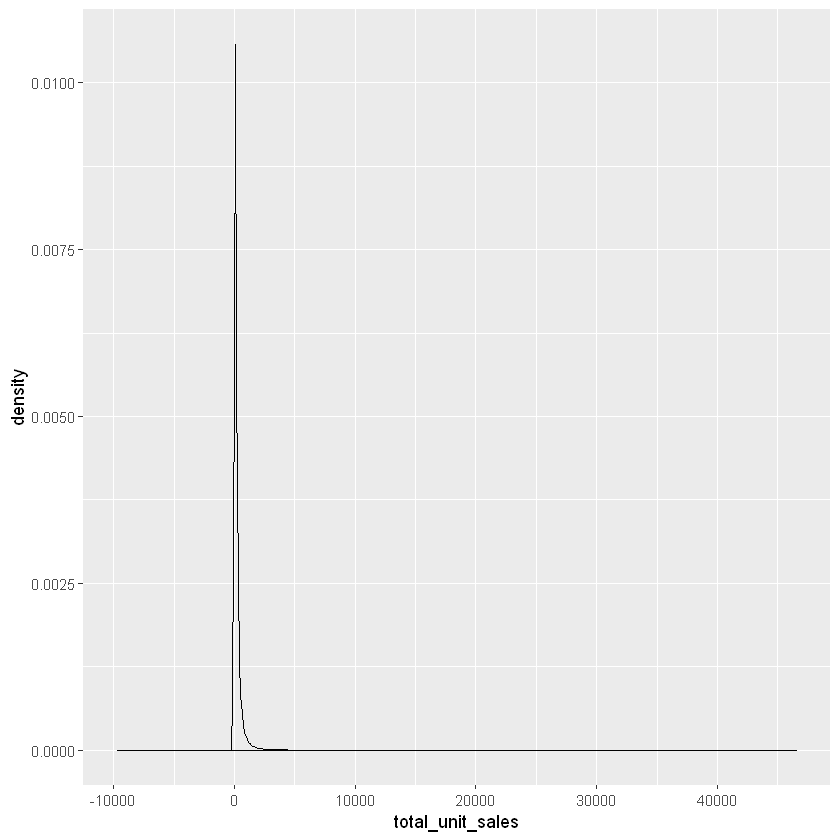

Warning message:
"Removed 132097 rows containing non-finite values (stat_density)."


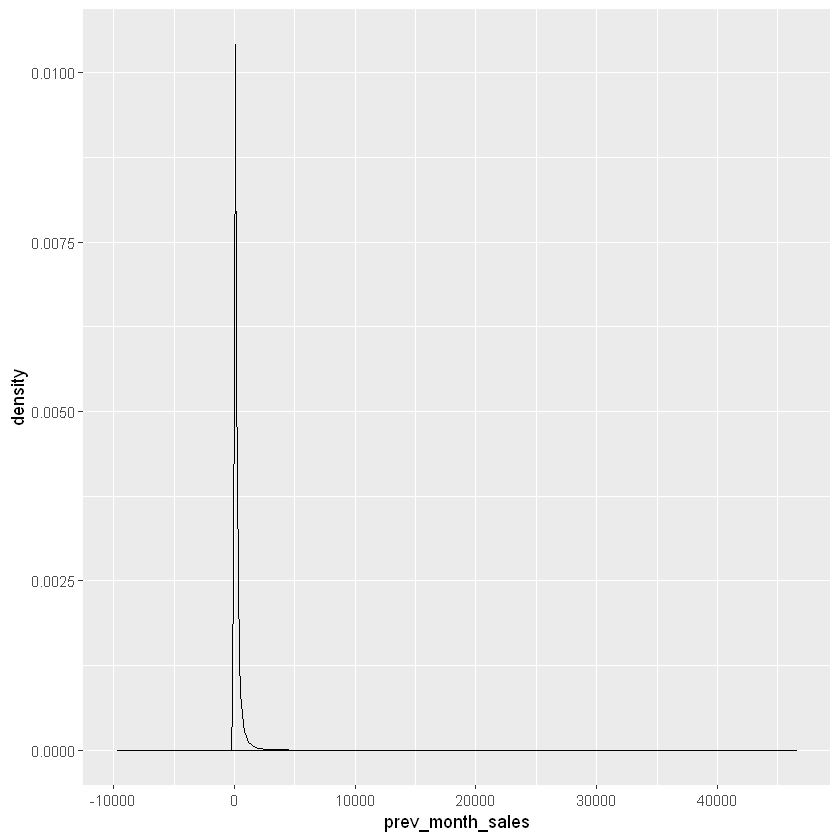

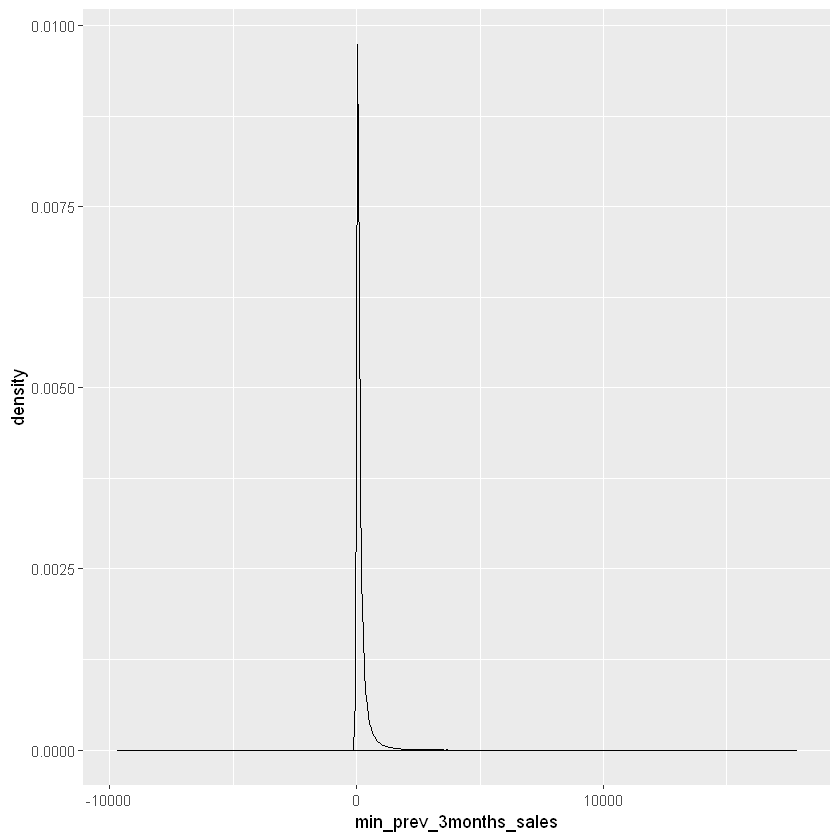

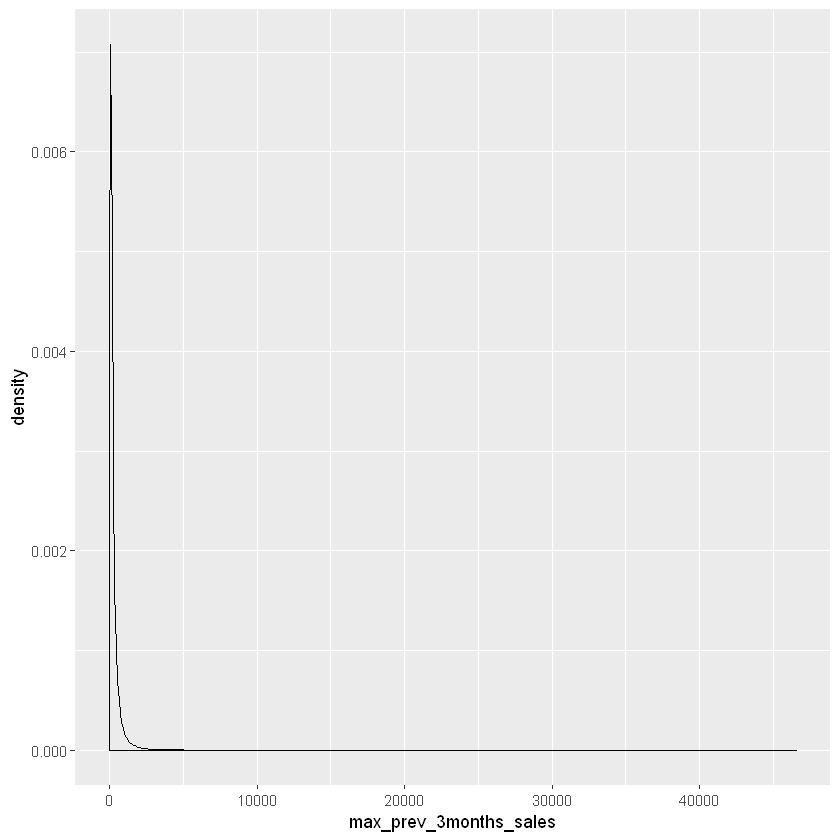

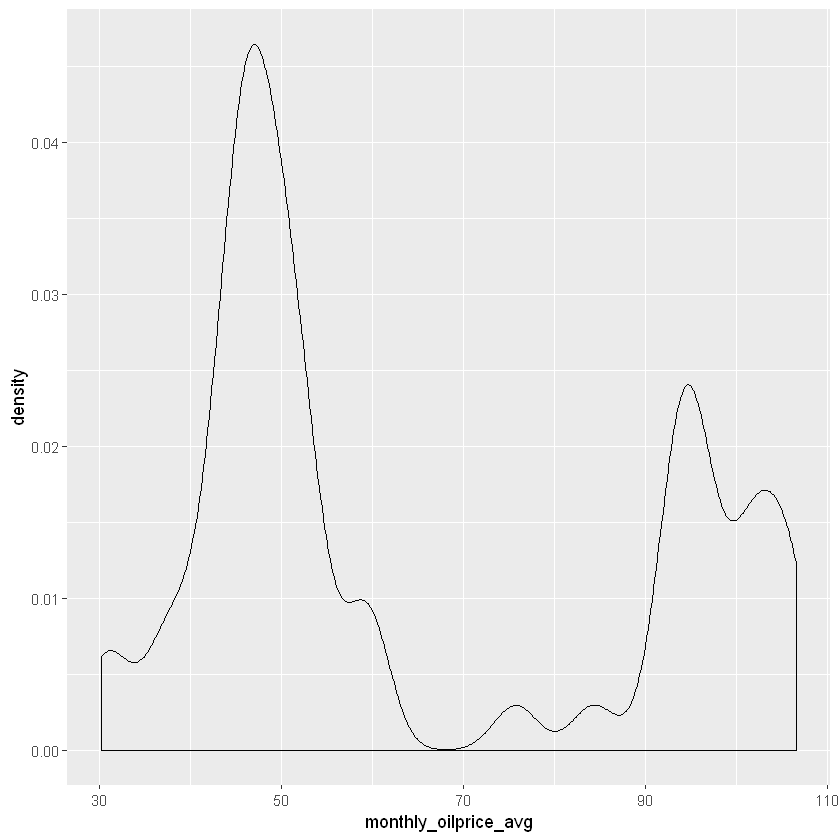

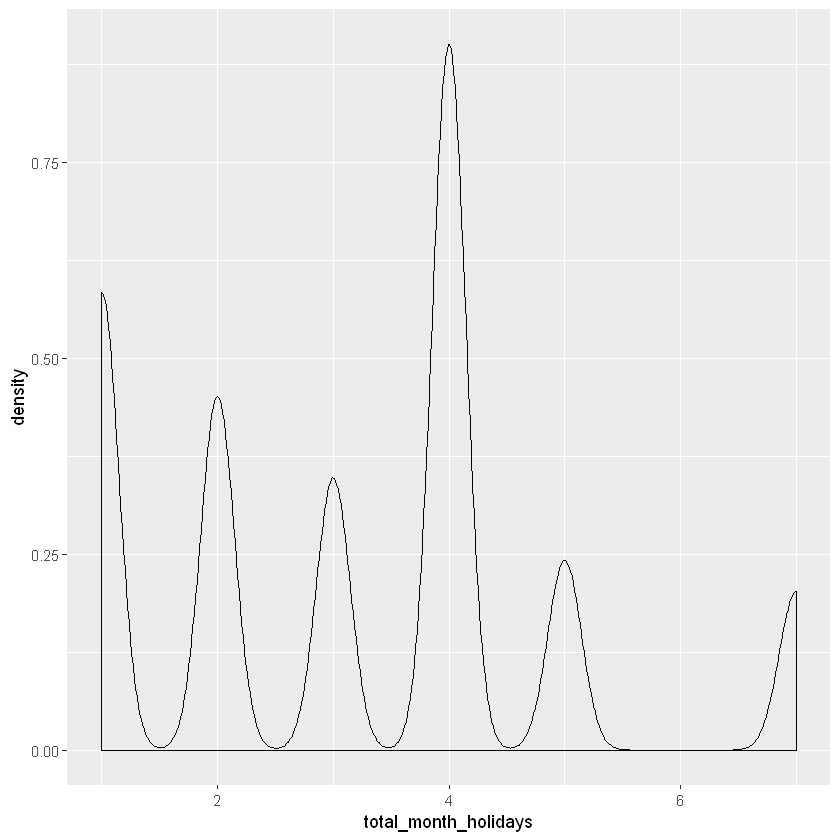

Warning message:
"Removed 35639 rows containing non-finite values (stat_density)."


Warning message:
"Removed 108852 rows containing non-finite values (stat_density)."


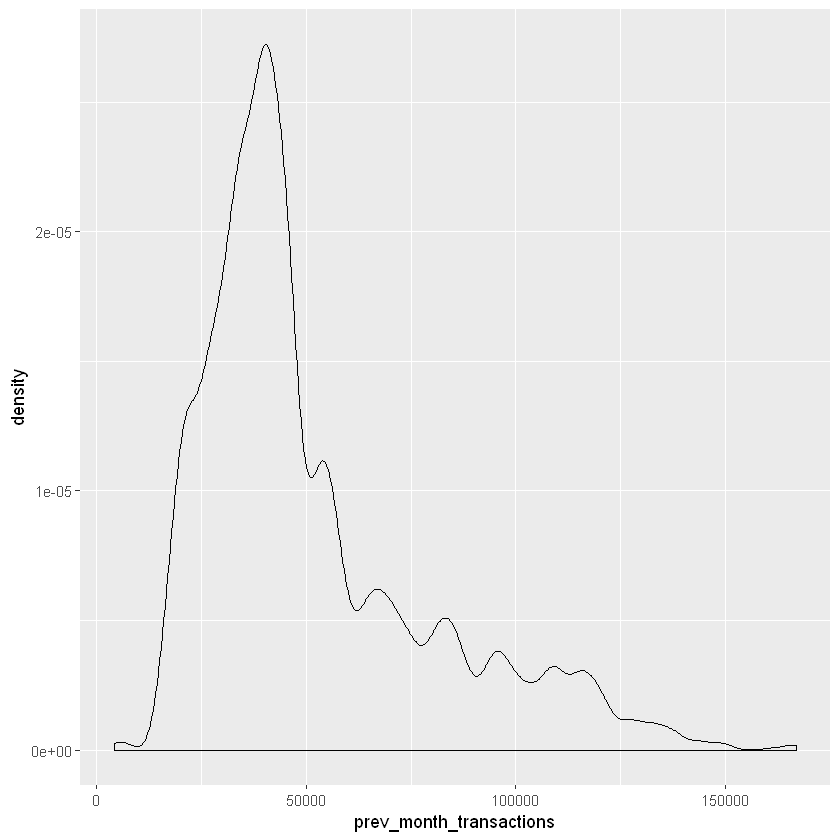

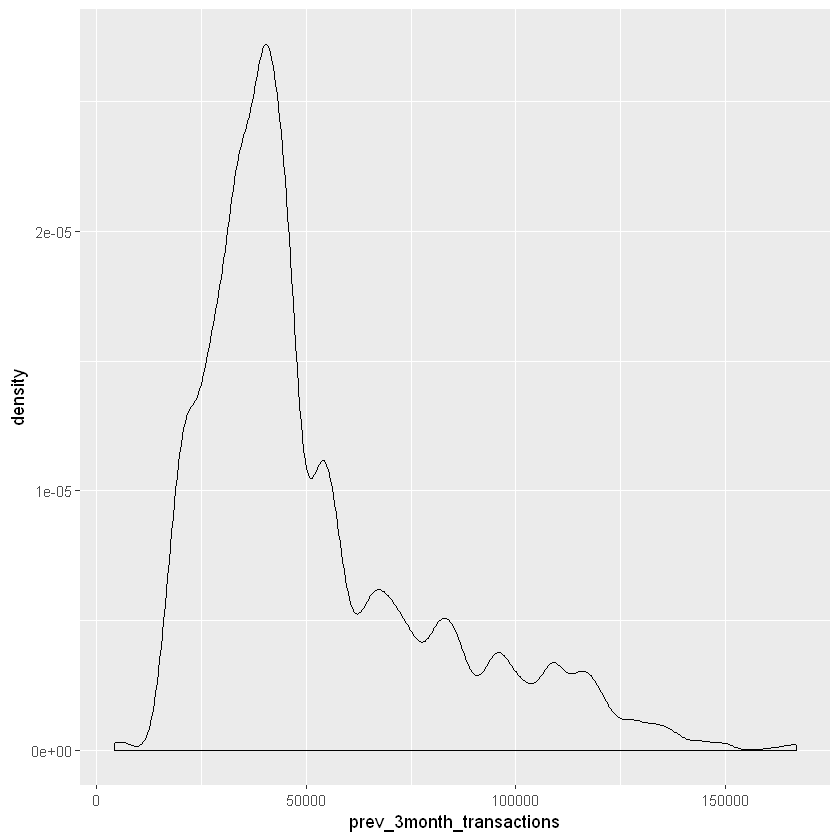

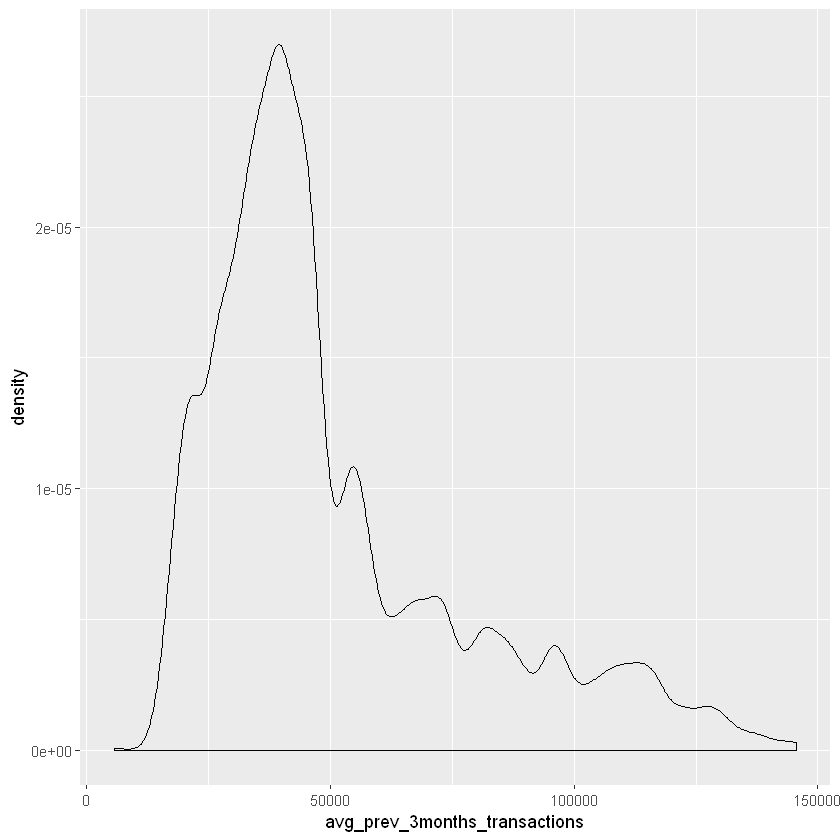

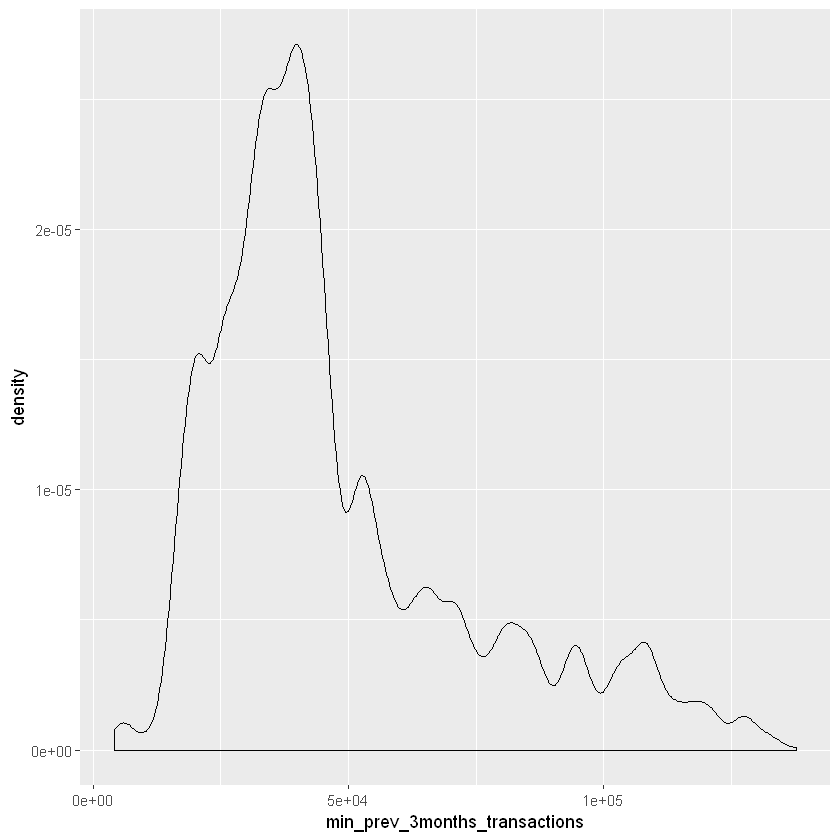

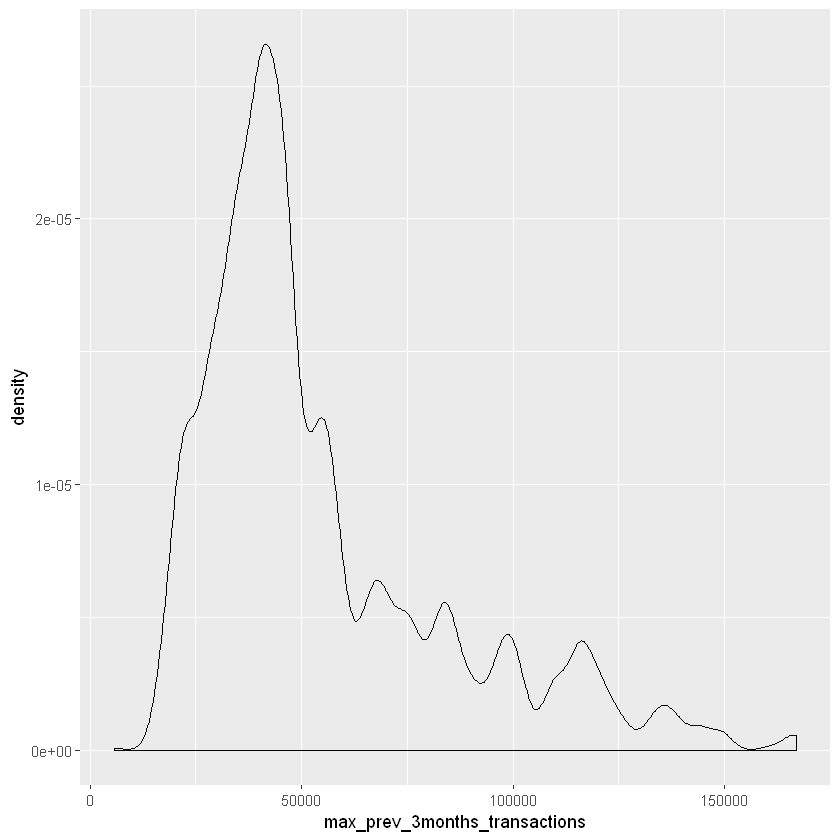

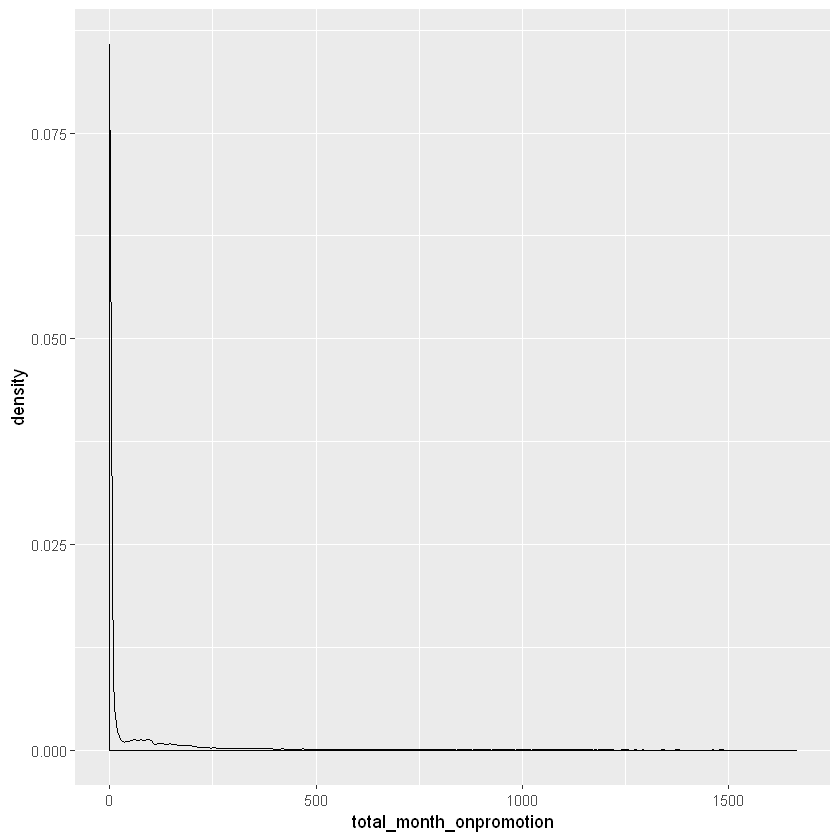

In [25]:
for (v in nf){
    print((ggplot(df,aes(x=df[[v]])) +
    geom_density(adjust=2) + xlab(v)))
}

        [,1]
  [1,]   0.7
  [2,]   1.9
  [3,]   3.1
  [4,]   4.3
  [5,]   5.5
  [6,]   6.7
  [7,]   7.9
  [8,]   9.1
  [9,]  10.3
 [10,]  11.5
 [11,]  12.7
 [12,]  13.9
 [13,]  15.1
 [14,]  16.3
 [15,]  17.5
 [16,]  18.7
 [17,]  19.9
 [18,]  21.1
 [19,]  22.3
 [20,]  23.5
 [21,]  24.7
 [22,]  25.9
 [23,]  27.1
 [24,]  28.3
 [25,]  29.5
 [26,]  30.7
 [27,]  31.9
 [28,]  33.1
 [29,]  34.3
 [30,]  35.5
 [31,]  36.7
 [32,]  37.9
 [33,]  39.1
 [34,]  40.3
 [35,]  41.5
 [36,]  42.7
 [37,]  43.9
 [38,]  45.1
 [39,]  46.3
 [40,]  47.5
 [41,]  48.7
 [42,]  49.9
 [43,]  51.1
 [44,]  52.3
 [45,]  53.5
 [46,]  54.7
 [47,]  55.9
 [48,]  57.1
 [49,]  58.3
 [50,]  59.5
 [51,]  60.7
 [52,]  61.9
 [53,]  63.1
 [54,]  64.3
 [55,]  65.5
 [56,]  66.7
 [57,]  67.9
 [58,]  69.1
 [59,]  70.3
 [60,]  71.5
 [61,]  72.7
 [62,]  73.9
 [63,]  75.1
 [64,]  76.3
 [65,]  77.5
 [66,]  78.7
 [67,]  79.9
 [68,]  81.1
 [69,]  82.3
 [70,]  83.5
 [71,]  84.7
 [72,]  85.9
 [73,]  87.1
 [74,]  88.3
 [75,]  89.5
 [76,]  90.7

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9
[18,] 21.1
[19,] 22.3
[20,] 23.5
[21,] 24.7
[22,] 25.9
[23,] 27.1
[24,] 28.3
[25,] 29.5
[26,] 30.7
[27,] 31.9
[28,] 33.1
[29,] 34.3
[30,] 35.5
[31,] 36.7
[32,] 37.9
[33,] 39.1
[34,] 40.3
[35,] 41.5
[36,] 42.7
[37,] 43.9
[38,] 45.1
[39,] 46.3
[40,] 47.5
[41,] 48.7
[42,] 49.9
[43,] 51.1
[44,] 52.3
[45,] 53.5
[46,] 54.7
[47,] 55.9
[48,] 57.1
[49,] 58.3
[50,] 59.5
[51,] 60.7
[52,] 61.9
[53,] 63.1
[54,] 64.3


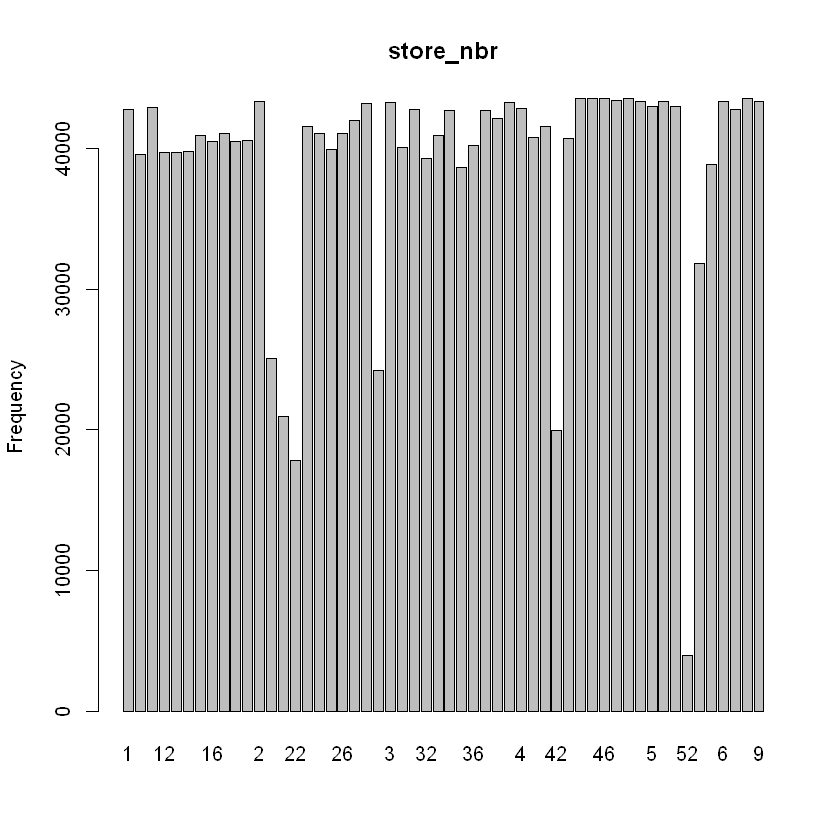

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1
[4,]  4.3
[5,]  5.5


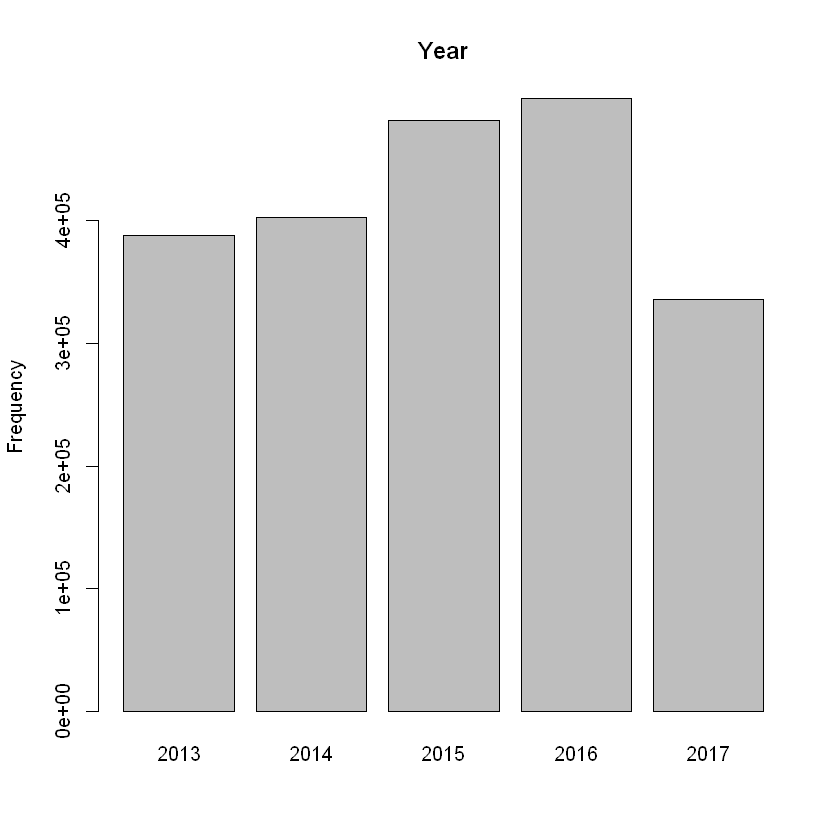

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9


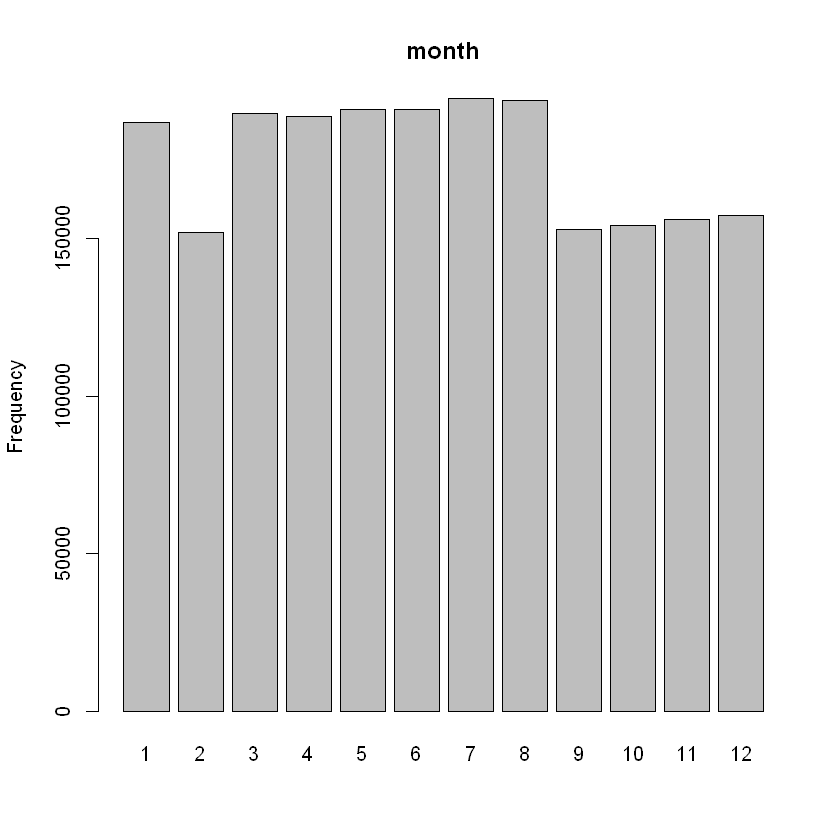

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9
[18,] 21.1
[19,] 22.3
[20,] 23.5
[21,] 24.7
[22,] 25.9


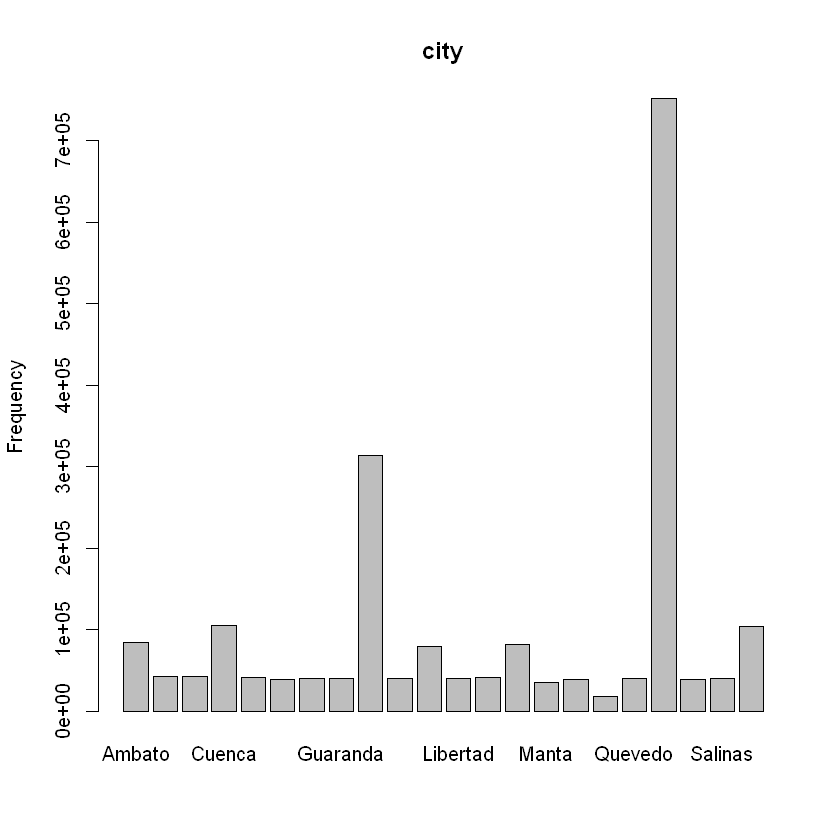

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7


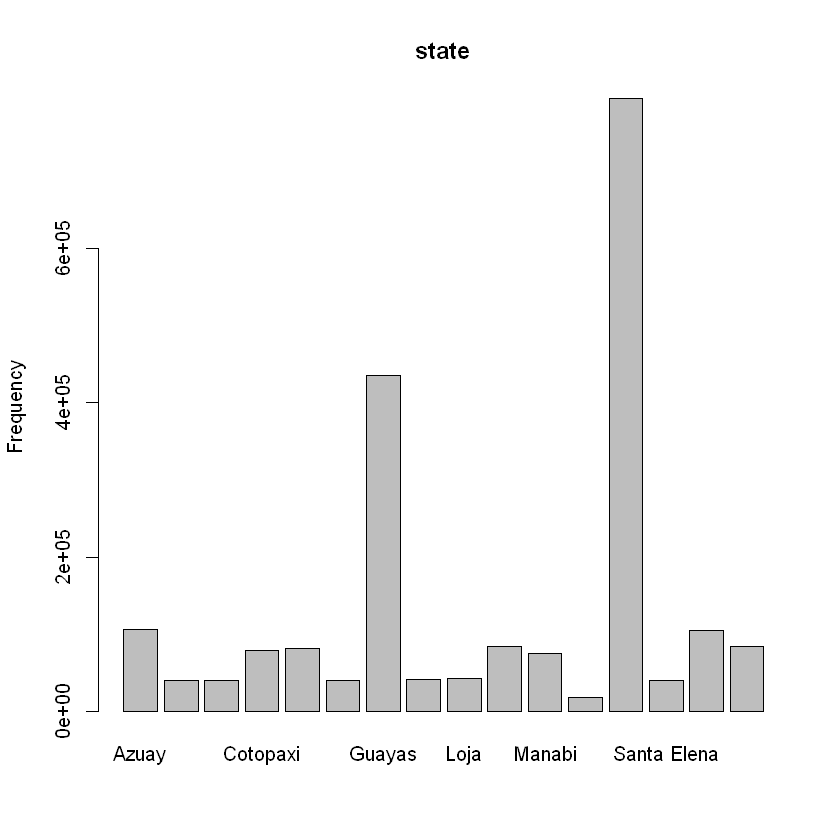

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1
[4,]  4.3
[5,]  5.5


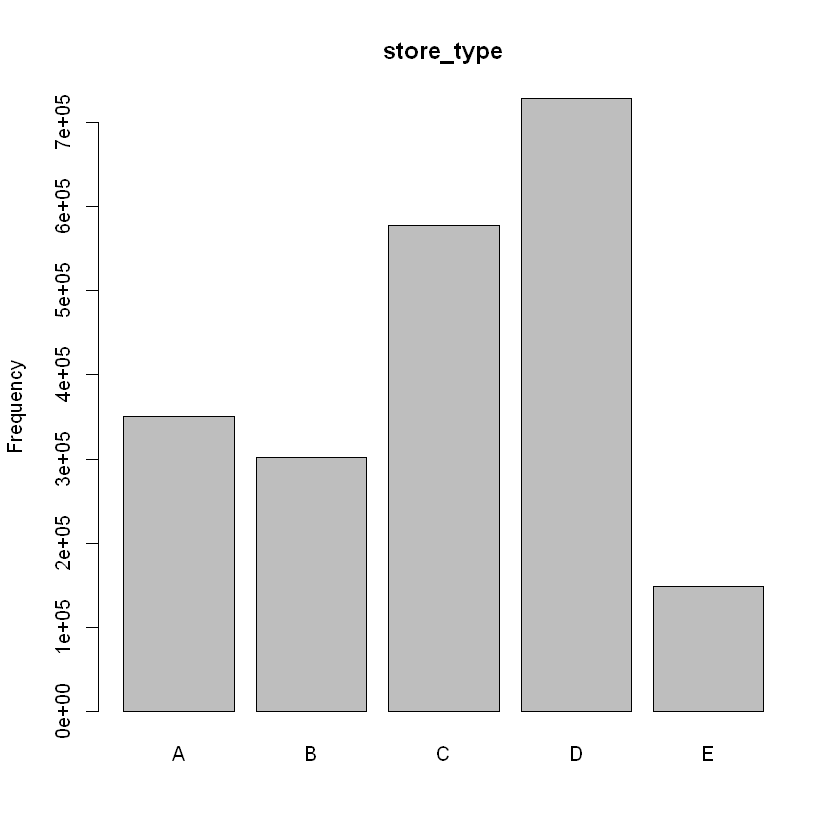

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9


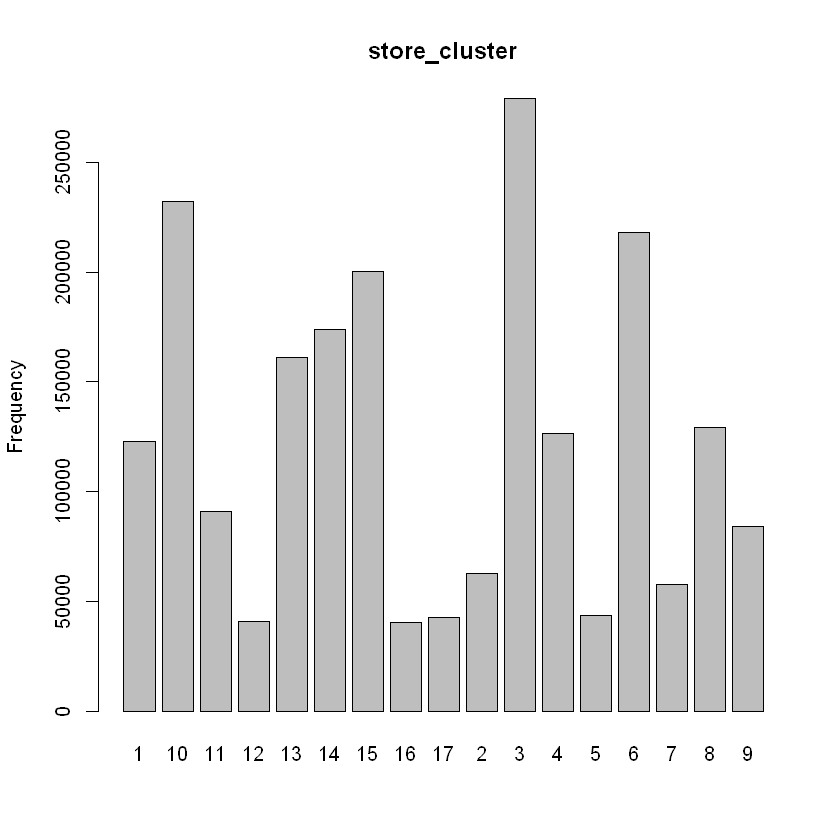

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3


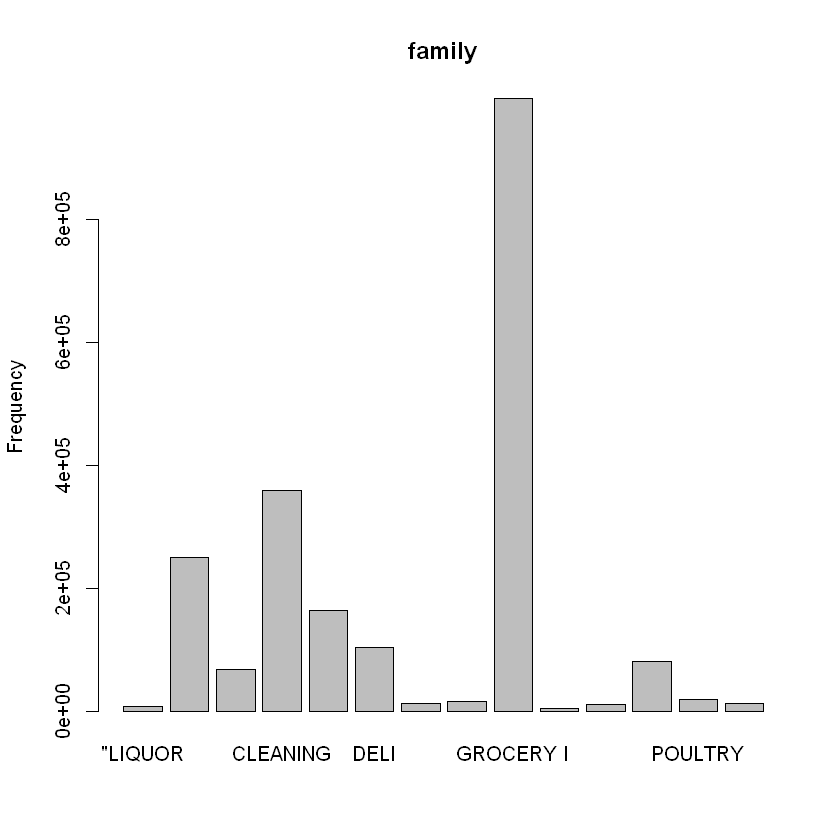

        [,1]
  [1,]   0.7
  [2,]   1.9
  [3,]   3.1
  [4,]   4.3
  [5,]   5.5
  [6,]   6.7
  [7,]   7.9
  [8,]   9.1
  [9,]  10.3
 [10,]  11.5
 [11,]  12.7
 [12,]  13.9
 [13,]  15.1
 [14,]  16.3
 [15,]  17.5
 [16,]  18.7
 [17,]  19.9
 [18,]  21.1
 [19,]  22.3
 [20,]  23.5
 [21,]  24.7
 [22,]  25.9
 [23,]  27.1
 [24,]  28.3
 [25,]  29.5
 [26,]  30.7
 [27,]  31.9
 [28,]  33.1
 [29,]  34.3
 [30,]  35.5
 [31,]  36.7
 [32,]  37.9
 [33,]  39.1
 [34,]  40.3
 [35,]  41.5
 [36,]  42.7
 [37,]  43.9
 [38,]  45.1
 [39,]  46.3
 [40,]  47.5
 [41,]  48.7
 [42,]  49.9
 [43,]  51.1
 [44,]  52.3
 [45,]  53.5
 [46,]  54.7
 [47,]  55.9
 [48,]  57.1
 [49,]  58.3
 [50,]  59.5
 [51,]  60.7
 [52,]  61.9
 [53,]  63.1
 [54,]  64.3
 [55,]  65.5
 [56,]  66.7
 [57,]  67.9
 [58,]  69.1
 [59,]  70.3
 [60,]  71.5
 [61,]  72.7
 [62,]  73.9
 [63,]  75.1
 [64,]  76.3
 [65,]  77.5
 [66,]  78.7
 [67,]  79.9
 [68,]  81.1
 [69,]  82.3
 [70,]  83.5
 [71,]  84.7
 [72,]  85.9
 [73,]  87.1
 [74,]  88.3
 [75,]  89.5
 [76,]  90.7

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1


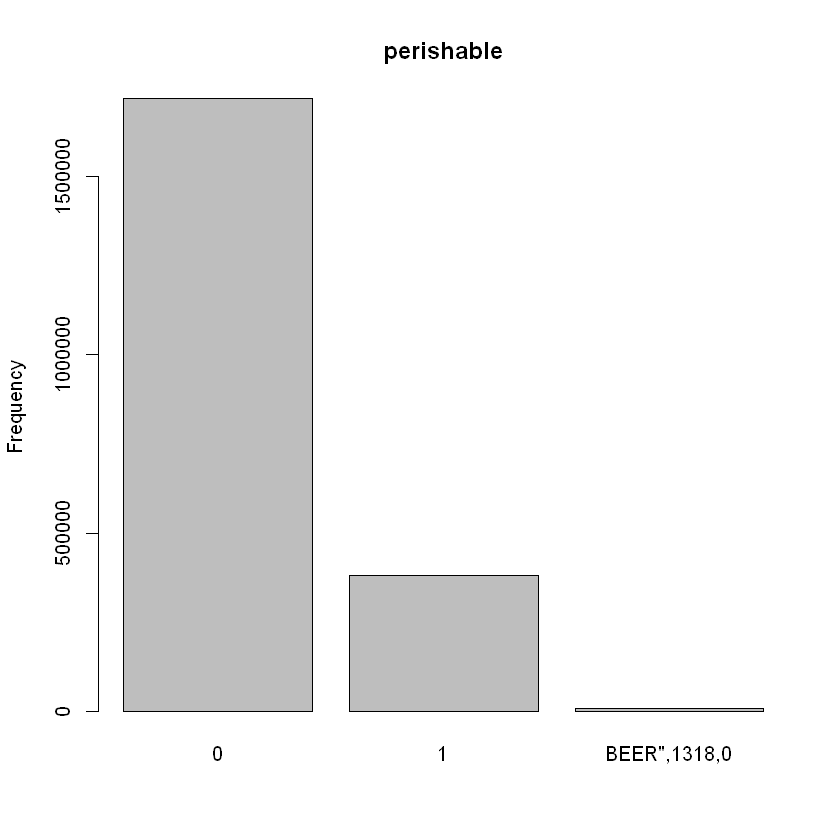

     [,1]
[1,]  0.7
[2,]  1.9


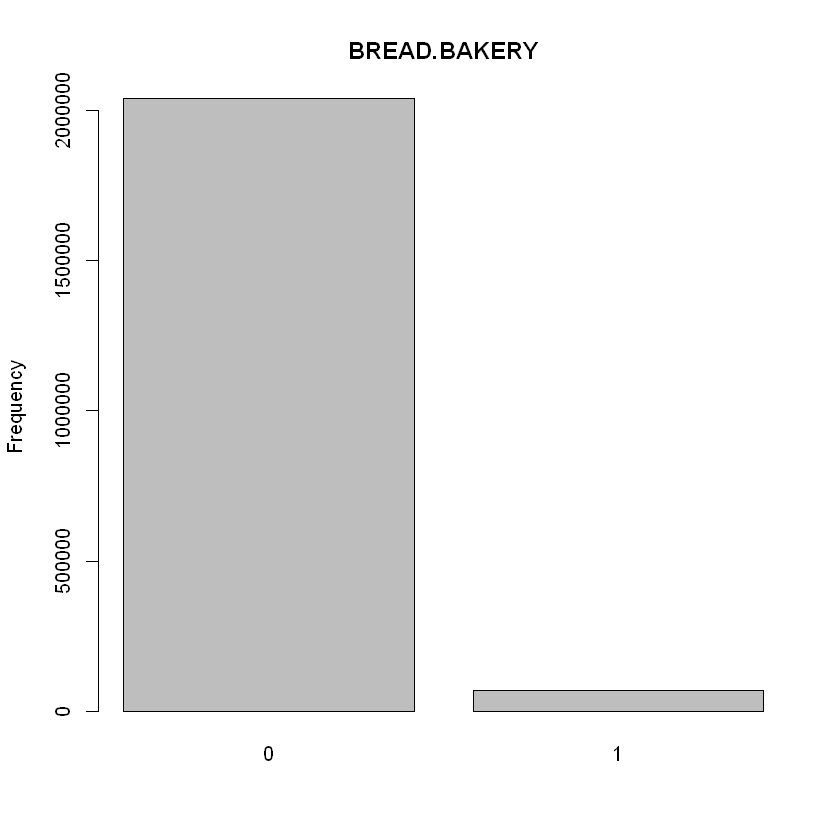

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


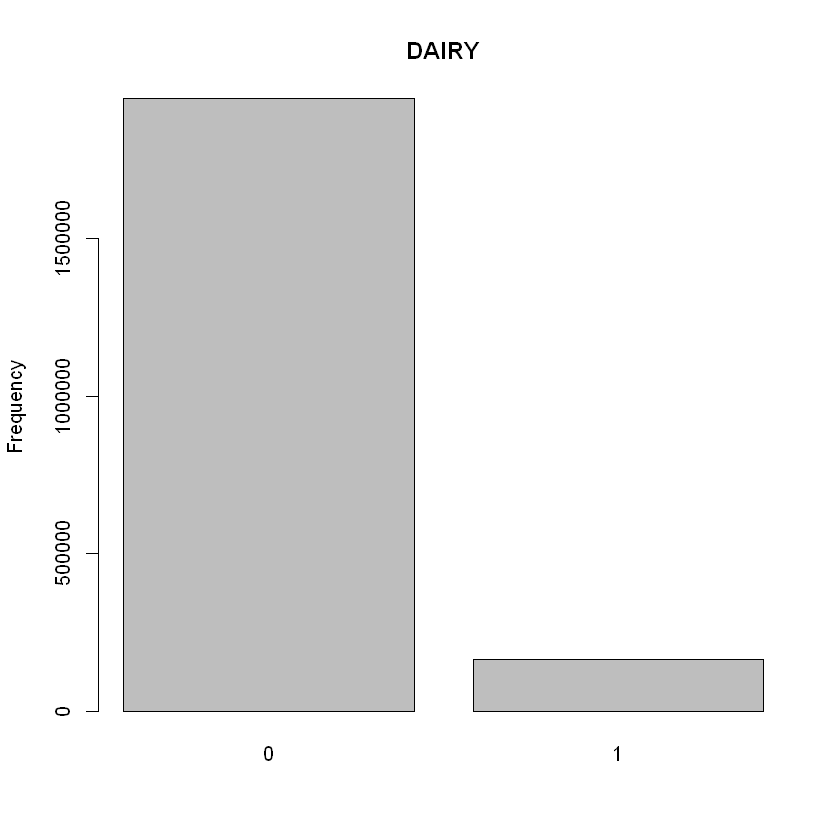

     [,1]
[1,]  0.7
[2,]  1.9


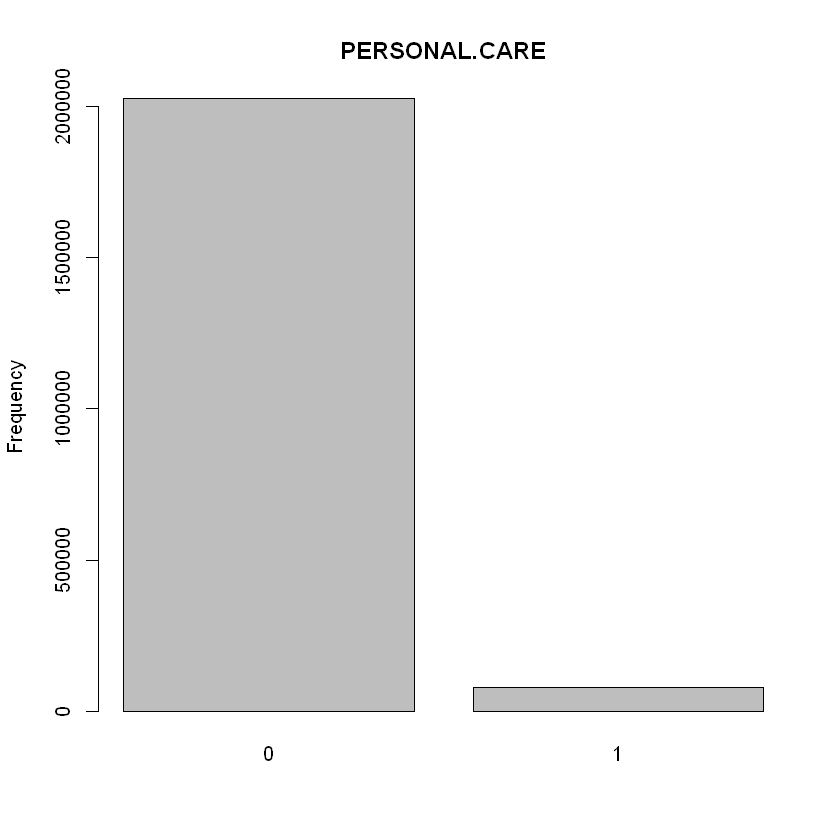

     [,1]
[1,]  0.7
[2,]  1.9


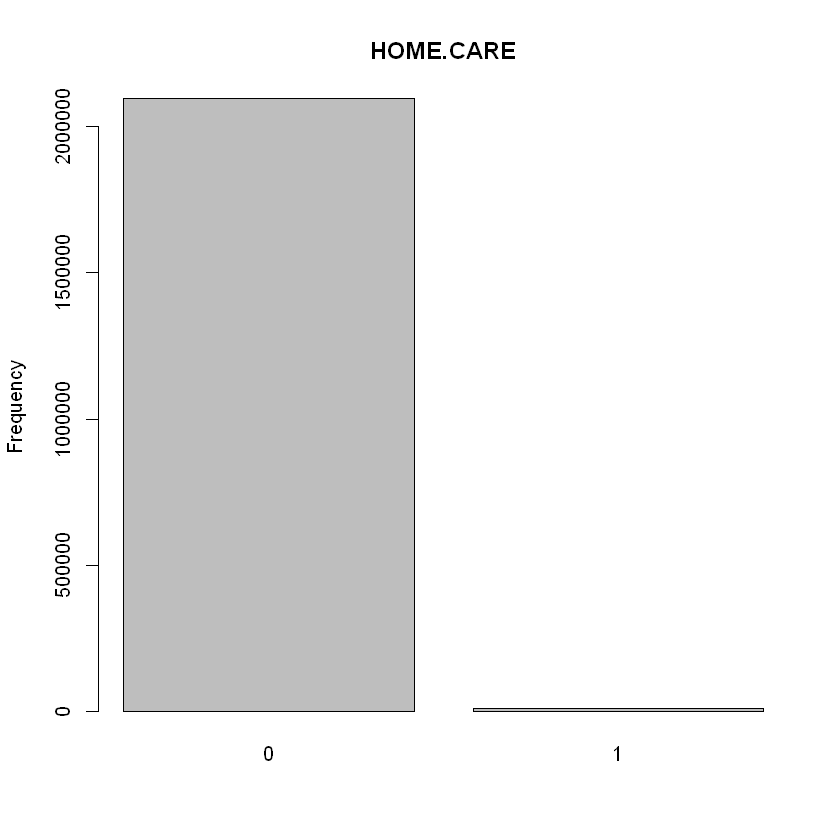

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


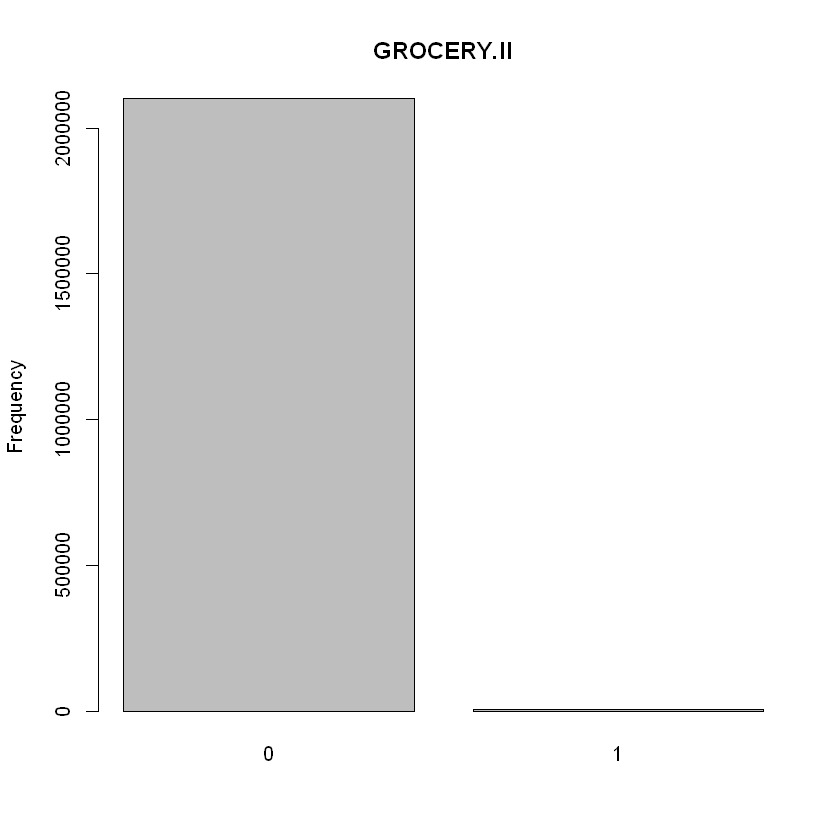

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


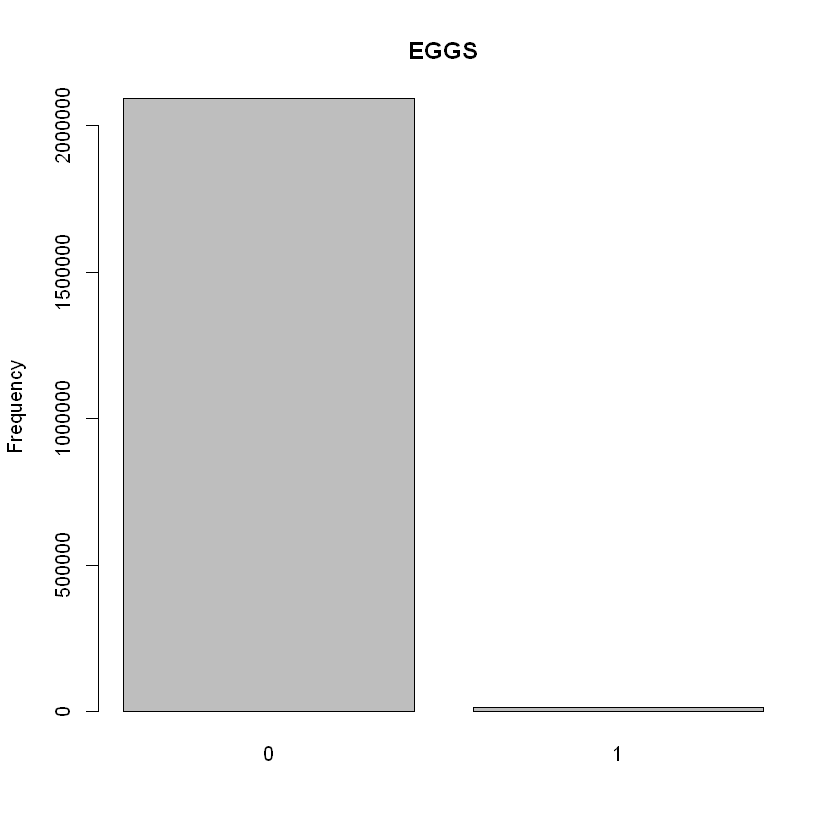

     [,1]
[1,]  0.7
[2,]  1.9


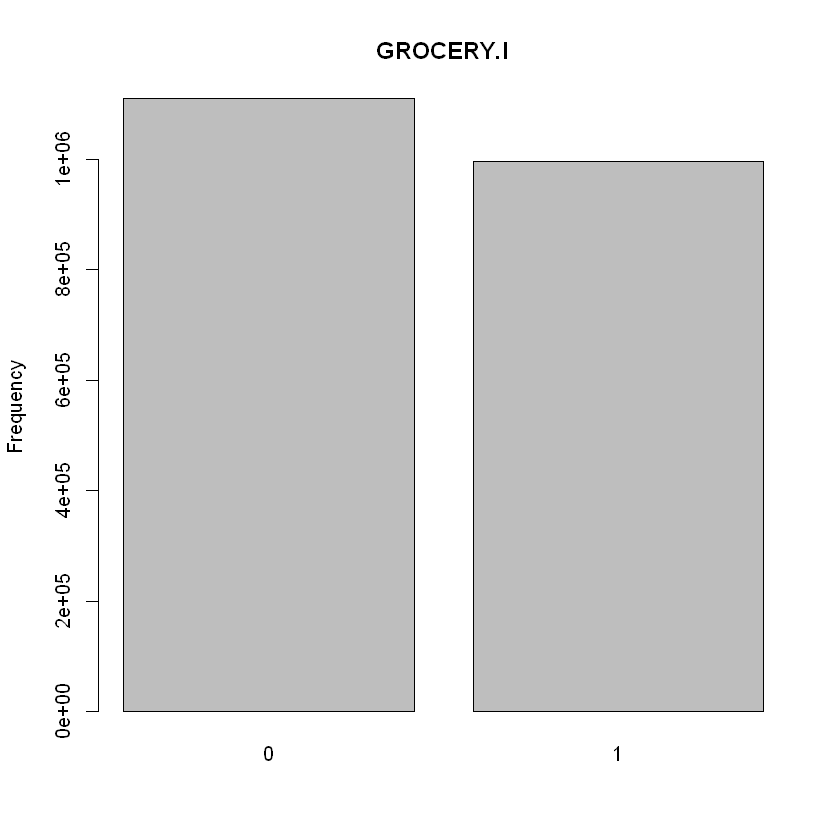

     [,1]
[1,]  0.7
[2,]  1.9


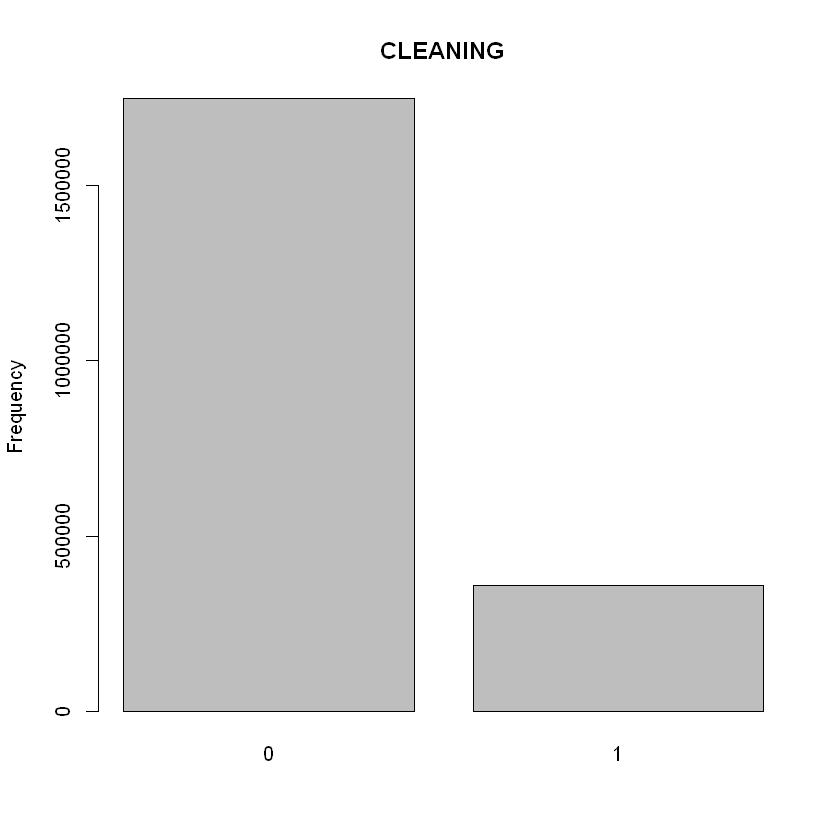

     [,1]
[1,]  0.7
[2,]  1.9


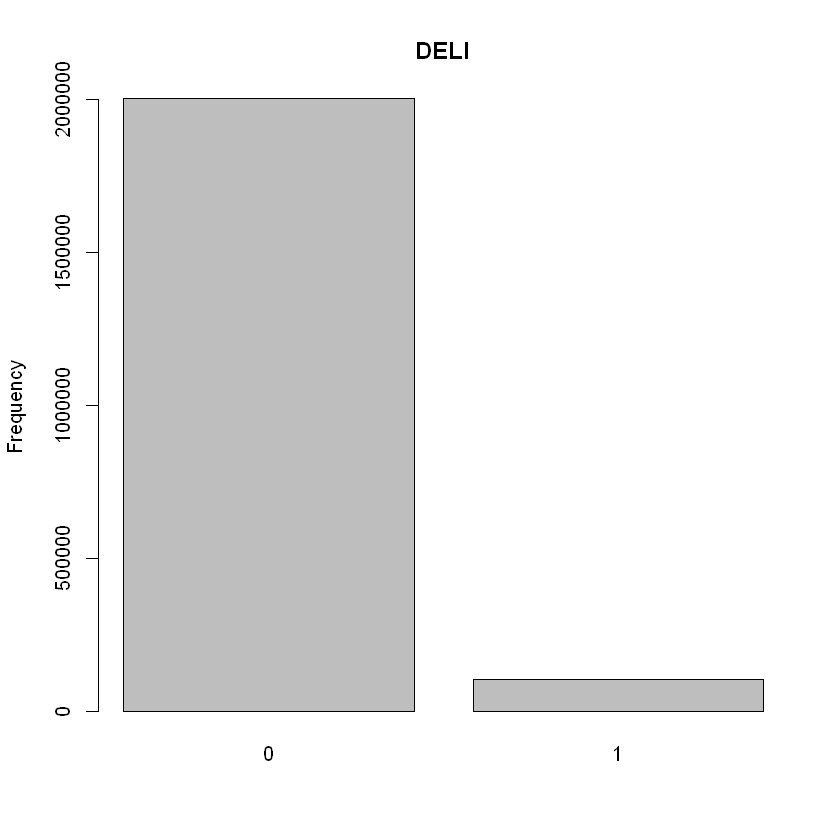

     [,1]
[1,]  0.7
[2,]  1.9


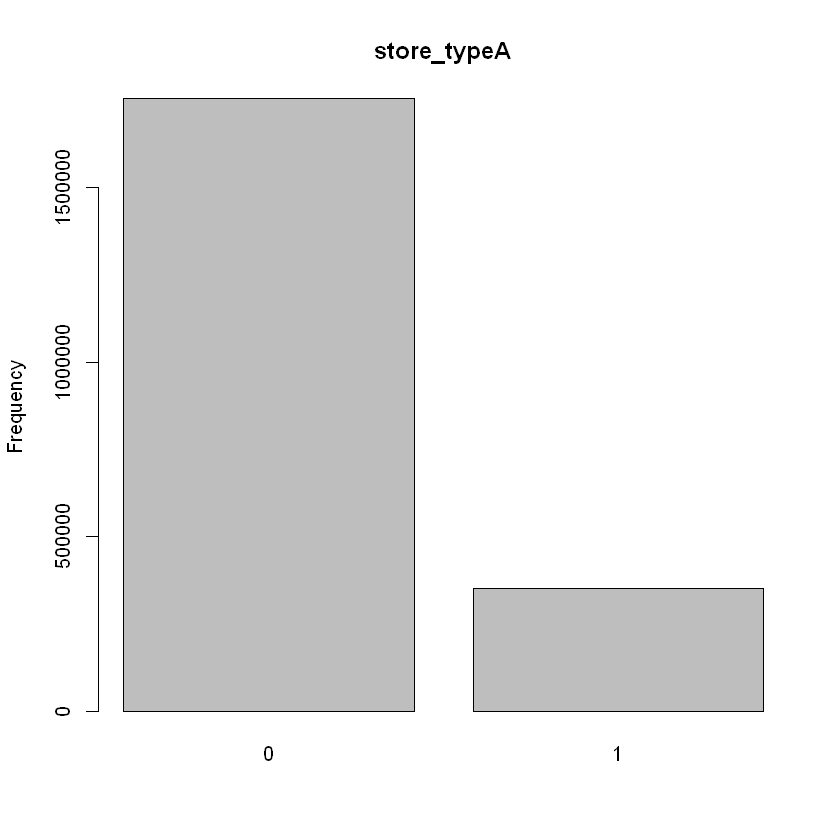

     [,1]
[1,]  0.7
[2,]  1.9


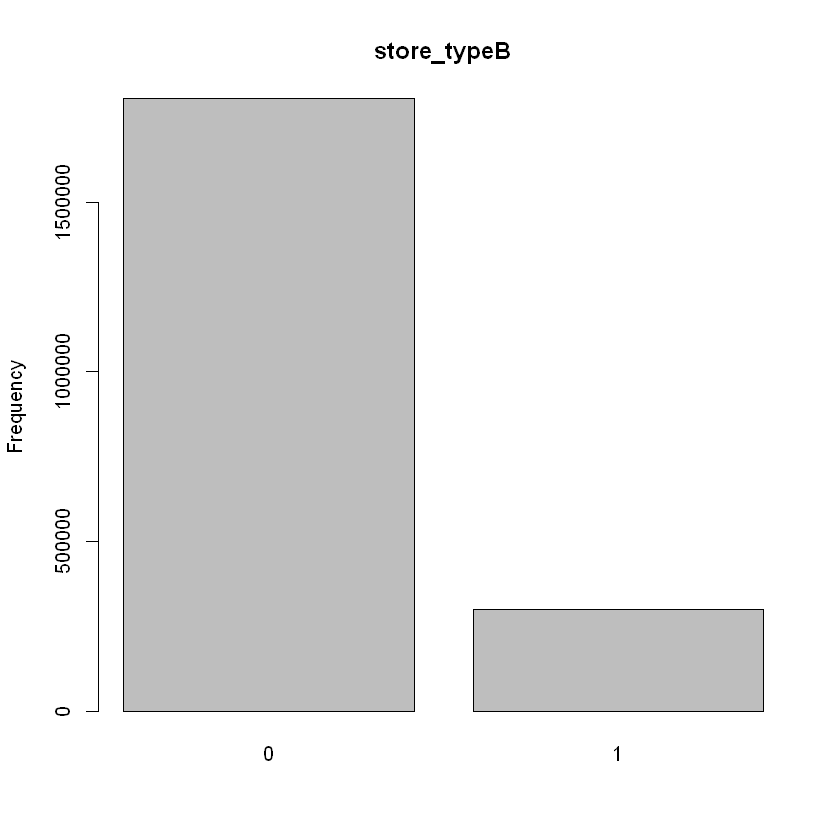

     [,1]
[1,]  0.7
[2,]  1.9


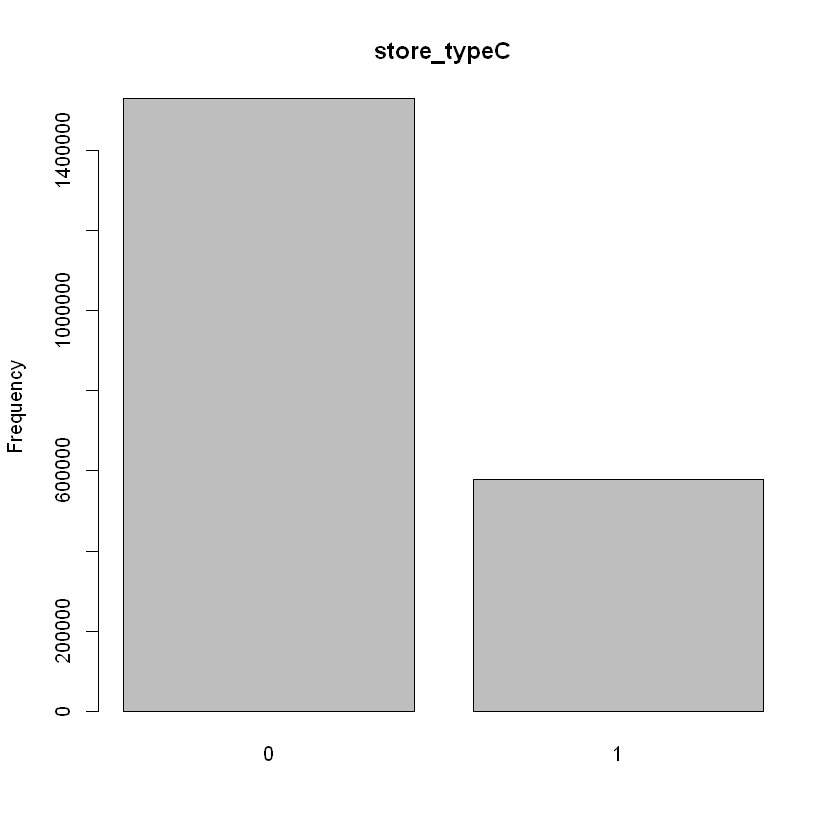

     [,1]
[1,]  0.7
[2,]  1.9


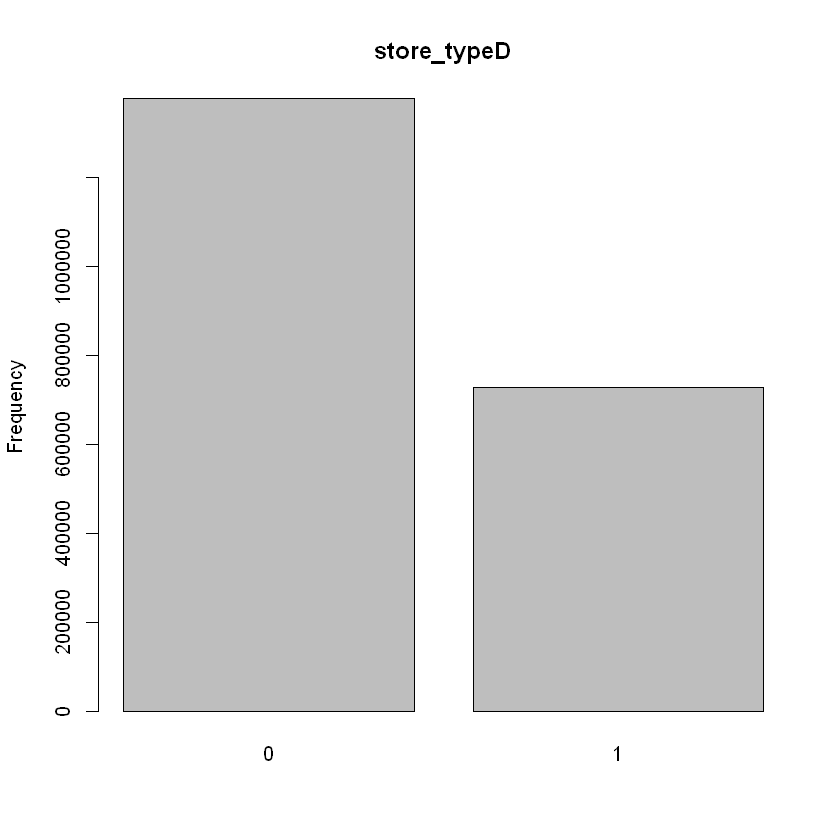

     [,1]
[1,]  0.7
[2,]  1.9


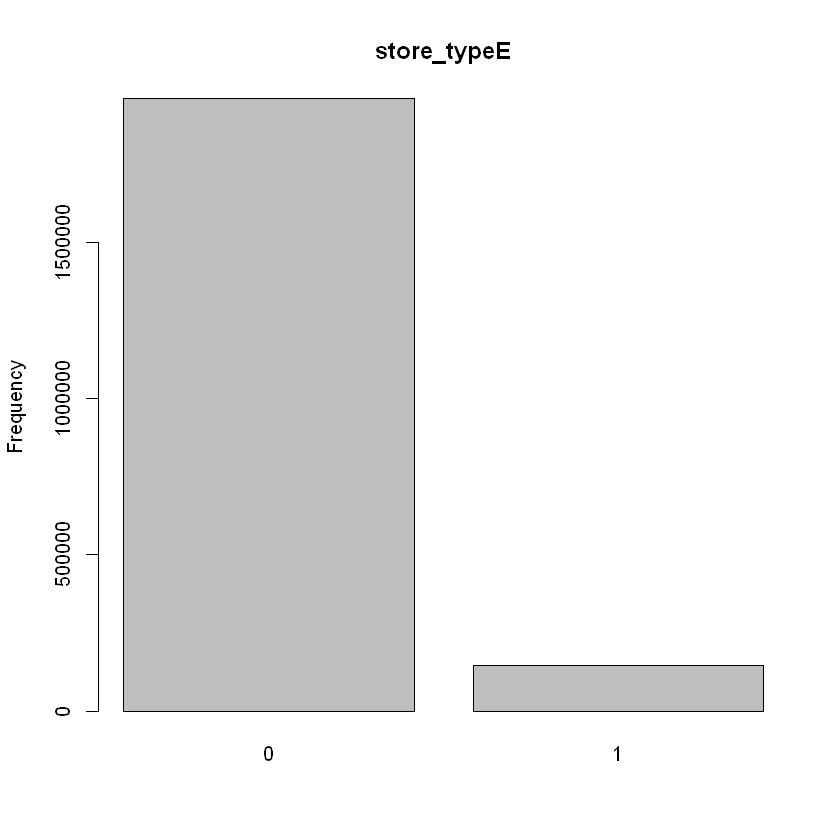

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


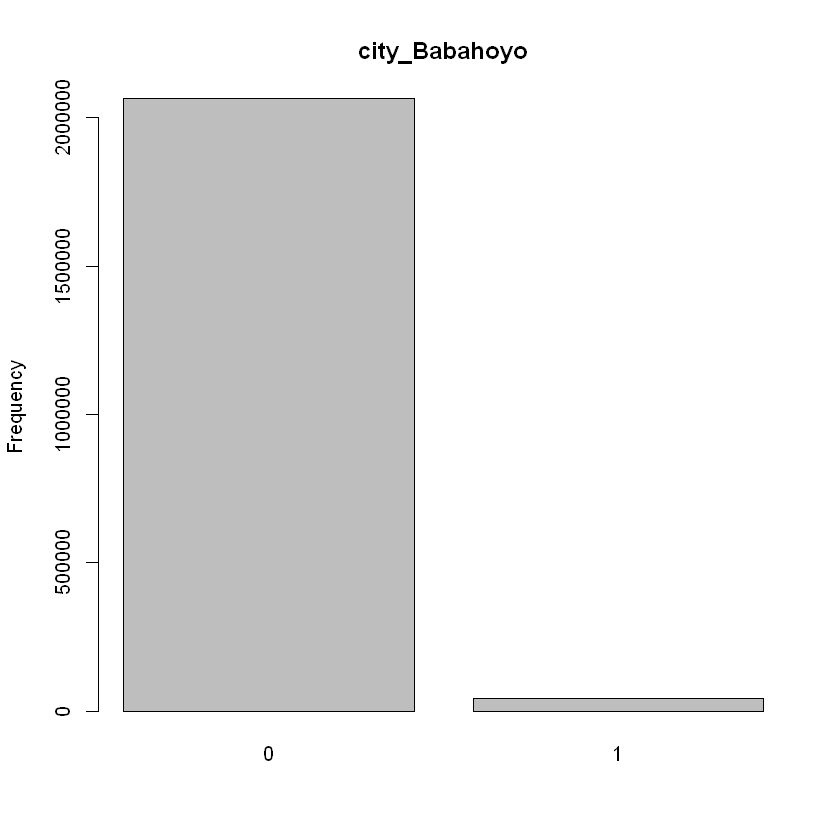

     [,1]
[1,]  0.7
[2,]  1.9


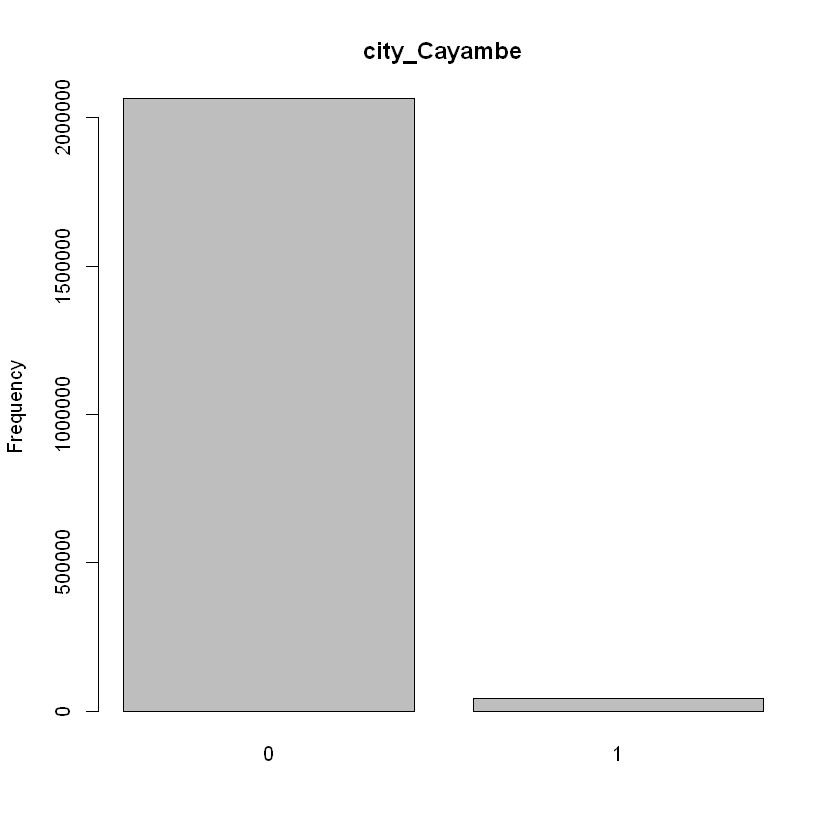

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


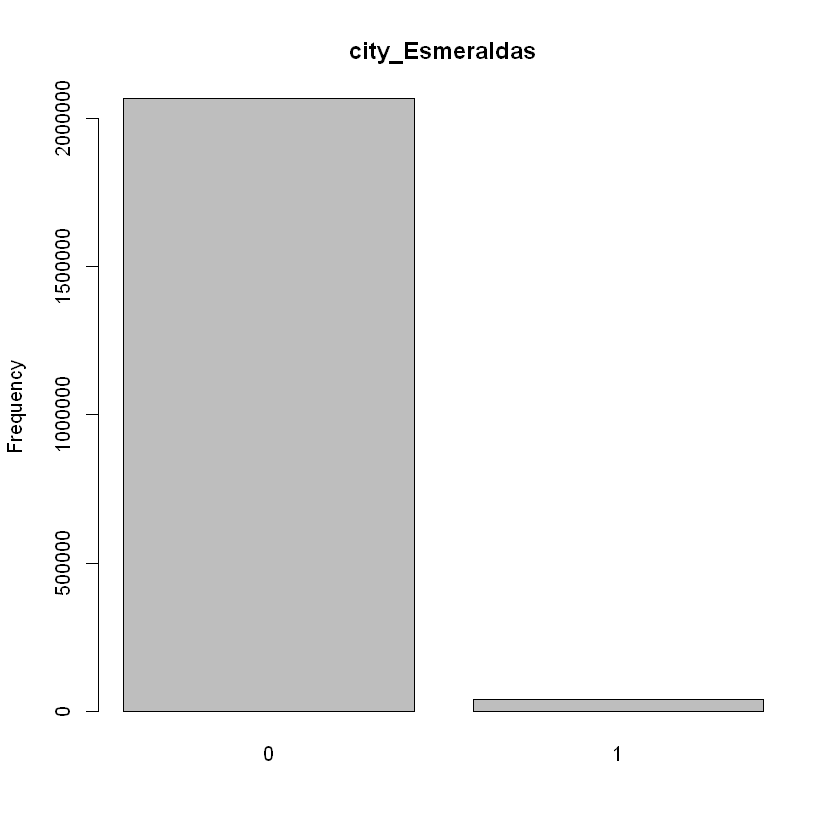

     [,1]
[1,]  0.7
[2,]  1.9


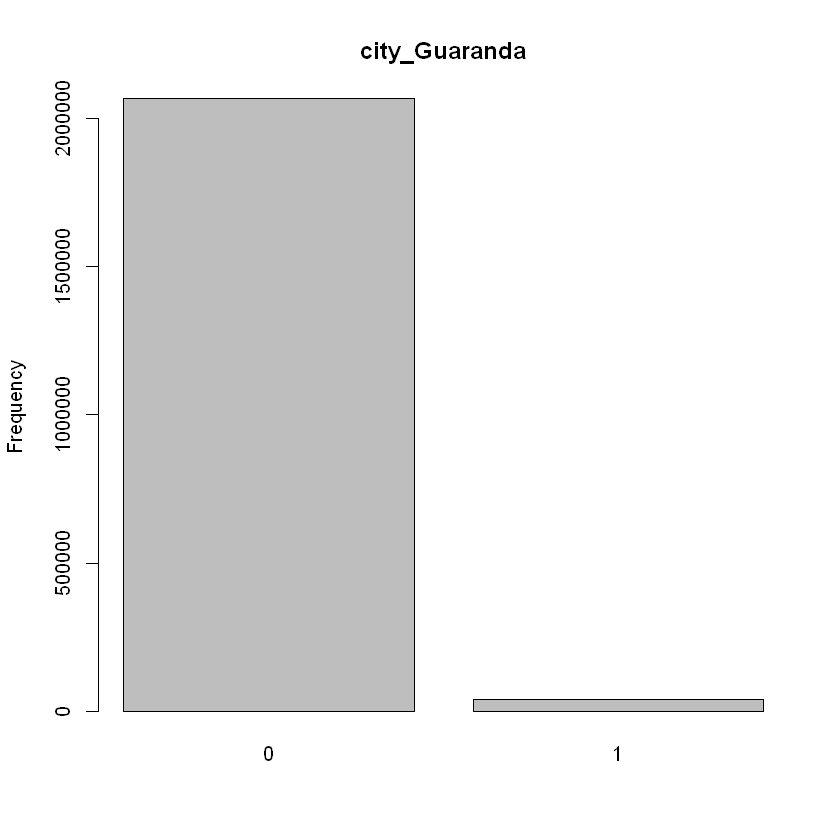

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


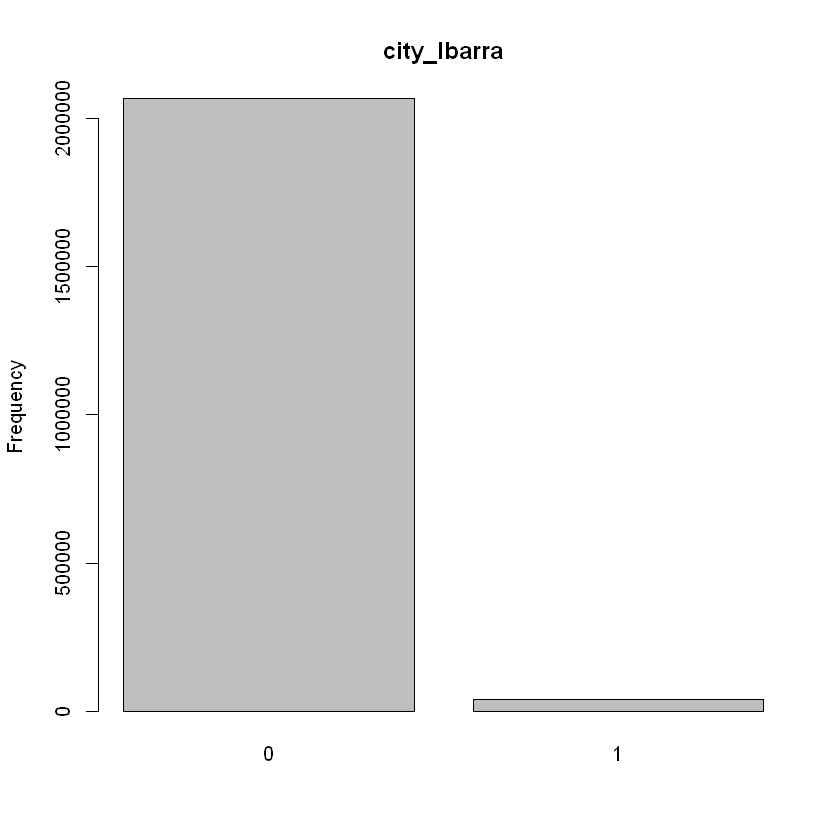

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


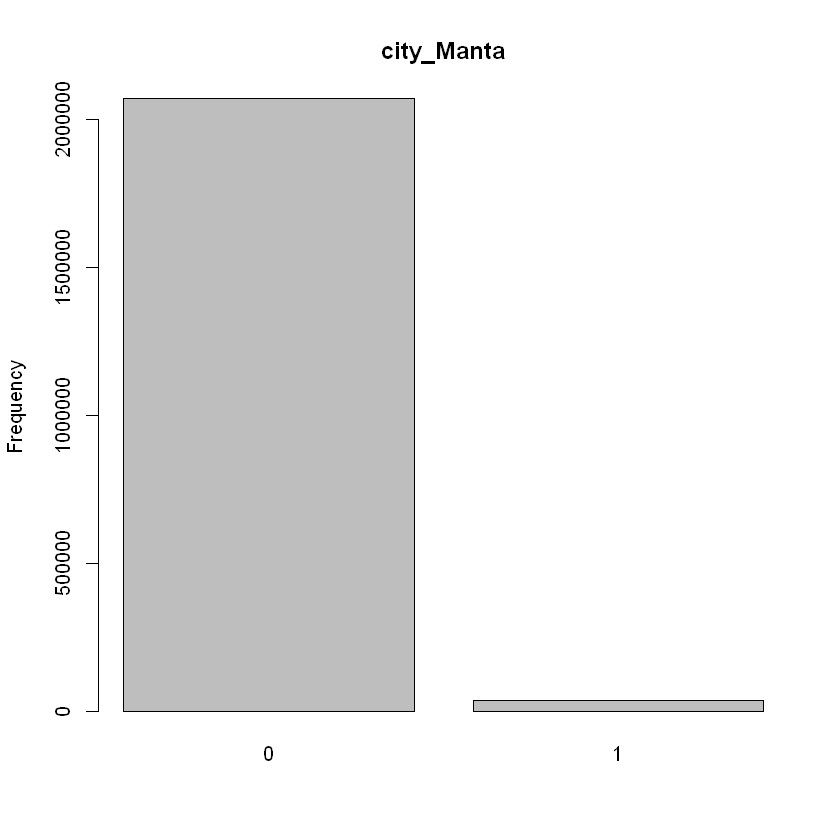

     [,1]
[1,]  0.7
[2,]  1.9


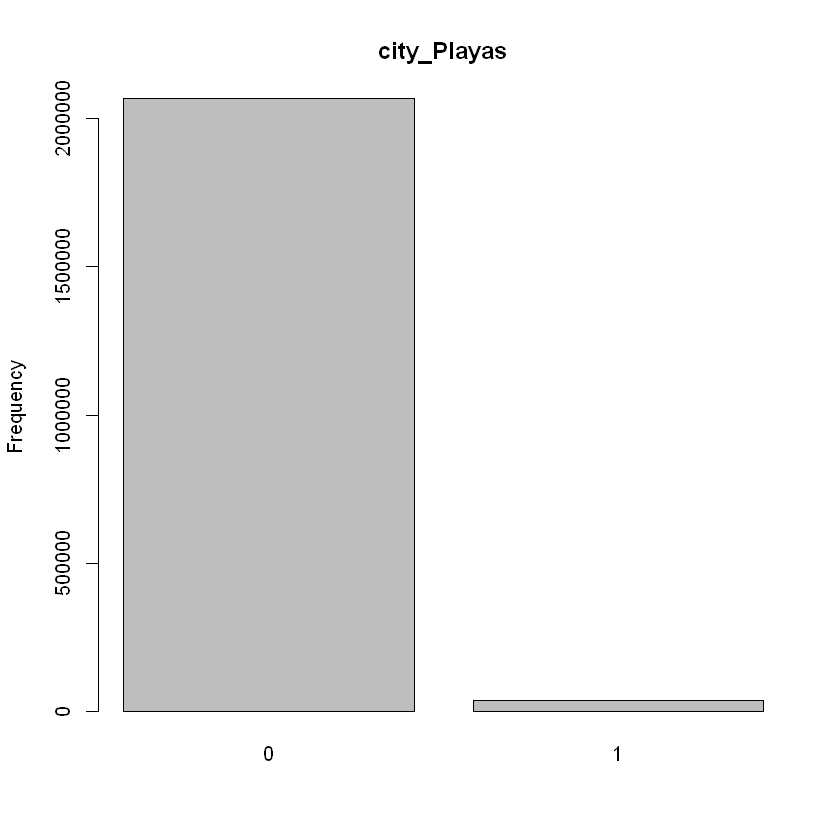

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


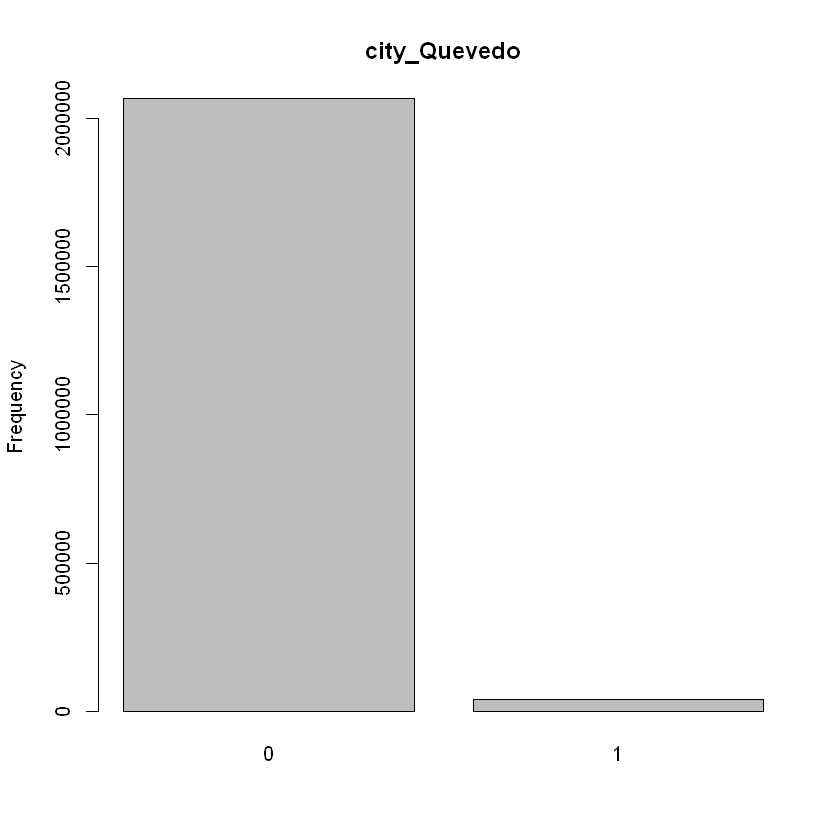

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


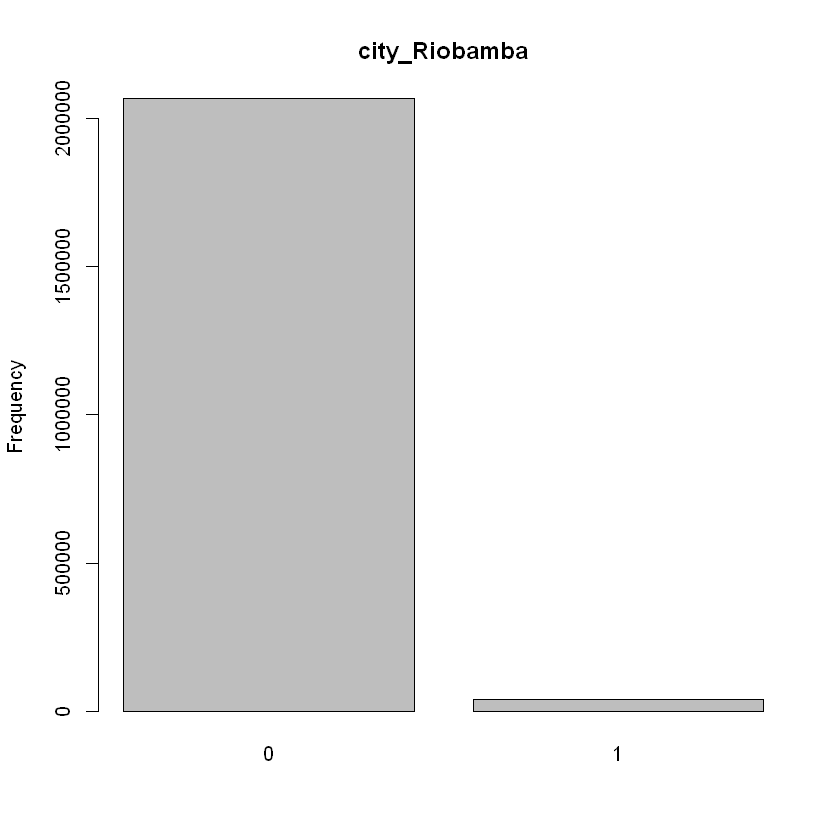

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


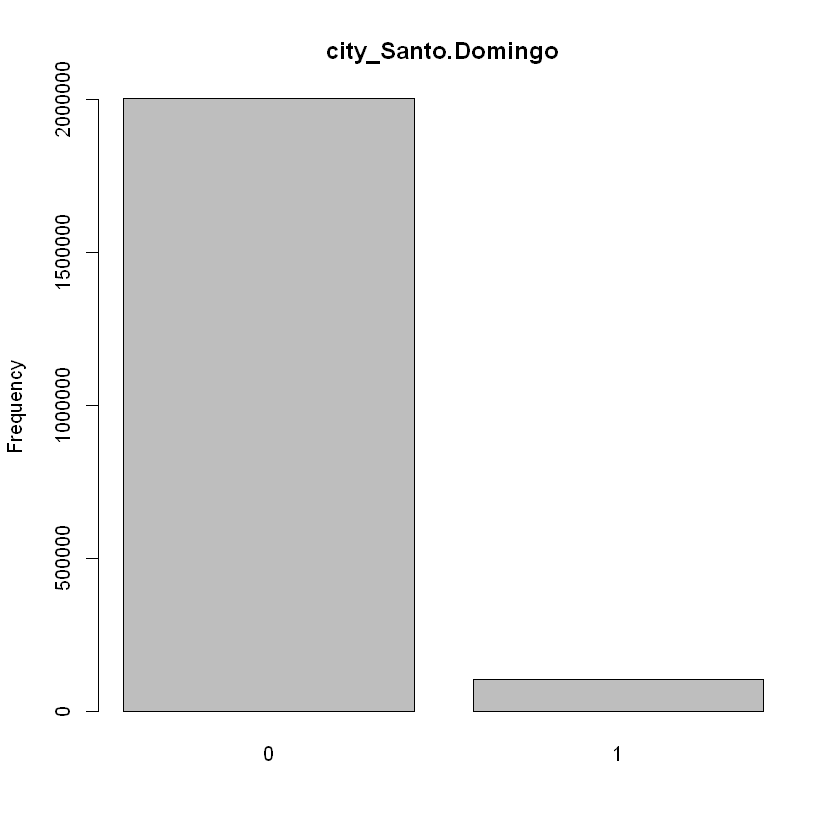

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


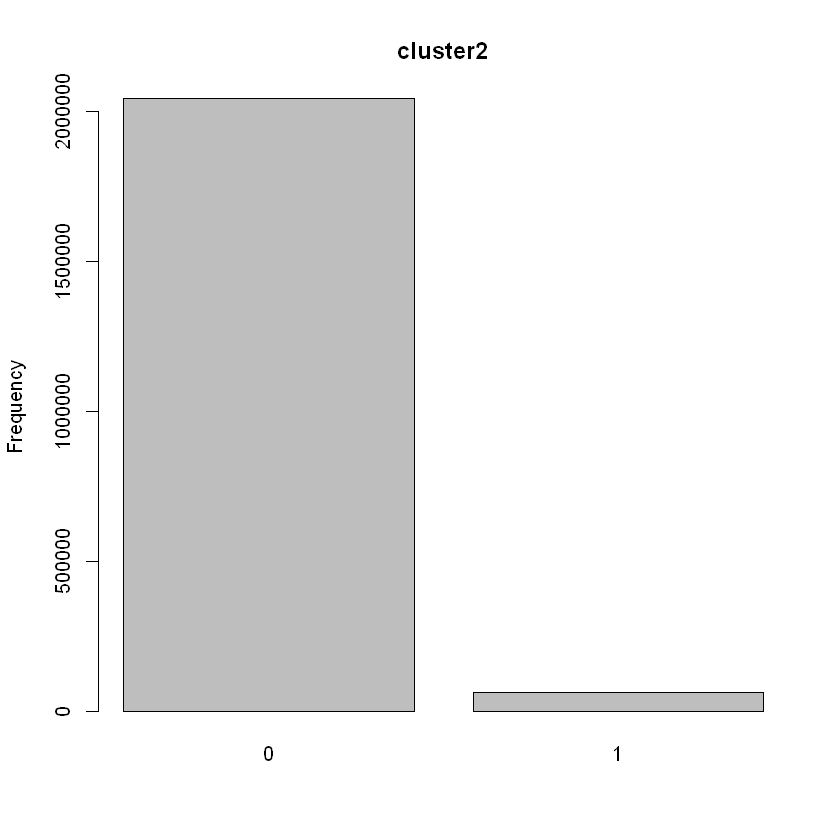

     [,1]
[1,]  0.7
[2,]  1.9


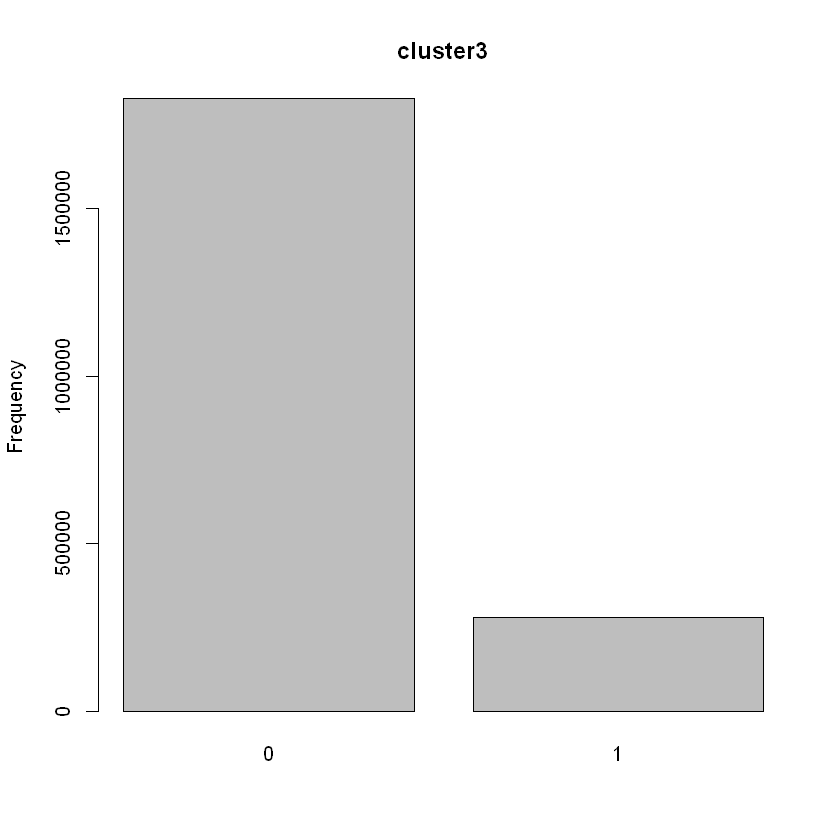

     [,1]
[1,]  0.7
[2,]  1.9


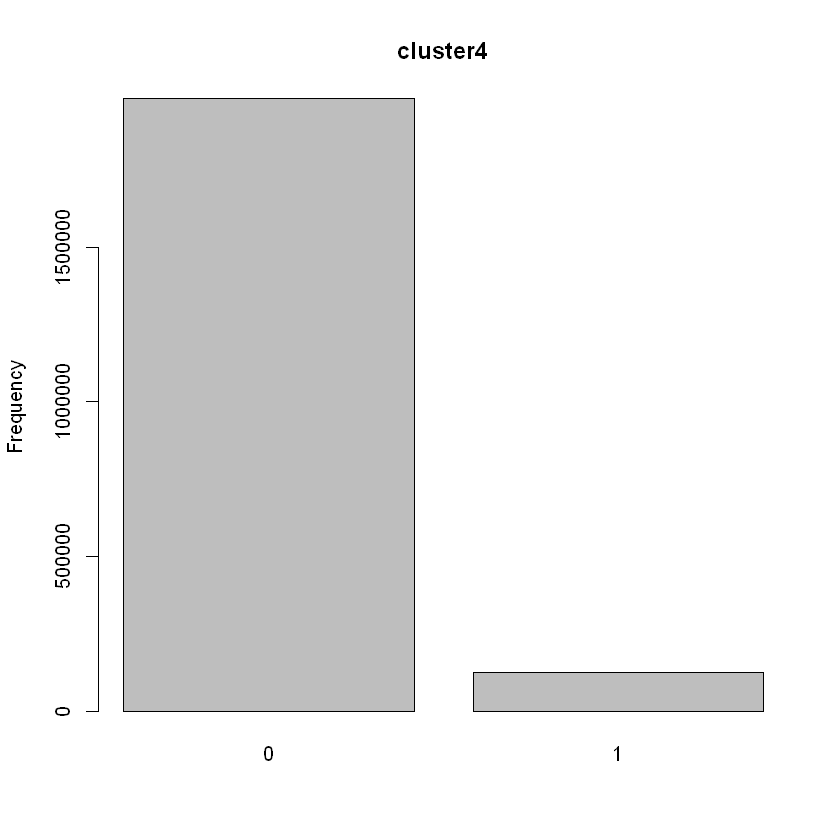

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


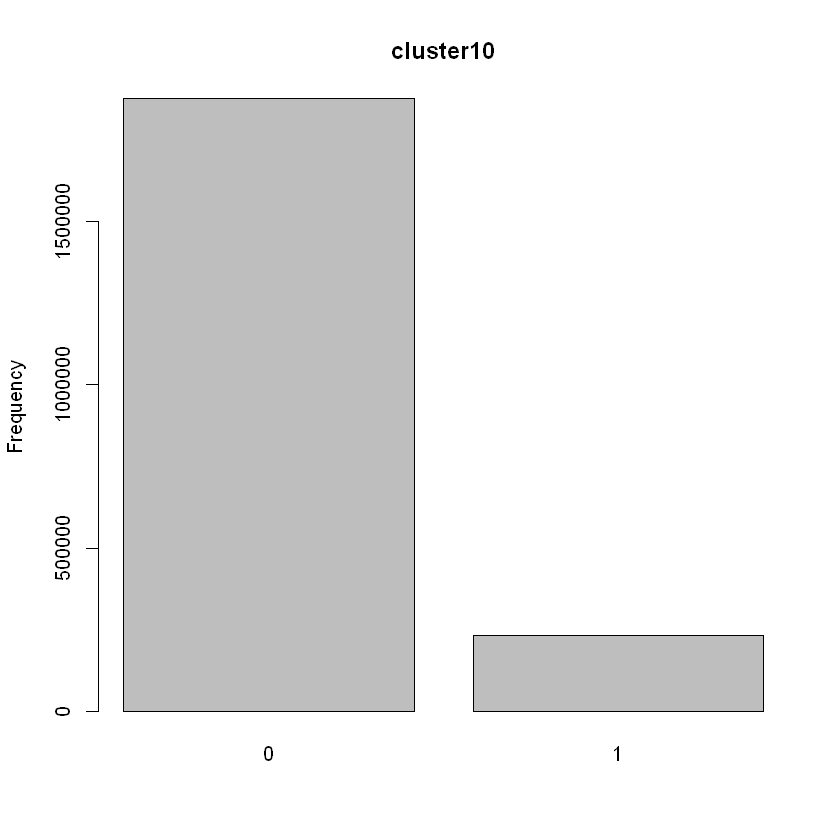

     [,1]
[1,]  0.7
[2,]  1.9


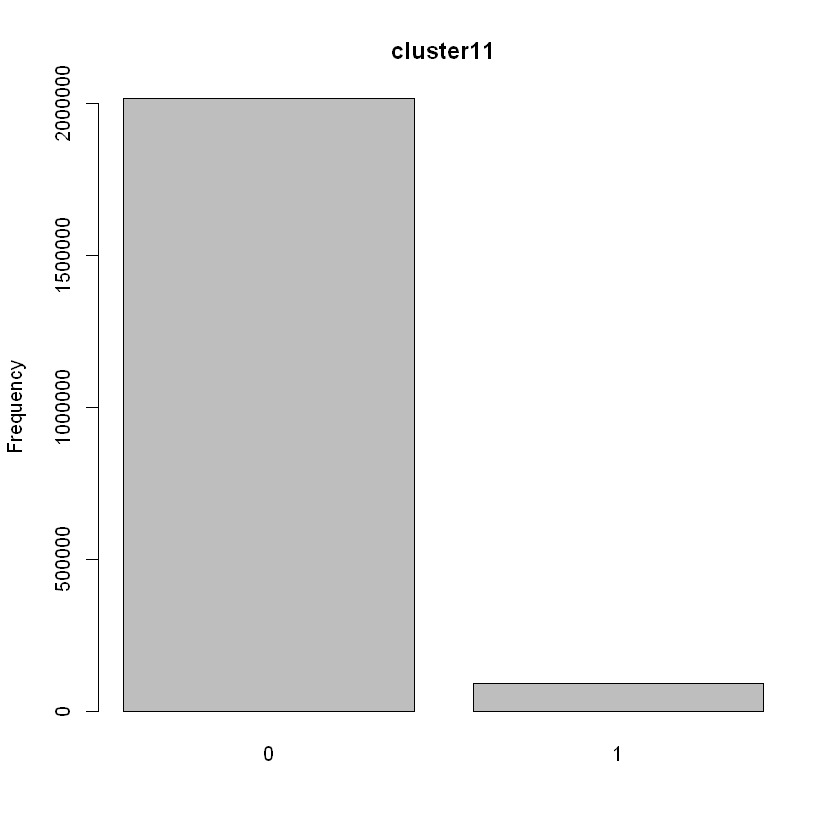

     [,1]
[1,]  0.7
[2,]  1.9


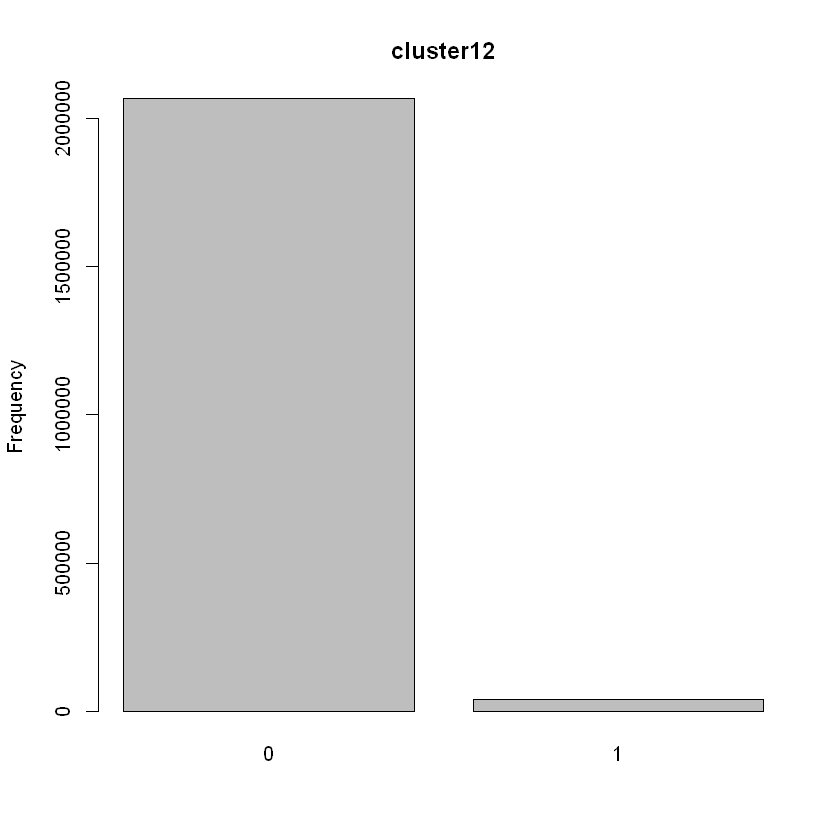

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


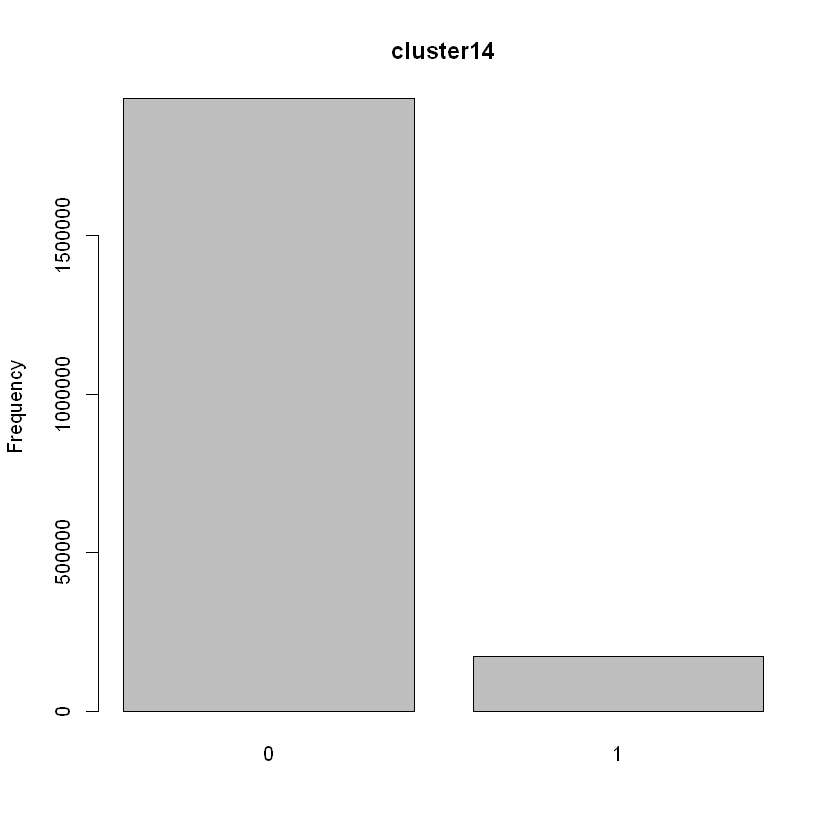

     [,1]
[1,]  0.7
[2,]  1.9


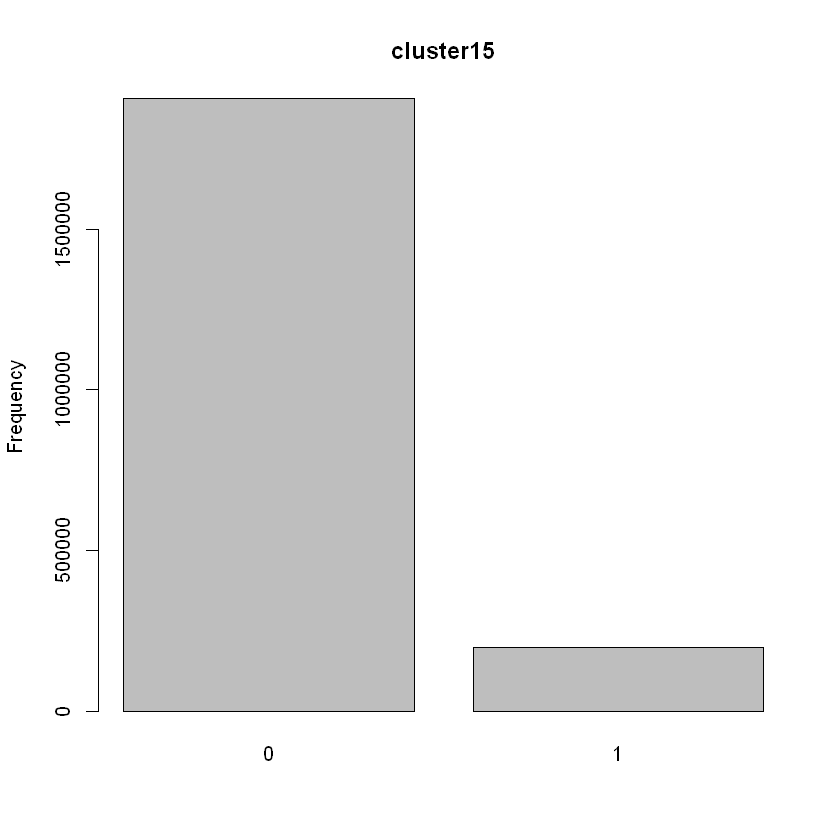

     [,1]
[1,]  0.7
[2,]  1.9


     [,1]
[1,]  0.7
[2,]  1.9


In [26]:
for (v in cf){
    print(barplot(table(df[[v]]), ylab='Frequency', main=v))
}

In [ ]:
exploreData(data=df[[nf]],y="total_unit_sales")

In [17]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

2.1 - Descriptive statistics
Generate a table showing the minimum, maximum, median, IQR, mean and standard deviation for each variable

In [19]:
install.packages("pastecs")
library(pastecs)

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'pastecs' is not available (for R version 3.6.1)"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"
Warning message:
"package 'pastecs' was built under R version 3.6.3"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last




In [29]:
stat.desc(df)

item_nbr store_nbr Year         month        total_unit_sales city
nbr.val  NA       NA        2.107345e+06 2.107345e+06  2.107345e+06    NA  
nbr.null NA       NA        0.000000e+00 0.000000e+00  1.100000e+01    NA  
nbr.na   NA       NA        0.000000e+00 0.000000e+00  0.000000e+00    NA  
min      NA       NA        2.013000e+03 1.000000e+00 -9.700000e+03    NA  
max      NA       NA        2.017000e+03 1.200000e+01  4.657100e+04    NA  
range    NA       NA        4.000000e+00 1.100000e+01  5.627100e+04    NA  
sum      NA       NA        4.246293e+09 1.334742e+07  4.744671e+08    NA  
median   NA       NA        2.015000e+03 6.000000e+00  1.150000e+02    NA  
mean     NA       NA        2.014997e+03 6.333762e+00  2.251492e+02    NA  
SE.mean  NA       NA        9.245181e-04 2.319956e-03  2.711367e-01    NA  
CI.mean  NA       NA        1.812023e-03 4.547032e-03  5.314184e-01    NA  
var      NA       NA        1.801219e+00 1.134214e+01  1.549217e+05    NA  
std.dev  NA       NA        1.342095e+00 3.367809e+00  3.936009e+02    NA  
coef.var NA       NA        6.660532e-04 5.317234e-01  1.748178e+00    NA  
         state store_type store_cluster prev_month_sales ... cluster8    
nbr.val  NA    NA         NA             2.063247e+06    ... 2.107345e+06
nbr.null NA    NA         NA             1.100000e+01    ... 1.977878e+06
nbr.na   NA    NA         NA             4.409800e+04    ... 0.000000e+00
min      NA    NA         NA            -9.700000e+03    ... 0.000000e+00
max      NA    NA         NA             4.657100e+04    ... 1.000000e+00
range    NA    NA         NA             5.627100e+04    ... 1.000000e+00
sum      NA    NA         NA             4.697380e+08    ... 1.294670e+05
median   NA    NA         NA             1.170000e+02    ... 0.000000e+00
mean     NA    NA         NA             2.276693e+02    ... 6.143607e-02
SE.mean  NA    NA         NA             2.755970e-01    ... 1.654154e-04
CI.mean  NA    NA         NA             5.401606e-01    ... 3.242084e-04
var      NA    NA         NA             1.567113e+05    ... 5.766171e-02
std.dev  NA    NA         NA             3.958678e+02    ... 2.401285e-01
coef.var NA    NA         NA             1.738784e+00    ... 3.908592e+00
         cluster9     cluster10    cluster11    cluster12    cluster13   
nbr.val  2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06
nbr.null 2.022976e+06 1.875220e+06 2.016551e+06 2.066305e+06 1.946043e+06
nbr.na   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min      0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
max      1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
range    1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
sum      8.436900e+04 2.321250e+05 9.079400e+04 4.104000e+04 1.613020e+05
median   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
mean     4.003568e-02 1.101504e-01 4.308454e-02 1.947474e-02 7.654276e-02
SE.mean  1.350465e-04 2.156670e-04 1.398717e-04 9.519136e-05 1.831440e-04
CI.mean  2.646865e-04 4.226998e-04 2.741436e-04 1.865717e-04 3.589559e-04
var      3.843285e-02 9.801737e-02 4.122829e-02 1.909549e-02 7.068400e-02
std.dev  1.960430e-01 3.130773e-01 2.030475e-01 1.381864e-01 2.658646e-01
coef.var 4.896706e+00 2.842270e+00 4.712769e+00 7.095674e+00 3.473413e+00
         cluster14    cluster15    cluster16    cluster17   
nbr.val  2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06
nbr.null 1.933559e+06 1.906991e+06 2.066897e+06 2.064388e+06
nbr.na   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min      0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
max      1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
range    1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
sum      1.737860e+05 2.003540e+05 4.044800e+04 4.295700e+04
median   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
mean     8.246680e-02 9.507413e-02 1.919382e-02 2.038442e-02
SE.mean  1.894885e-04 2.020552e-04 9.45

In [30]:
summary(df)

   item_nbr          store_nbr              Year          month       
 Length:2107345     Length:2107345     Min.   :2013   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:2014   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median :2015   Median : 6.000  
                                       Mean   :2015   Mean   : 6.334  
                                       3rd Qu.:2016   3rd Qu.: 9.000  
                                       Max.   :2017   Max.   :12.000  
                                                                      
 total_unit_sales      city              state            store_type       
 Min.   :-9700.0   Length:2107345     Length:2107345     Length:2107345    
 1st Qu.:   56.0   Class :character   Class :character   Class :character  
 Median :  115.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  225.2                                                           
 3rd Qu.:  243.0                                    

Warning message:
"package 'GGally' was built under R version 3.6.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa


Warning message in ggcorr(df[, c(1:20, 5)], method = c("pairwise", "spearman"), :
"data in column(s) 'item_nbr', 'store_nbr', 'city', 'state', 'store_type', 'store_cluster' are not numeric and were ignored"
Warning message in ggcorr(df[, c(21:40, 5)], method = c("pairwise", "spearman"), :
"data in column(s) 'family', 'class', 'perishable' are not numeric and were ignored"


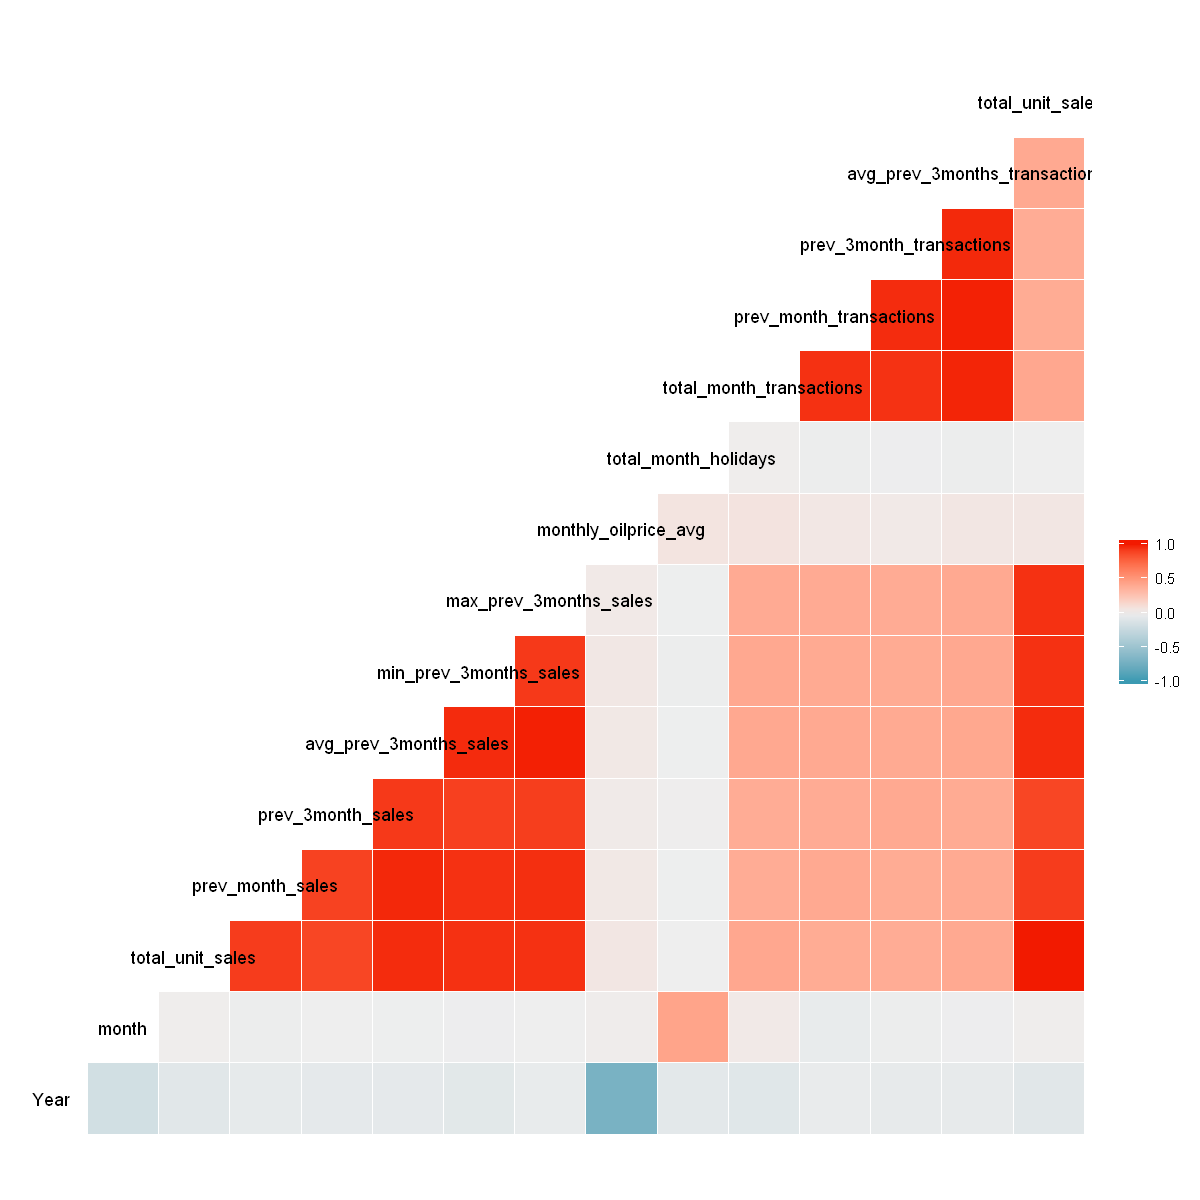

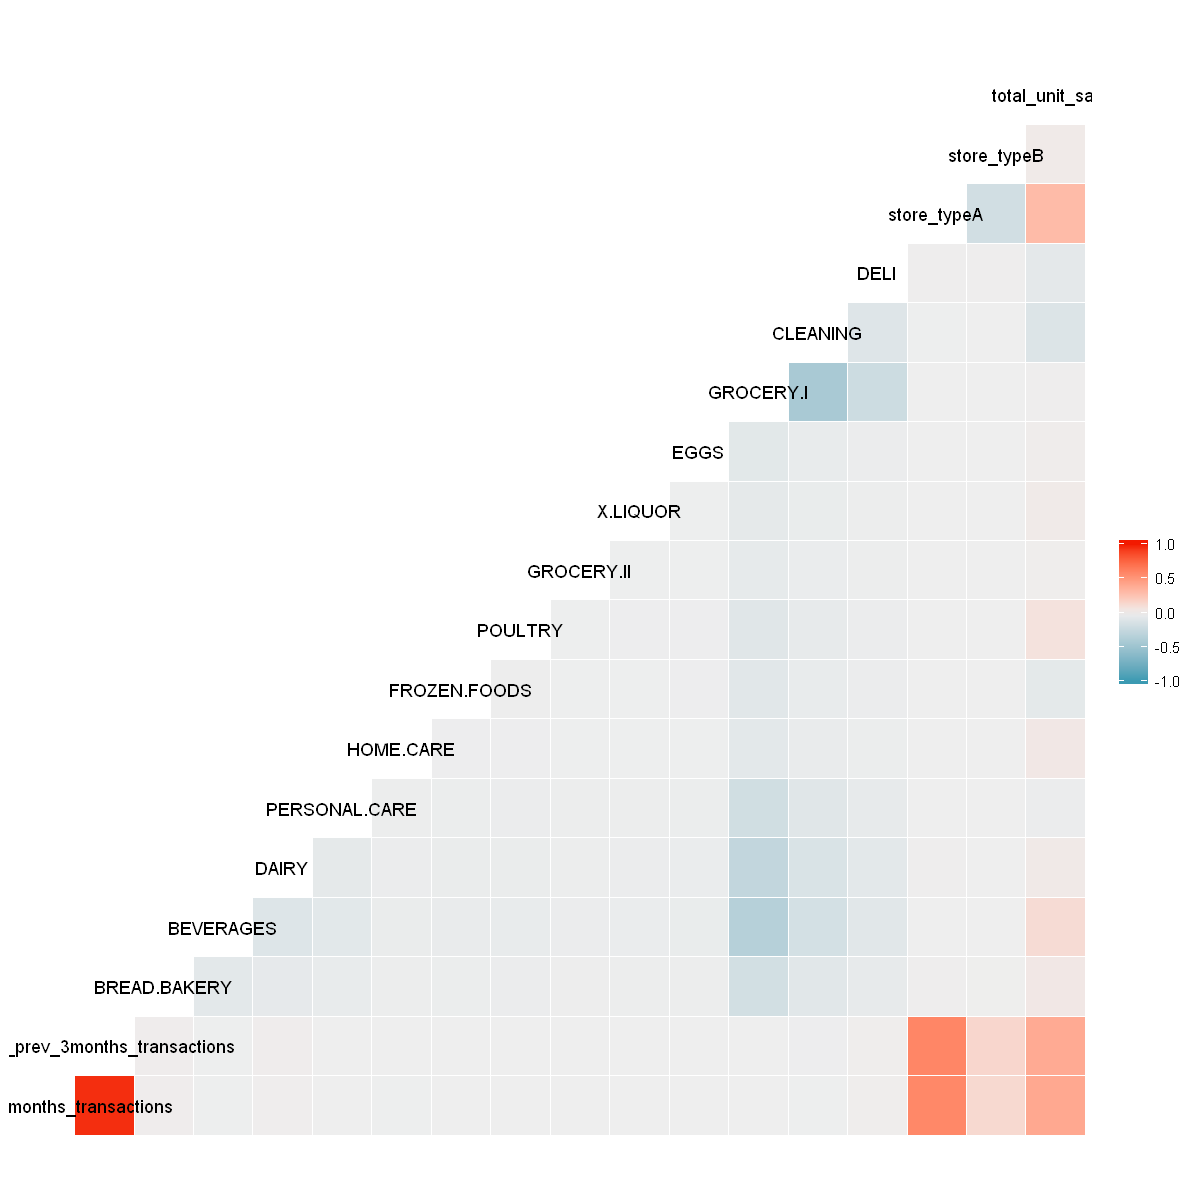

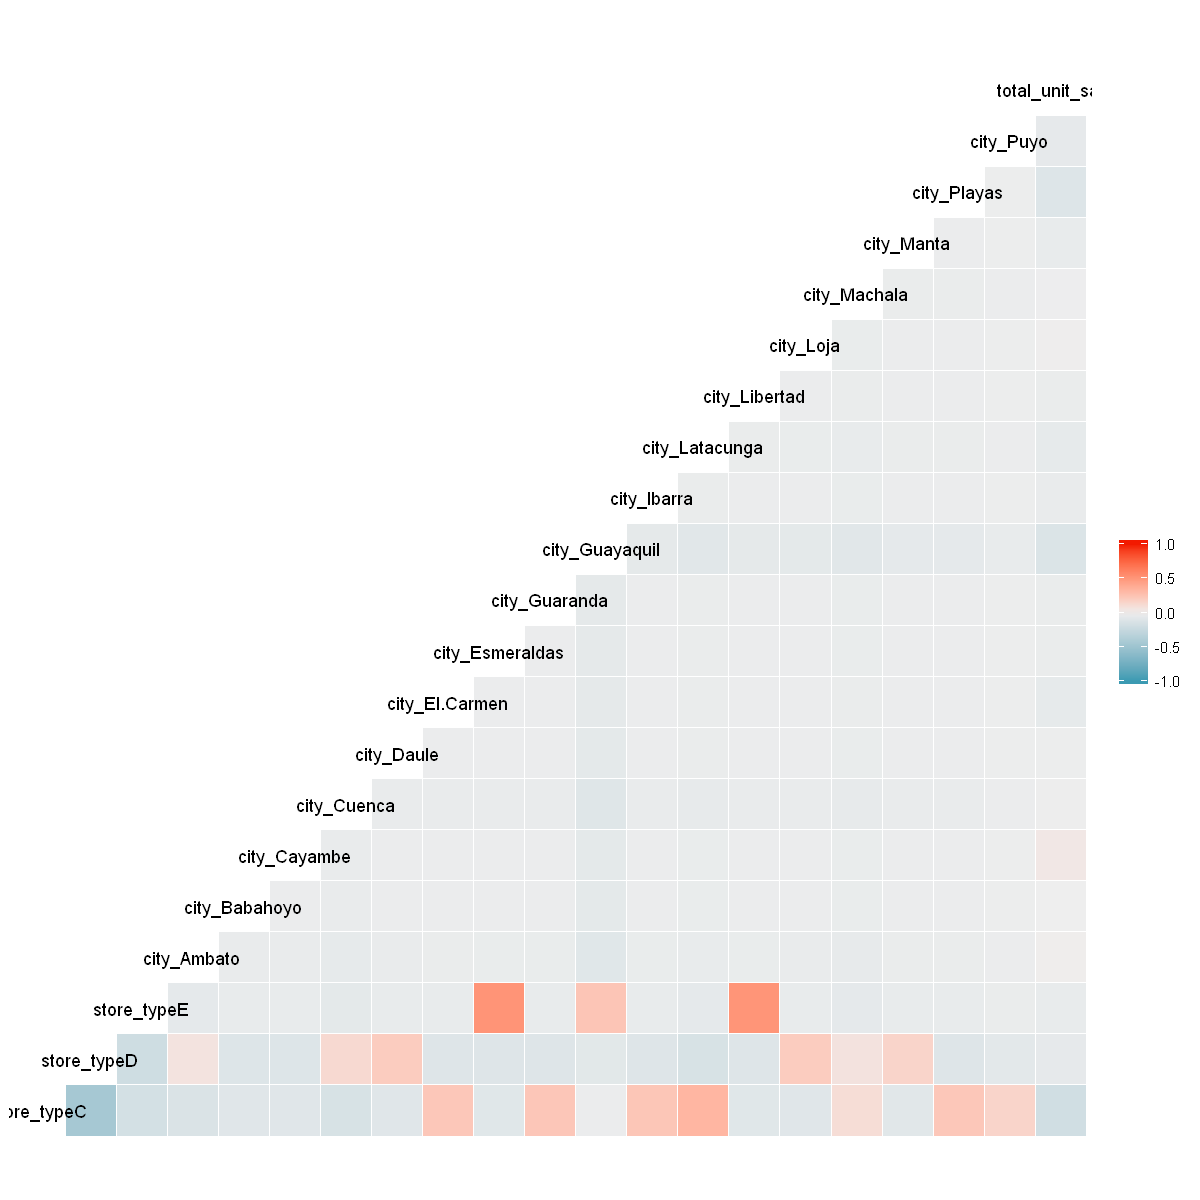

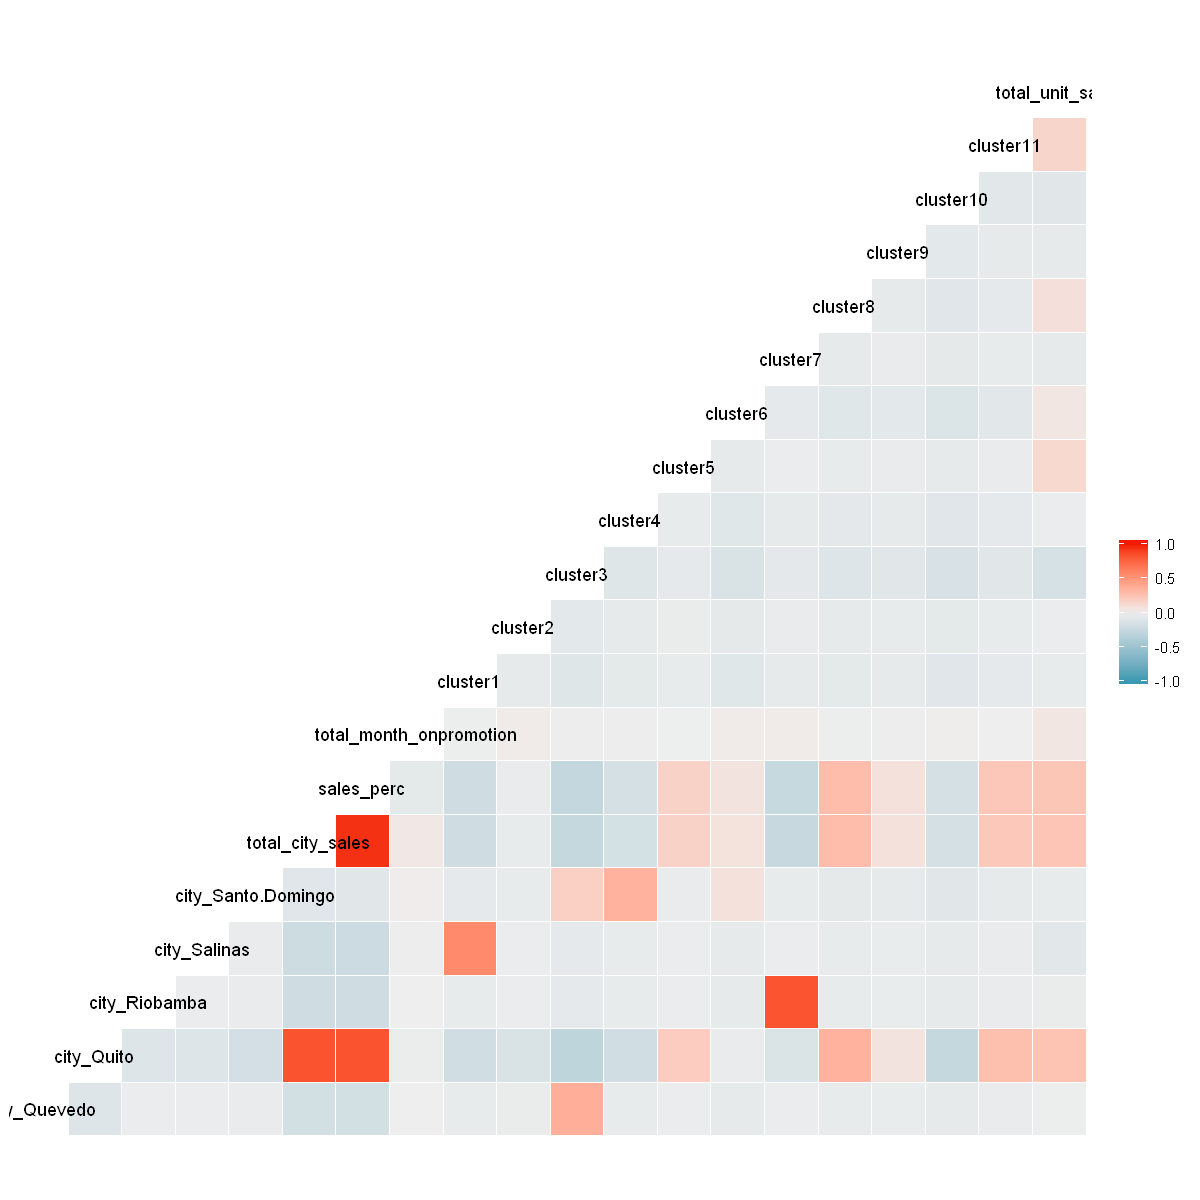

In [67]:
library(GGally)
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorr(df[,c(1:20,5)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(21:40,5)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(41:60,5)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(61:79,5)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)




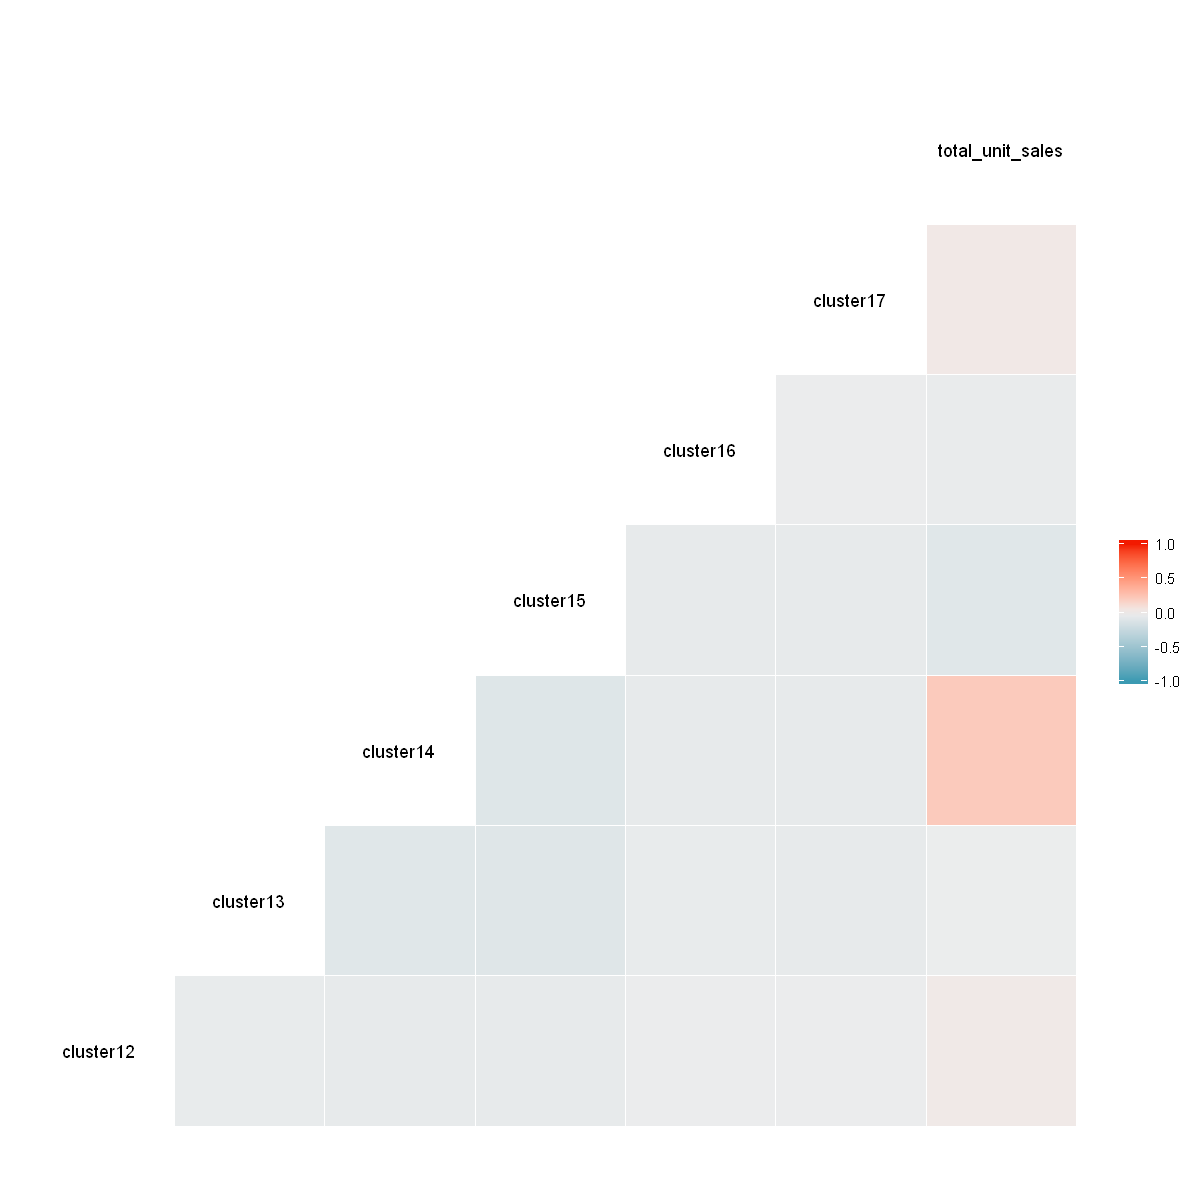

In [68]:
library(GGally)
ggcorr(df[,c(80:85,5)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

2.4 Describe the outcome variable
Histogram
Histogram by categories

In [31]:
#distribution of revenue- question 2.4
print(ggplot(df,aes(x=df$total_unit_sales)) +
    geom_density(adjust=2))


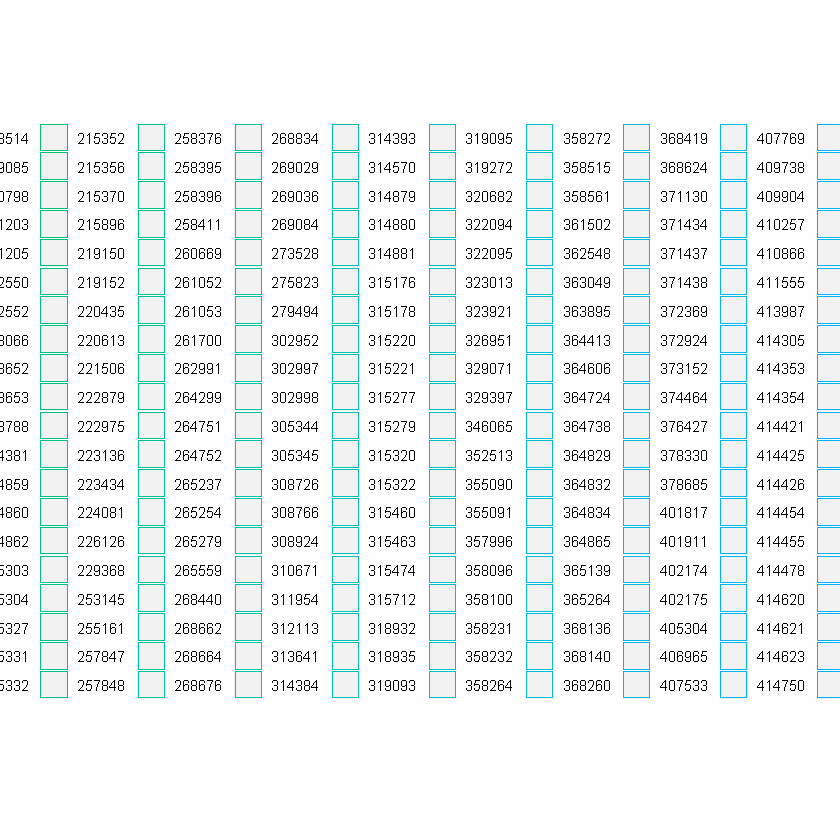

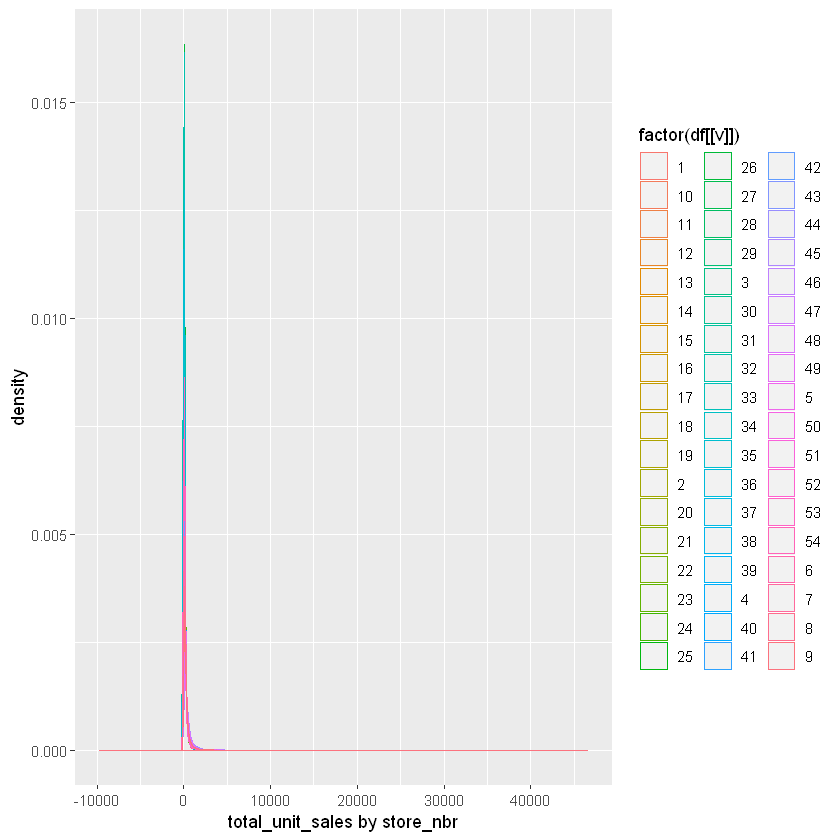

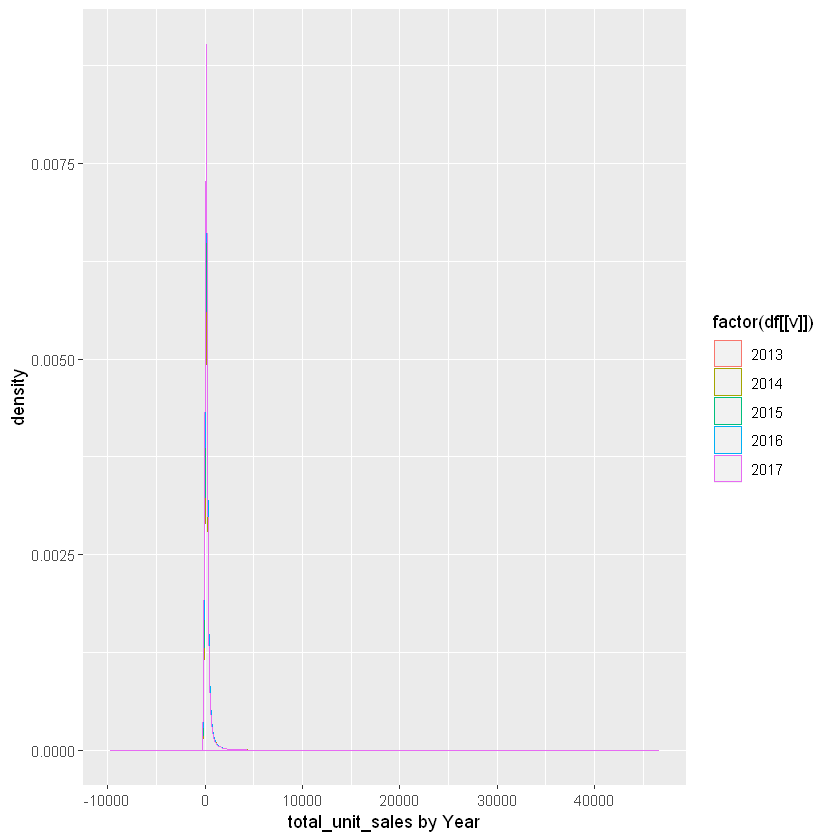

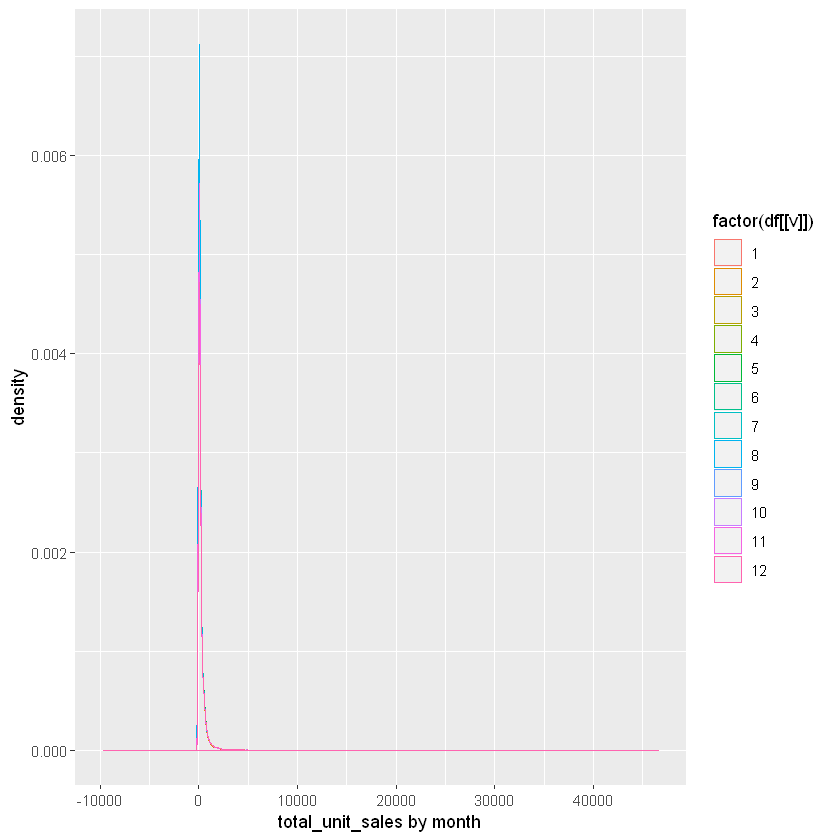

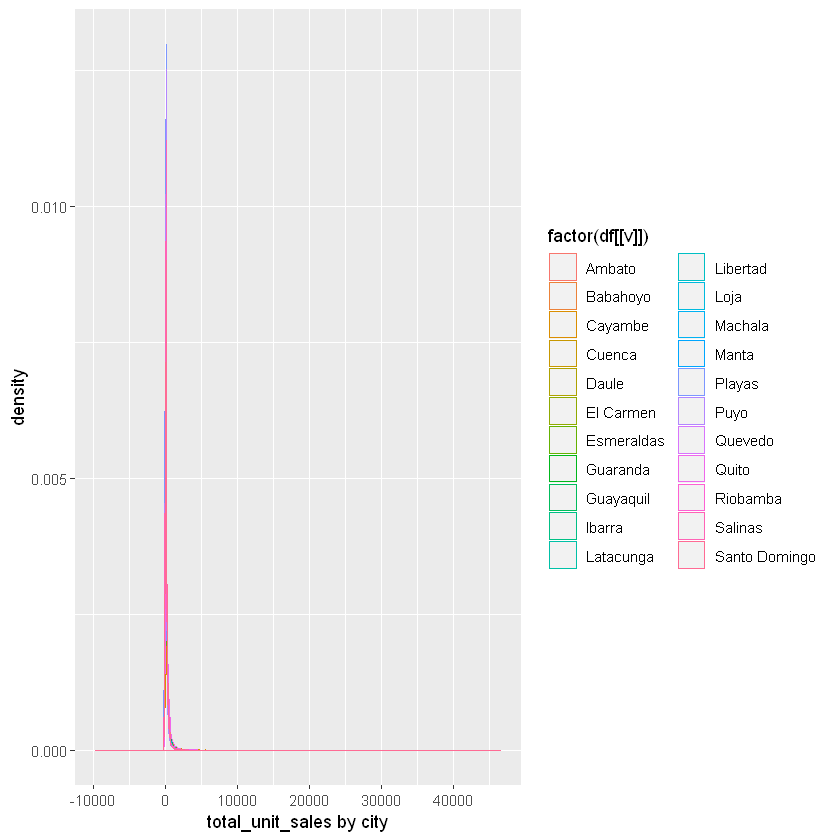

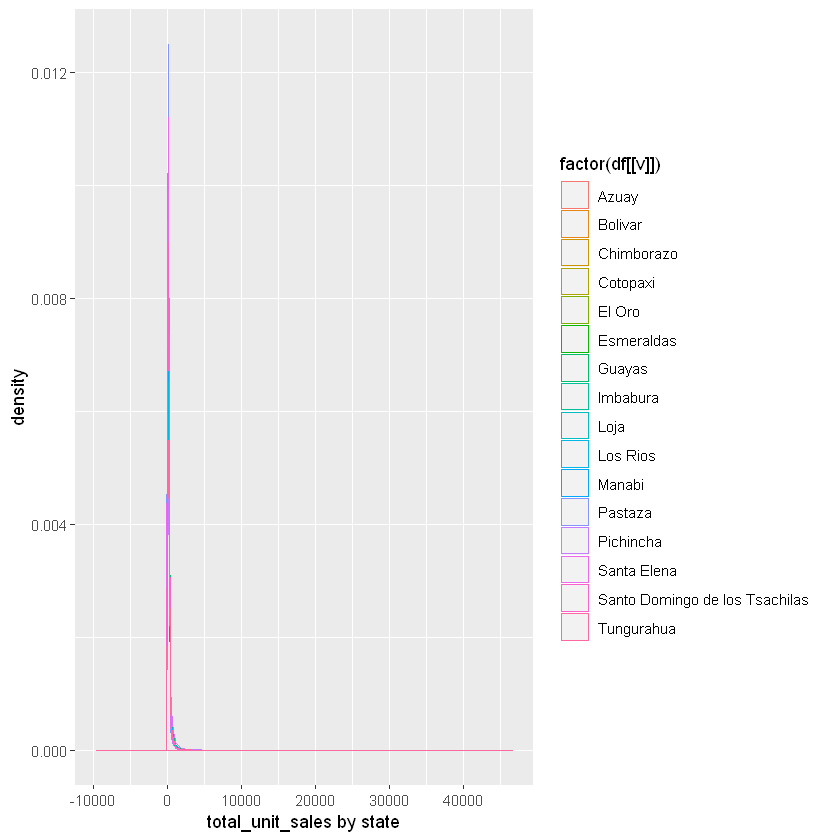

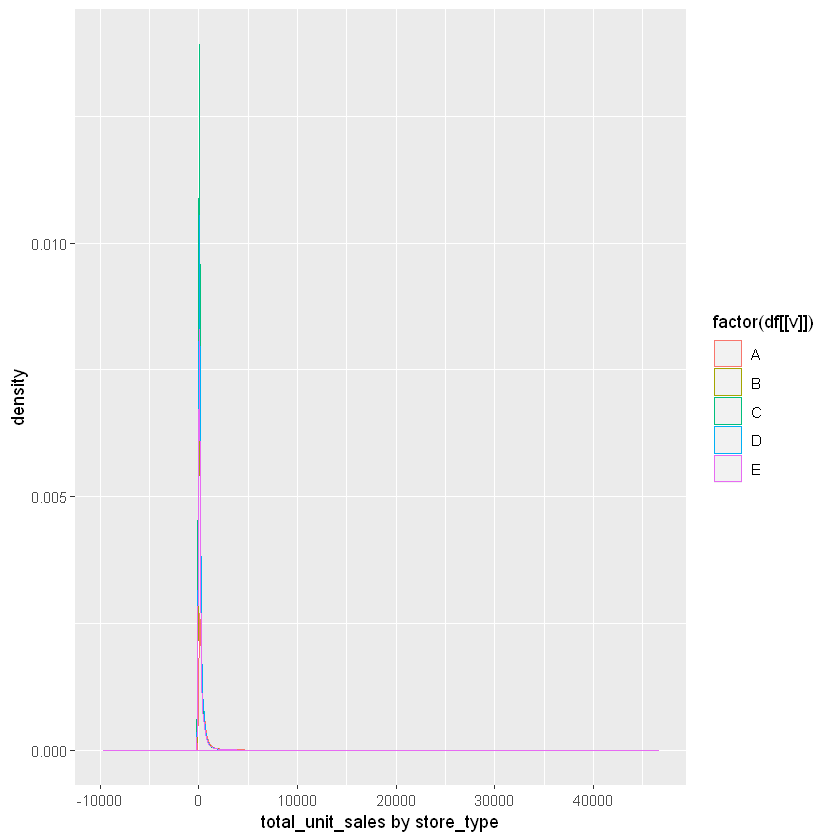

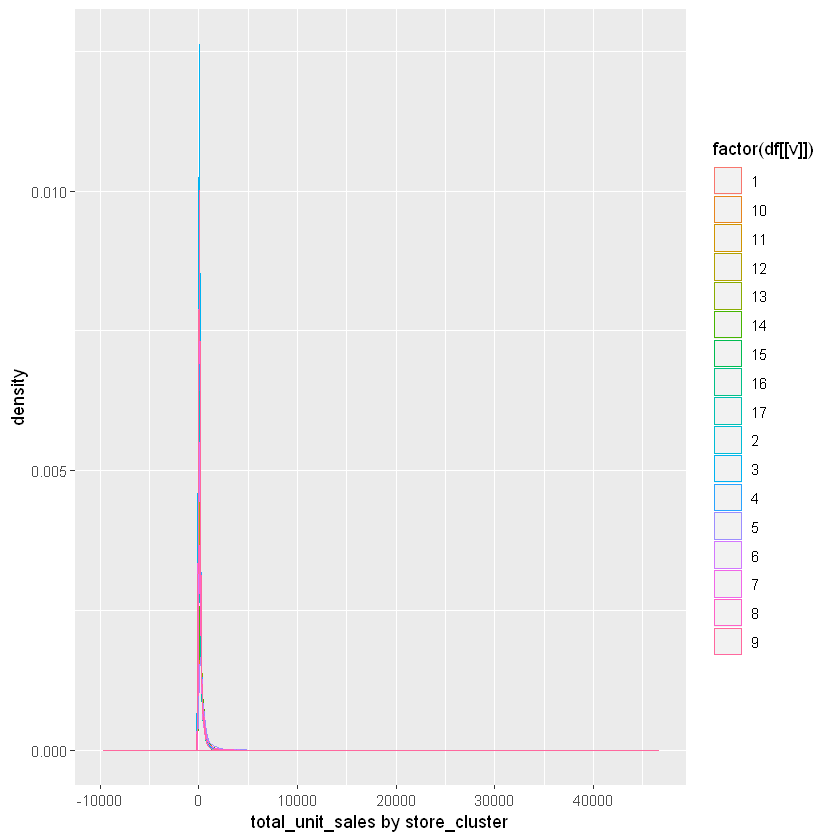

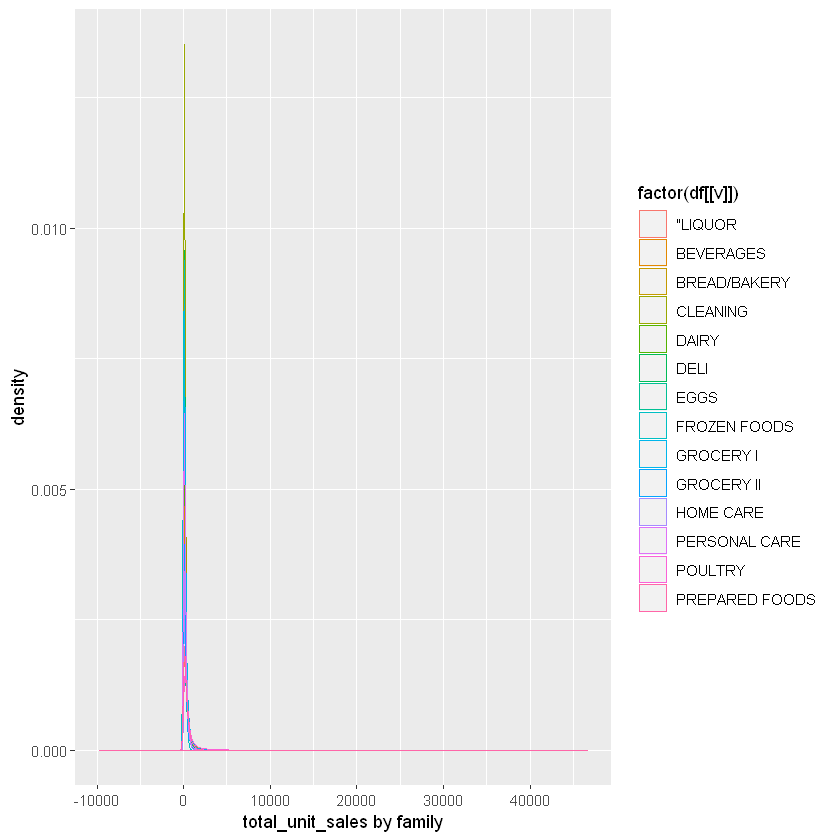

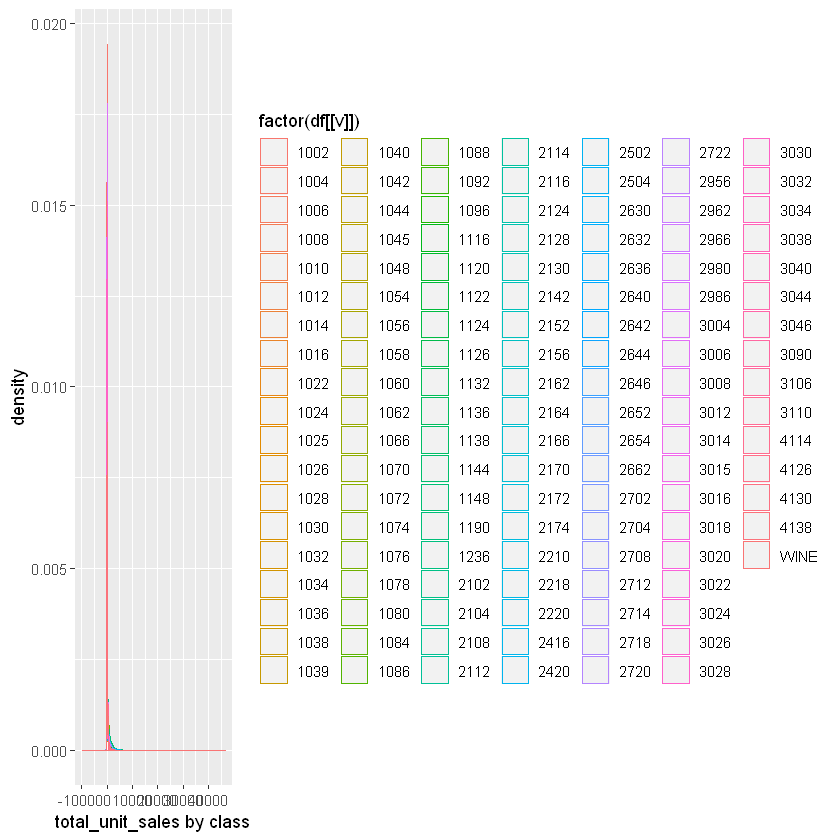

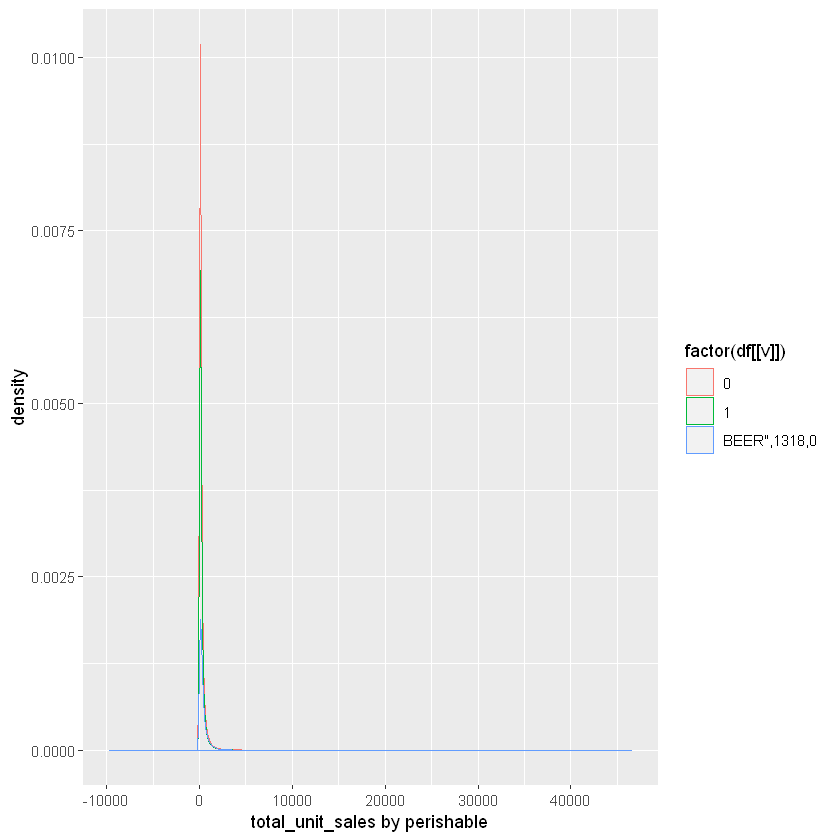

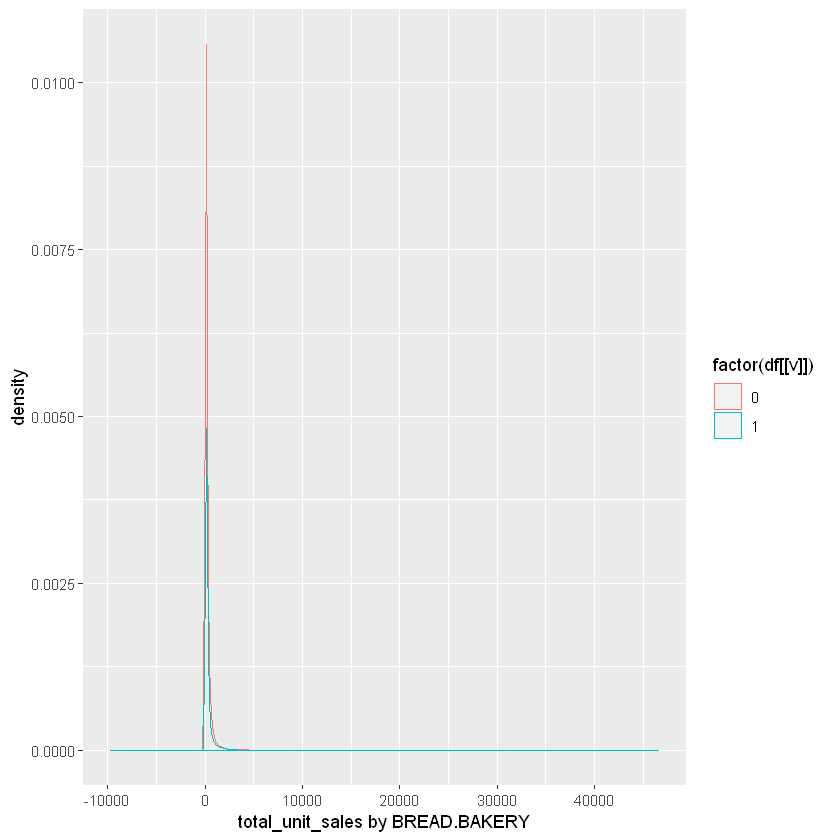

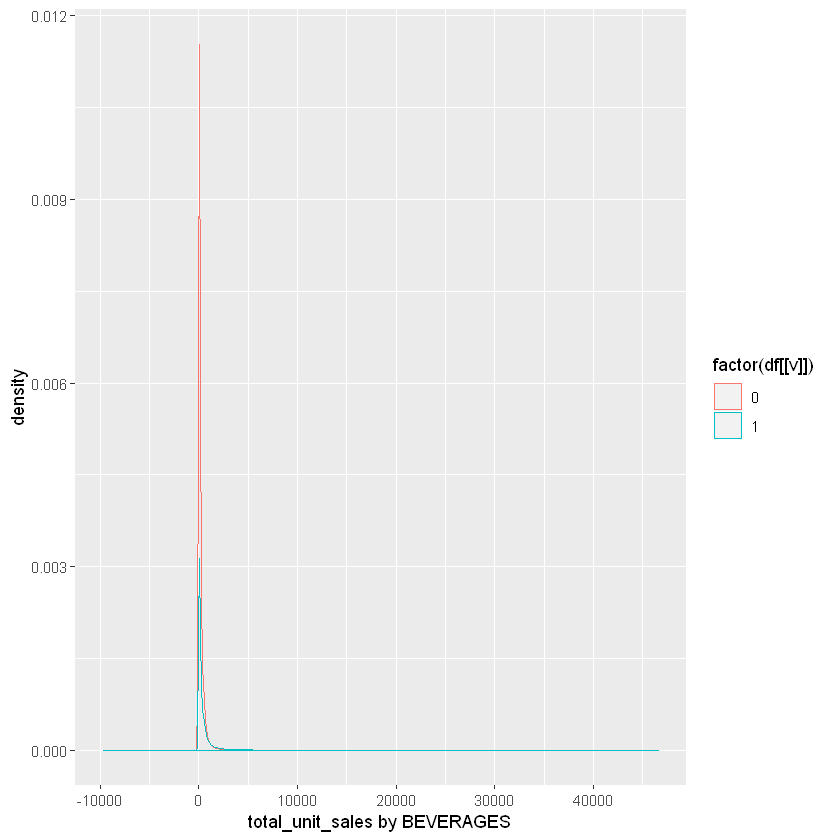

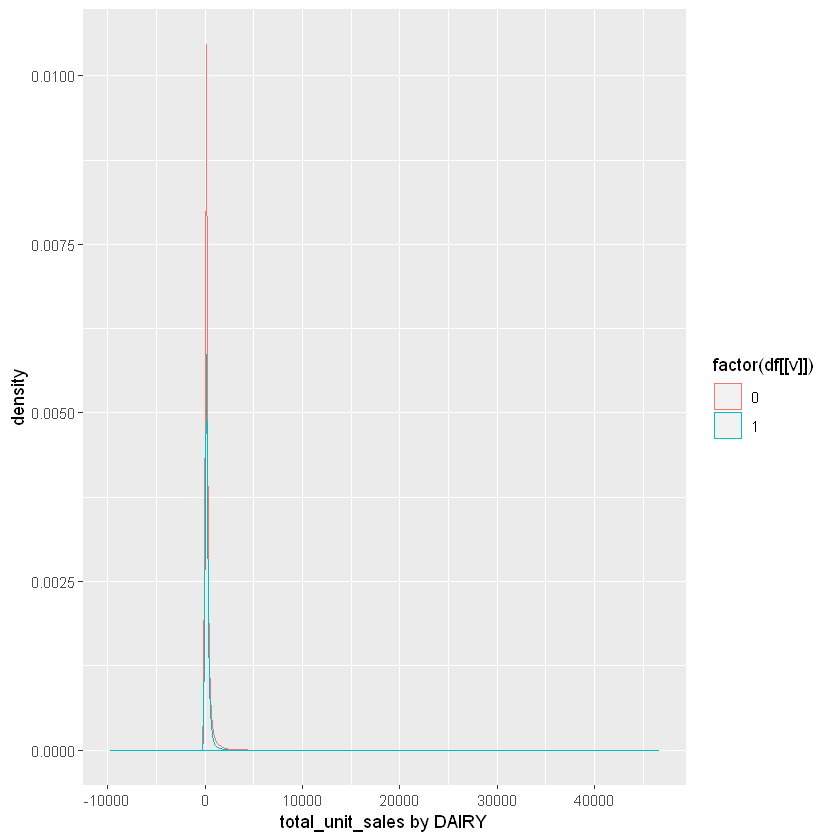

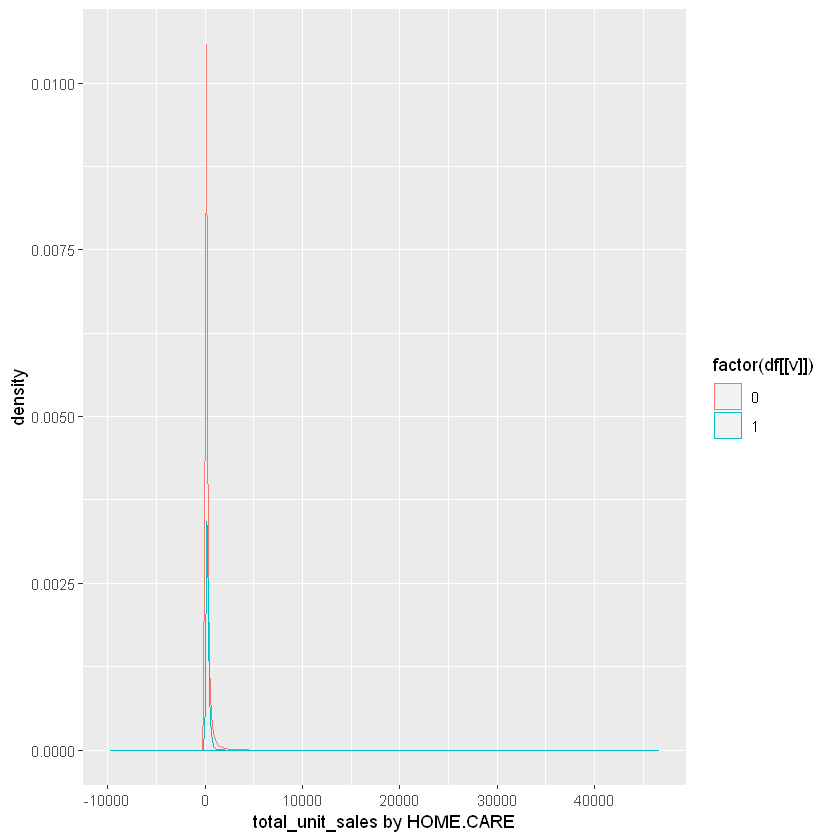

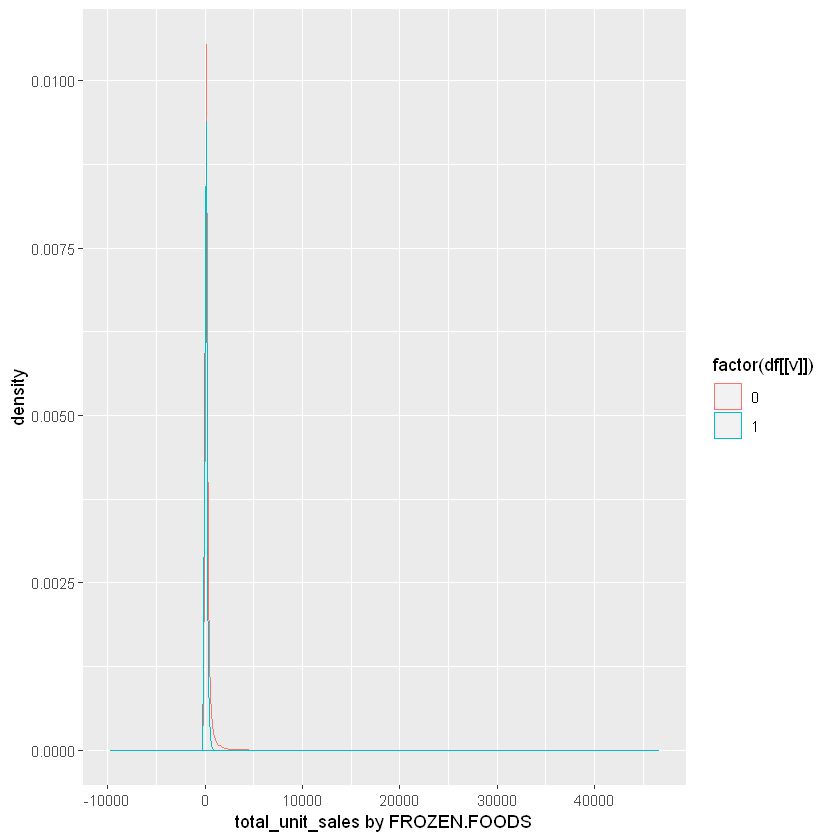

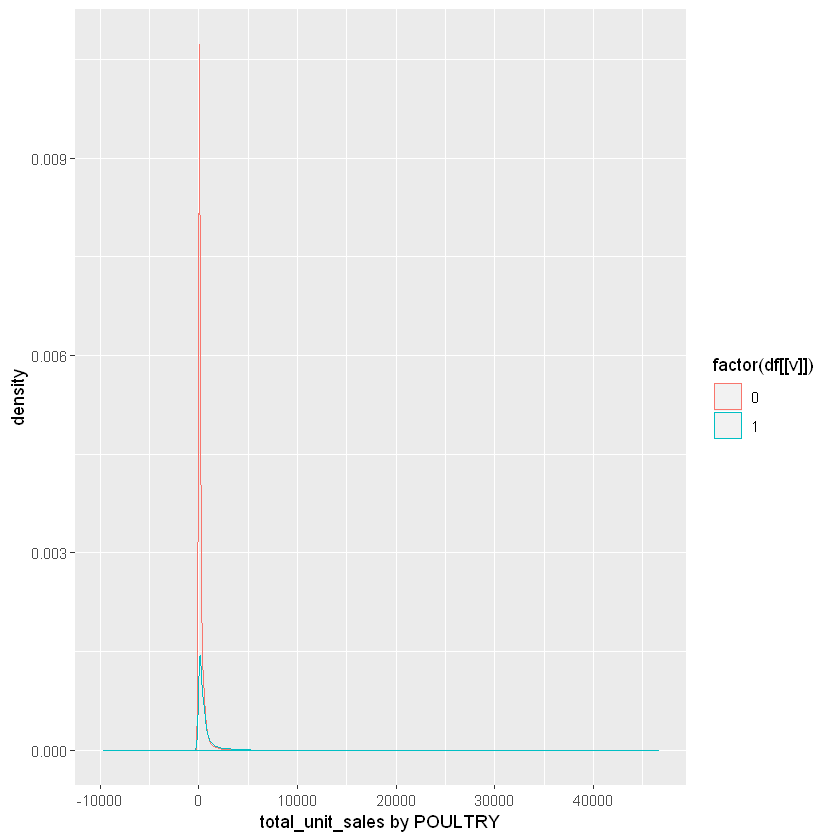

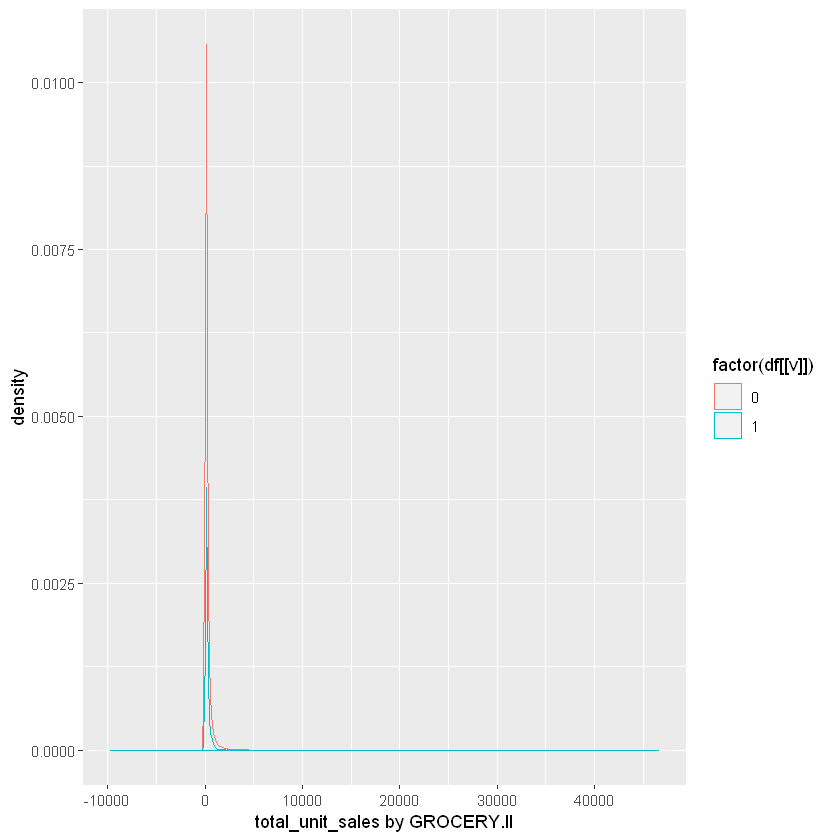

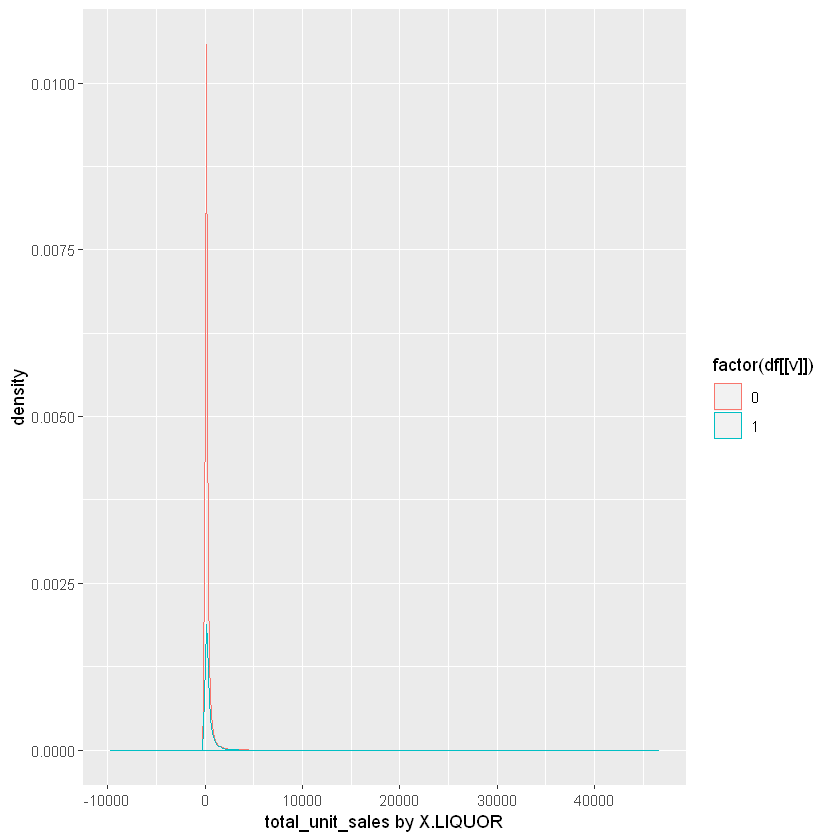

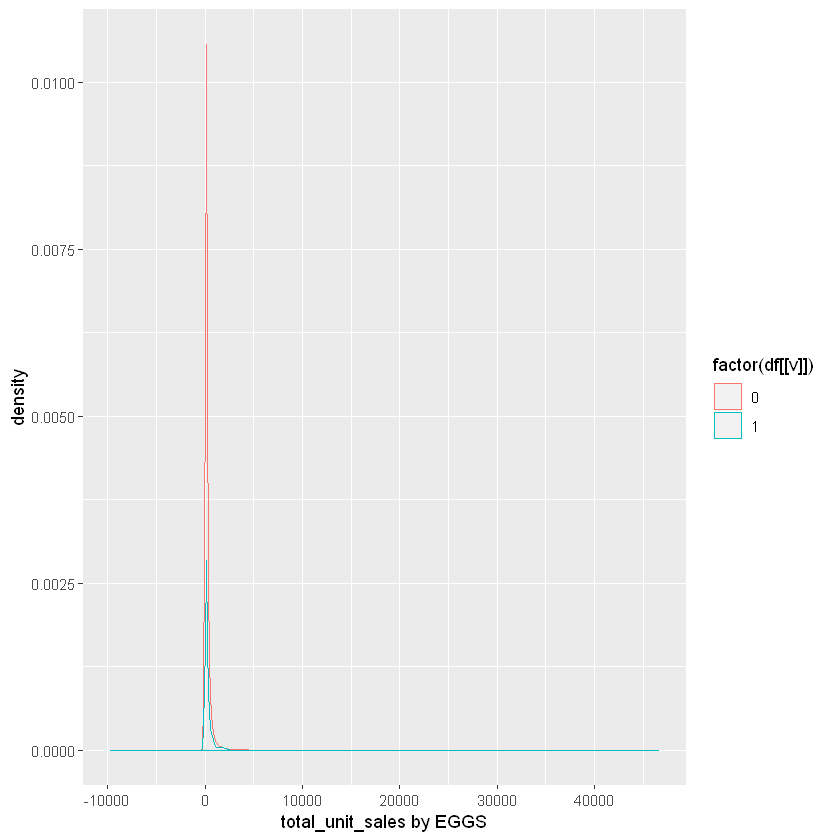

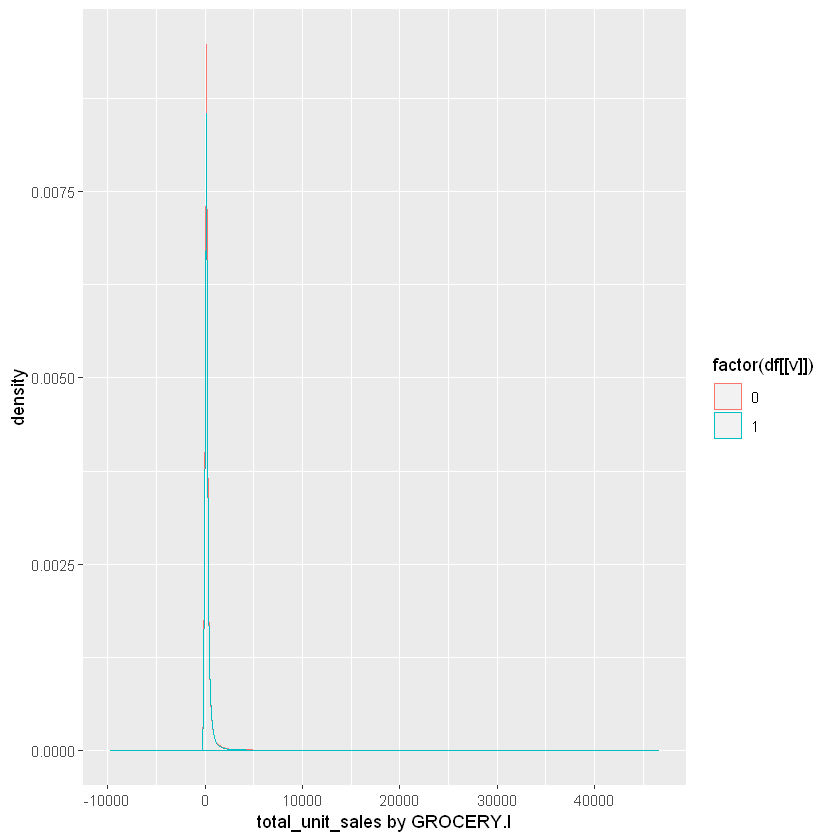

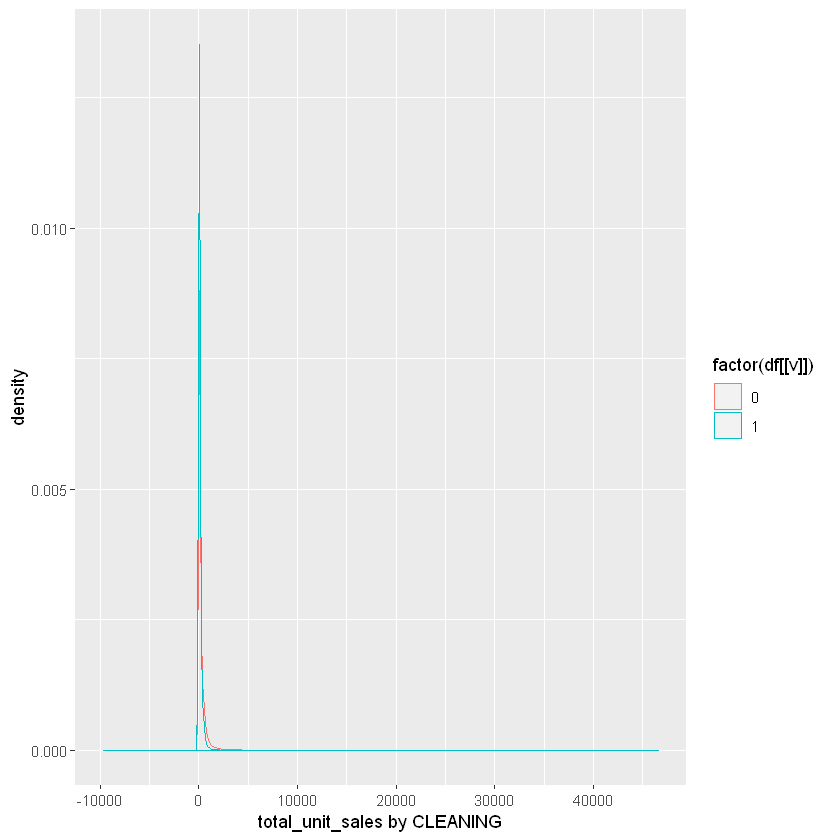

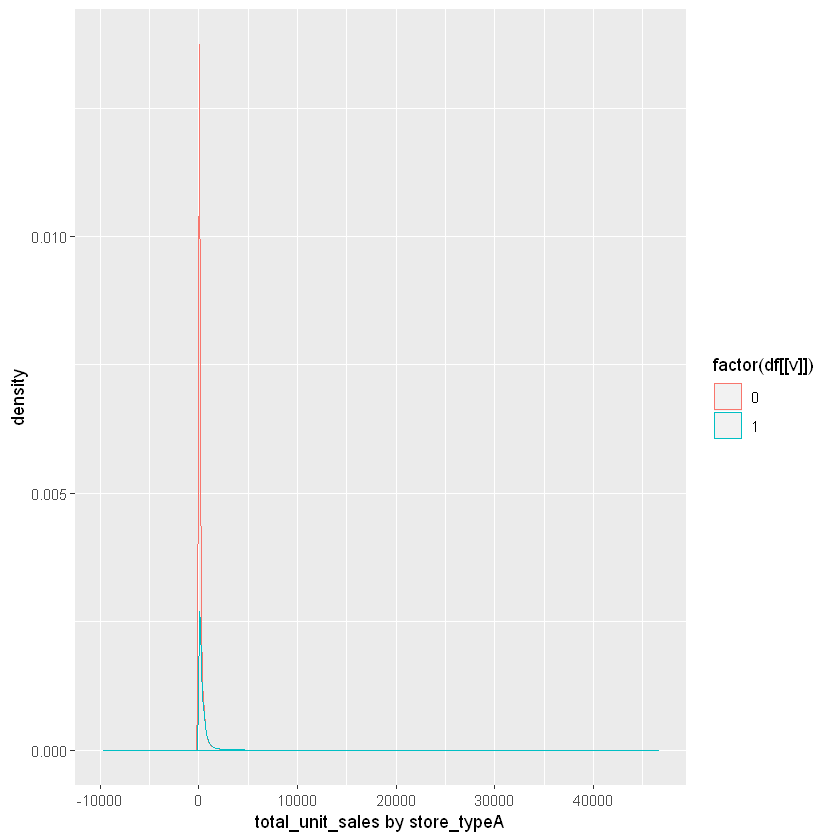

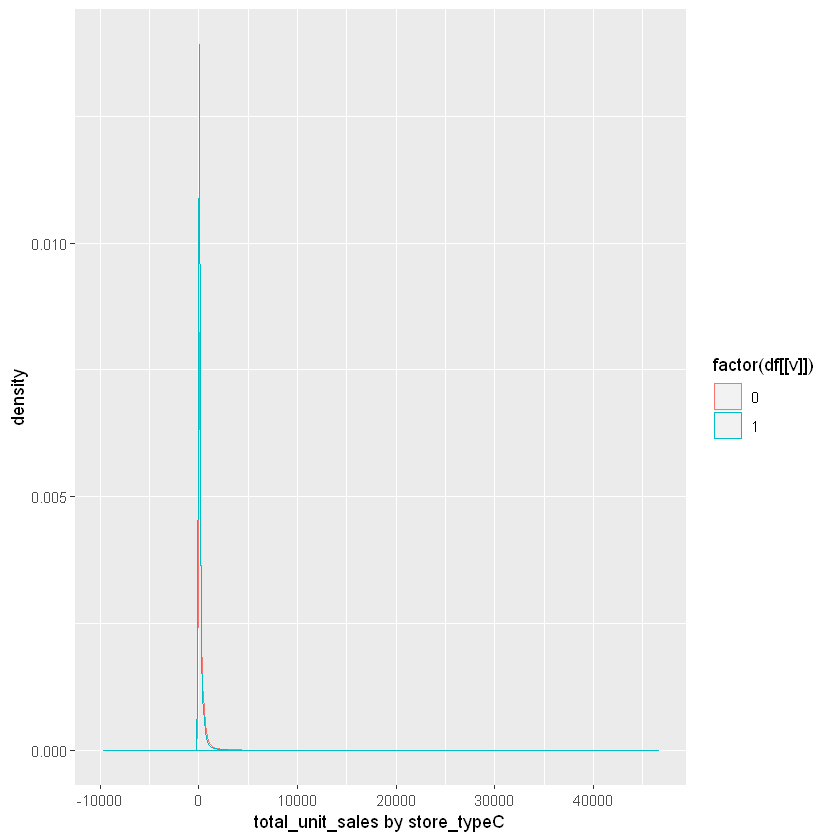

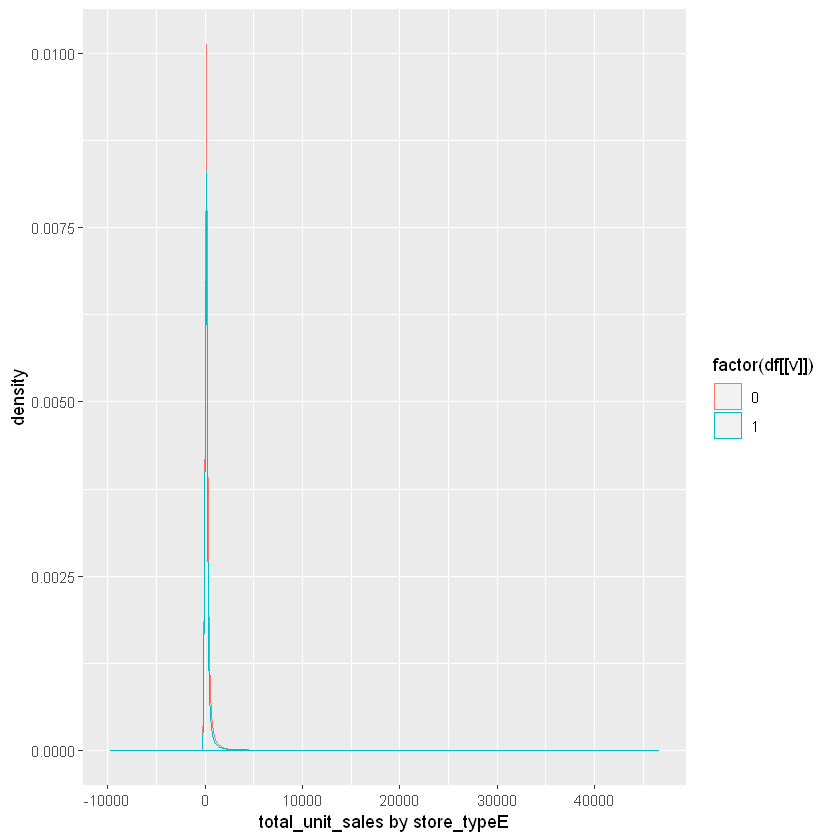

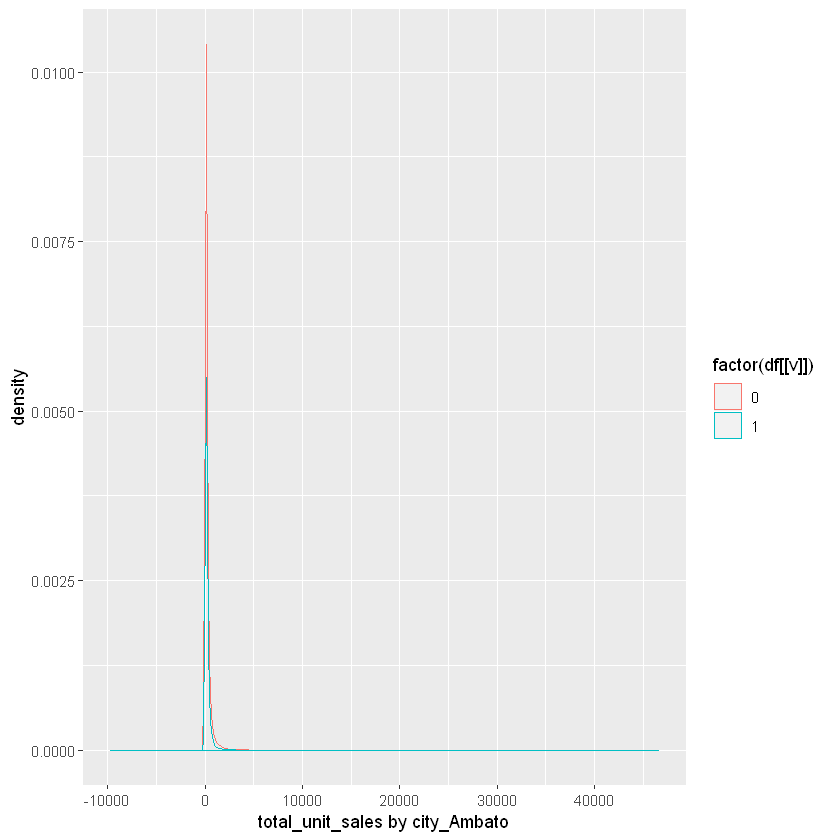

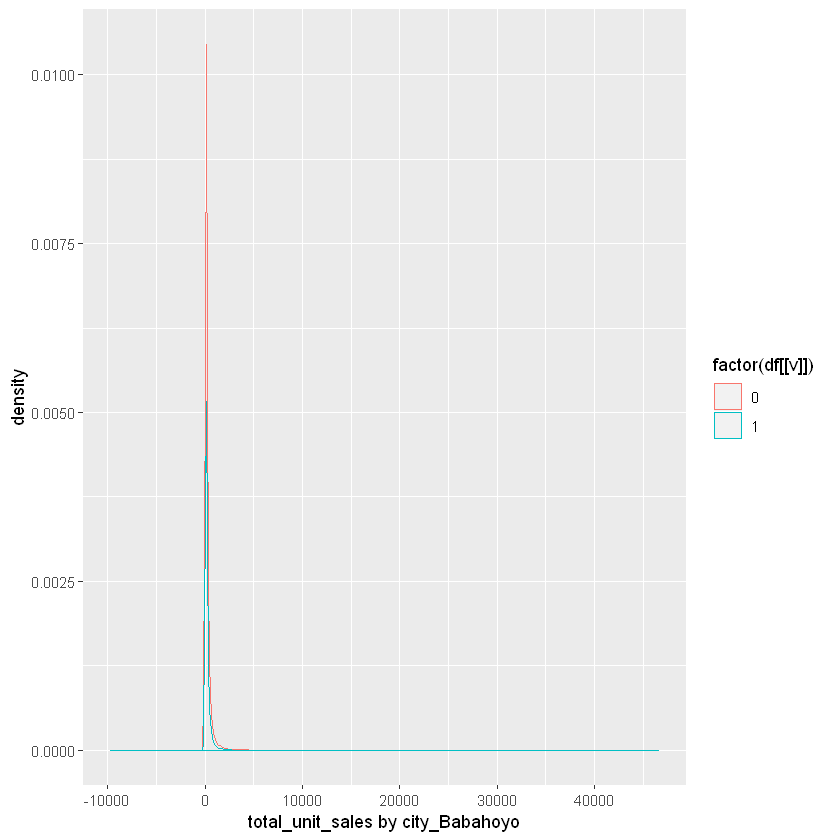

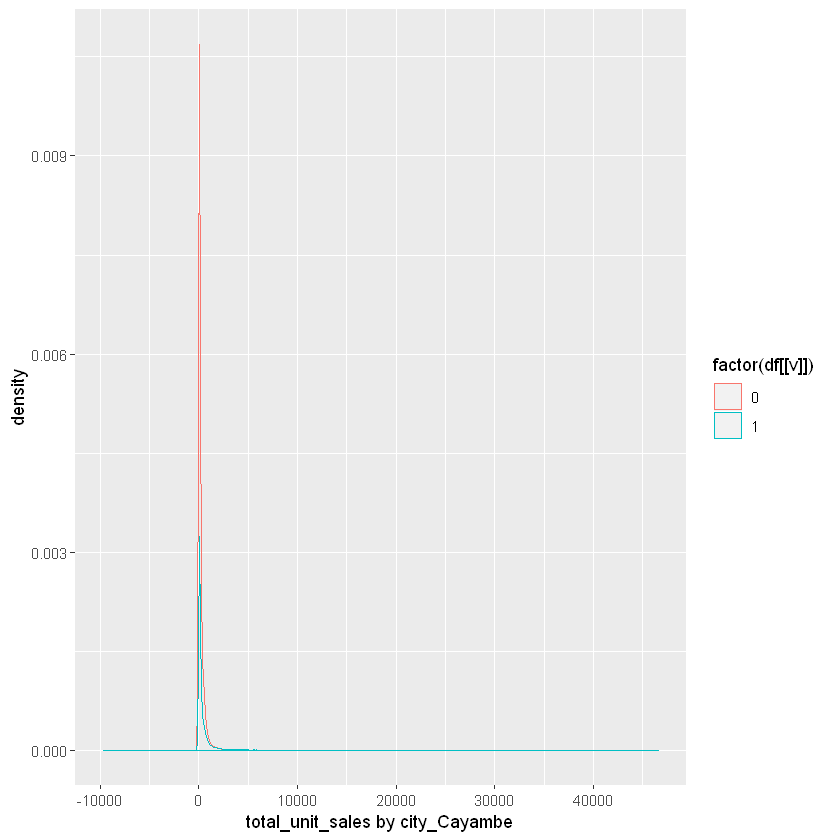

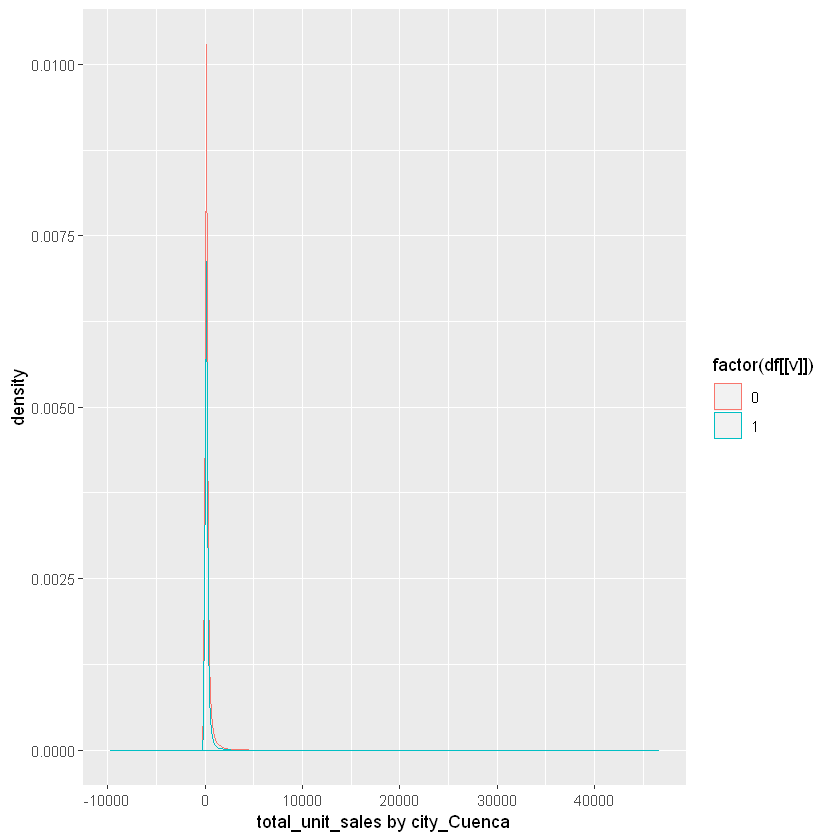

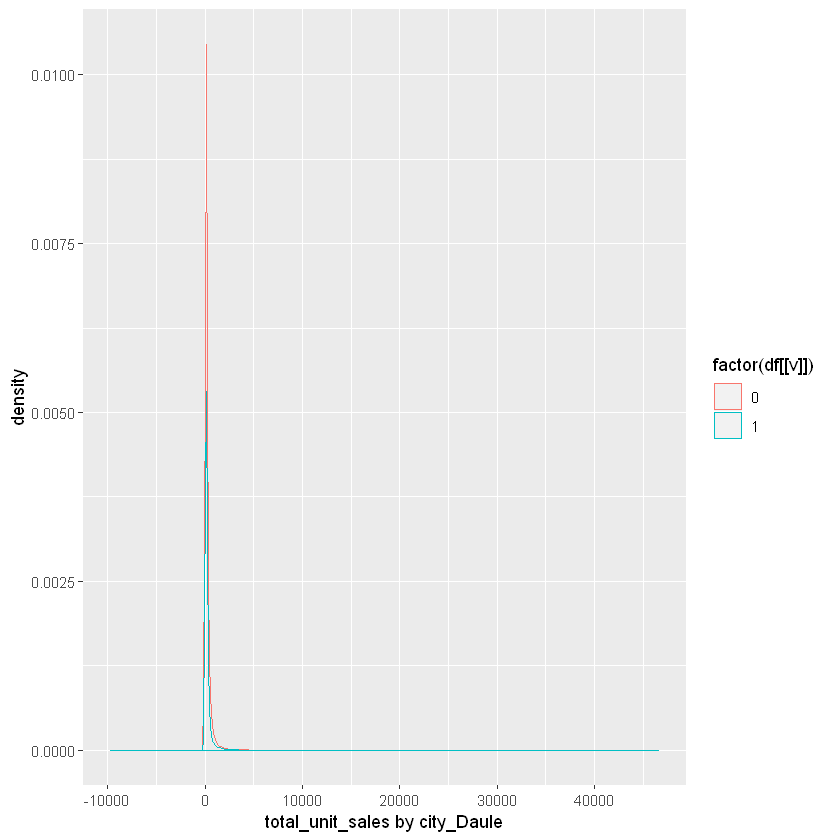

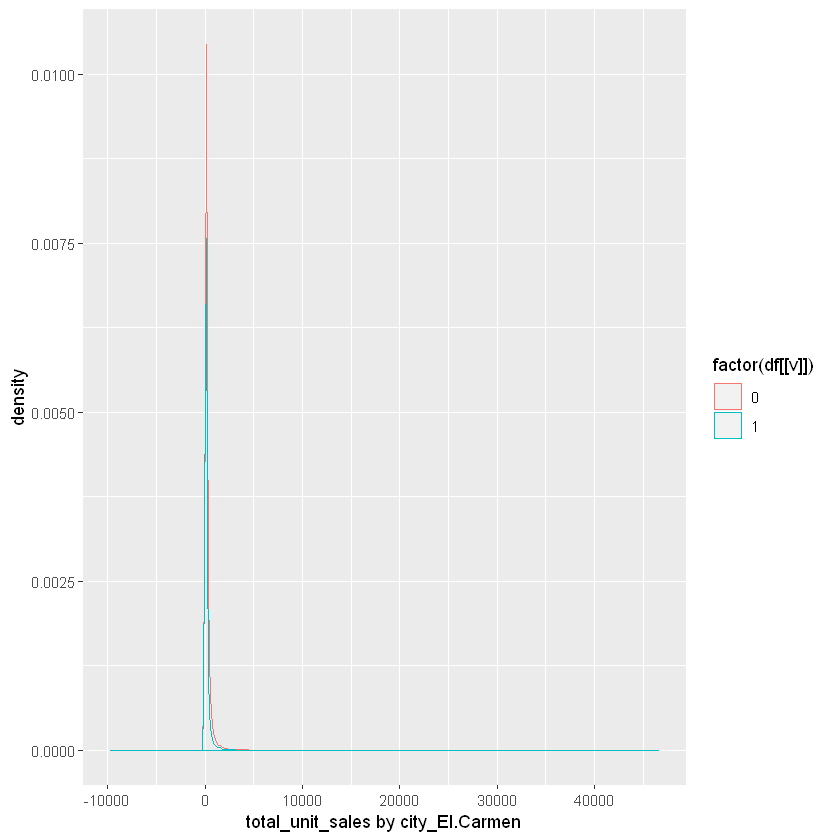

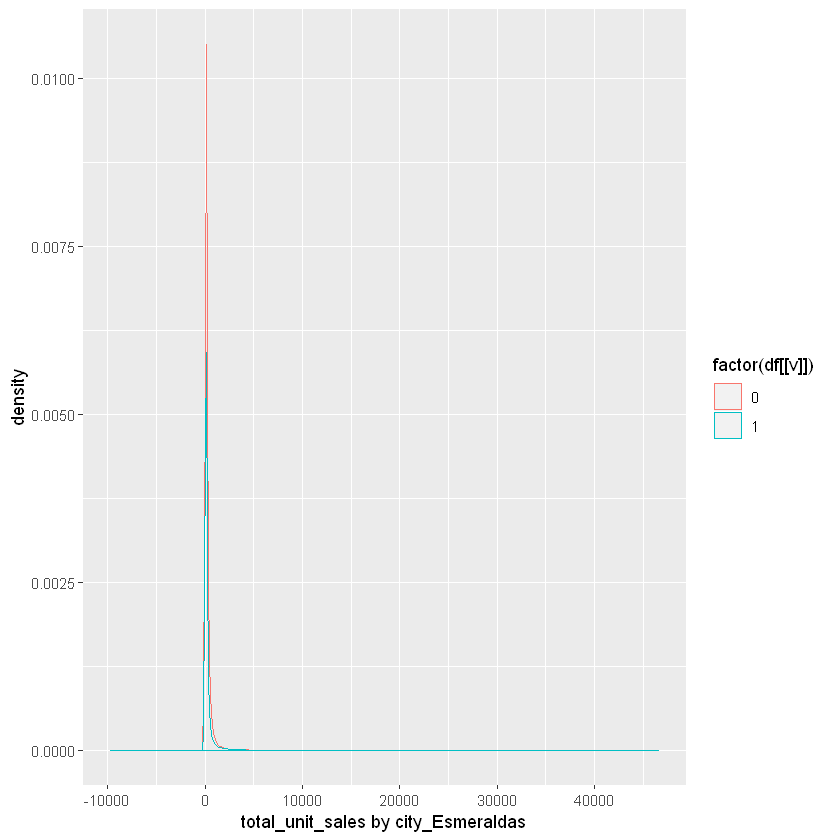

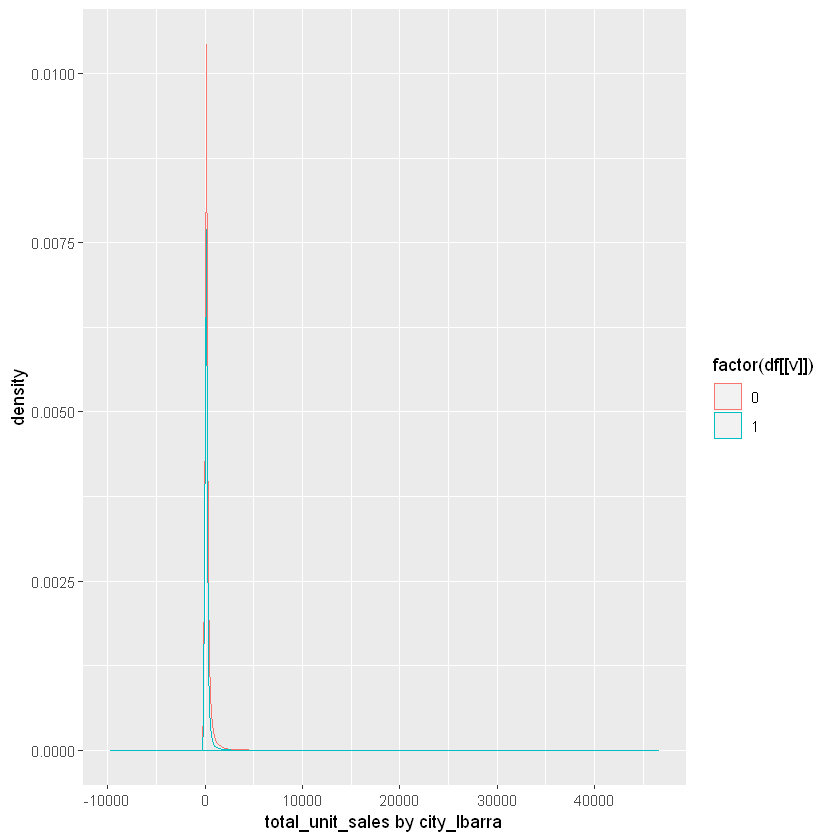

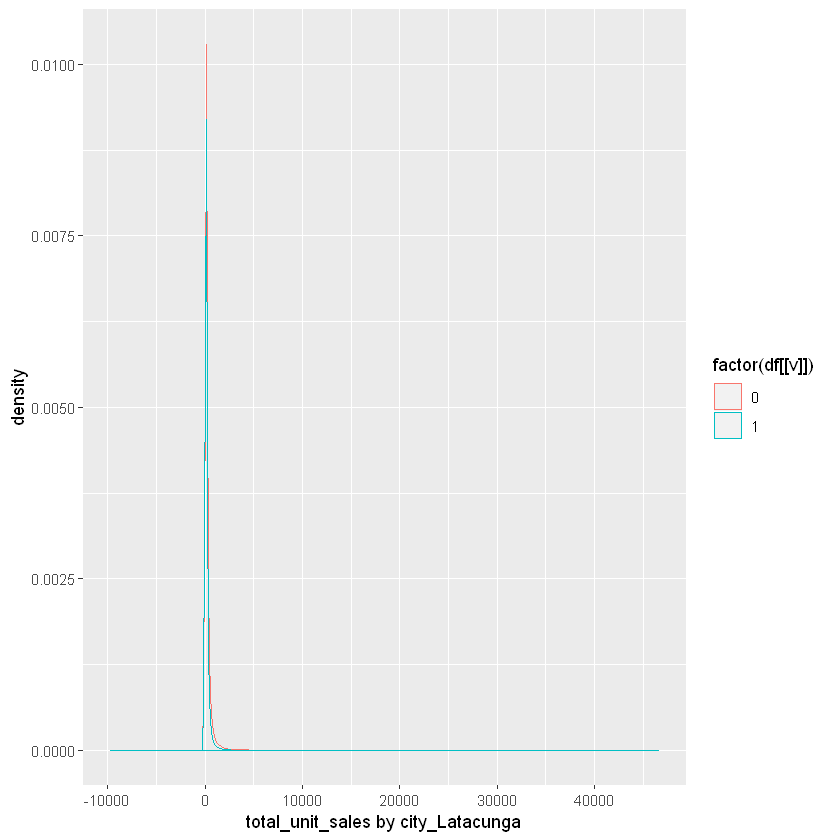

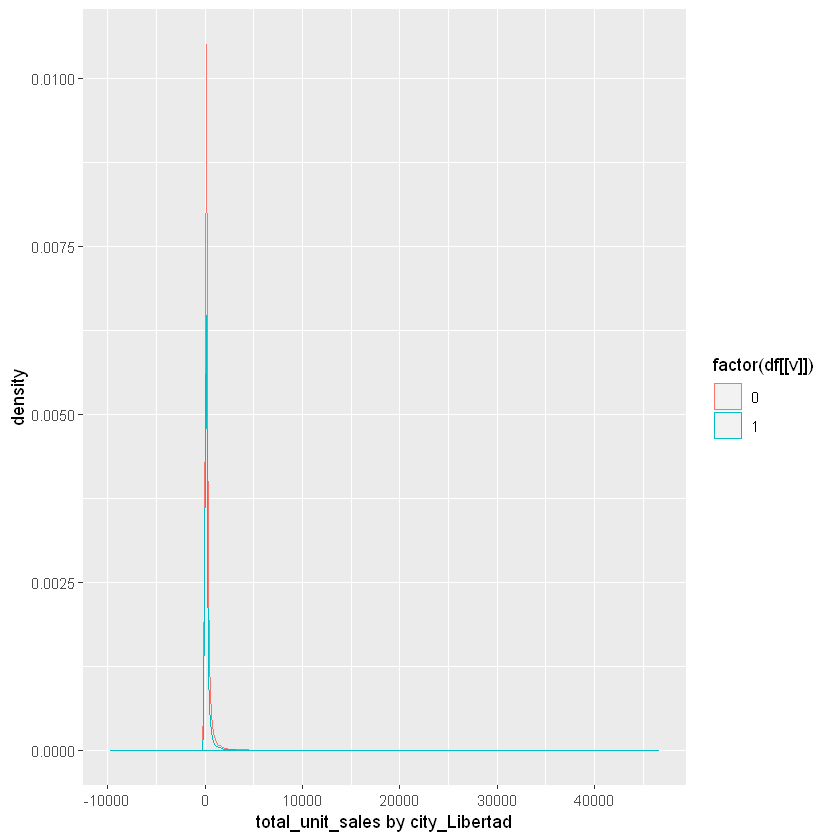

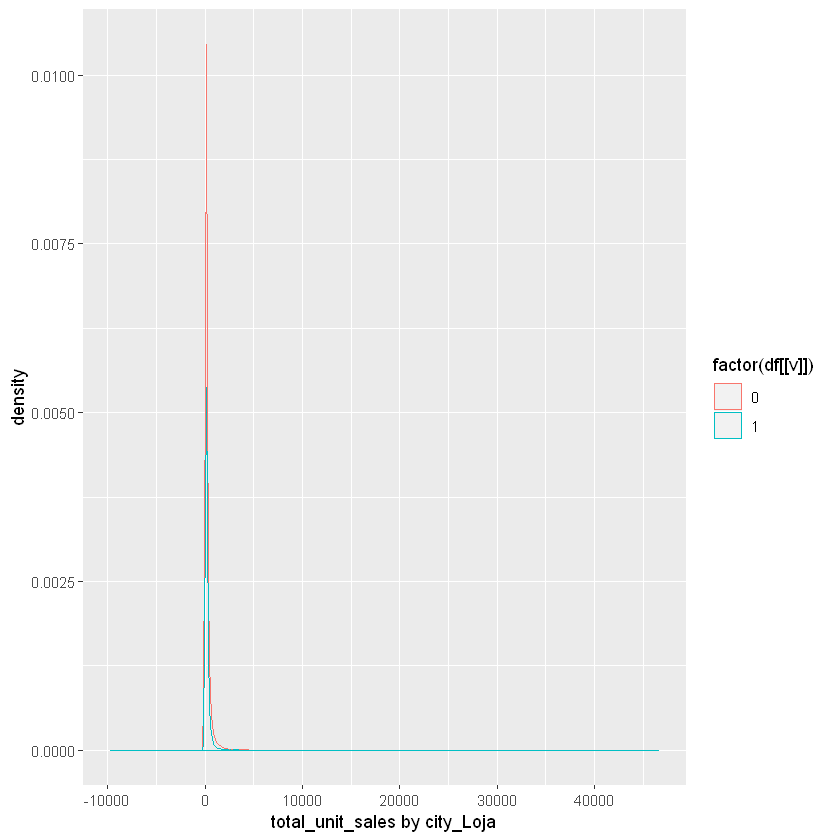

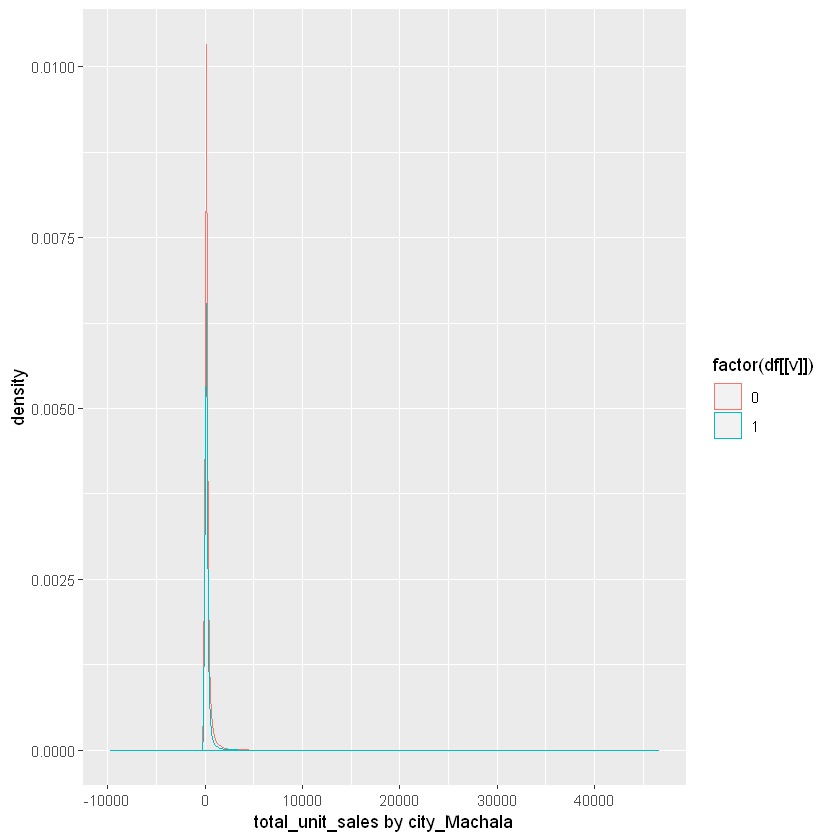

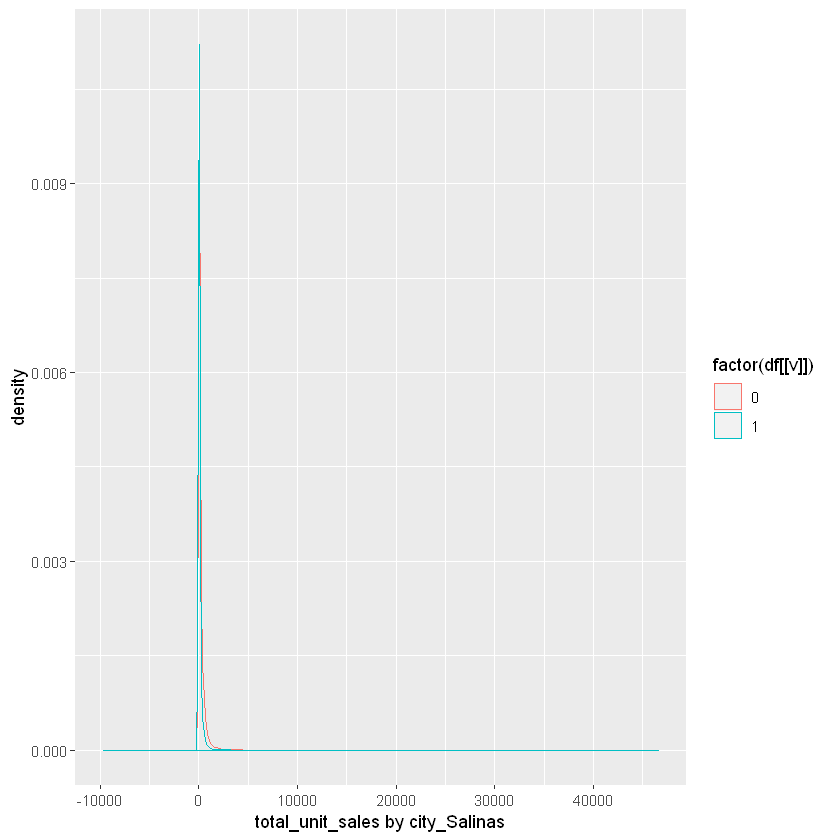

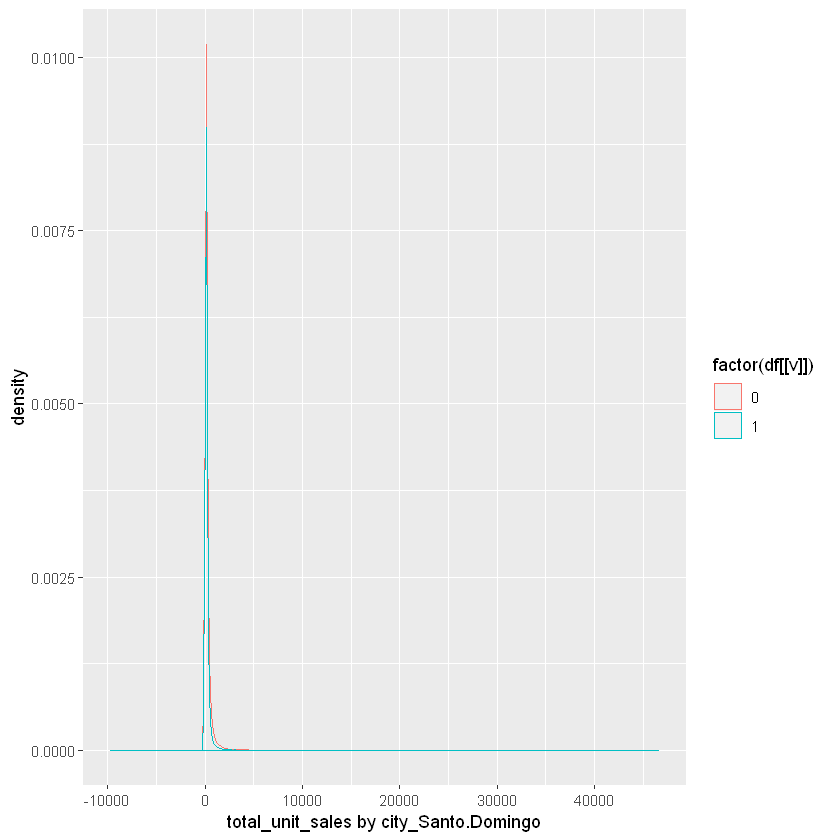

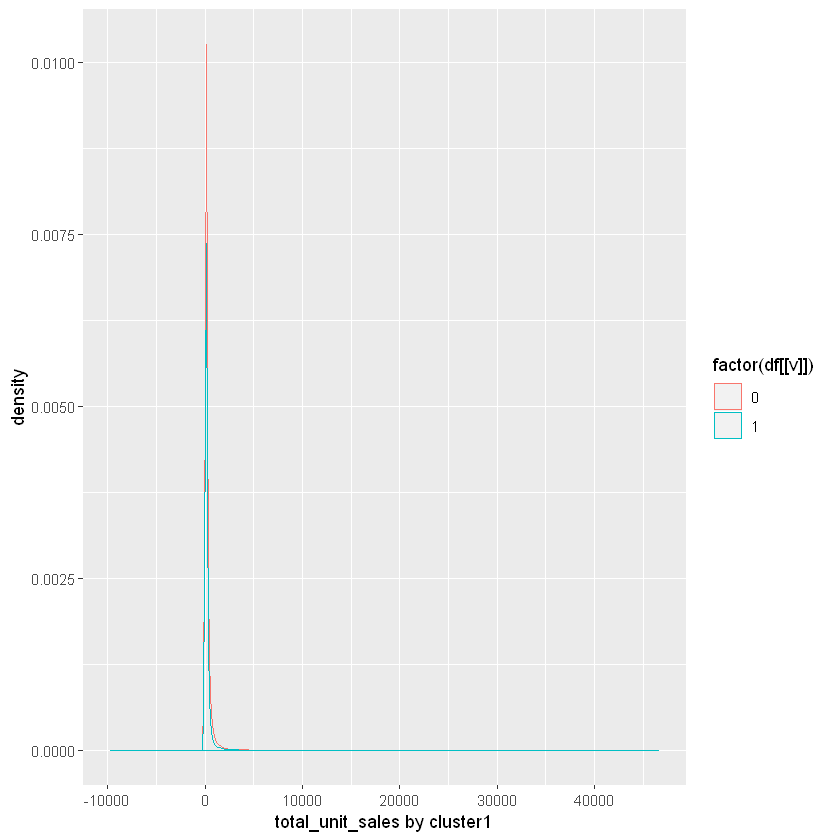

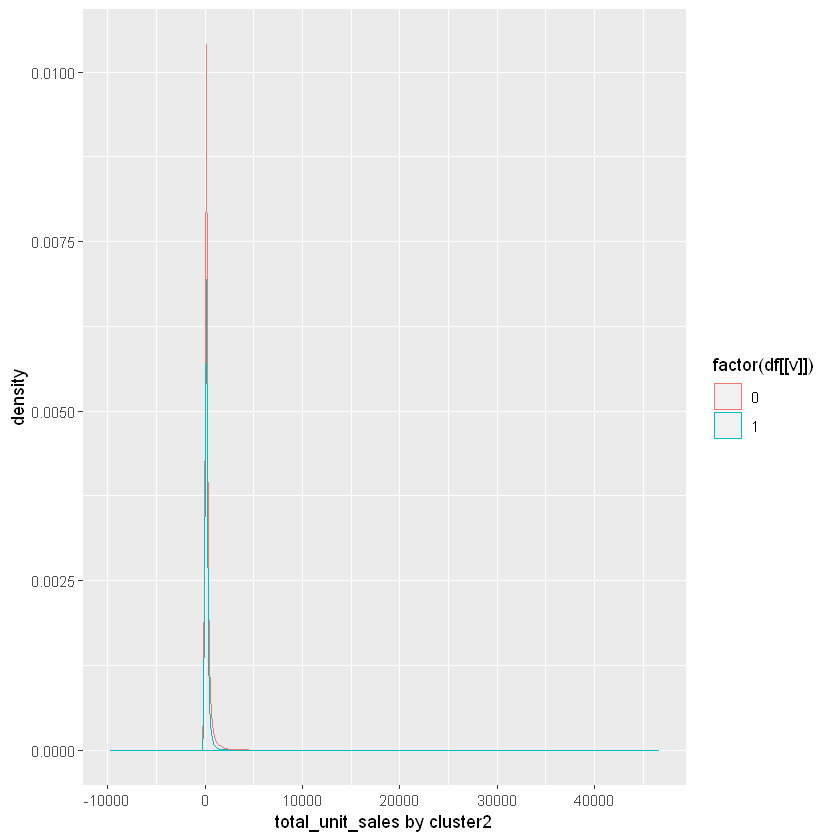

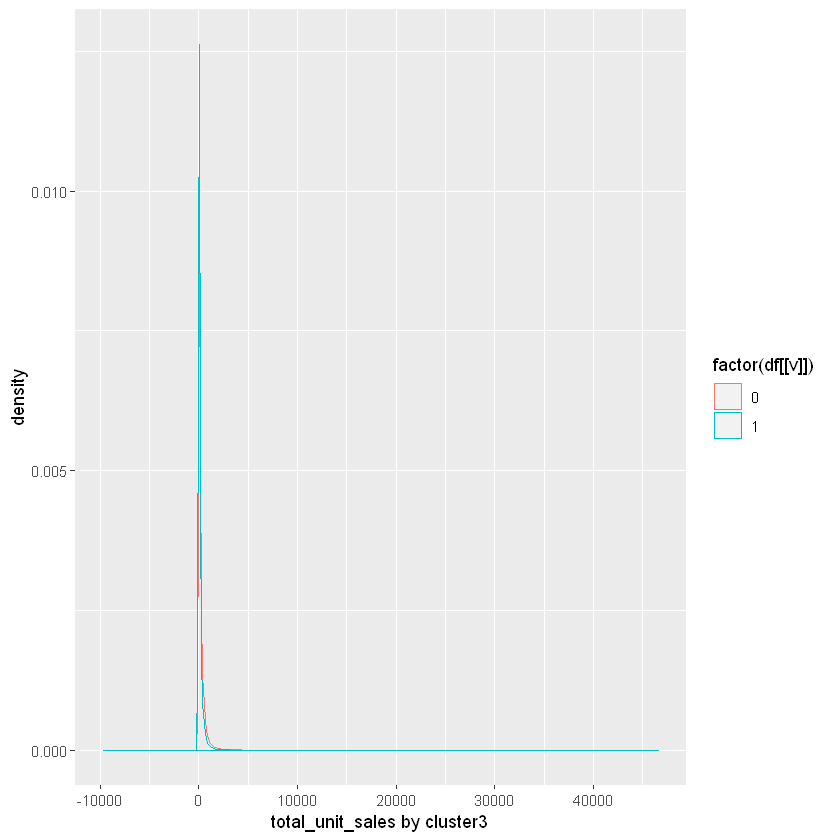

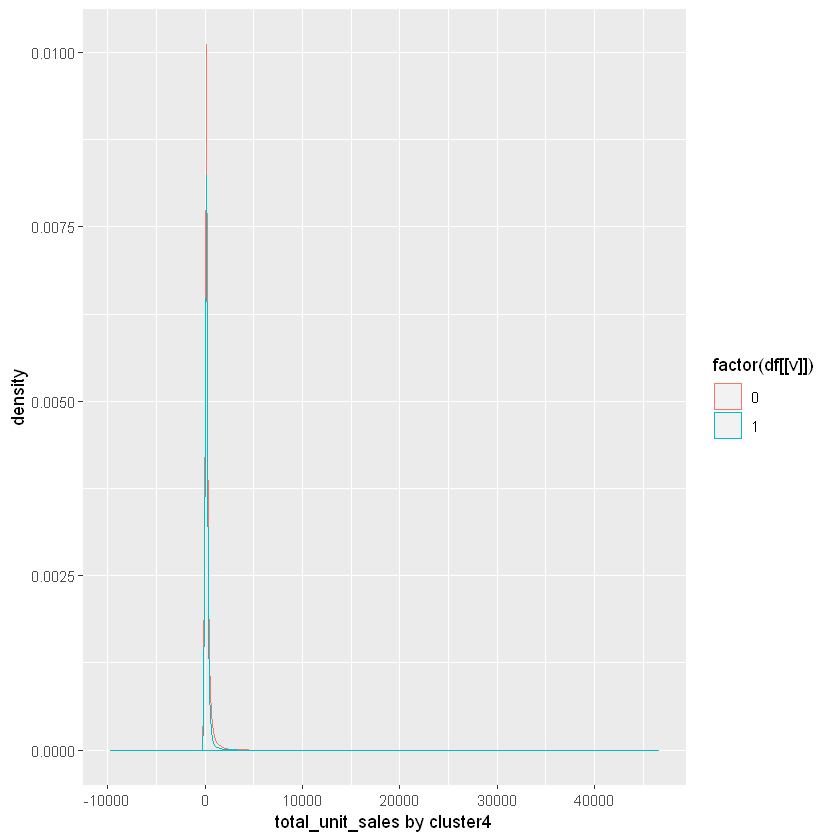

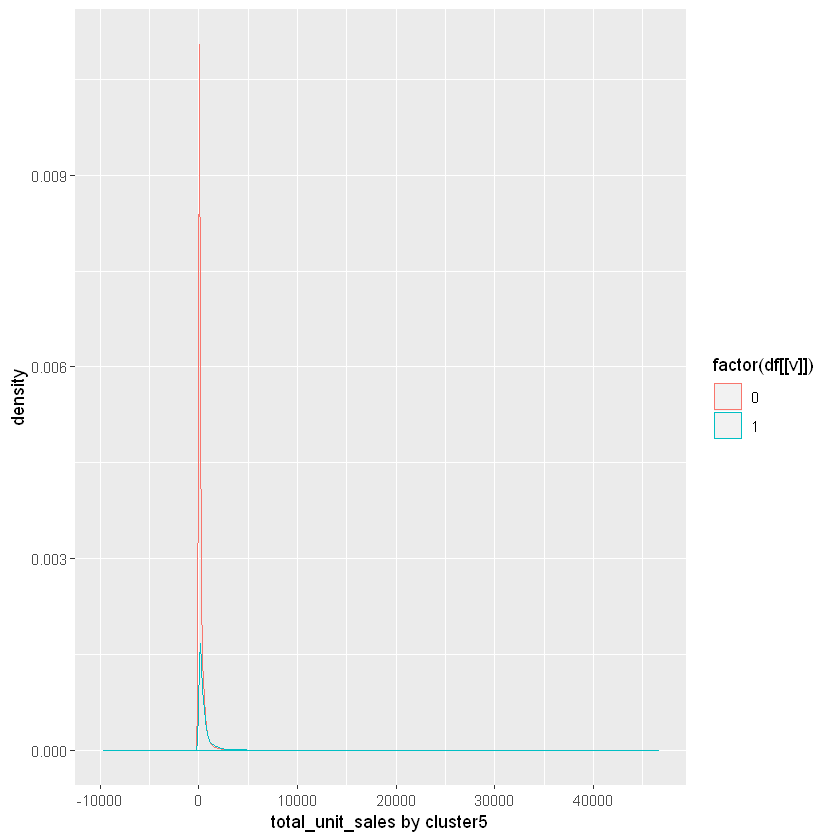

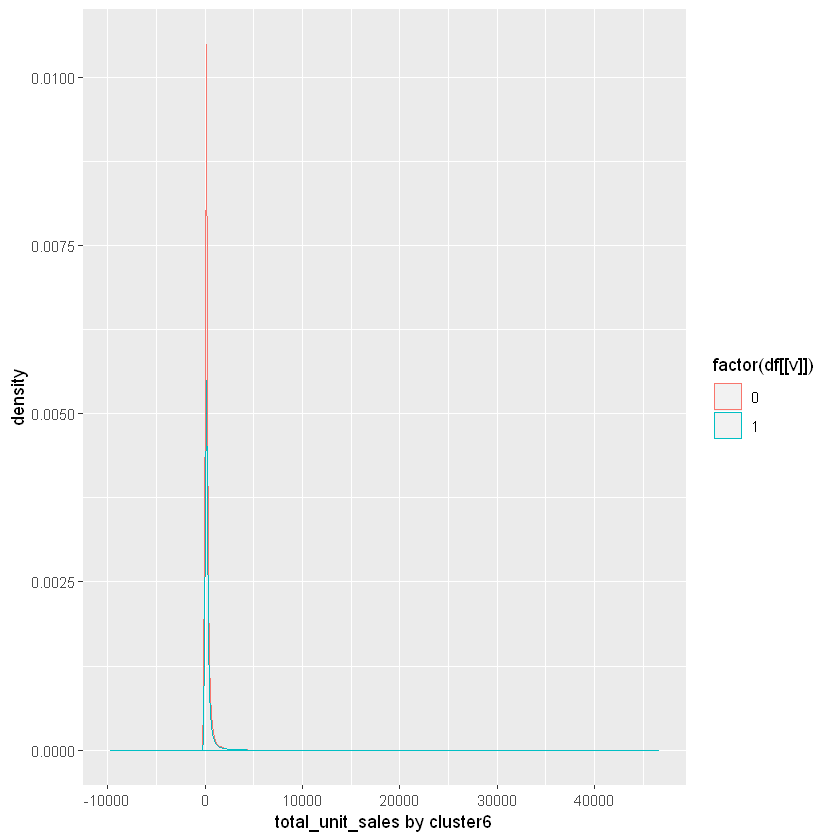

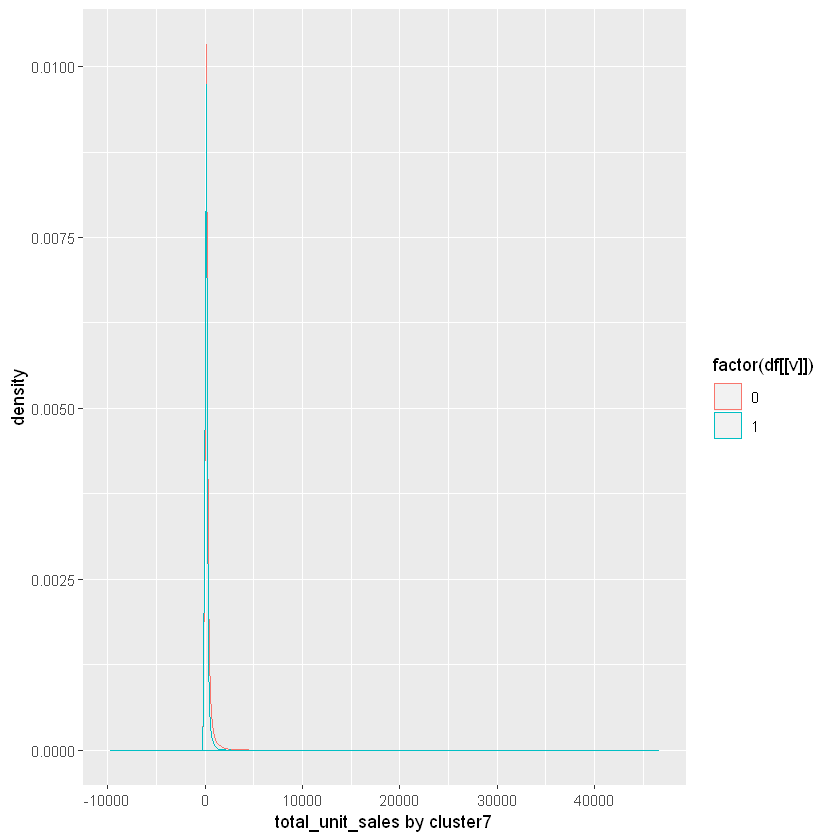

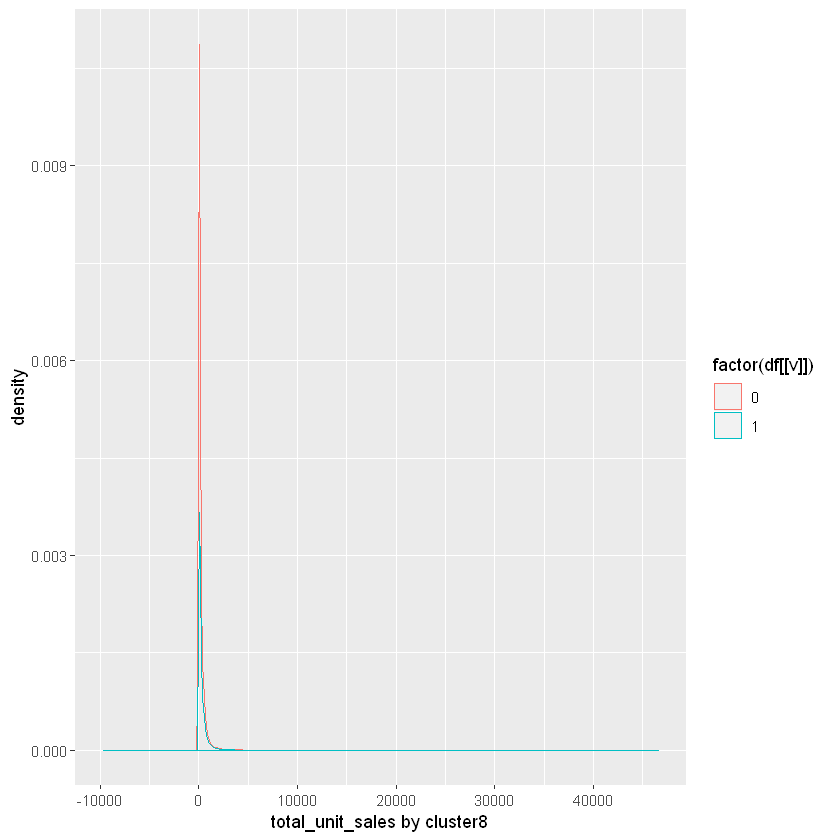

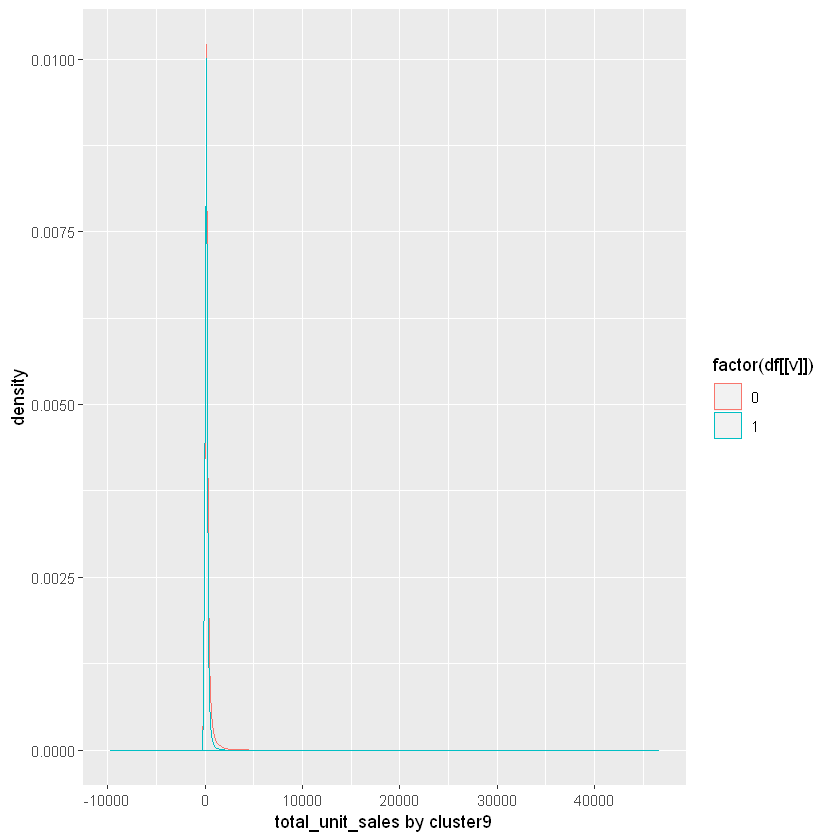

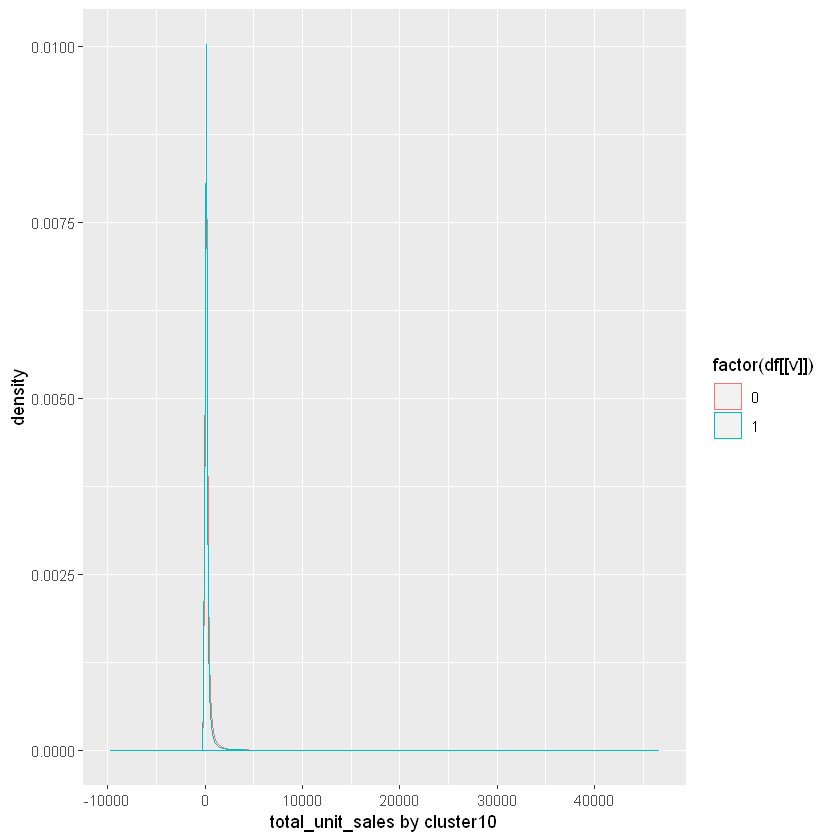

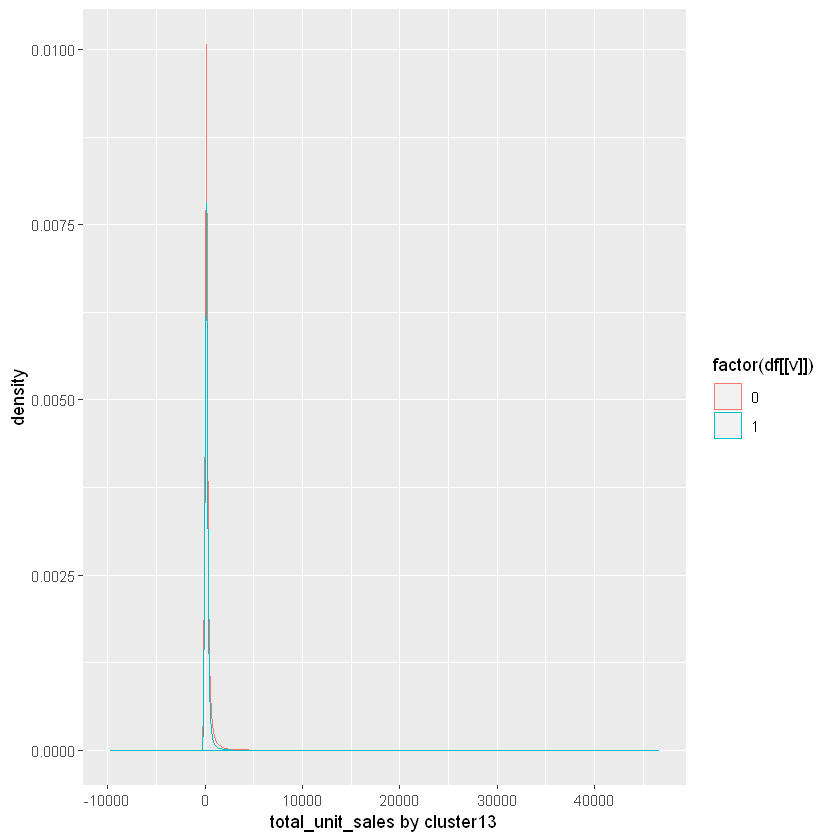

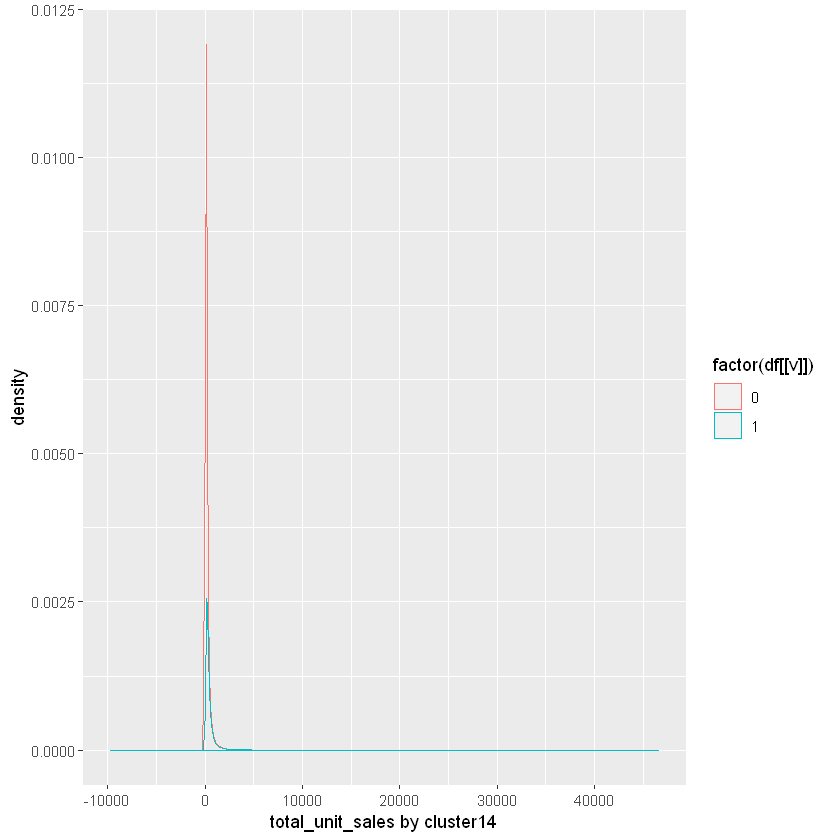

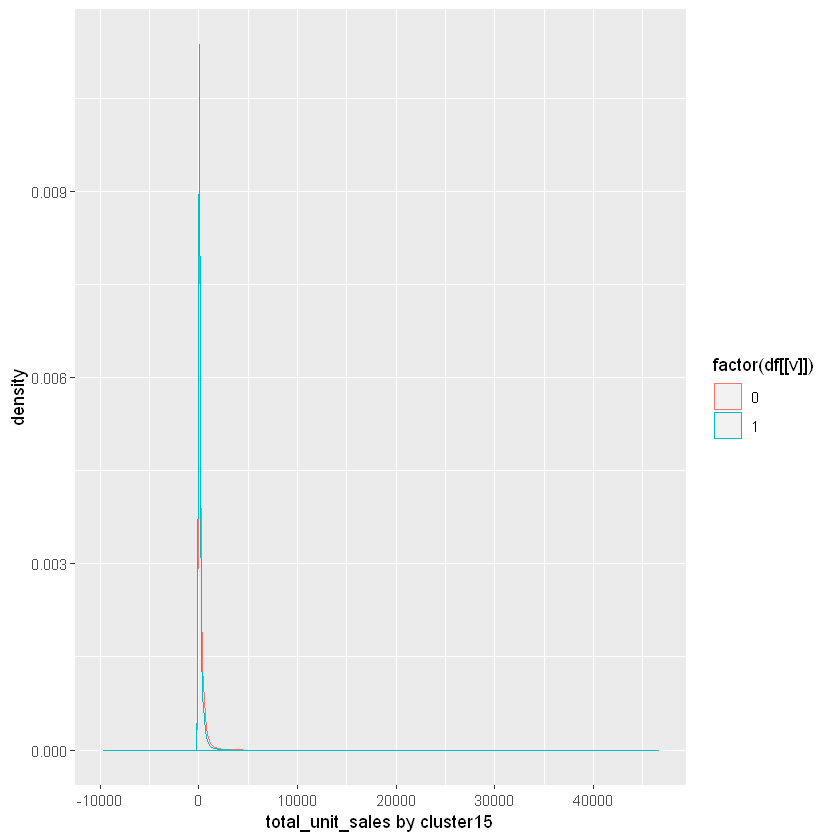

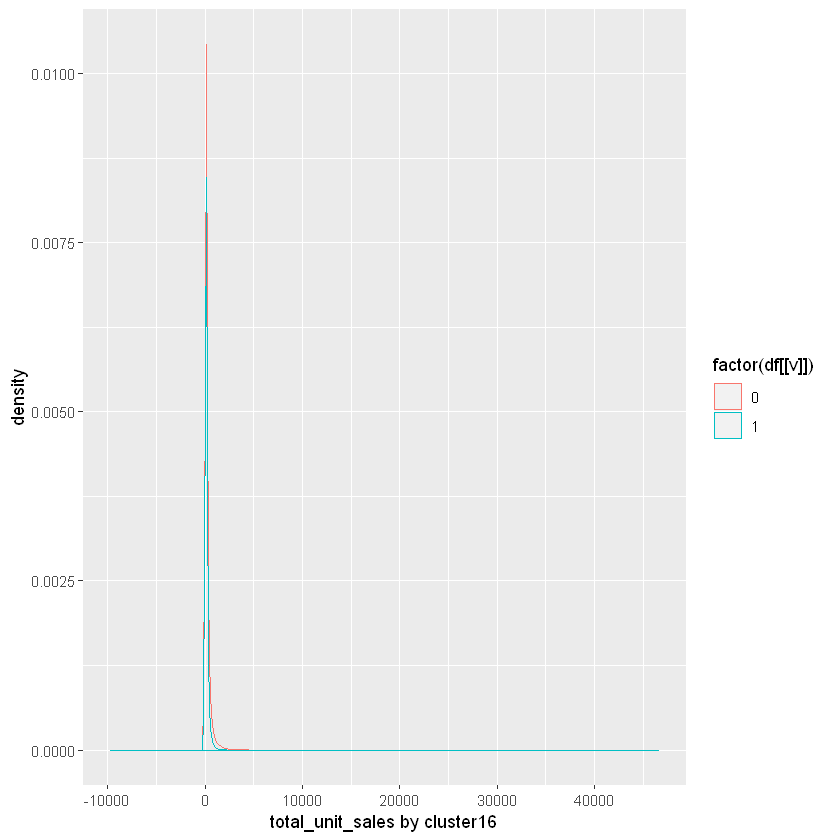

In [28]:
##distribution of revenue by categorical variables
for (v in cf) {
    print(ggplot(df,aes(x=df$total_unit_sales, group=factor(df[[v]]),
                          color=factor(df[[v]]))) + xlab(paste('total_unit_sales by',v,sep=' ')) +
    geom_density(adjust=2))
}

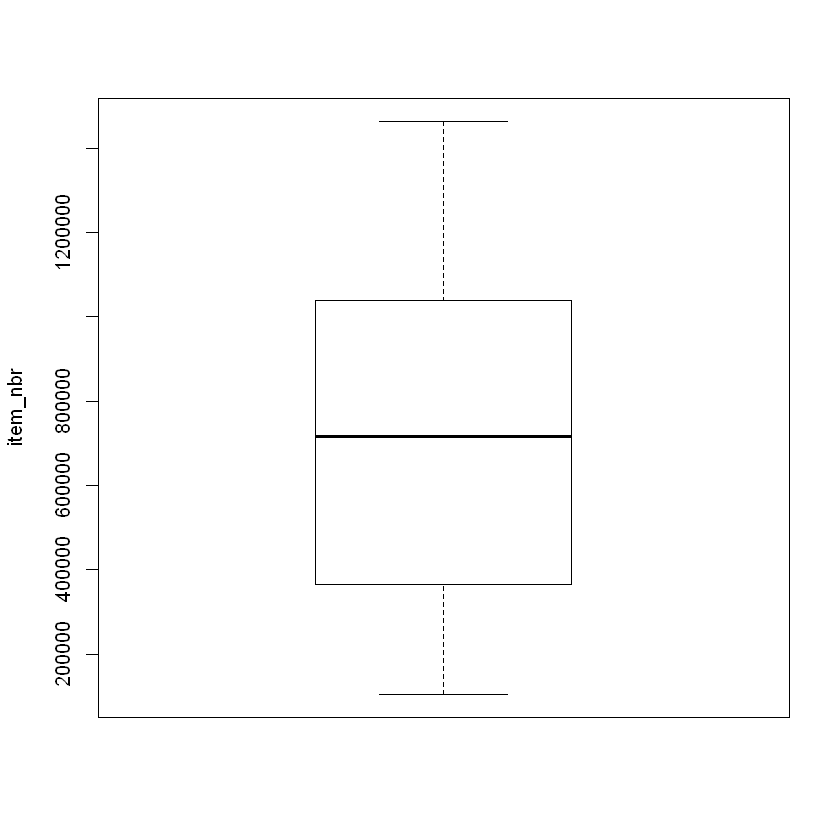

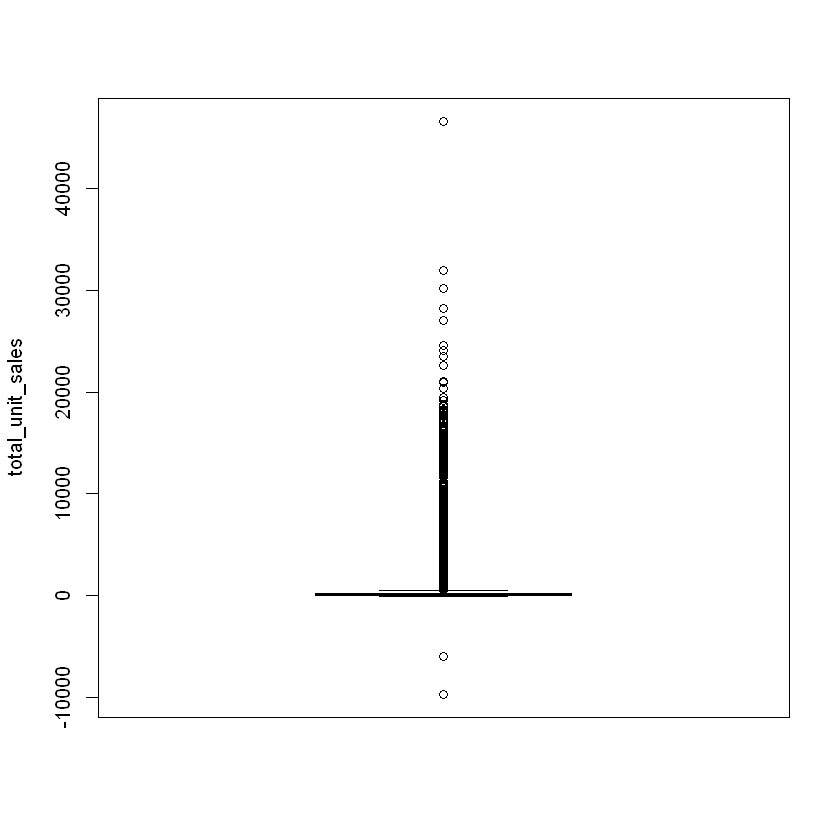

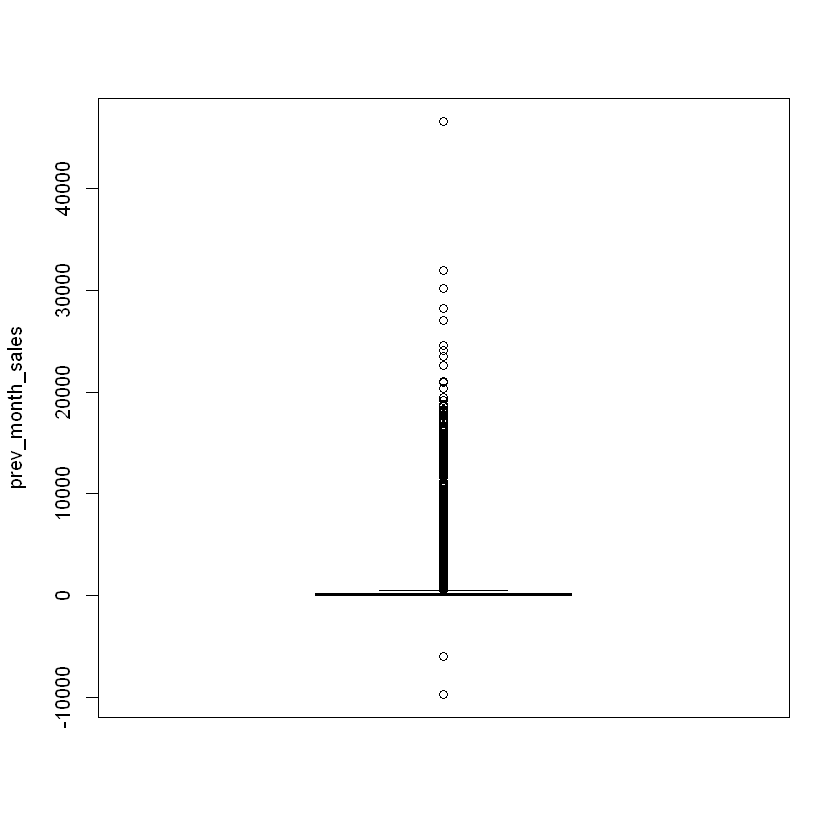

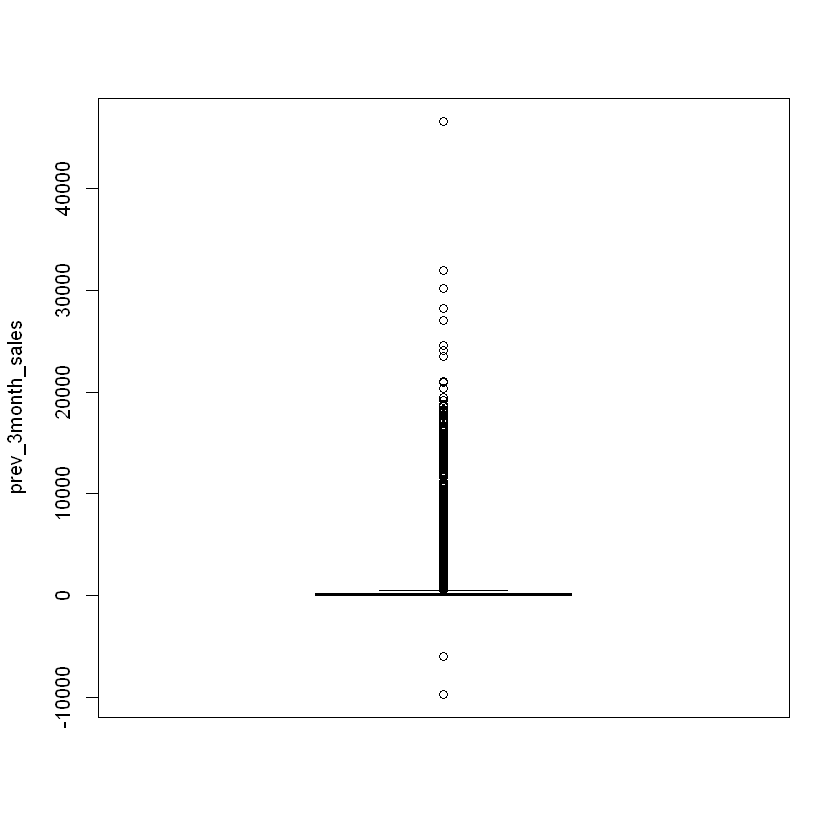

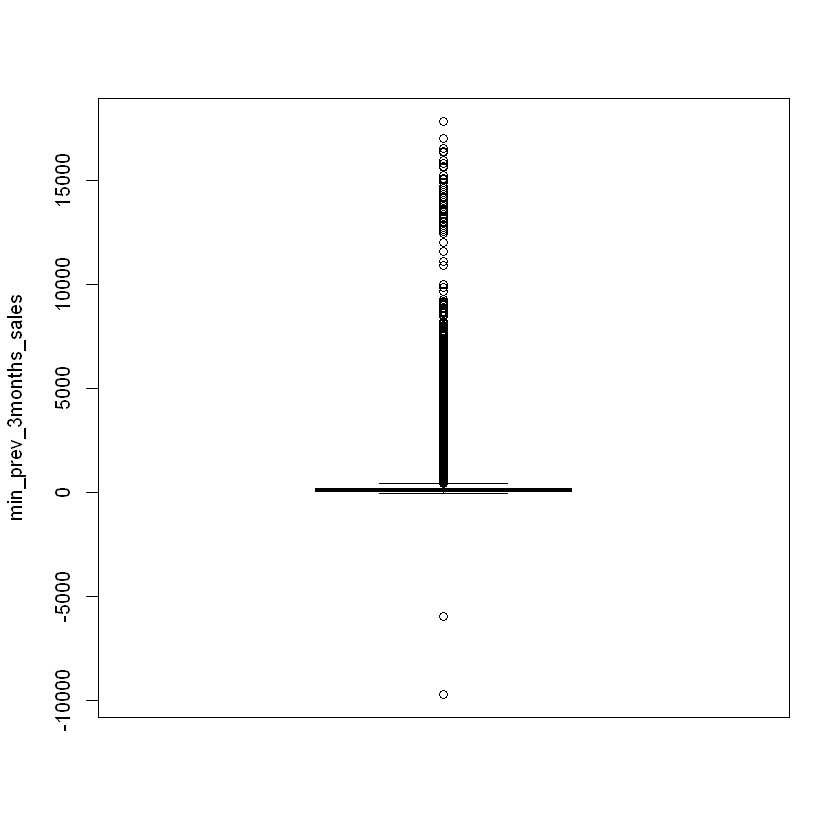

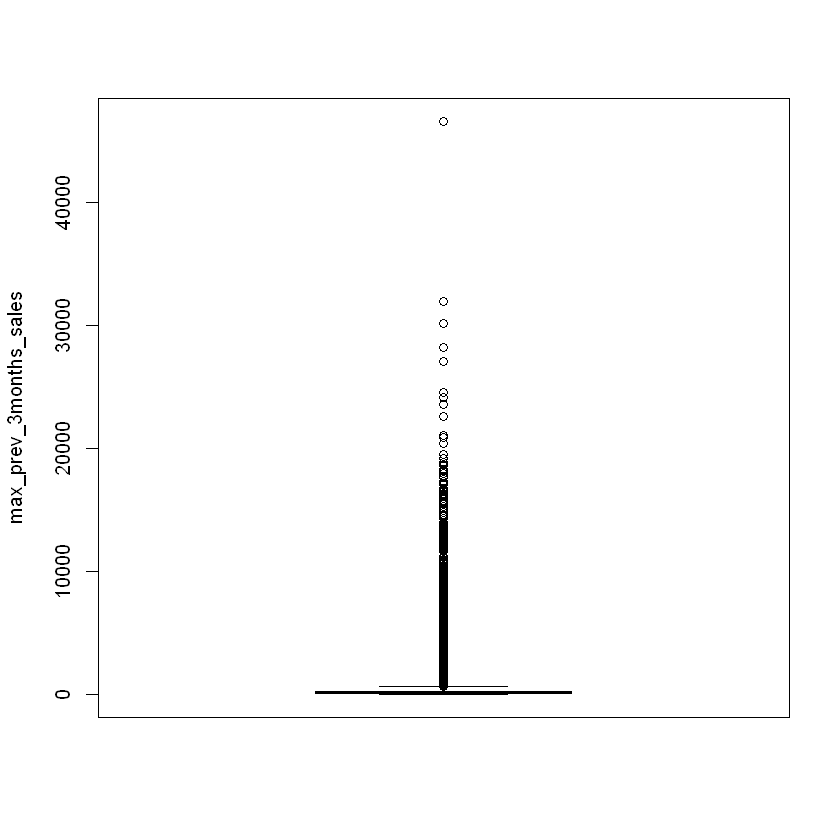

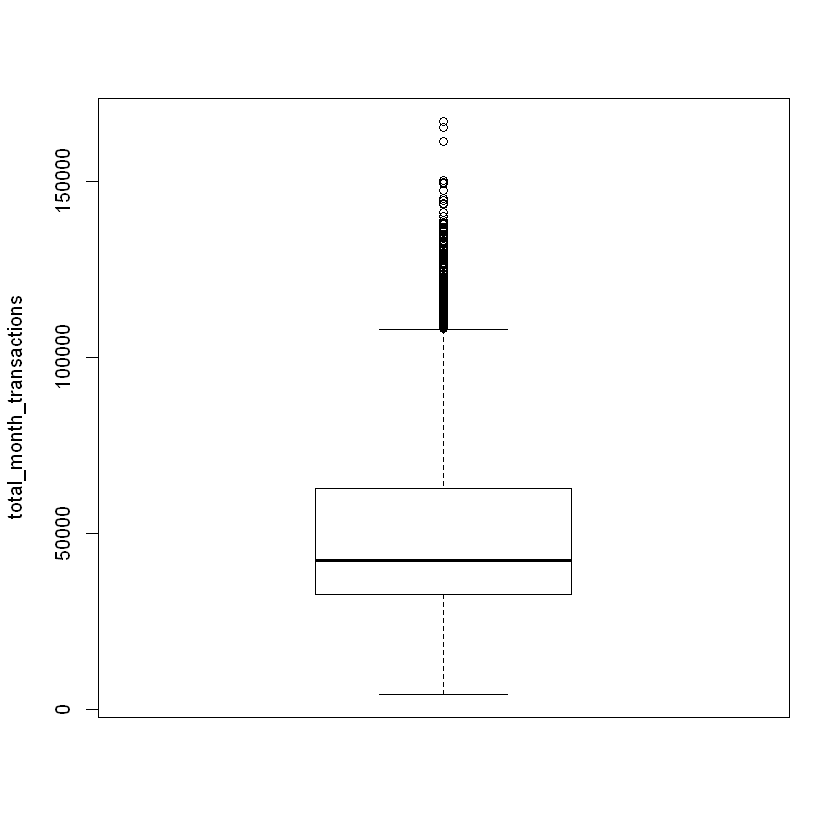

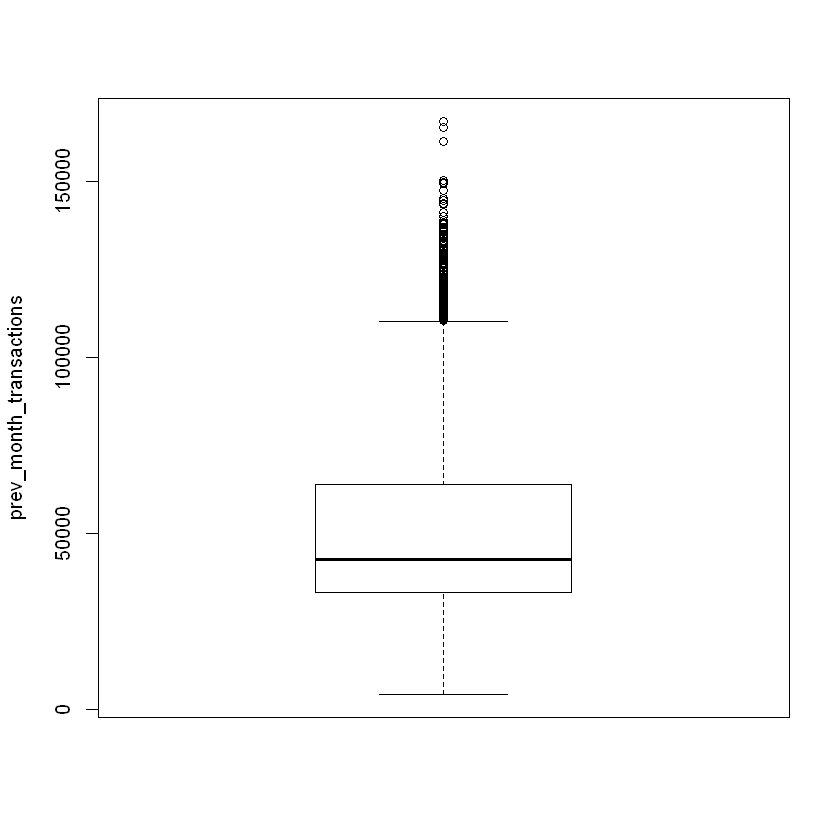

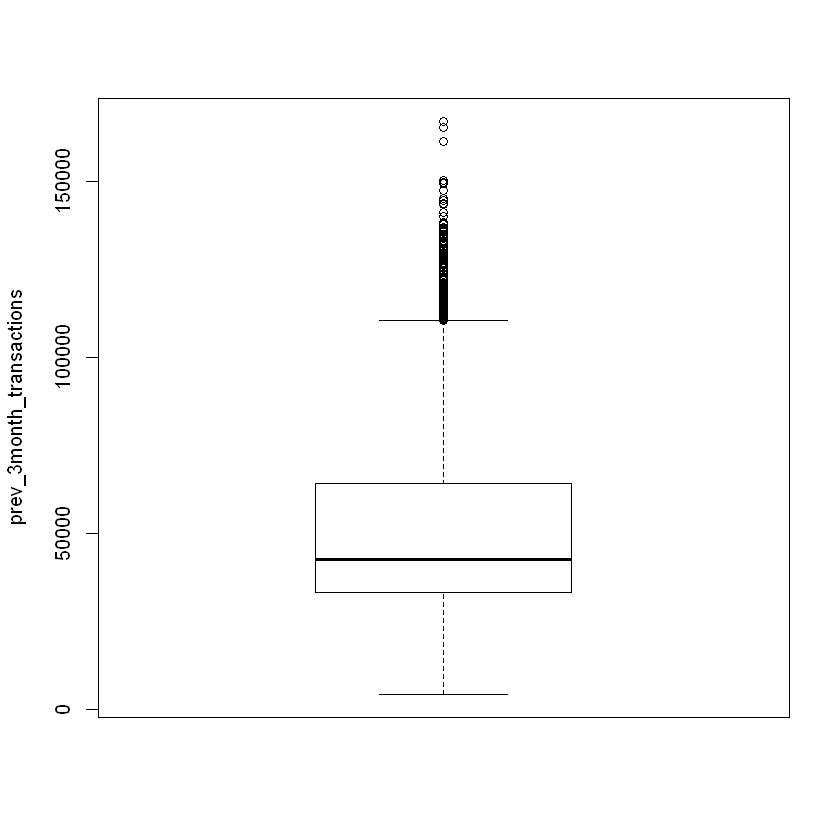

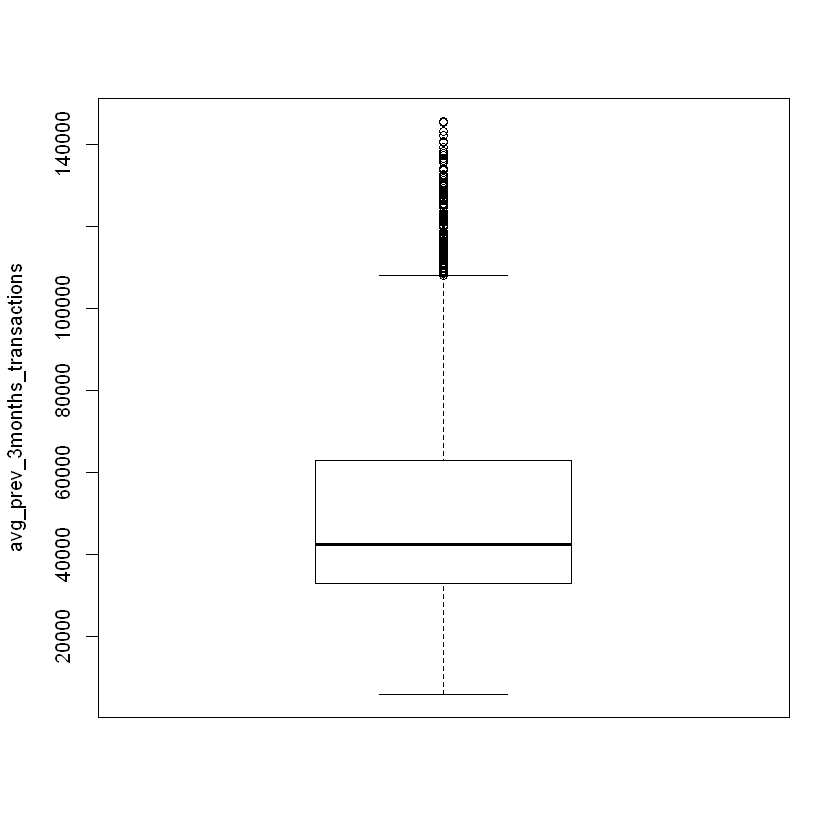

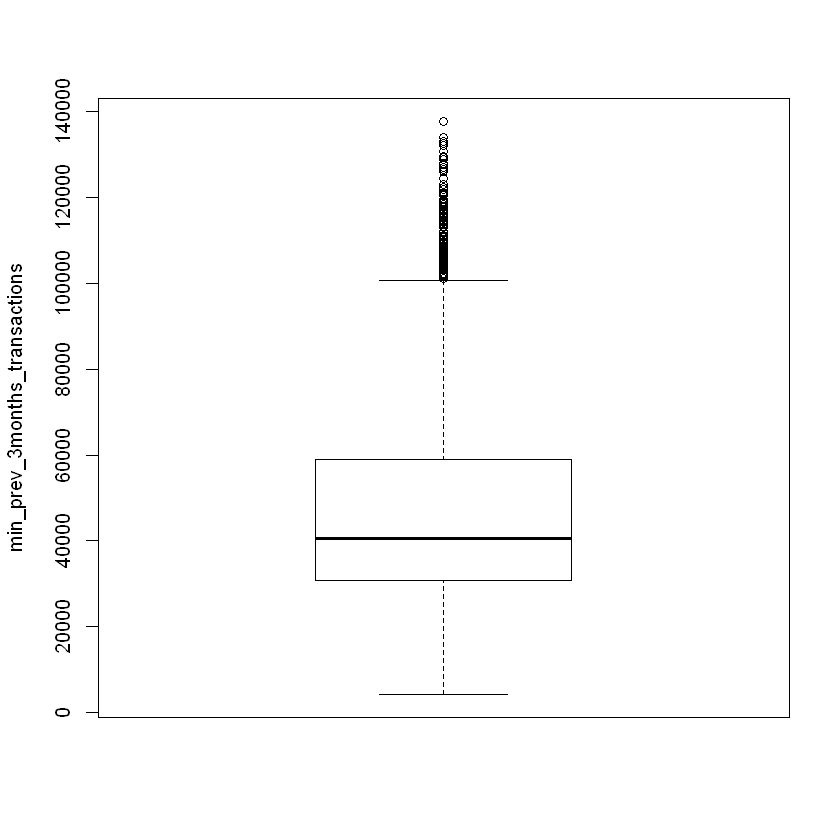

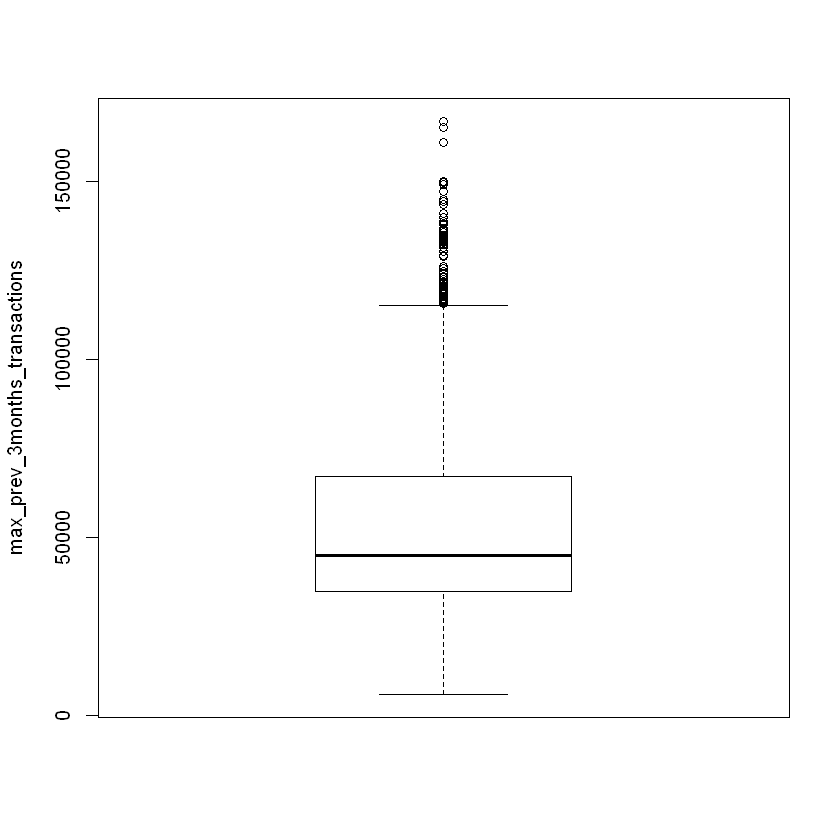

In [38]:
for (v in nf){
    boxplot(df[[v]],ylab=v)
}

In [32]:
#question 2.6- description of the missing values
getMissingness(df)

[[1]]
                       var na.count rate
1        prev_3month_sales   132097  6.3
2 prev_3month_transactions   108852  5.2
3         prev_month_sales    44098  2.1
4  prev_month_transactions    35639  1.7

[[2]]
[1] "This dataset has 1975248 (93.7%) complete rows. Original data has 2107345 rows."



$missingness
                       var na.count rate
1        prev_3month_sales   132097  6.3
2 prev_3month_transactions   108852  5.2
3         prev_month_sales    44098  2.1
4  prev_month_transactions    35639  1.7

$message
[1] "This dataset has 1975248 (93.7%) complete rows. Original data has 2107345 rows."

$rows
NULL

In [18]:
df <-na.omit(df)

In [19]:
df$id <- 1:nrow(df)

In [20]:
getMissingness(df)

[[1]]
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

[[2]]
[1] "This dataset has 1975248 (100%) complete rows. Original data has 1975248 rows."



$missingness
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

$message
[1] "This dataset has 1975248 (100%) complete rows. Original data has 1975248 rows."

$rows
NULL

In [22]:
#question 2.7 matrix of missing values
df.miss <- missingMatrix(df)
df.miss 

item_nbr store_nbr Year month total_unit_sales city state store_type
1       0        0         0    0     0                0    0     0         
2       0        0         0    0     0                0    0     0         
3       0        0         0    0     0                0    0     0         
4       0        0         0    0     0                0    0     0         
5       0        0         0    0     0                0    0     0         
6       0        0         0    0     0                0    0     0         
7       0        0         0    0     0                0    0     0         
8       0        0         0    0     0                0    0     0         
9       0        0         0    0     0                0    0     0         
10      0        0         0    0     0                0    0     0         
11      0        0         0    0     0                0    0     0         
12      0        0         0    0     0                0    0     0         
13      0        0         0    0     0                0    0     0         
14      0        0         0    0     0                0    0     0         
15      0        0         0    0     0                0    0     0         
16      0        0         0    0     0                0    0     0         
17      0        0         0    0     0                0    0     0         
18      0        0         0    0     0                0    0     0         
19      0        0         0    0     0                0    0     0         
20      0        0         0    0     0                0    0     0         
21      0        0         0    0     0                0    0     0         
22      0        0         0    0     0                0    0     0         
23      0        0         0    0     0                0    0     0         
24      0        0         0    0     0                0    0     0         
25      0        0         0    0     0                0    0     0         
26      0        0         0    0     0                0    0     0         
27      0        0         0    0     0                0    0     0         
28      0        0         0    0     0                0    0     0         
29      0        0         0    0     0                0    0     0         
30      0        0         0    0     0                0    0     0         
...     ...      ...       ...  ...   ...              ...  ...   ...       
1975219 0        0         0    0     0                0    0     0         
1975220 0        0         0    0     0                0    0     0         
1975221 0        0         0    0     0                0    0     0         
1975222 0        0         0    0     0                0    0     0         
1975223 0        0         0    0     0                0    0     0         
1975224 0        0         0    0     0                0    0     0         
1975225 0        0         0    0     0                0    0     0         
1975226 0        0         0    0     0                0    0     0         
1975227 0        0         0    0     0                0    0     0         
1975228 0        0         0    0     0                0    0     0         
1975229 0        0         0    0     0                0    0     0         
1975230 0        0         0    0     0                0    0     0         
1975231 0        0         0    0     0                0    0     0         
1975232 0        0         0    0     0                0    0     0         
1975233 0        0         0    0     0                0    0     0         
1975234 0        0         0    0     0                0    0     0         
1975235 0        0         0    0     0                0    0     0         
1975236 0        0         0    0     0                0    0     0         
1975237 0        0         0    0     0                0    0     0         
1975238 0        0         0    0     0                0    0     0         
1975

In [ ]:
#heatmap of missing values
library(naniar)
options(repr.plot.width = 54, repr.plot.height = 27)
gg_miss_fct(x=df,fct=id) + 
theme(axis.text.x = element_text(angle=90, size=8))

Warning message:
"package 'naniar' was built under R version 3.6.2"


In [21]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[paste(v,'out',sep='_')] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

In [22]:
df.out <- outlierMatrix(df)

In [23]:
head(df.out)

Year_out month_out total_unit_sales_out prev_month_sales_out
1 0        0         0                    0                   
2 0        0         0                    0                   
3 0        0         0                    0                   
4 0        0         0                    0                   
5 0        0         0                    0                   
6 0        0         0                    0                   
  prev_3month_sales_out avg_prev_3months_sales_out min_prev_3months_sales_out
1 0                     0                          0                         
2 0                     0                          0                         
3 0                     0                          0                         
4 0                     0                          0                         
5 0                     0                          0                         
6 0                     0                          0                         
  max_prev_3months_sales_out monthly_oilprice_avg_out total_month_holidays_out
1 0                          0                        0                       
2 0                          0                        0                       
3 0                          0                        0                       
4 0                          0                        0                       
5 0                          0                        0                       
6 0                          0                        0                       
  ... cluster9_out cluster10_out cluster11_out cluster12_out cluster13_out
1 ... 0            0             0             0             1            
2 ... 0            0             0             0             1            
3 ... 0            0             0             0             1            
4 ... 0            0             0             0             1            
5 ... 0            0             0             0             1            
6 ... 0            0             0             0             1            
  cluster14_out cluster15_out cluster16_out cluster17_out id_out
1 0             0             0             0             0     
2 0             0             0             0             0     
3 0             0             0             0             0     
4 0             0             0             0             0     
5 0             0             0             0             0     
6 0             0             0             0             0

3.1.1 - For the variables where outliers were found, check the distribution with/without outliers

Joining, by = c("total_unit_sales", "outliers")
Joining, by = c("prev_month_sales", "outliers")
Joining, by = c("prev_3month_sales", "outliers")


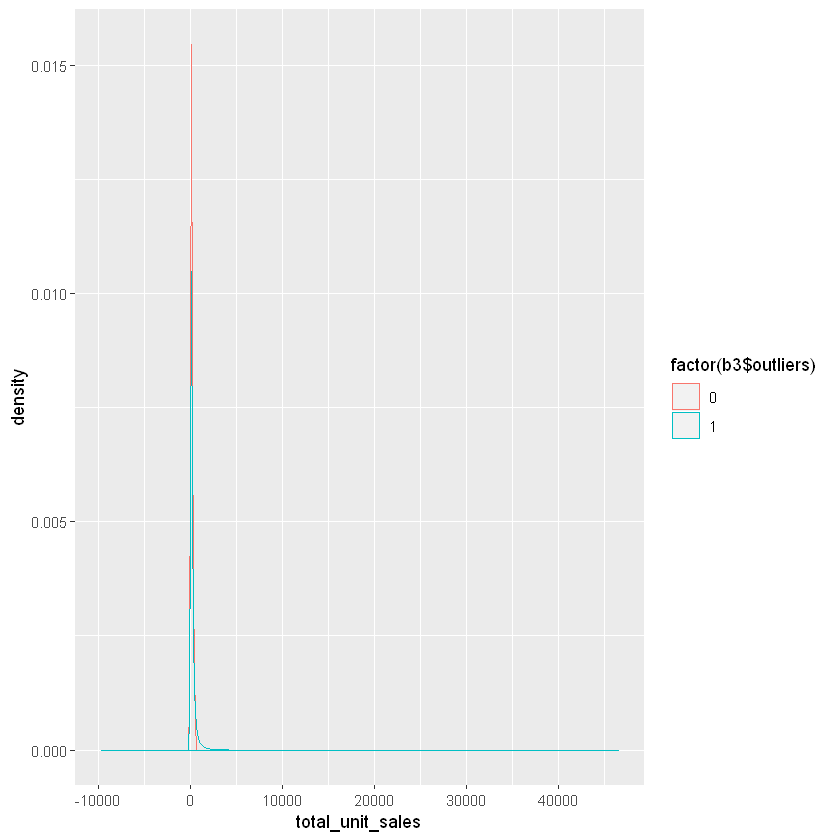

Joining, by = c("avg_prev_3months_sales", "outliers")


Joining, by = c("min_prev_3months_sales", "outliers")


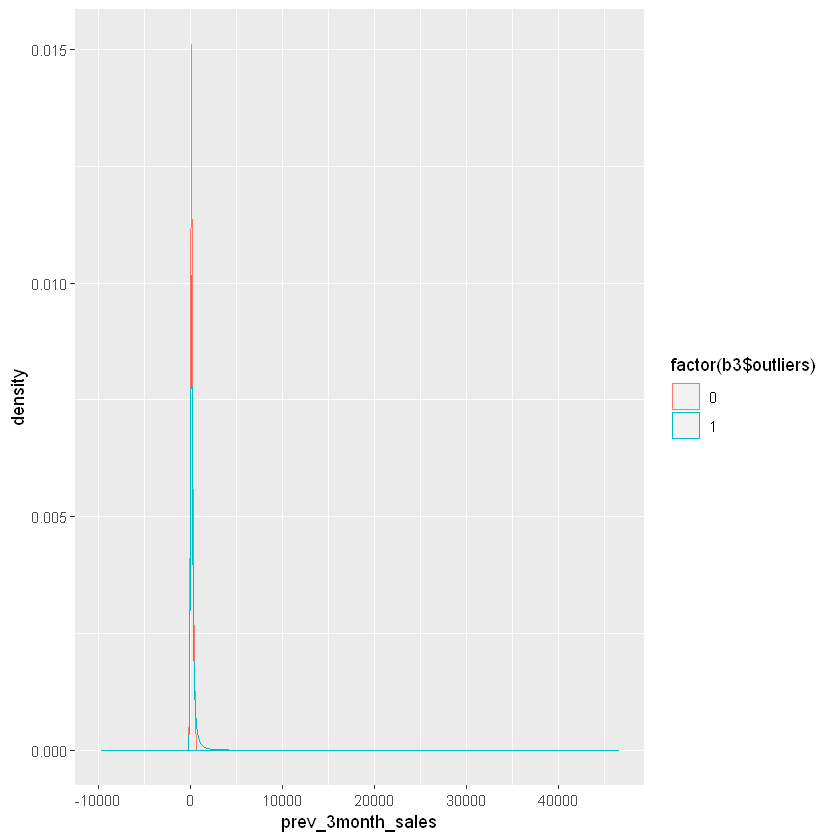

Joining, by = c("max_prev_3months_sales", "outliers")


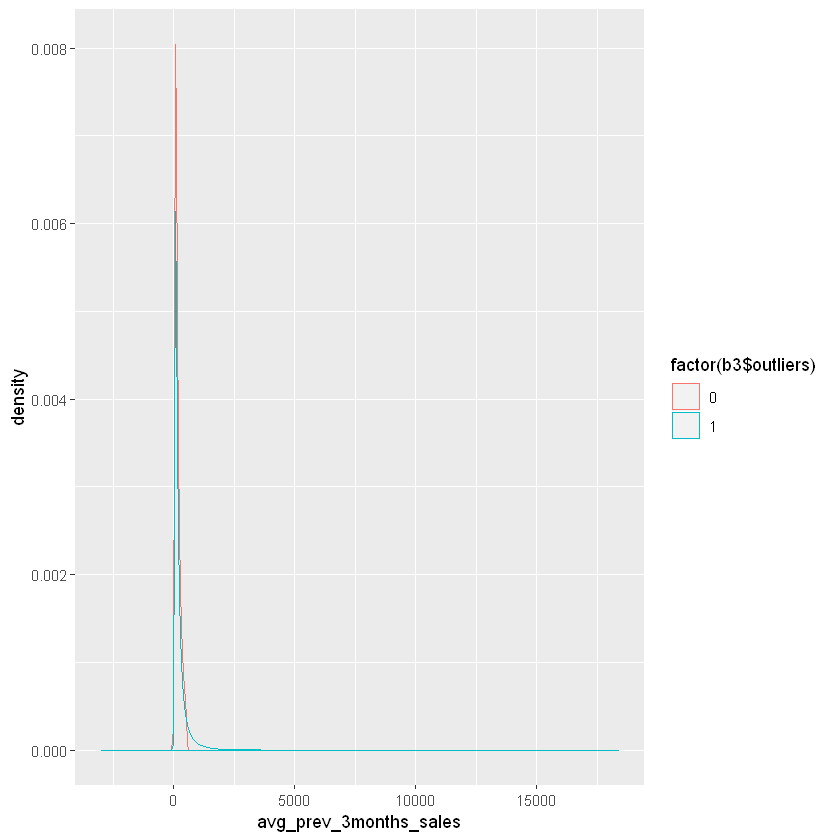

Joining, by = c("monthly_oilprice_avg", "outliers")


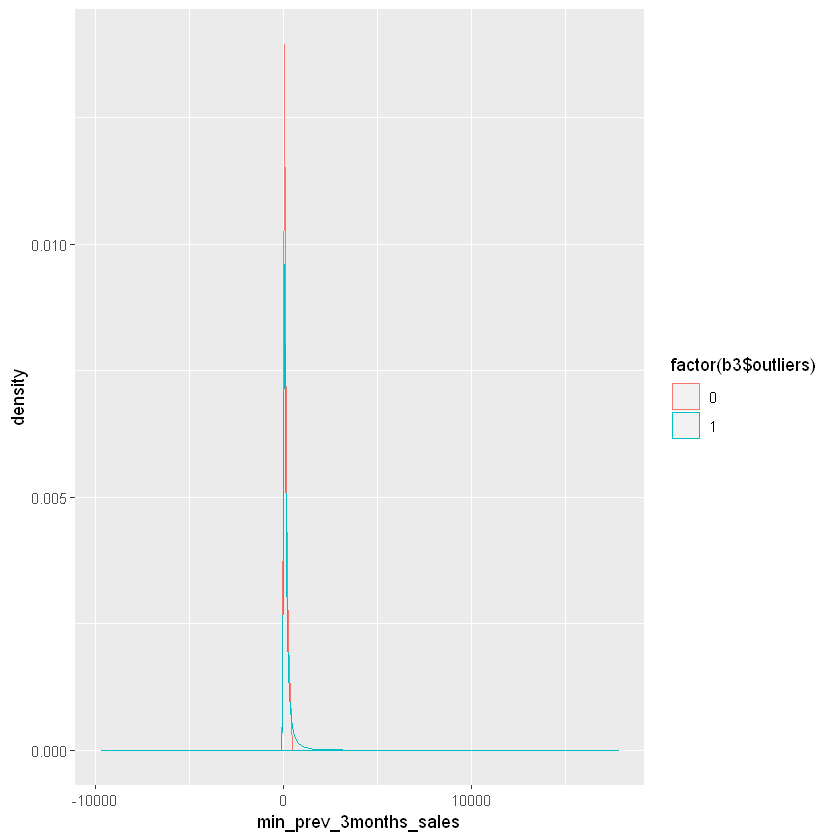

Joining, by = c("total_month_holidays", "outliers")


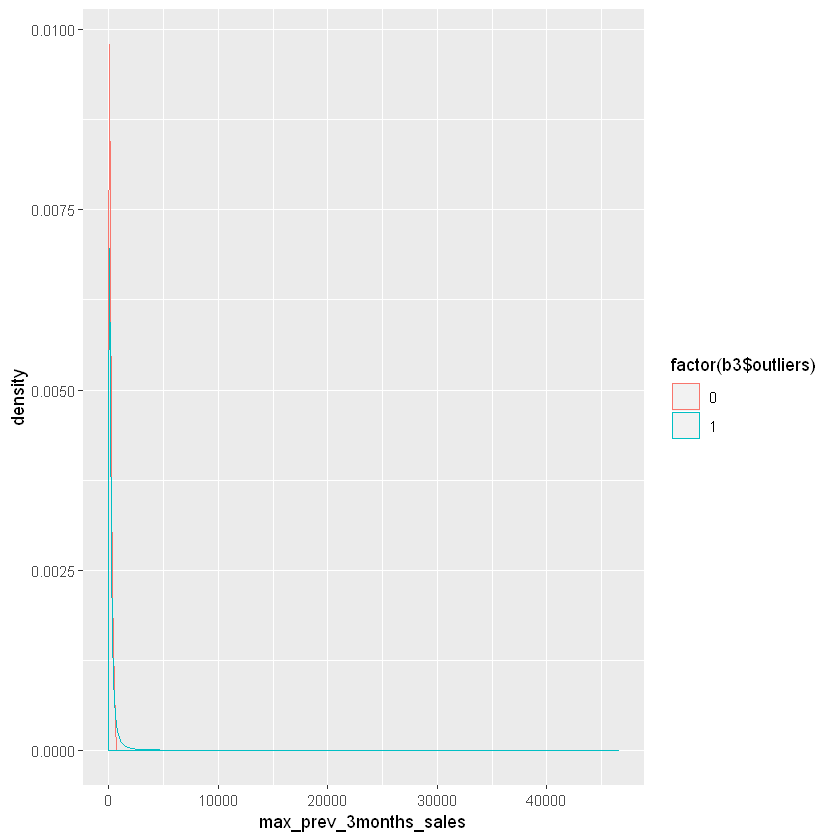

Joining, by = c("total_month_transactions", "outliers")


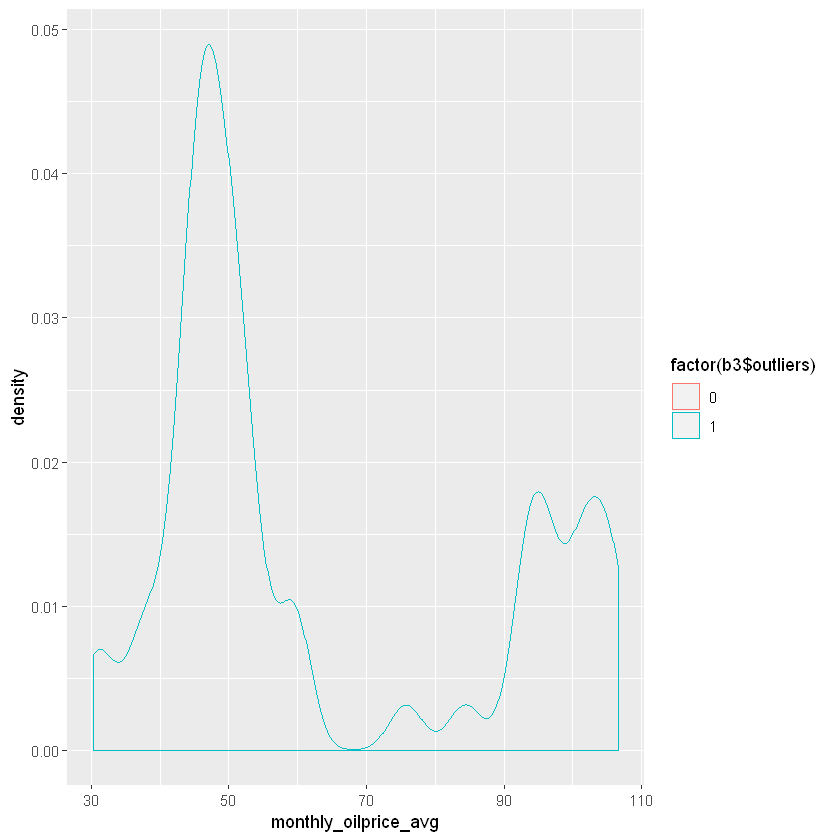

Joining, by = c("prev_month_transactions", "outliers")


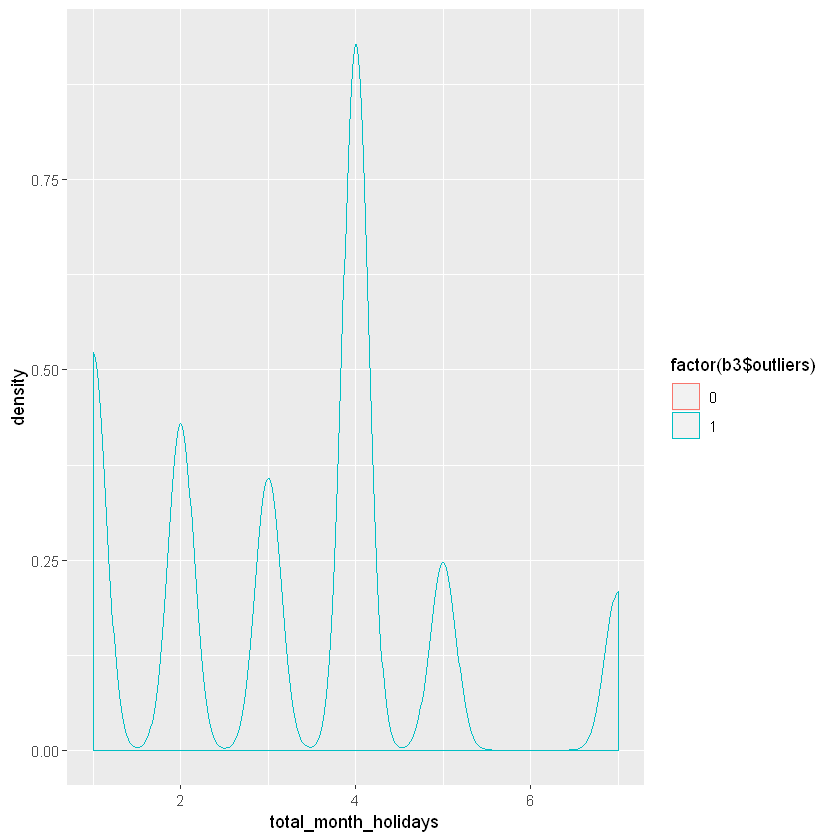

Joining, by = c("prev_3month_transactions", "outliers")


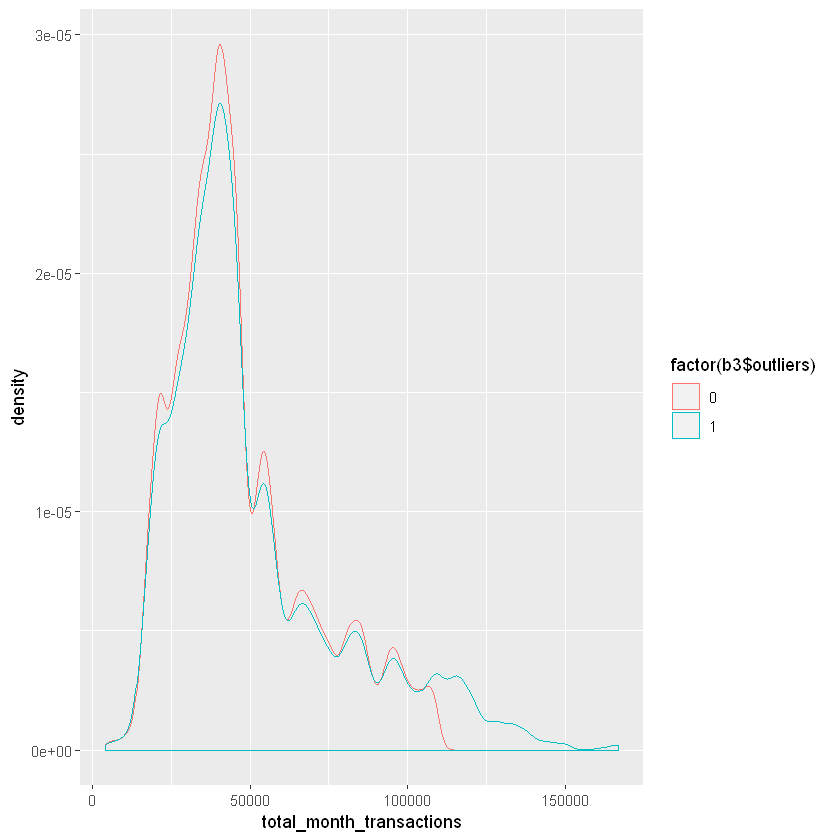

Joining, by = c("avg_prev_3months_transactions", "outliers")


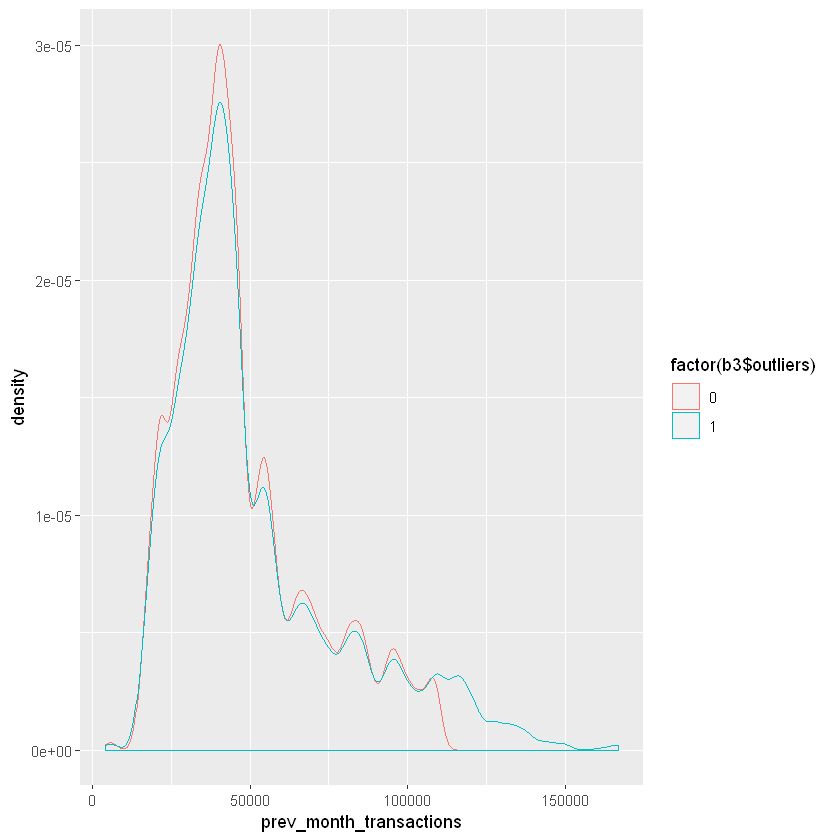

Joining, by = c("min_prev_3months_transactions", "outliers")


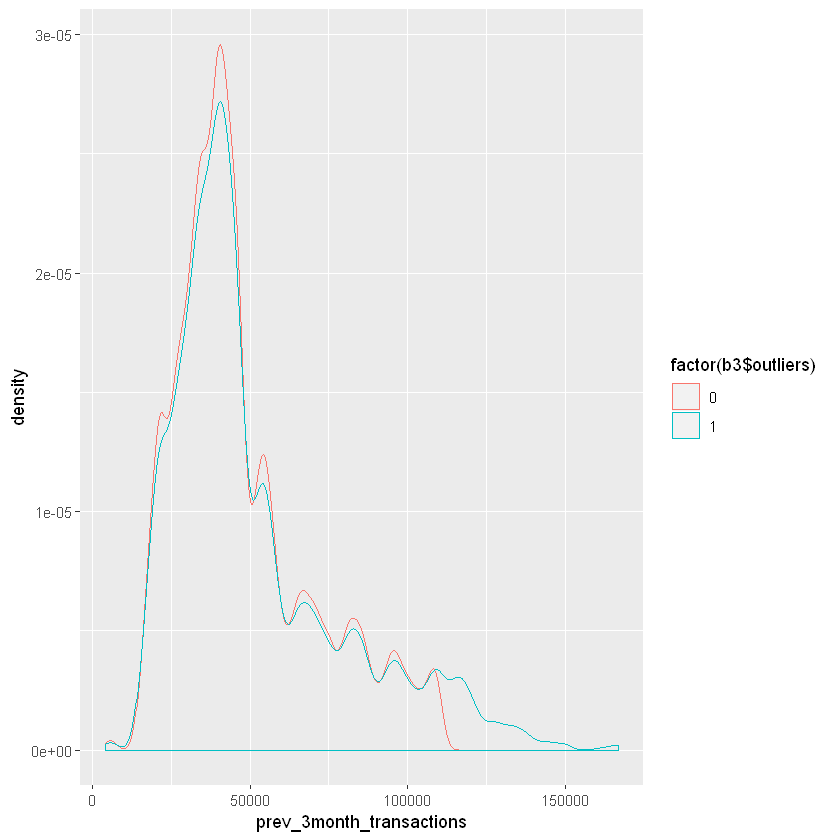

Joining, by = c("max_prev_3months_transactions", "outliers")


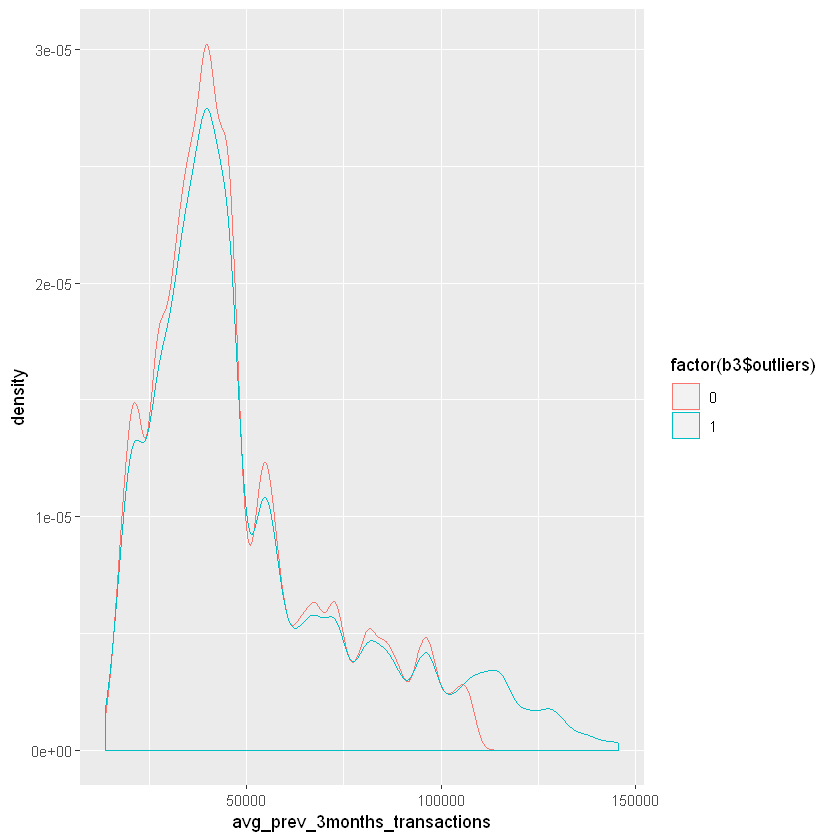

Joining, by = c("total_city_sales", "outliers")


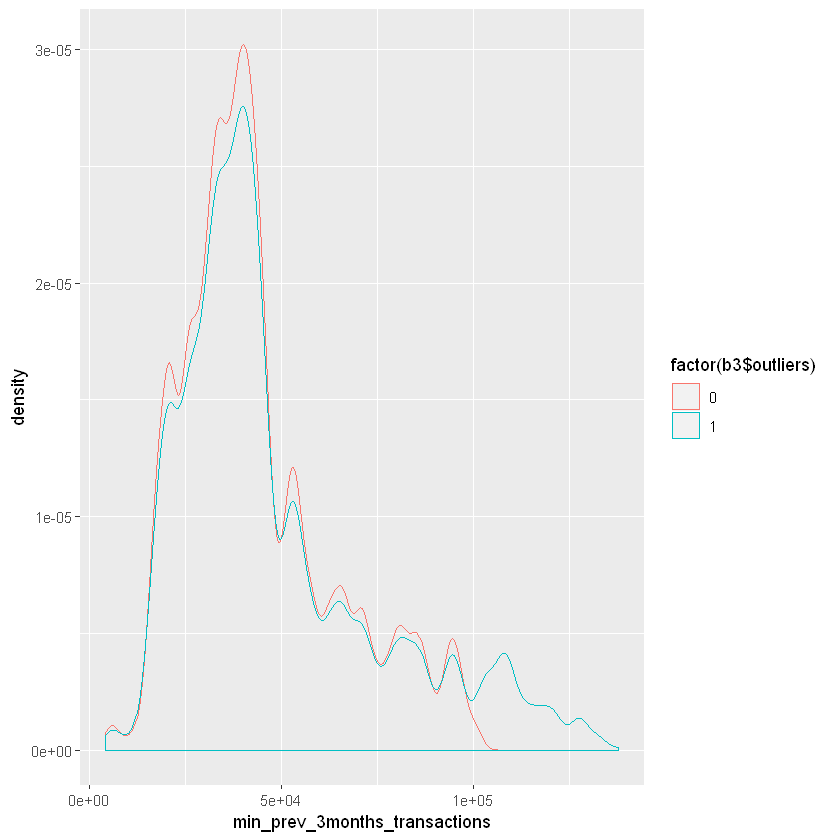

Joining, by = c("sales_perc", "outliers")


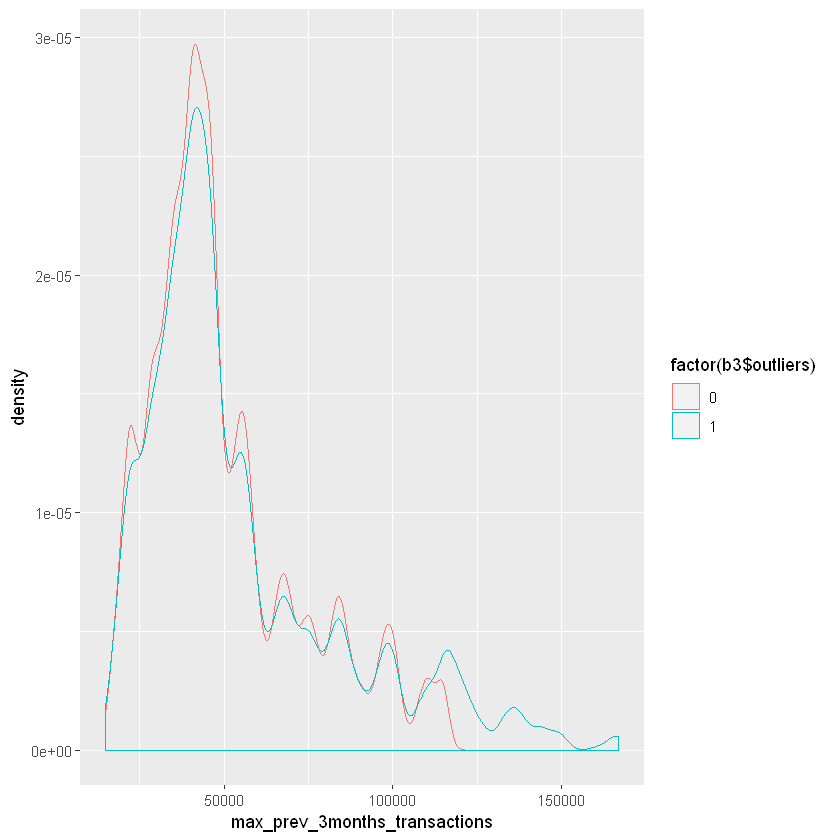

Joining, by = c("total_month_onpromotion", "outliers")


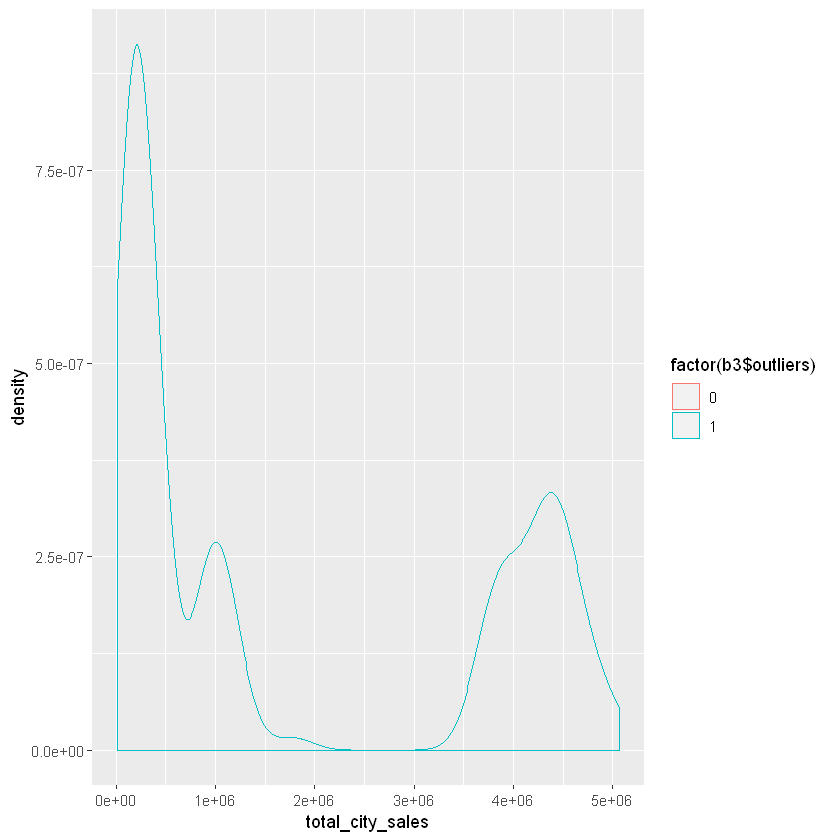

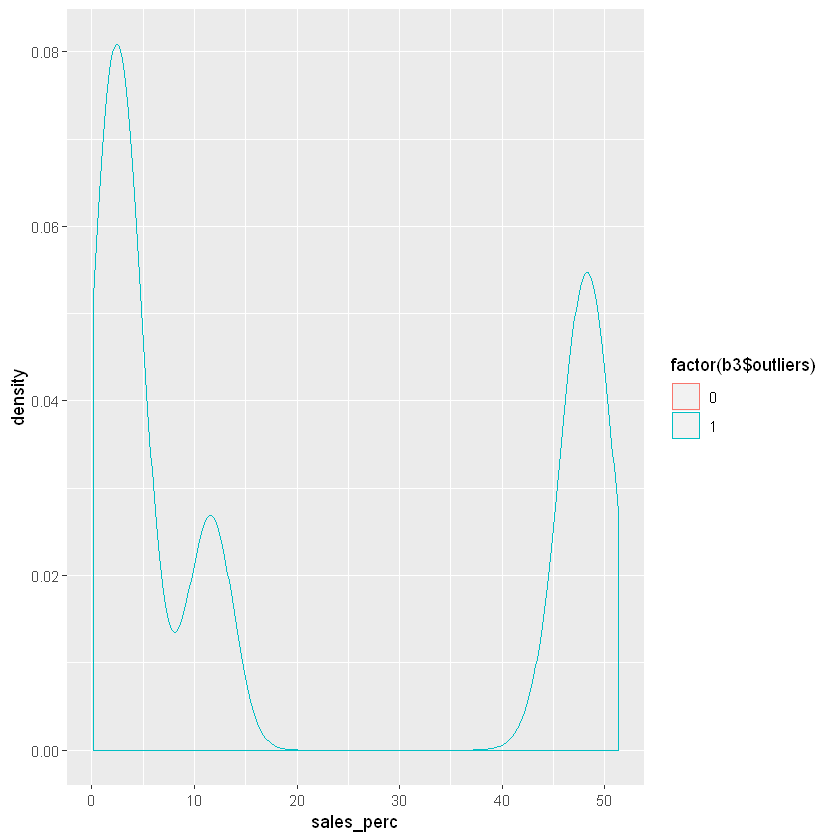

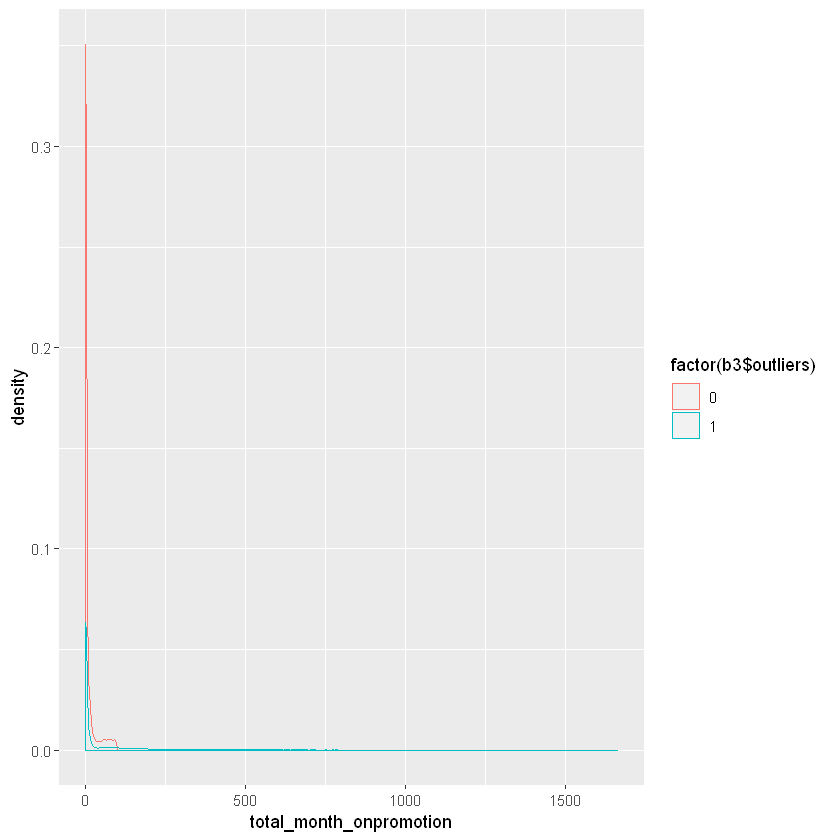

In [42]:
for (v in nf) {
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2))
}

removing the outliers doesnt affect the assumption at variables:
prev_month_sales, prev_3month_sales, avg_prev_3months_sales, min_prev_3months_sales, max_prev_3months_sales,
total_month_transactions, prev_month_transactions, prev_3month_transactions, avg_prev_3month_transactions, min_prev_3months_transactions, max_prev_3months_transactions

question 3.1.2 - scatter plots- yaxis is the outcome and x axis represents the other variables
with and without ouliers

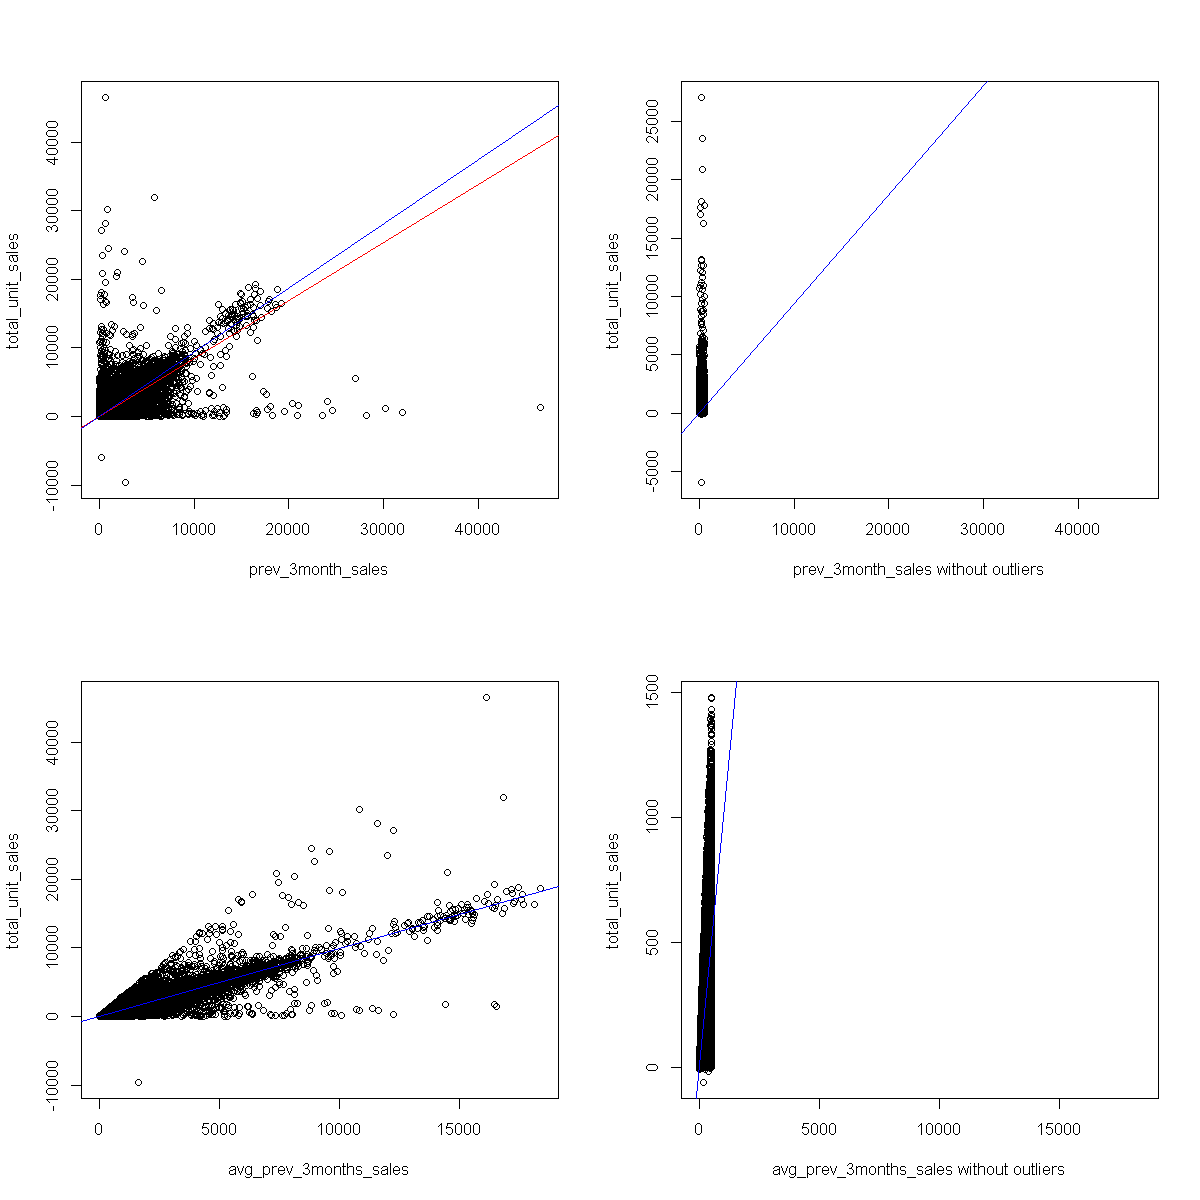

In [44]:
#3.1.2
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (v in nf){
            a<-max(df[[v]],na.rm=TRUE)
            b1<- df %>% select(total_unit_sales,v)   
            b2<-df %>% select(total_unit_sales,v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0) 
            plot(b1[[v]],b1$total_unit_sales,xlab=v,ylab='total_unit_sales',xlim=c(0,a))
            abline(coef(lm(b1$total_unit_sales~b1[[v]])), col="red")
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$total_unit_sales~b2[[v]])), col="blue")}
            plot(b2[[v]],b2$total_unit_sales,xlab=paste(v,'without outliers',sep=' '),ylab='total_unit_sales',xlim=c(0,a))
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$total_unit_sales~b2[[v]])), col="blue")}
            
}

prev_month_sales, prev_3month_sales, avg_prev_3months_sales, min_prev_3months_sales, max_prev_3months_sales,
total_month_transactions, prev_month_transactions, prev_3month_transactions, avg_prev_3month_transactions, min_prev_3months_transactions, max_prev_3months_transactions

removing the outliers from the data doesnt affect the regression model at features:
* prev_month_sales, prev_3month_sales, min_prev_3months_sales, max_prev_3months_sales

In [24]:
# i decided to treat these features by convering the outliers to NA values because at some of them 
# reomoving the outliers affects only the result and at some of them removing the outliers affect ony the model
l1<- c('prev_month_sales', 'prev_3month_sales', 'avg_prev_3months_sales', 'min_prev_3months_sales', 'max_prev_3months_sales',
'total_month_transactions', 'prev_month_transactions', 'prev_3month_transactions', 'avg_prev_3months_transactions',
       'min_prev_3months_transactions', 'max_prev_3months_transactions')

In [35]:
#outliers_treat = read.csv("../data/outlier_treatment.csv")

In [36]:
#outliers_treat <- outliers_treat[1:41,1:4]
#outliers_treat

Feature.name                 Scale Outlier.treatment
1  budget                       Ratio drop             
2  popularity                   Ratio Leave            
3  runtime                      Ratio drop             
4  sw_collection                Ratio Leave            
5  producers_cnt                Ratio Null             
6  countries_cnt                Ratio Leave            
7  keywords_cnt                 Ratio drop             
8  actor0_movies_cnt            Ratio drop             
9  actor0_movies_5y_cnt         Ratio drop             
10 actor1_movies_cnt            Ratio drop             
11 actor1_movies_5y_cnt         Ratio drop             
12 actor2_movies_cnt            Ratio drop             
13 actor2_movies_5y_cnt         Ratio drop             
14 actor0_prev_revenue          Ratio drop             
15 actor1_prev_revenue          Ratio drop             
16 actor2_prev_revenue          Ratio drop             
17 director_movies_cnt          Ratio drop             
18 director_movies_5y_cnt       Ratio drop             
19 depart_Art                   Ratio drop             
20 depart_Camera                Ratio drop             
21 depart_Crew                  Ratio Leave            
22 depart_Custom_Mkup           Ratio drop             
23 depart_Directing             Ratio drop             
24 depart_Editing               Ratio drop             
25 depart_Lighting              Ratio Leave            
26 depart_Production            Ratio drop             
27 depart_Sound                 Ratio drop             
28 depart_Visual_Effects        Ratio Leave            
29 depart_Writing               Ratio drop             
30 depart_Art_female            Ratio Leave            
31 depart_Camera_female         Ratio Leave            
32 depart_Crew_female           Ratio Leave            
33 depart_Custom_Mkup_female    Ratio drop             
34 depart_Directing_female      Ratio Leave            
35 depart_Editing_female        Ratio Leave            
36 depart_Lighting_female       Ratio Leave            
37 depart_Production_female     Ratio drop             
38 depart_Sound_female          Ratio Leave            
39 depart_Visual_Effects_female Ratio Leave            
40 depart_Writing_female        Ratio Leave            
41                                                     
   why                                            
1  doesn't affect assumptions, affects the results
2  affect both assumption and resaults            
3  doesn't affect assumptions, affects the results
4  affect both assumption and resaults            
5  doesn't affect both assumption and resaults    
6  affect both assumption and resaults            
7  doesn't affect assumptions, affects the results
8  doesn't affect both assumption and resaults    
9  doesn't affect both assumption and resaults    
10 doesn't affect assumptions, affects the results
11 doesn't affect both assumption and resaults    
12 doesn't affect both assumption and resaults    
13 doesn't affect both assumption and resaults    
14 doesn't affect both assumption and resaults    
15 doesn't affect both assumption and resaults    
16 doesn't affect both assumption and resaults    
17 doesn't affect assumptions, affects the results
18 doesn't affect both assumption and resaults    
19 doesn't affect both assumption and resaults    
20 affect assumption but doesn't affect resaults  
21 affect both assumption and resaults            
22 affect assumption but doesn't affect resaults  
23 doesn't affect both assumption and resaults    
24 doesn't affect both assumption and resaults    
25 affect both assumption and resaults            
26 doesn't affect both assumption and resaults    
27 affect assumption but doesn't affect results   
28 affect both assumption and resaults            
29 doesn't affect both assumption and resaults    
30 affect both assumption and resaults            
31 affect both assumption and resaults            
32 affect both assu

In [25]:
## function which takes a dataframe and a vector of names and transforms outliers to NA
## at the features which are in the vector
outlierRepNAMatrix <- function(data,vec,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v %in% vec)) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]]  > outhigh & v!='revenue',NA,data[[v]])
            outdata[v] <- mv
        } else {
            outdata[v] <- data[[v]]
        }
    }
    return(outdata)
}



3.1.3 - removing the outliers from the data

In [26]:
df.noout <- outlierRepNAMatrix(df,l1) 

In [ ]:
df.miss1<- missingMatrix(df.noout)

In [28]:
getMissingness(df.noout)

[[1]]
                             var na.count rate
1         min_prev_3months_sales   183073  9.3
2               prev_month_sales   182194  9.2
3         max_prev_3months_sales   182080  9.2
4         avg_prev_3months_sales   181824  9.2
5              prev_3month_sales   180962  9.2
6  min_prev_3months_transactions   141897  7.2
7  avg_prev_3months_transactions   127777  6.5
8  max_prev_3months_transactions   125940  6.4
9       total_month_transactions   122904  6.2
10       prev_month_transactions   116236  5.9

[[2]]
[1] "This dataset has 1608523 (81.4%) complete rows. Original data has 1975248 rows."



$missingness
                             var na.count rate
1         min_prev_3months_sales   183073  9.3
2               prev_month_sales   182194  9.2
3         max_prev_3months_sales   182080  9.2
4         avg_prev_3months_sales   181824  9.2
5              prev_3month_sales   180962  9.2
6  min_prev_3months_transactions   141897  7.2
7  avg_prev_3months_transactions   127777  6.5
8  max_prev_3months_transactions   125940  6.4
9       total_month_transactions   122904  6.2
10       prev_month_transactions   116236  5.9
11      prev_3month_transactions   109840  5.6

$message
[1] "This dataset has 1608523 (81.4%) complete rows. Original data has 1975248 rows."

$rows
NULL

In [86]:
mm <- getMissingness(df.noout, getRows=TRUE)

[[1]]
                             var na.count rate
1         min_prev_3months_sales   183073  9.3
2               prev_month_sales   182194  9.2
3         max_prev_3months_sales   182080  9.2
4         avg_prev_3months_sales   181824  9.2
5              prev_3month_sales   180962  9.2
6  min_prev_3months_transactions   141897  7.2
7  avg_prev_3months_transactions   127777  6.5
8  max_prev_3months_transactions   125940  6.4
9       total_month_transactions   122904  6.2
10       prev_month_transactions   116236  5.9

[[2]]
[1] "This dataset has 1608523 (81.4%) complete rows. Original data has 1975248 rows."



In [87]:
df.out1 <- df.noout[-mm$rows,as.character(mm$missingness$var)] 

In [24]:
dim(df.out1)

[1] 366725     11

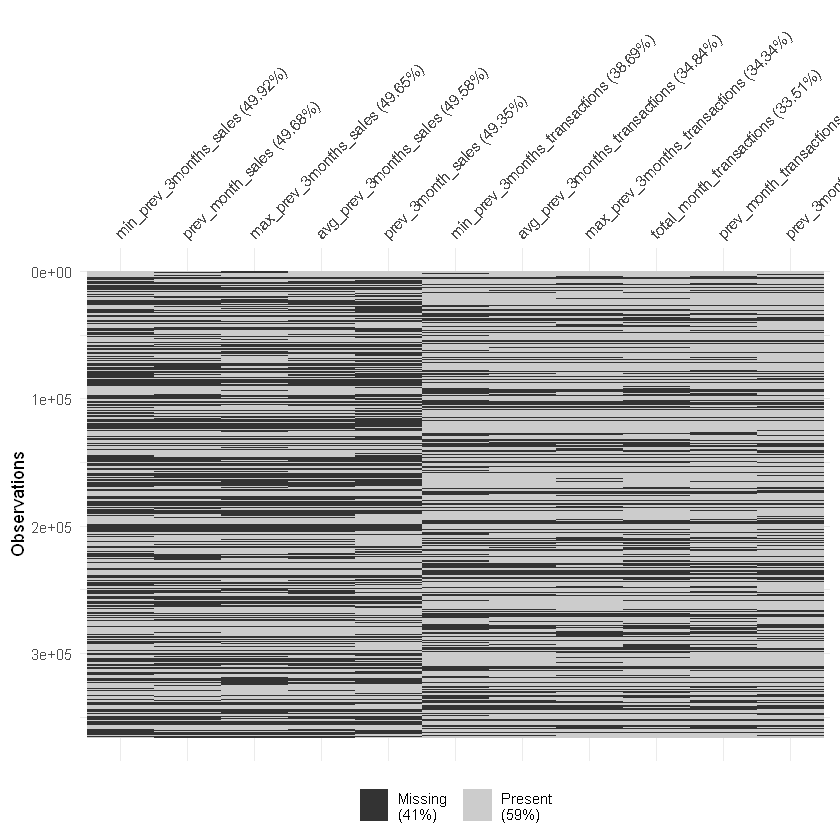

In [25]:
library(naniar)
vis_miss(df.out1, warn_large_data=FALSE )

In [27]:
df1 <- df.noout %>% select(id,min_prev_3months_sales,prev_month_sales,max_prev_3months_sales,avg_prev_3months_sales,prev_3month_sales)
df2 <- df.noout %>% select(id,min_prev_3months_transactions,avg_prev_3months_transactions,max_prev_3months_transactions,total_month_transactions,prev_month_transactions,prev_3month_transactions)

In [28]:
df1$NA1<- apply(is.na(df1), 1, sum)
df2$NA2 <- apply(is.na(df2), 1, sum)

In [29]:
df1 <- df1 %>% filter(NA1<4)
df2 <- df2 %>% filter(NA2<5)

In [30]:
dim(df1)

[1] 1816322       7

In [31]:
df3 <- inner_join(df1,df2,by="id")

In [32]:
head(df3)

id min_prev_3months_sales prev_month_sales max_prev_3months_sales
1 1  44                     46               86                    
2 2  44                     44               46                    
3 3  44                     44               47                    
4 4  29                     47               47                    
5 5  29                     29               47                    
6 6  29                     38               49                    
  avg_prev_3months_sales prev_3month_sales NA1 min_prev_3months_transactions
1 58.66667               53                0   40587                        
2 44.66667               86                0   45299                        
3 45.00000               46                0   44876                        
4 40.00000               44                0   44876                        
5 38.00000               44                0   44876                        
6 38.66667               47                0   44540                        
  avg_prev_3months_transactions max_prev_3months_transactions
1 44208.67                      46740                        
2 46108.33                      46740                        
3 45967.33                      46740                        
4 46345.33                      47874                        
5 46179.67                      47874                        
6 46067.67                      47874                        
  total_month_transactions prev_month_transactions prev_3month_transactions NA2
1 46740                    45299                   47471                    0  
2 46286                    46740                   40587                    0  
3 44876                    46286                   45299                    0  
4 47874                    44876                   46740                    0  
5 45789                    47874                   46286                    0  
6 44540                    45789                   44876                    0

In [34]:
df3 <- df3 %>% select(id)

In [35]:
df.noout <- left_join(df3,df.noout,by="id")

In [36]:
head(df.noout)

id row1 item_nbr store_nbr Year month total_unit_sales city  state    
1 1  1    1003679  1         2013 4     44               Quito Pichincha
2 2  2    1003679  1         2013 5     44               Quito Pichincha
3 3  3    1003679  1         2013 6     47               Quito Pichincha
4 4  4    1003679  1         2013 7     29               Quito Pichincha
5 5  5    1003679  1         2013 8     38               Quito Pichincha
6 6  6    1003679  1         2013 9     49               Quito Pichincha
  store_type ... cluster8 cluster9 cluster10 cluster11 cluster12 cluster13
1 D          ... 0        0        0         0         0         1        
2 D          ... 0        0        0         0         0         1        
3 D          ... 0        0        0         0         0         1        
4 D          ... 0        0        0         0         0         1        
5 D          ... 0        0        0         0         0         1        
6 D          ... 0        0        0         0         0         1        
  cluster14 cluster15 cluster16 cluster17
1 0         0         0         0        
2 0         0         0         0        
3 0         0         0         0        
4 0         0         0         0        
5 0         0         0         0        
6 0         0         0         0

In [37]:
dim(df.noout)

[1] 1748283      86

In [38]:
getMissingness(df.noout)

[[1]]
                             var na.count rate
1  min_prev_3months_transactions    38190  2.2
2              prev_3month_sales    30737  1.8
3  max_prev_3months_transactions    30448  1.7
4       total_month_transactions    27696  1.6
5  avg_prev_3months_transactions    27471  1.6
6         max_prev_3months_sales    26335  1.5
7         min_prev_3months_sales    25038  1.4
8               prev_month_sales    24258  1.4
9        prev_month_transactions    22570  1.3
10      prev_3month_transactions    20947  1.2

[[2]]
[1] "This dataset has 1608523 (92%) complete rows. Original data has 1748283 rows."



$missingness
                             var na.count rate
1  min_prev_3months_transactions    38190  2.2
2              prev_3month_sales    30737  1.8
3  max_prev_3months_transactions    30448  1.7
4       total_month_transactions    27696  1.6
5  avg_prev_3months_transactions    27471  1.6
6         max_prev_3months_sales    26335  1.5
7         min_prev_3months_sales    25038  1.4
8               prev_month_sales    24258  1.4
9        prev_month_transactions    22570  1.3
10      prev_3month_transactions    20947  1.2
11        avg_prev_3months_sales    20044  1.1

$message
[1] "This dataset has 1608523 (92%) complete rows. Original data has 1748283 rows."

$rows
NULL

In [39]:
df.noout<- na.omit(df.noout)

In [40]:
dim(df.noout)

[1] 1608523      86

In [41]:
names(df.noout)

[1] "id"                            "row1"                         
 [3] "item_nbr"                      "store_nbr"                    
 [5] "Year"                          "month"                        
 [7] "total_unit_sales"              "city"                         
 [9] "state"                         "store_type"                   
[11] "store_cluster"                 "prev_month_sales"             
[13] "prev_3month_sales"             "avg_prev_3months_sales"       
[15] "min_prev_3months_sales"        "max_prev_3months_sales"       
[17] "monthly_oilprice_avg"          "total_month_holidays"         
[19] "total_month_transactions"      "prev_month_transactions"      
[21] "prev_3month_transactions"      "avg_prev_3months_transactions"
[23] "min_prev_3months_transactions" "max_prev_3months_transactions"
[25] "family"                        "class"                        
[27] "perishable"                    "BREAD.BAKERY"                 
[29] "BEVERAGES"                     "DAIRY"                        
[31] "PERSONAL.CARE"                 "HOME.CARE"                    
[33] "FROZEN.FOODS"                  "POULTRY"                      
[35] "GROCERY.II"                    "X.LIQUOR"                     
[37] "EGGS"                          "GROCERY.I"                    
[39] "CLEANING"                      "DELI"                         
[41] "store_typeA"                   "store_typeB"                  
[43] "store_typeC"                   "store_typeD"                  
[45] "store_typeE"                   "city_Ambato"                  
[47] "city_Babahoyo"                 "city_Cayambe"                 
[49] "city_Cuenca"                   "city_Daule"                   
[51] "city_El.Carmen"                "city_Esmeraldas"              
[53] "city_Guaranda"                 "city_Guayaquil"               
[55] "city_Ibarra"                   "city_Latacunga"               
[57] "city_Libertad"                 "city_Loja"                    
[59] "city_Machala"                  "city_Manta"                   
[61] "city_Playas"                   "city_Puyo"                    
[63] "city_Quevedo"                  "city_Quito"                   
[65] "city_Riobamba"                 "city_Salinas"                 
[67] "city_Santo.Domingo"            "total_city_sales"             
[69] "sales_perc"                    "cluster1"                     
[71] "cluster2"                      "cluster3"                     
[73] "cluster4"                      "cluster5"                     
[75] "cluster6"                      "cluster7"                     
[77] "cluster8"                      "cluster9"                     
[79] "cluster10"                     "cluster11"                    
[81] "cluster12"                     "cluster13"                    
[83] "cluster14"                     "cluster15"                    
[85] "cluster16"                     "cluster17"

In [30]:
summary(df.noout)

      row1           item_nbr          store_nbr              Year     
 Min.   :      1   Length:1975248     Length:1975248     Min.   :2013  
 1st Qu.: 493813   Class :character   Class :character   1st Qu.:2014  
 Median : 987625   Mode  :character   Mode  :character   Median :2015  
 Mean   : 987625                                         Mean   :2015  
 3rd Qu.:1481436                                         3rd Qu.:2016  
 Max.   :1975248                                         Max.   :2017  
                                                                       
     month        total_unit_sales      city              state          
 Min.   : 1.000   Min.   :-9700.0   Length:1975248     Length:1975248    
 1st Qu.: 4.000   1st Qu.:   57.0   Class :character   Class :character  
 Median : 6.000   Median :  116.0   Mode  :character   Mode  :character  
 Mean   : 6.524   Mean   :  225.4                                        
 3rd Qu.: 9.000   3rd Qu.:  243.0                     

In [43]:
##creating vector of coninuous features with more than 5 percent NA values 
l2 <- c()
for (i in l){
    if (sum(is.na(movies_ff_v1[[i]])*100/7375)>=5){
        l2<-c(l2,i)
    }
}

In [44]:
##creating vector of coninuous features with less than 5 percent NA values
l3 <- c()
for (i in l){
    if (sum(is.na(movies_ff_v1[[i]])*100/7375)<5){
        l3<-c(l3,i)
    }
}

In [45]:
##creating vector of categorical features with  NA values
l4 <- c()
for (i in cn){
    if (sum(is.na(movies_ff_v1[[i]]))>0){
        l4<-c(l4,i)
    }
}

In [46]:
## with these feature i am going to check the missingness mechanism
l2

[1] "budget"              "producers_cnt"       "actor1_movies_cnt"  
 [4] "actor2_movies_cnt"   "actor0_prev_revenue" "actor1_prev_revenue"
 [7] "actor2_prev_revenue" "director_movies_cnt" "depart_Art"         
[10] "depart_Camera"       "depart_Custom_Mkup"  "depart_Directing"   
[13] "depart_Sound"

In [47]:
#vector of the continuous features with less than 5 percent of missing values- the NA treatment 
##for these features will be remove rows with NA values 
l3

[1] "popularity"                   "runtime"                     
 [3] "keyword_cnt"                  "sw_collection"               
 [5] "countries_cnt"                "keywords_cnt"                
 [7] "actor0_movies_cnt"            "actor0_movies_5y_cnt"        
 [9] "actor1_movies_5y_cnt"         "actor2_movies_5y_cnt"        
[11] "director_movies_5y_cnt"       "depart_Crew"                 
[13] "depart_Editing"               "depart_Lighting"             
[15] "depart_Production"            "depart_Visual_Effects"       
[17] "depart_Writing"               "depart_Art_female"           
[19] "depart_Camera_female"         "depart_Crew_female"          
[21] "depart_Custom_Mkup_female"    "depart_Directing_female"     
[23] "depart_Editing_female"        "depart_Production_female"    
[25] "depart_Sound_female"          "depart_Visual_Effects_female"
[27] "depart_Writing_female"

In [48]:
#vector of the categoric features with missing values
l4

[1] "release_date"           "release_year"           "release_month"         
 [4] "release_day"            "sw_female_actor0"       "sw_female_actor1"      
 [7] "sw_female_actor2"       "sw_male_actor0"         "sw_male_actor1"        
[10] "sw_male_actor2"         "depart_Lighting_female"

3.2.1 - Show the distribution of each numeric variable by missingness of other variables

Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -372, df = 36997, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -251.5671 -248.9300
sample estimates:
mean of x mean of y 
 137.0766  387.3252 

[1] "prev_3month_sales by NA prev_month_sales"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -688.38, df = 18568, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -322.0324 -320.2037
sample estimates:
mean of x mean of y 
 139.5706  460.6886 

[1] "avg_prev_3months_sales by NA prev_month_sales"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -277.32, df = 24877, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -194.8887 -192.1531
sample estimates:
mean of x mean of y 
 110.8104  304.3313 

[1] "min_prev_3months_sales by NA prev_month_sales"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


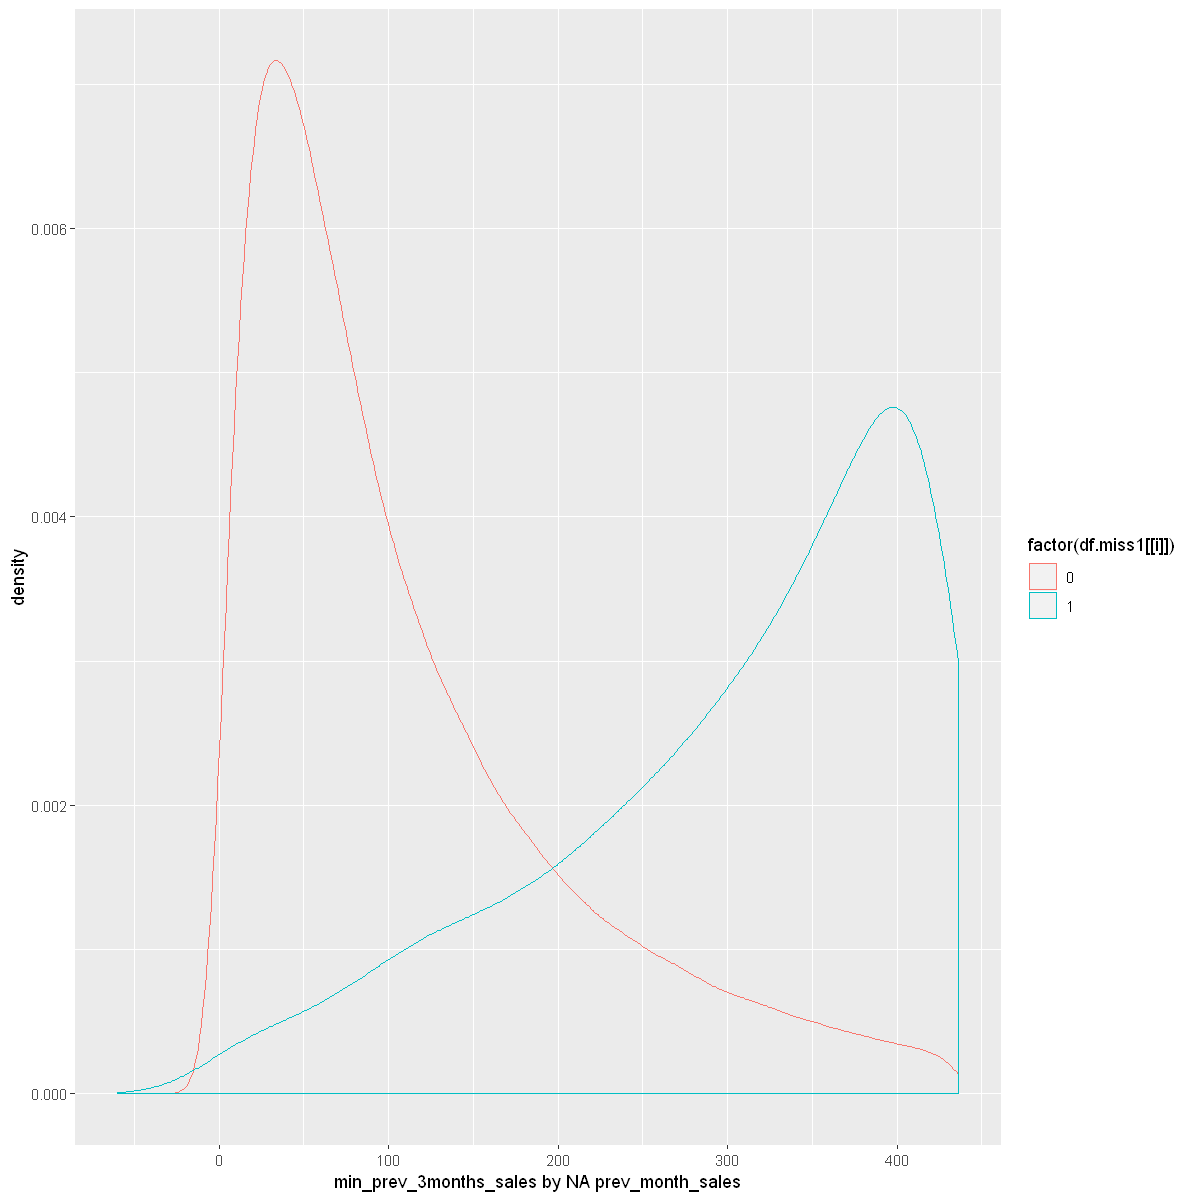


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2038.8, df = 39507, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -415.7002 -414.9017
sample estimates:
mean of x mean of y 
 166.2479  581.5489 

[1] "max_prev_3months_sales by NA prev_month_sales"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


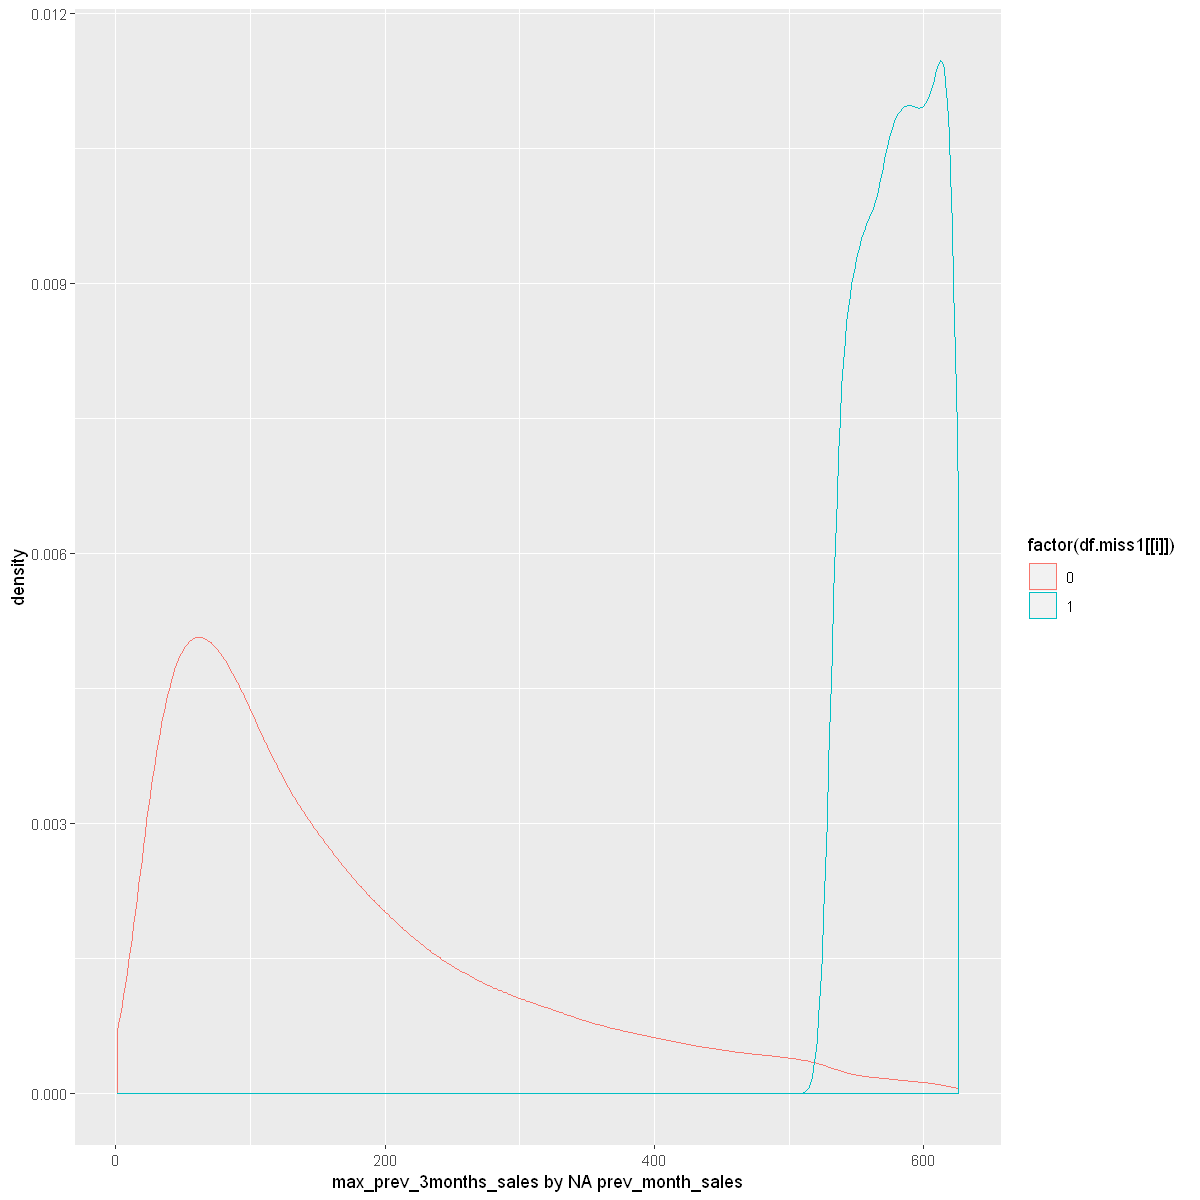


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -206.06, df = 166763, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13936.84 -13674.22
sample estimates:
mean of x mean of y 
 45472.91  59278.44 

[1] "total_month_transactions by NA prev_month_sales"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."


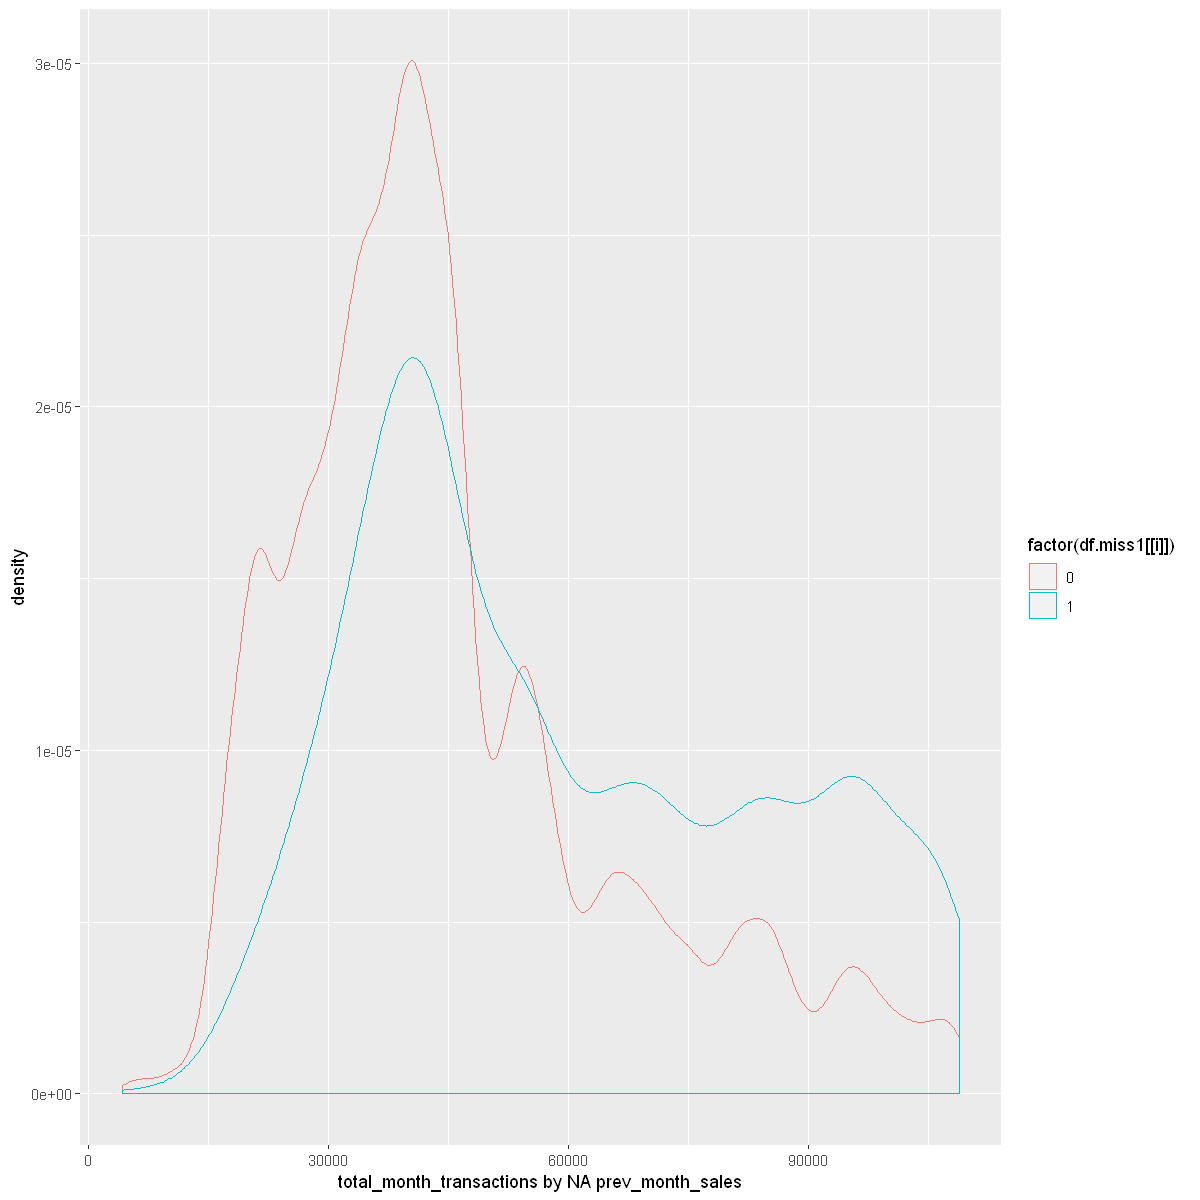


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -215.08, df = 167767, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14618.34 -14354.31
sample estimates:
mean of x mean of y 
 46160.20  60646.52 

[1] "prev_month_transactions by NA prev_month_sales"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


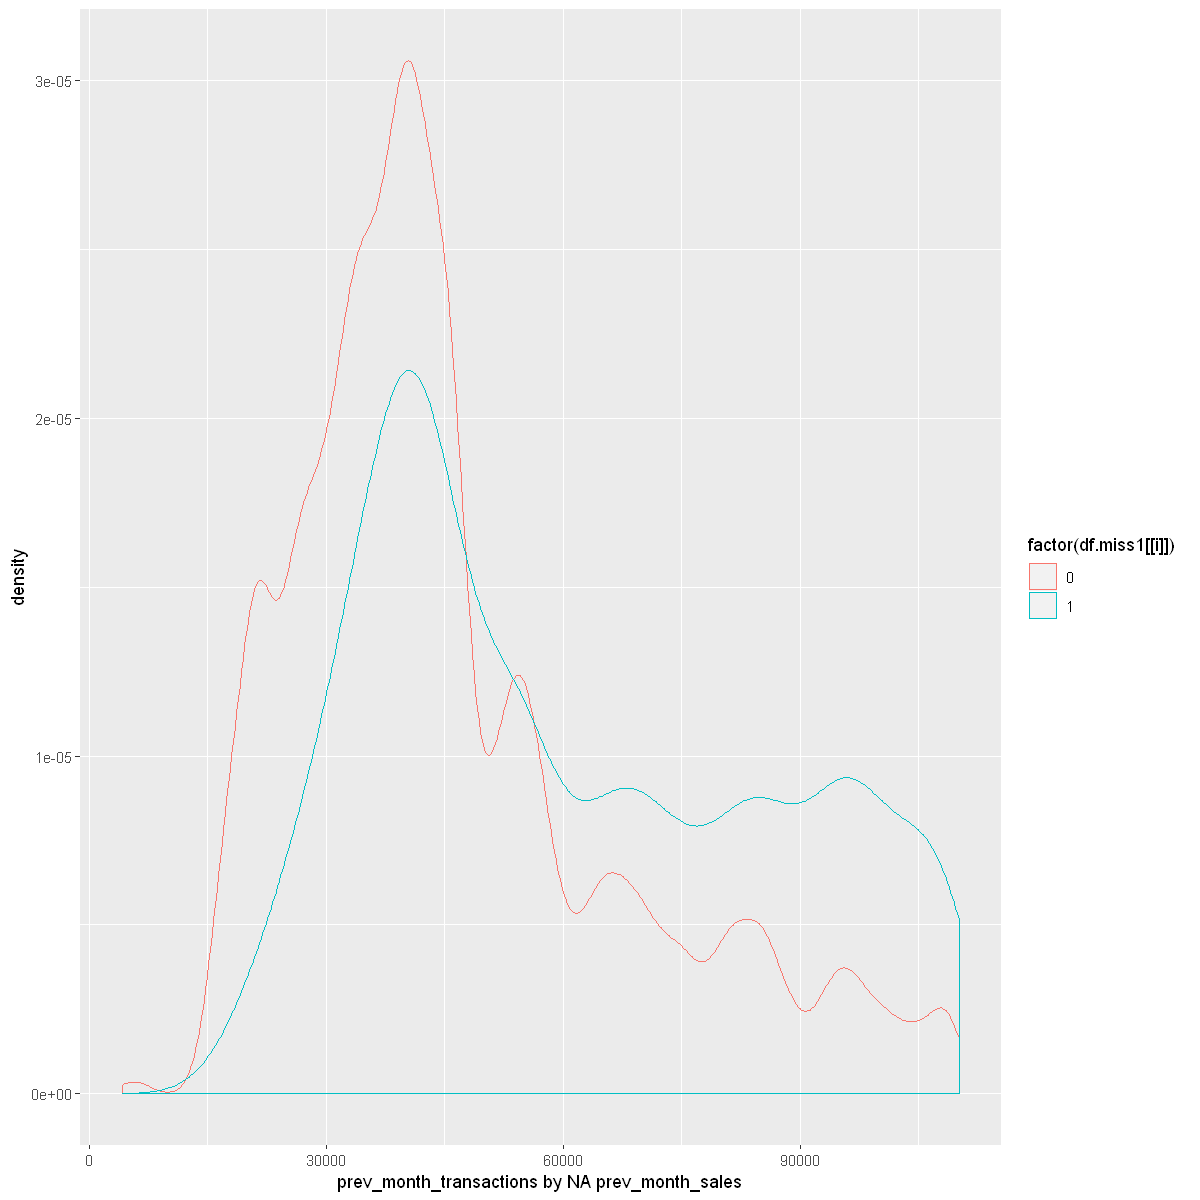


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -214.92, df = 170987, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14773.11 -14506.10
sample estimates:
mean of x mean of y 
 46209.77  60849.37 

[1] "prev_3month_transactions by NA prev_month_sales"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


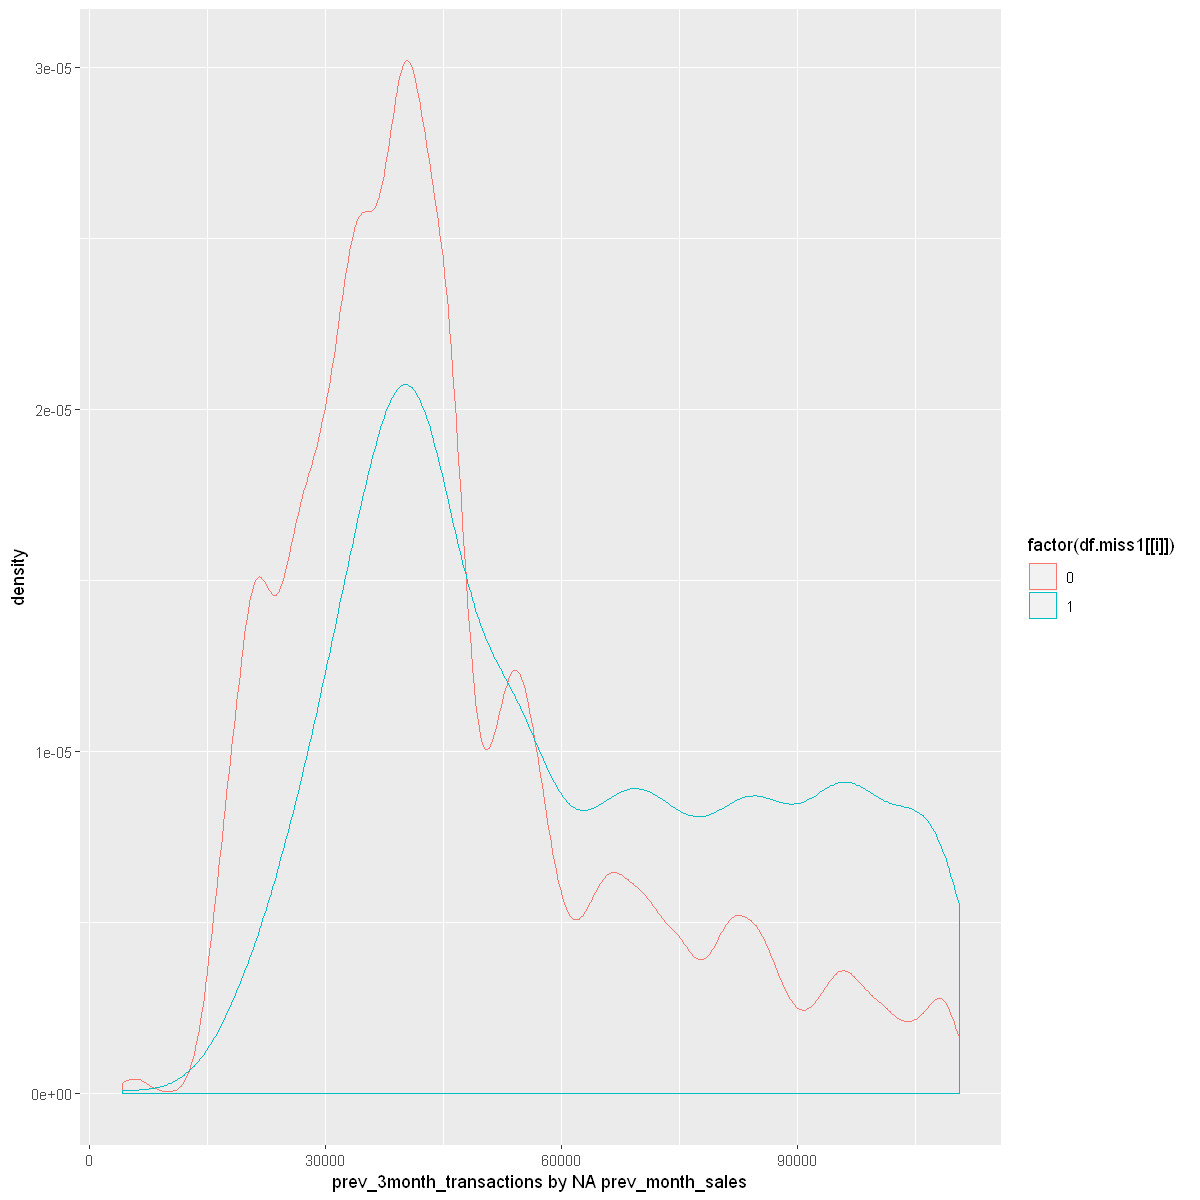


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -206.92, df = 164356, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13804.61 -13545.55
sample estimates:
mean of x mean of y 
 45692.14  59367.22 

[1] "avg_prev_3months_transactions by NA prev_month_sales"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


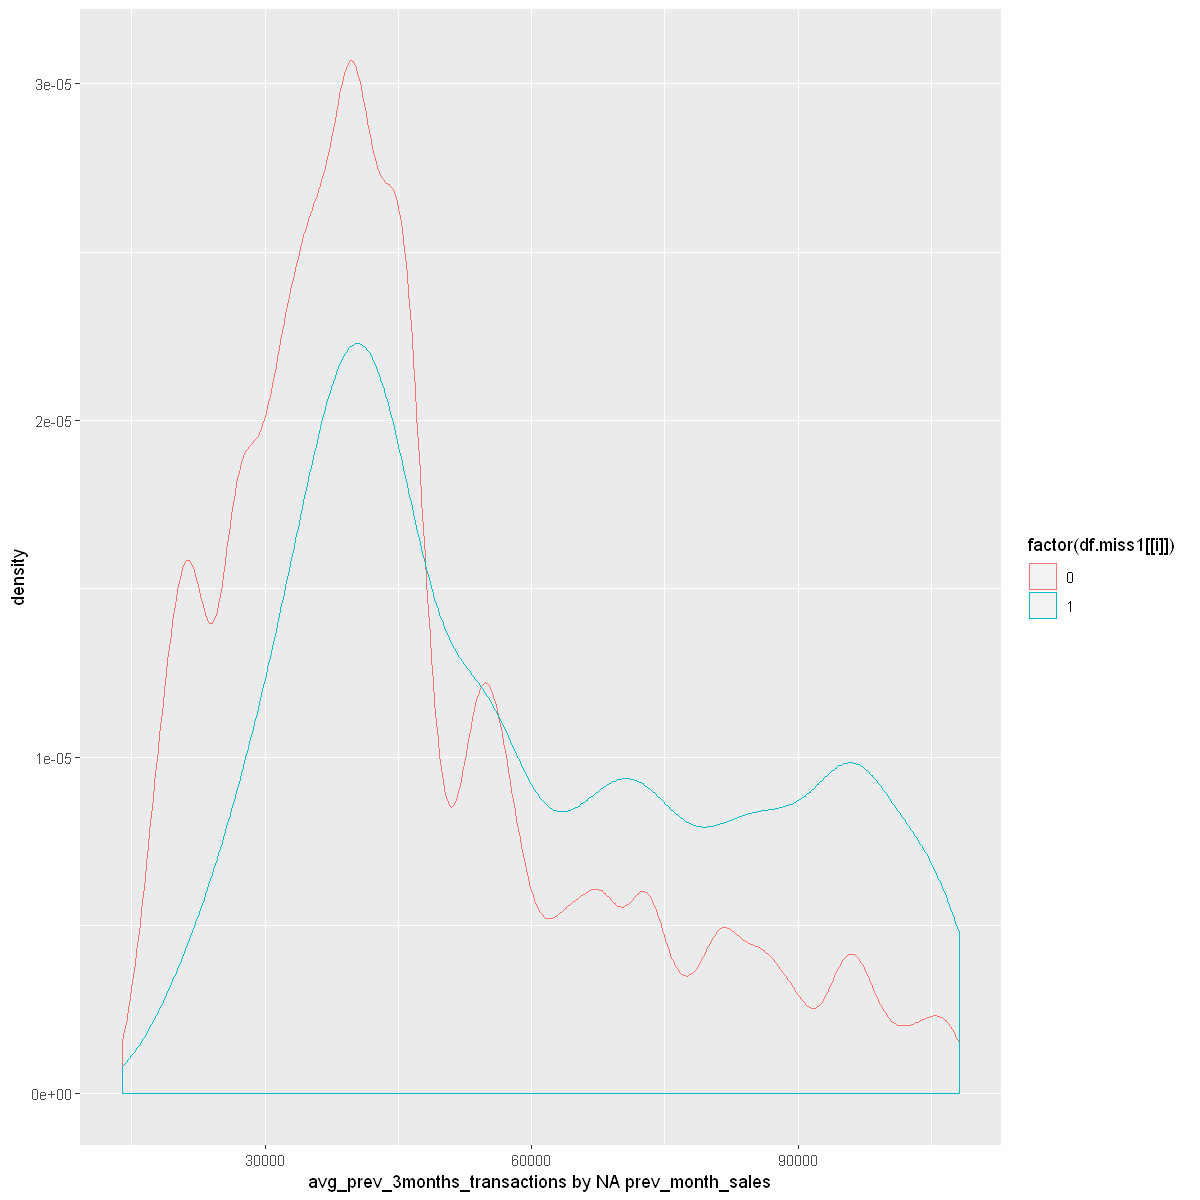


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -196.83, df = 160916, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12241.15 -11999.76
sample estimates:
mean of x mean of y 
 42640.67  54761.13 

[1] "min_prev_3months_transactions by NA prev_month_sales"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


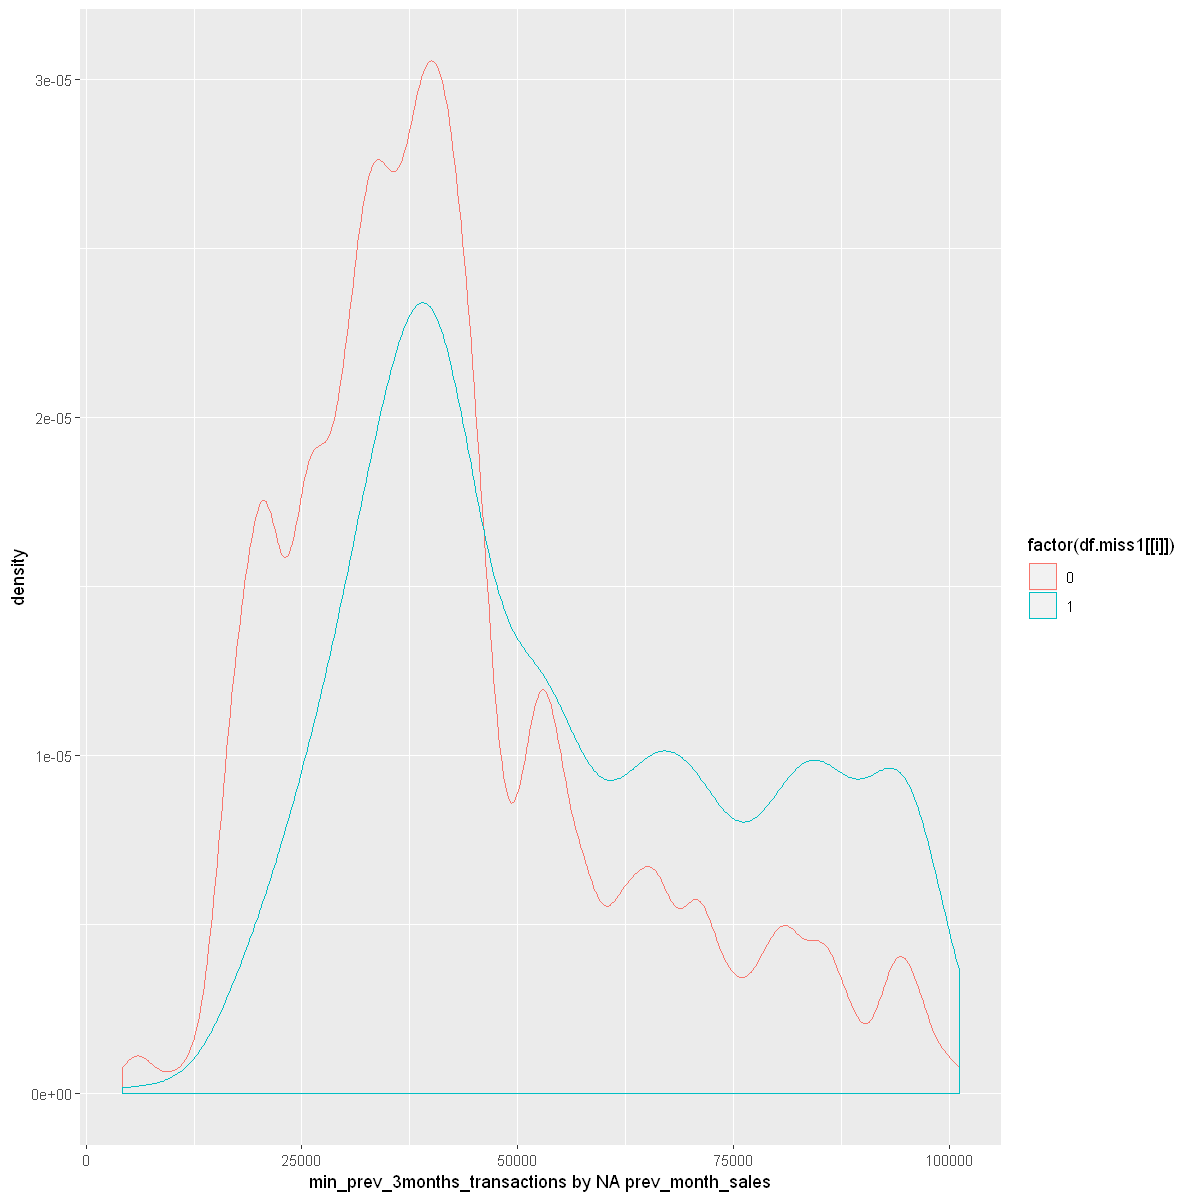


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -208.71, df = 165375, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14897.71 -14620.51
sample estimates:
mean of x mean of y 
 48579.02  63338.13 

[1] "max_prev_3months_transactions by NA prev_month_sales"


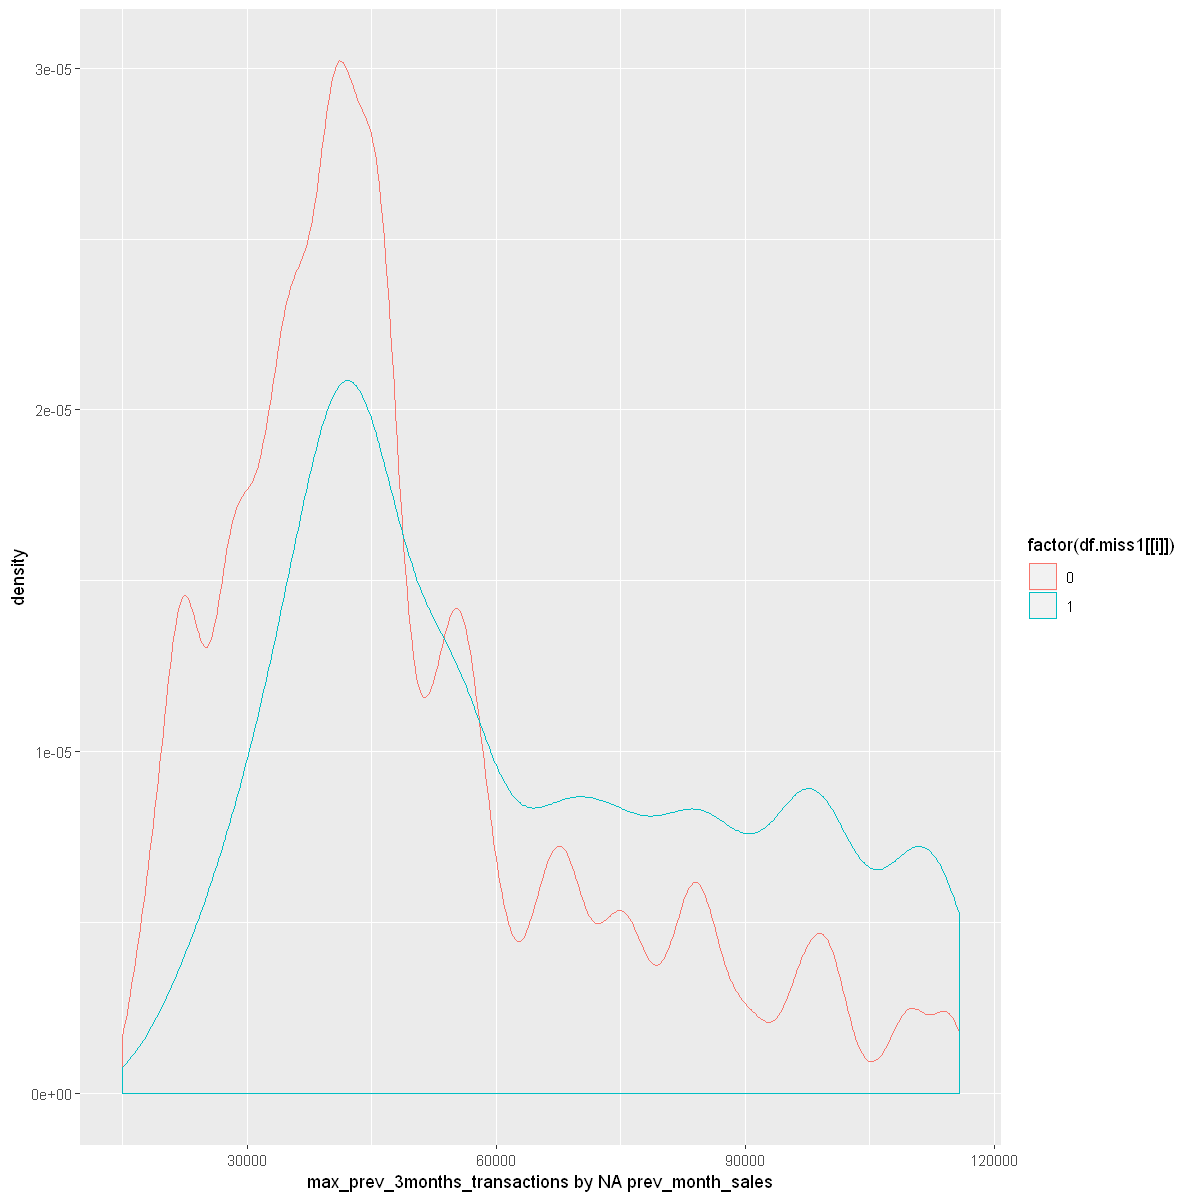


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -423.24, df = 183282, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -876.8555 -868.7717
sample estimates:
mean of x mean of y 
  144.876  1017.690 

[1] "total_unit_sales by NA prev_month_sales"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


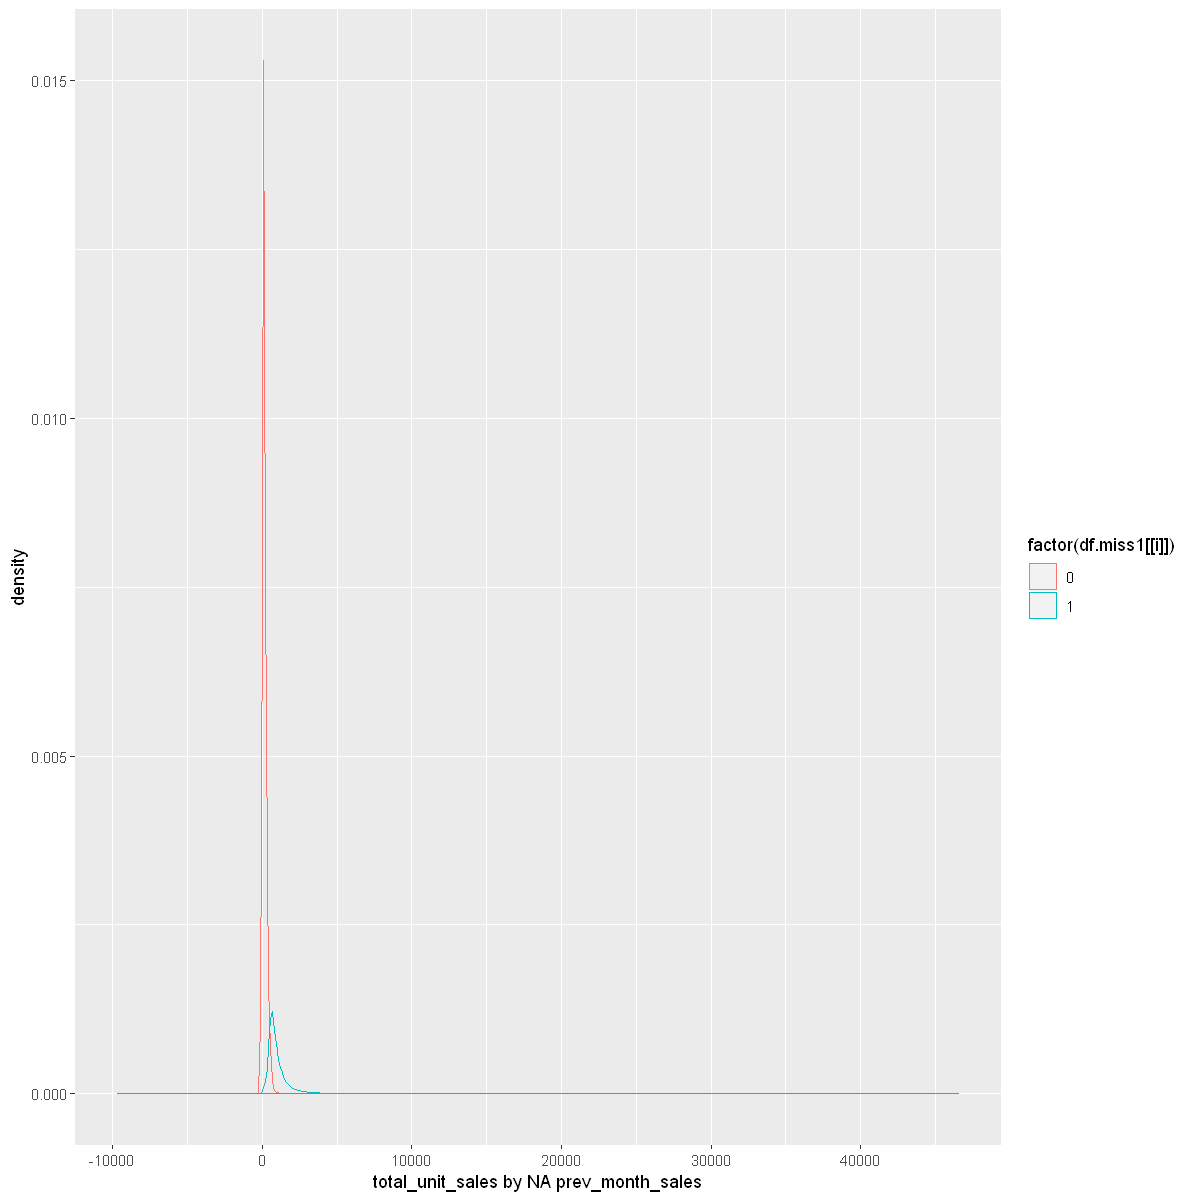


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -375.24, df = 35724, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -252.6066 -249.9814
sample estimates:
mean of x mean of y 
 136.6399  387.9339 

[1] "prev_month_sales by NA prev_3month_sales"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


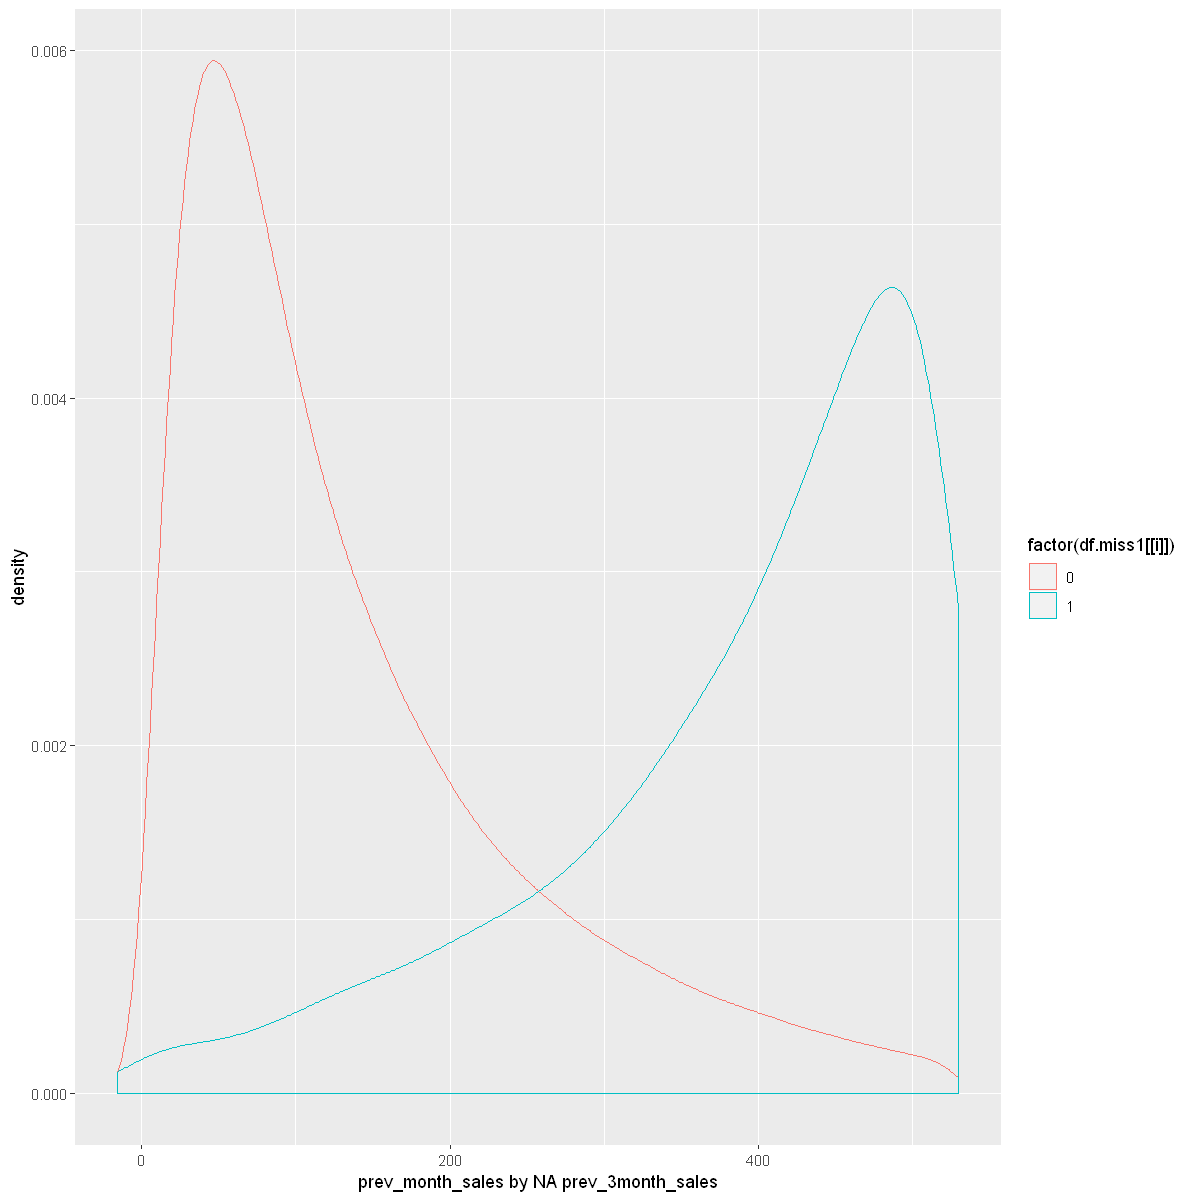


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -434.14, df = 30894, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -269.9217 -267.4954
sample estimates:
mean of x mean of y 
 138.2210  406.9296 

[1] "avg_prev_3months_sales by NA prev_3month_sales"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


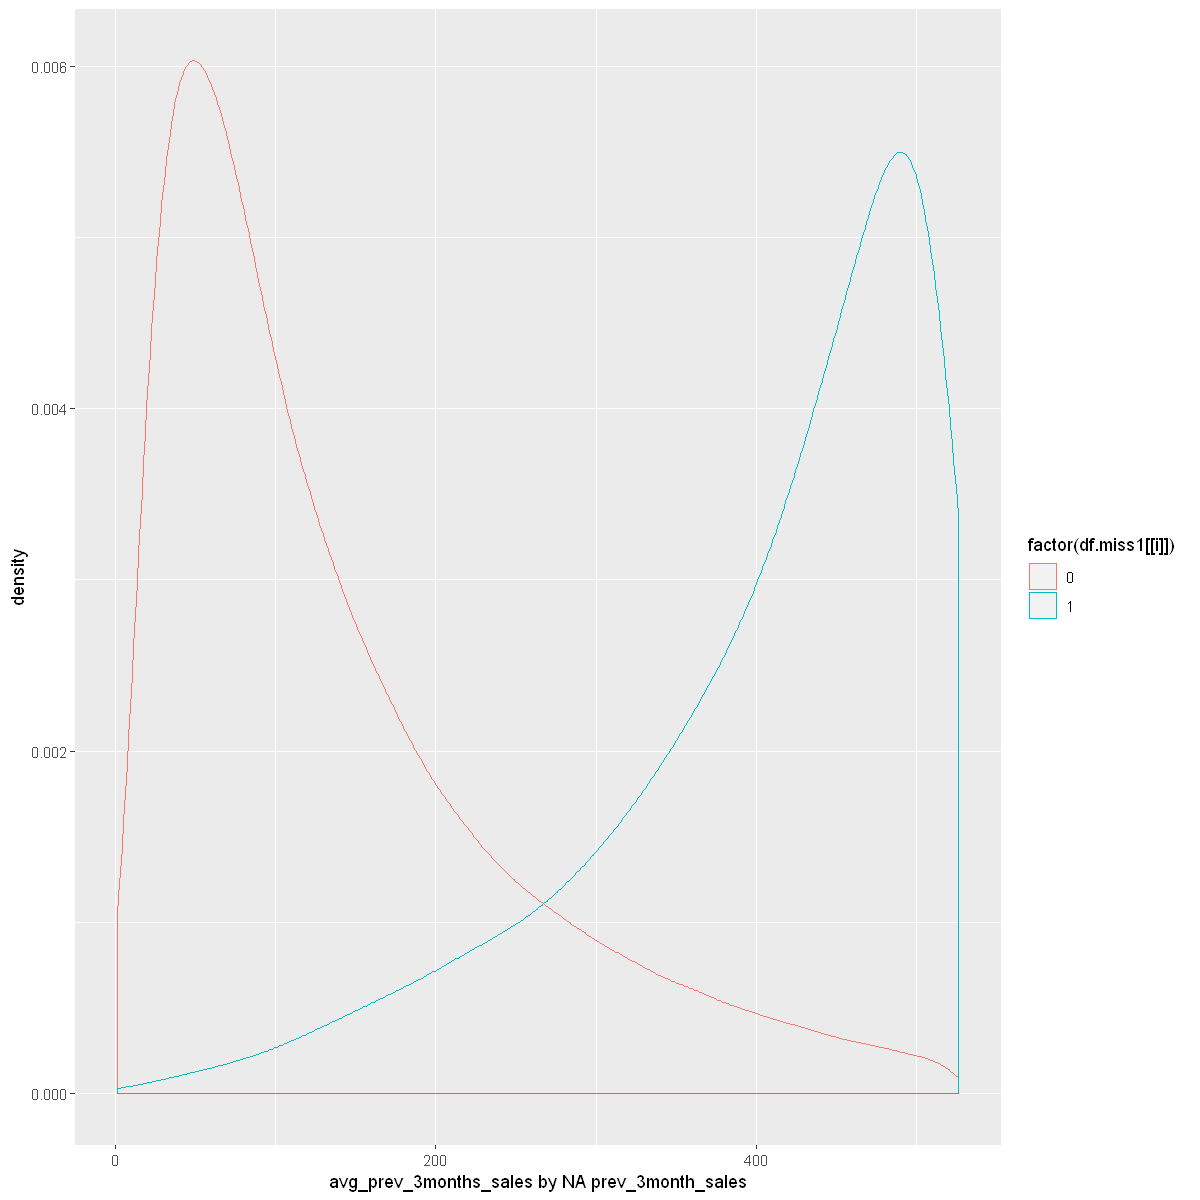


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -280.75, df = 32280, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -184.8753 -182.3118
sample estimates:
mean of x mean of y 
 110.2114  293.8049 

[1] "min_prev_3months_sales by NA prev_3month_sales"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


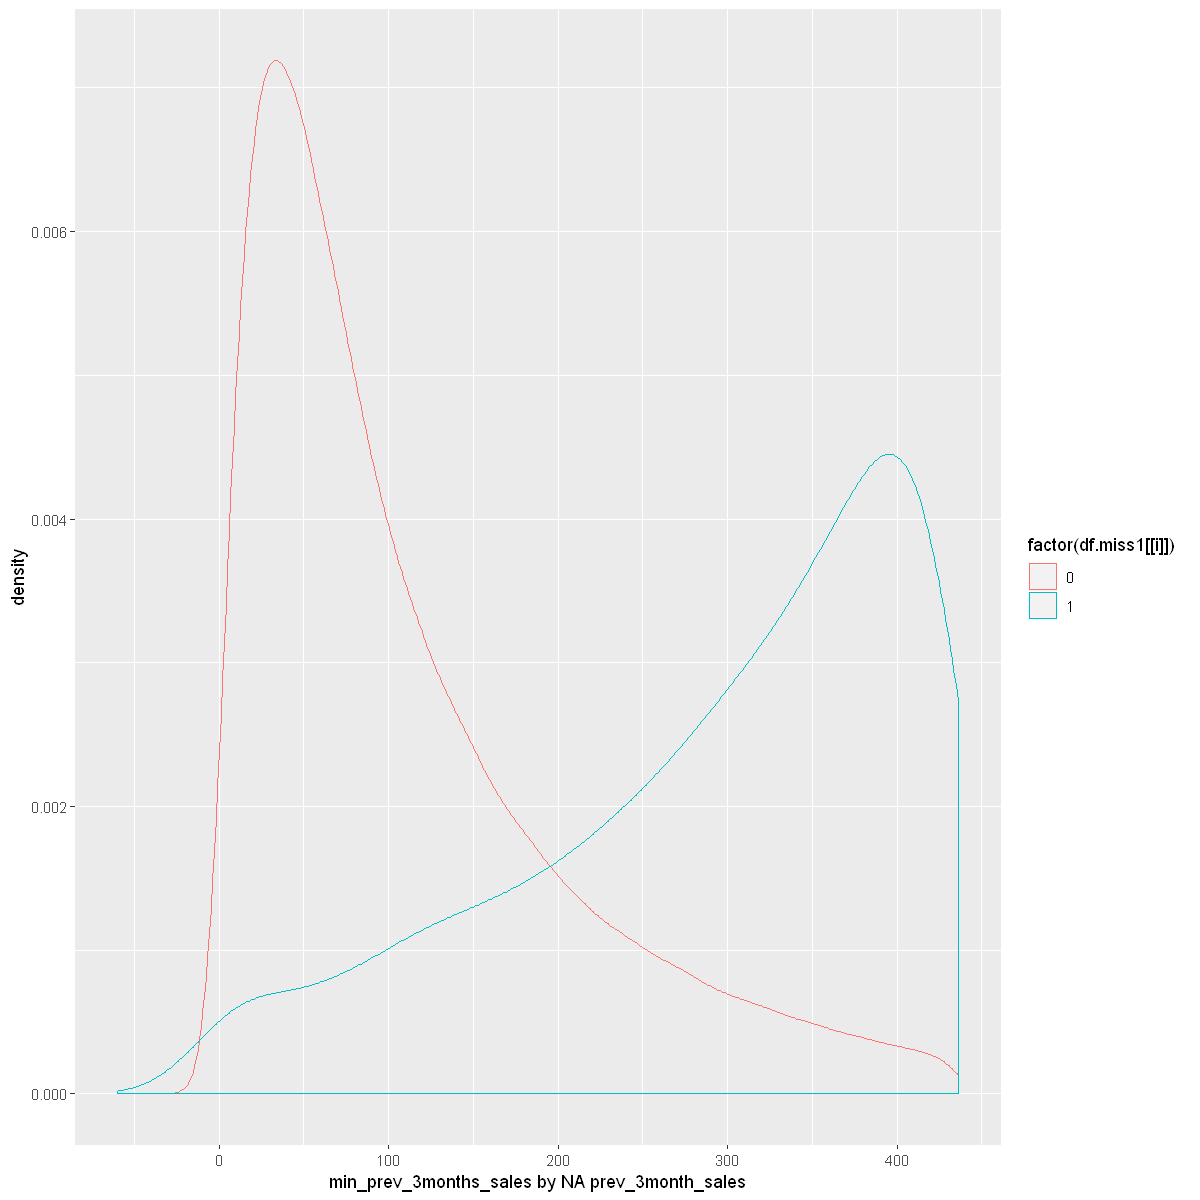


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -548.12, df = 36757, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -338.1442 -335.7345
sample estimates:
mean of x mean of y 
 165.1280  502.0674 

[1] "max_prev_3months_sales by NA prev_3month_sales"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


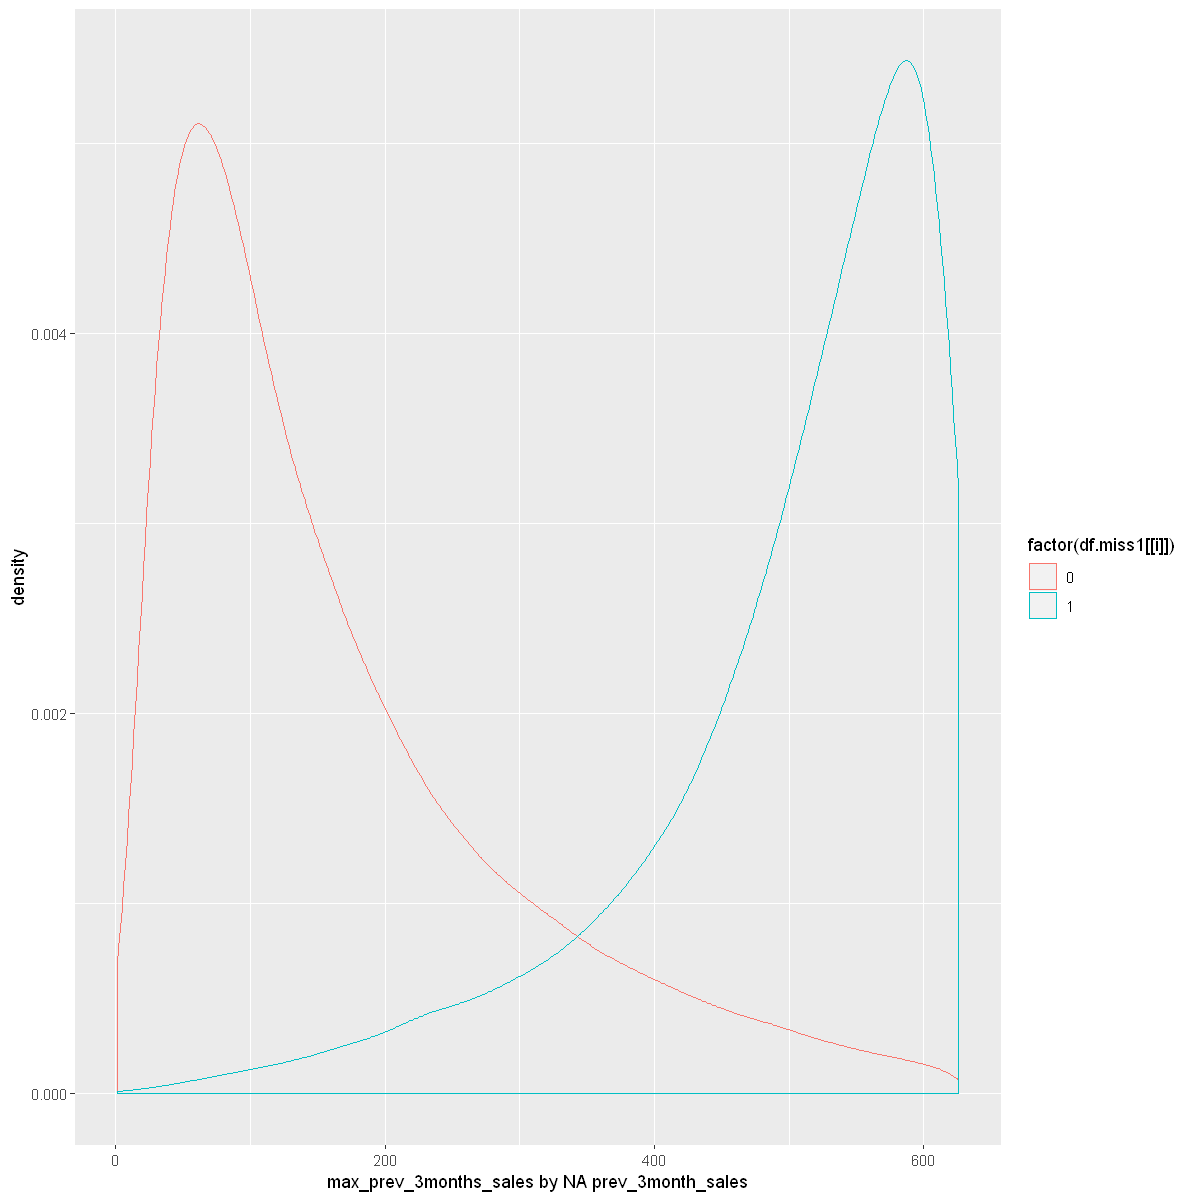


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -205.55, df = 165318, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13979.54 -13715.46
sample estimates:
mean of x mean of y 
  45477.6   59325.1 

[1] "total_month_transactions by NA prev_3month_sales"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."


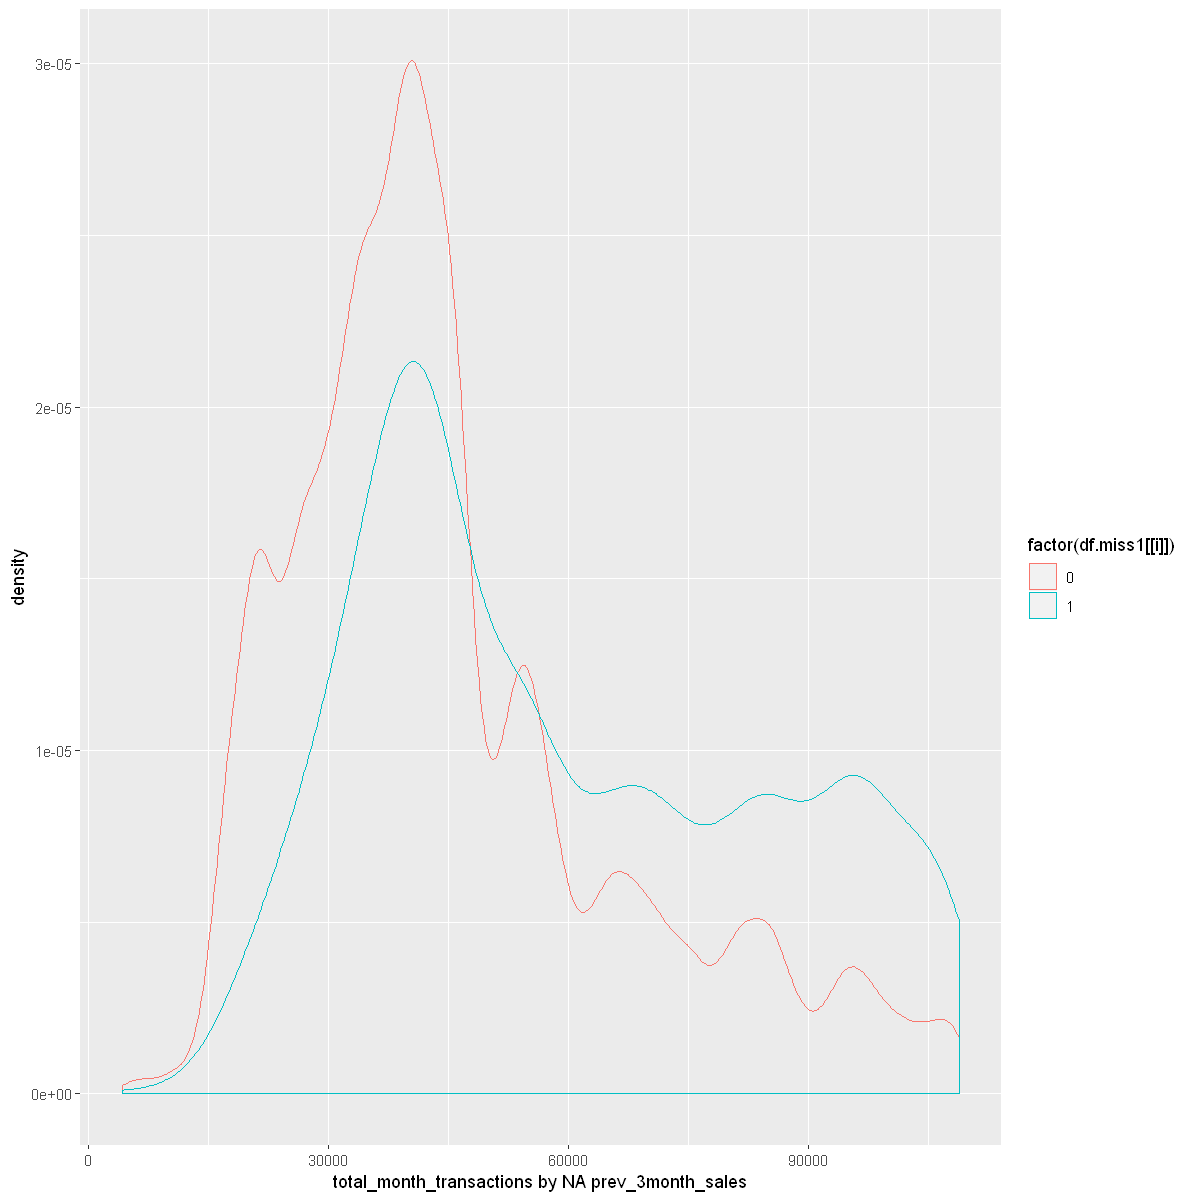


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -211.64, df = 167377, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14515.23 -14248.85
sample estimates:
mean of x mean of y 
 46168.55  60550.59 

[1] "prev_month_transactions by NA prev_3month_sales"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


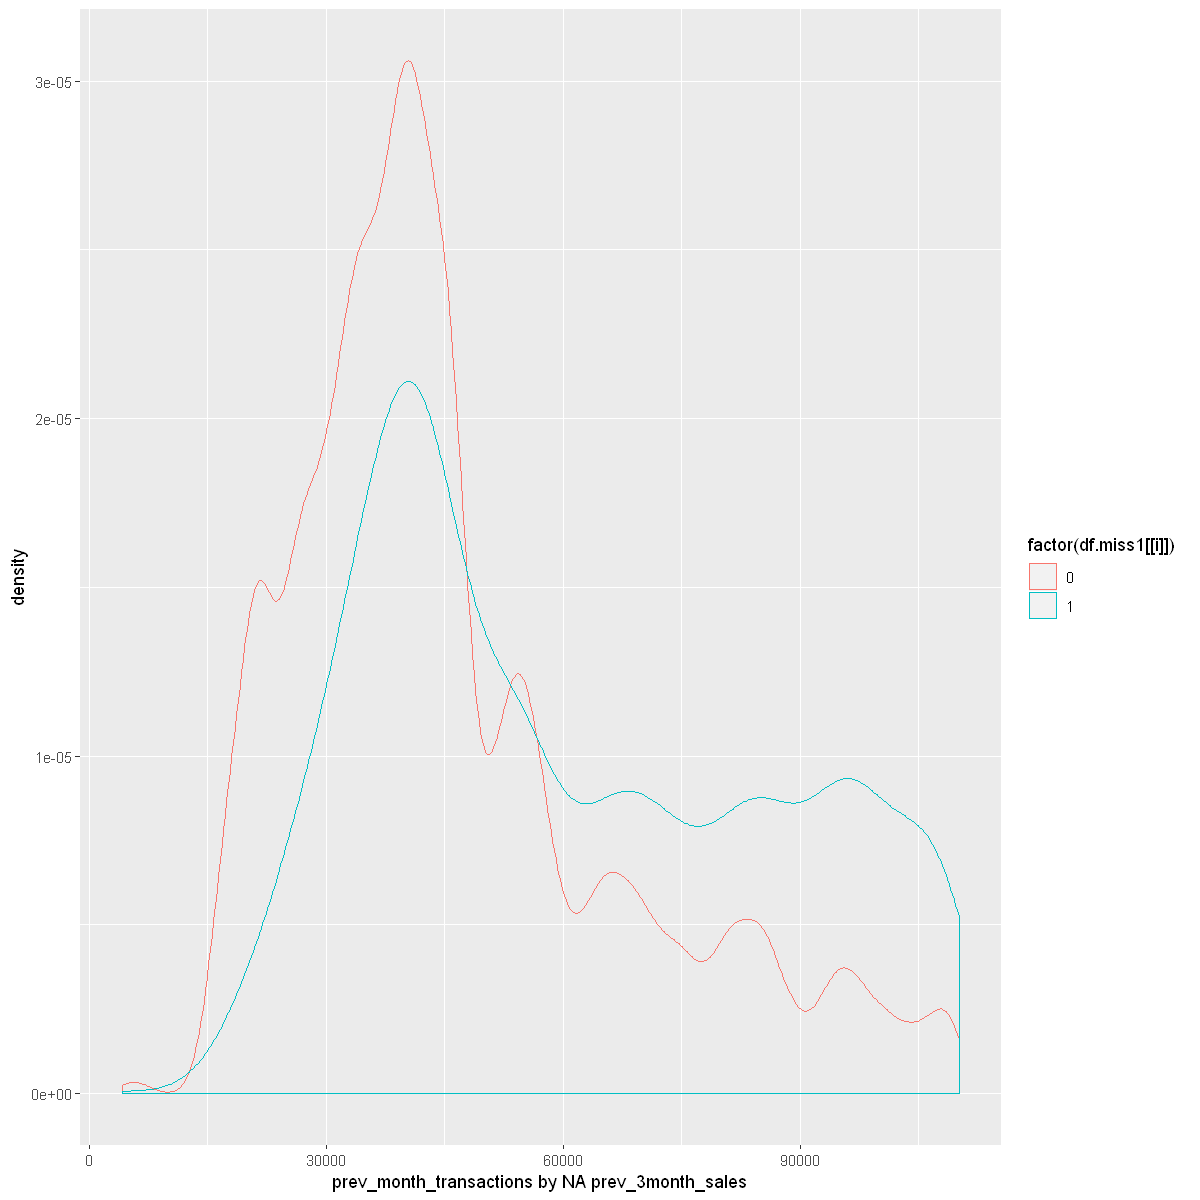


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -218.71, df = 168327, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15010.51 -14743.87
sample estimates:
mean of x mean of y 
 46209.82  61087.01 

[1] "prev_3month_transactions by NA prev_3month_sales"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


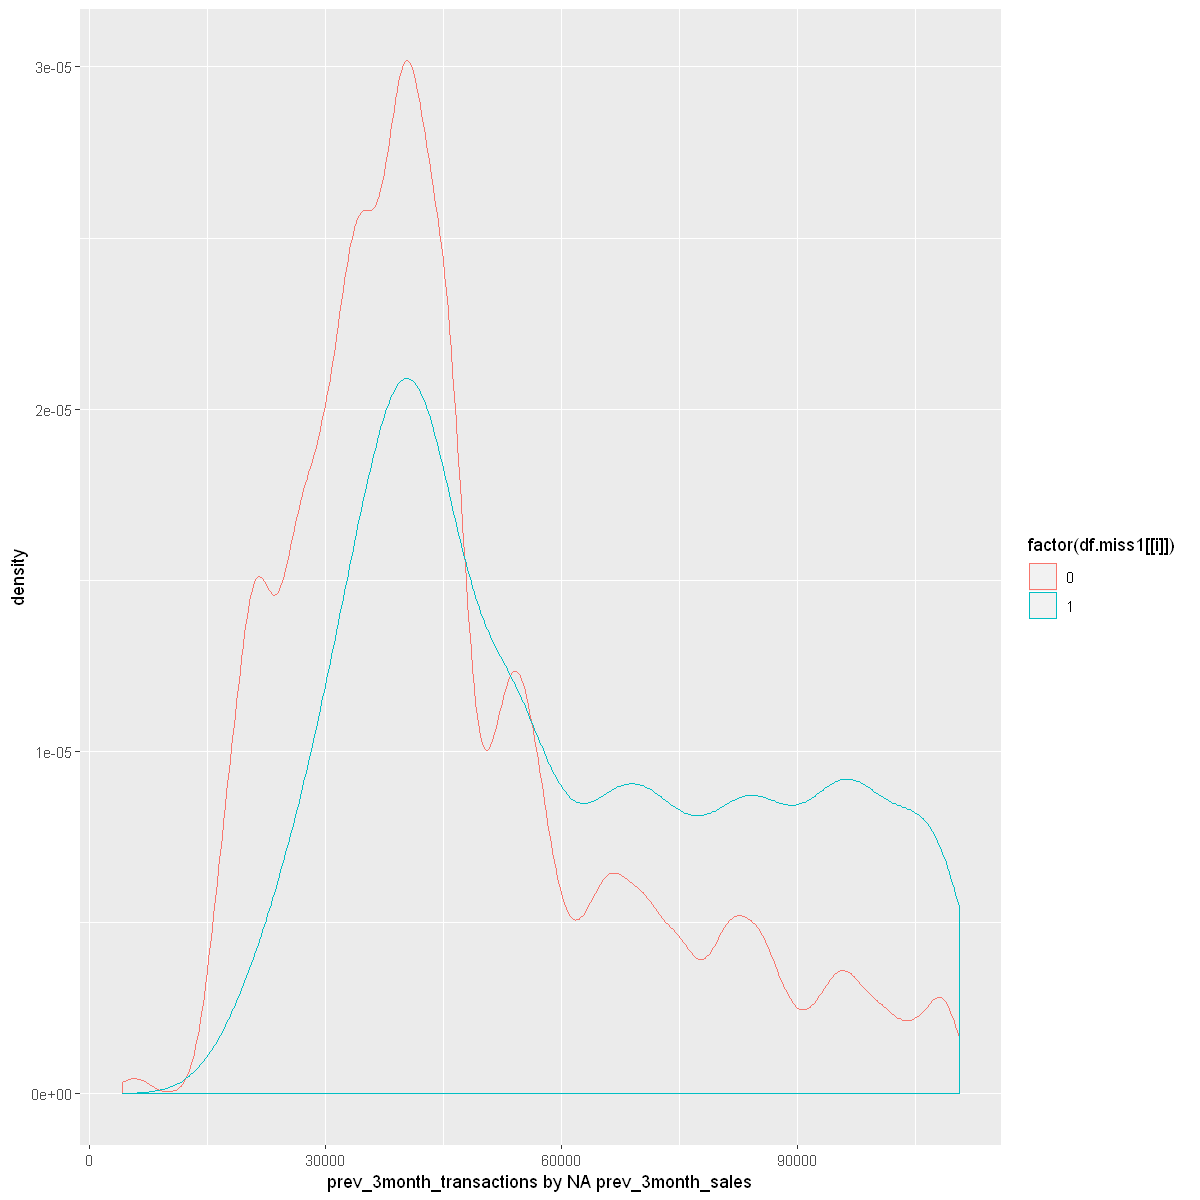


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -205.54, df = 163323, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13805.04 -13544.24
sample estimates:
mean of x mean of y 
 45697.13  59371.77 

[1] "avg_prev_3months_transactions by NA prev_3month_sales"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


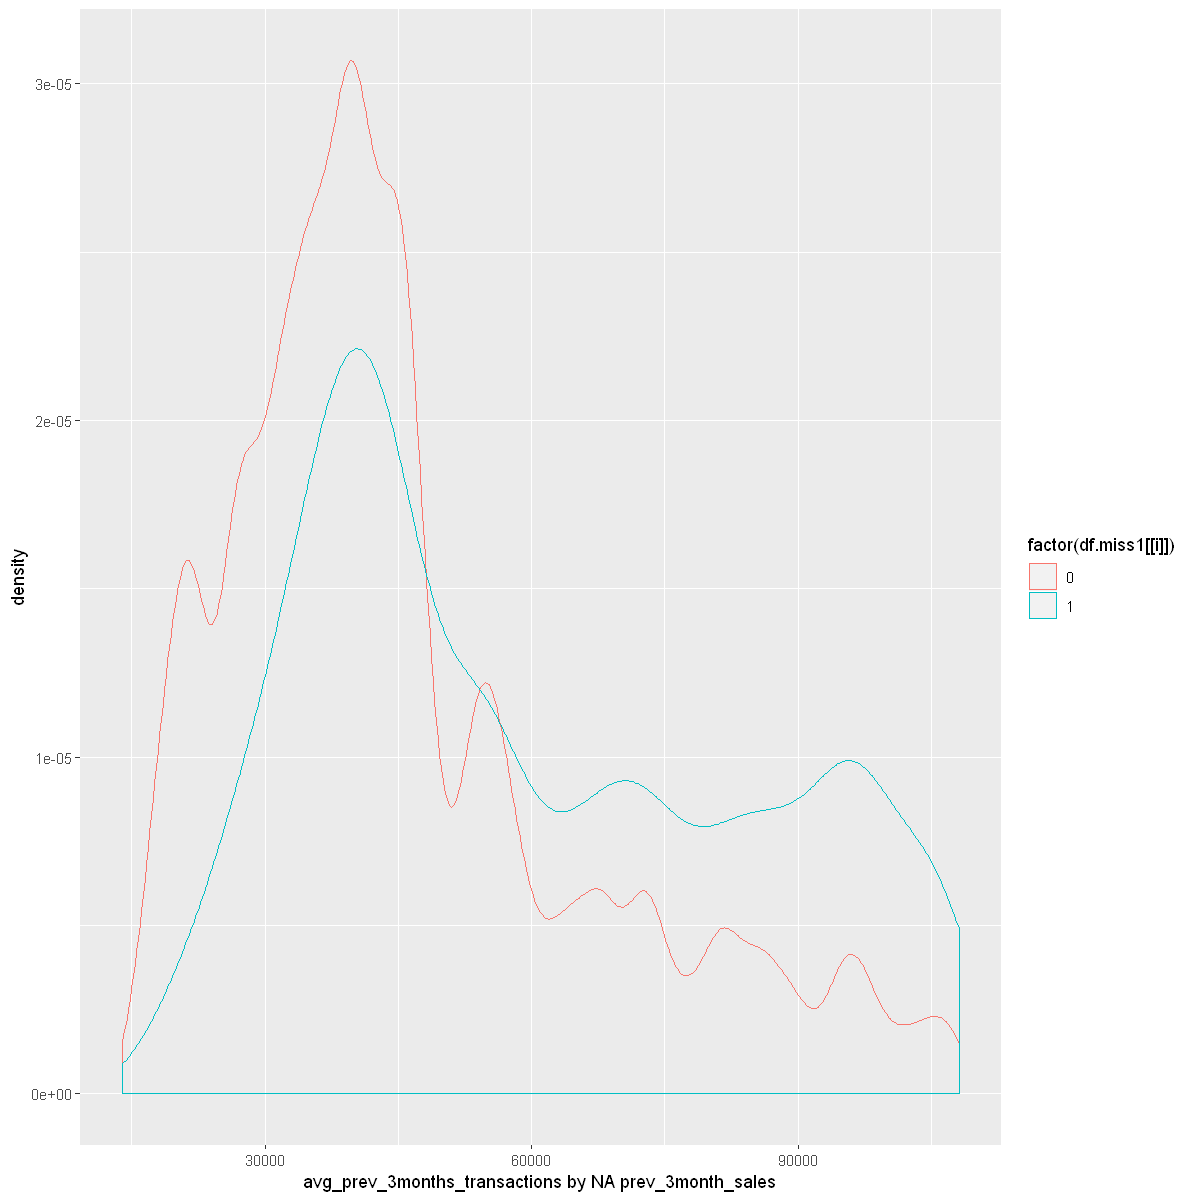


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -194.66, df = 159598, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12193.83 -11950.73
sample estimates:
mean of x mean of y 
 42650.42  54722.69 

[1] "min_prev_3months_transactions by NA prev_3month_sales"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


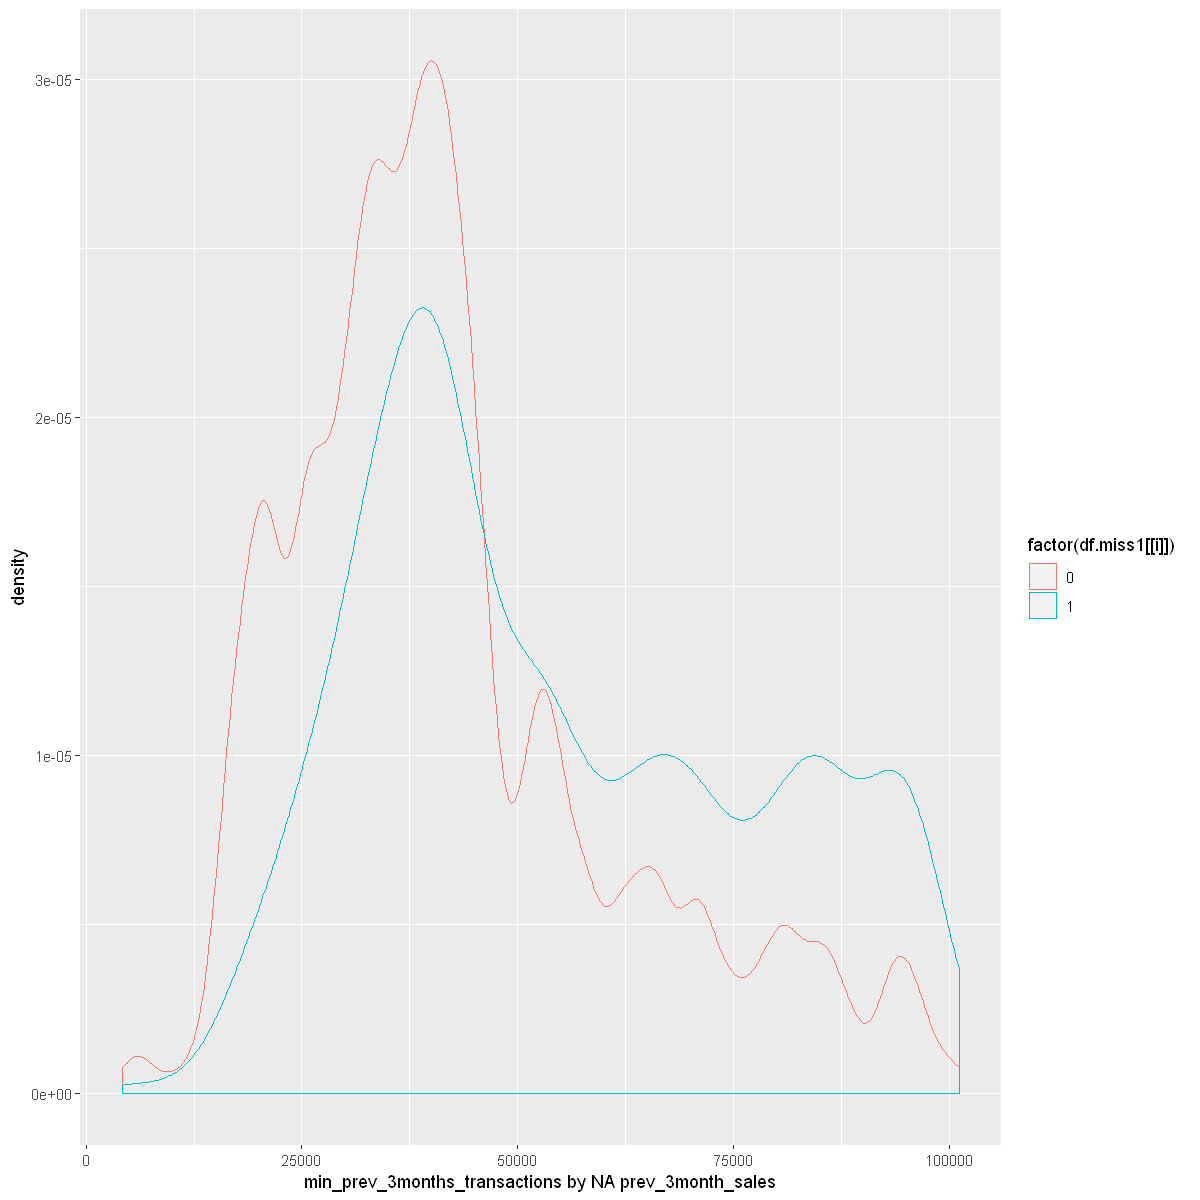


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -208.47, df = 164842, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14977.33 -14698.34
sample estimates:
mean of x mean of y 
 48574.50  63412.34 

[1] "max_prev_3months_transactions by NA prev_3month_sales"


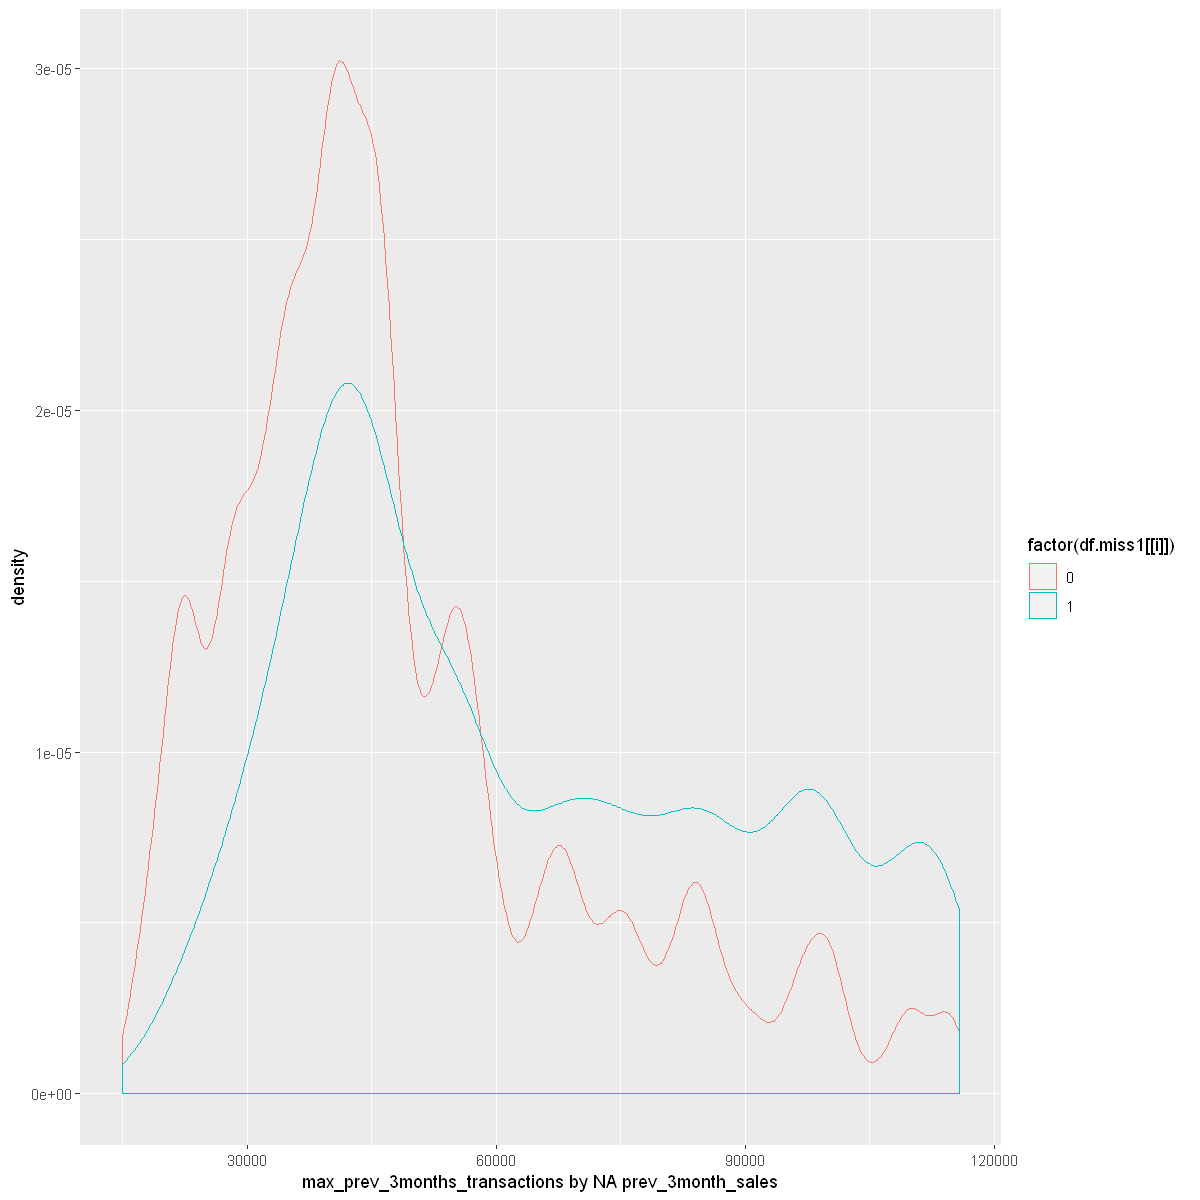


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -409.82, df = 182146, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -858.4366 -850.2646
sample estimates:
mean of x mean of y 
 147.1118 1001.4625 

[1] "total_unit_sales by NA prev_3month_sales"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


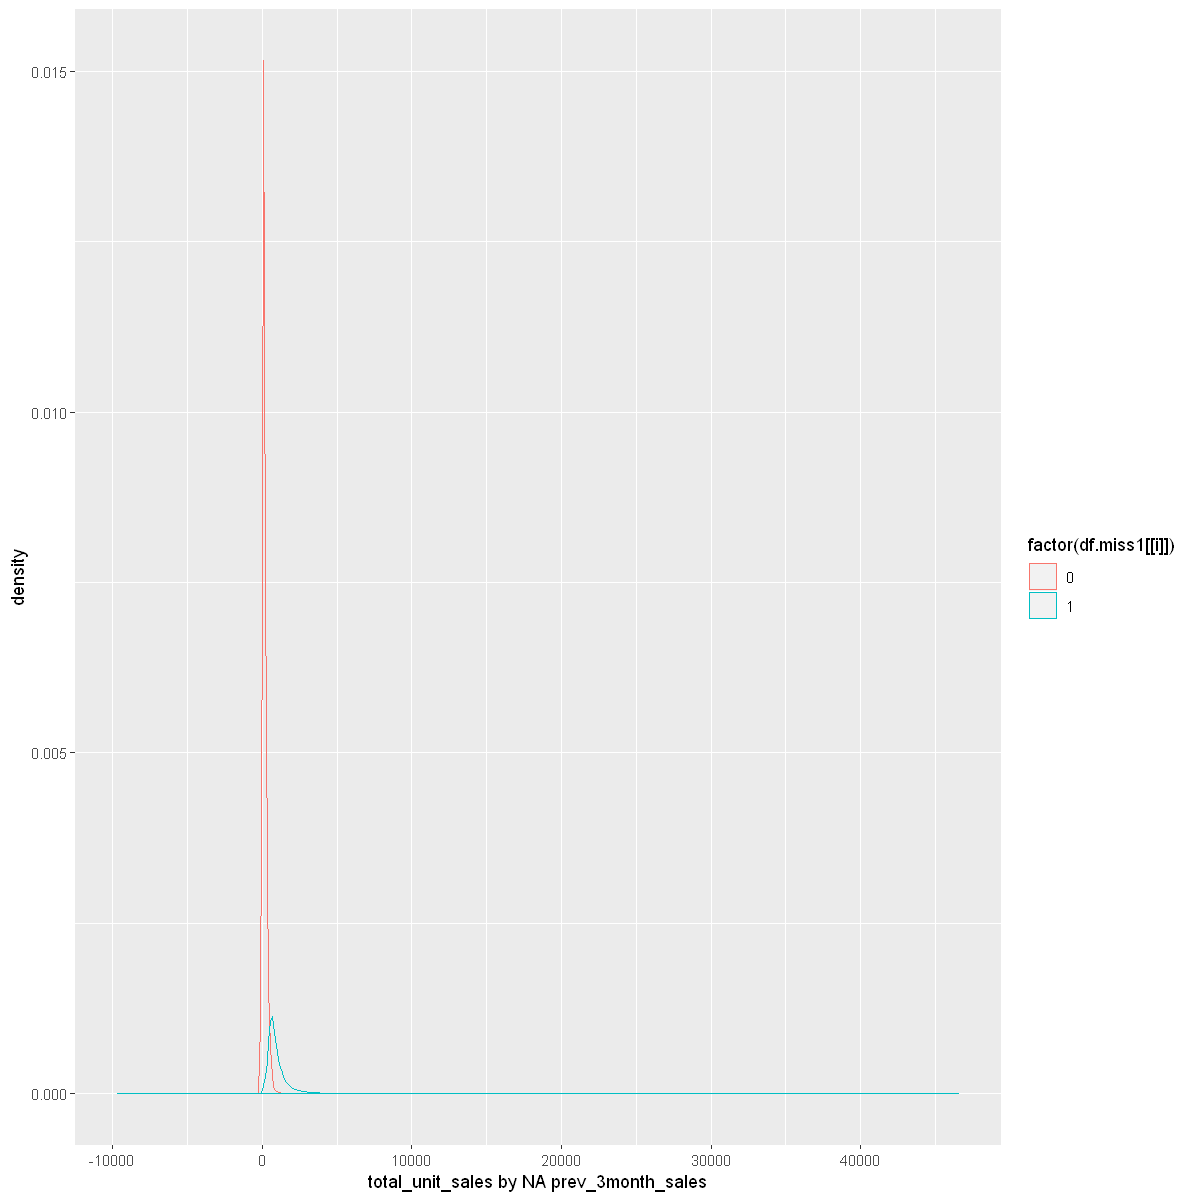


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -397.83, df = 17443, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -306.7053 -303.6978
sample estimates:
mean of x mean of y 
 138.5928  443.7944 

[1] "prev_month_sales by NA avg_prev_3months_sales"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -401.34, df = 31637, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -271.8761 -269.2335
sample estimates:
mean of x mean of y 
 137.4532  408.0081 

[1] "prev_3month_sales by NA avg_prev_3months_sales"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


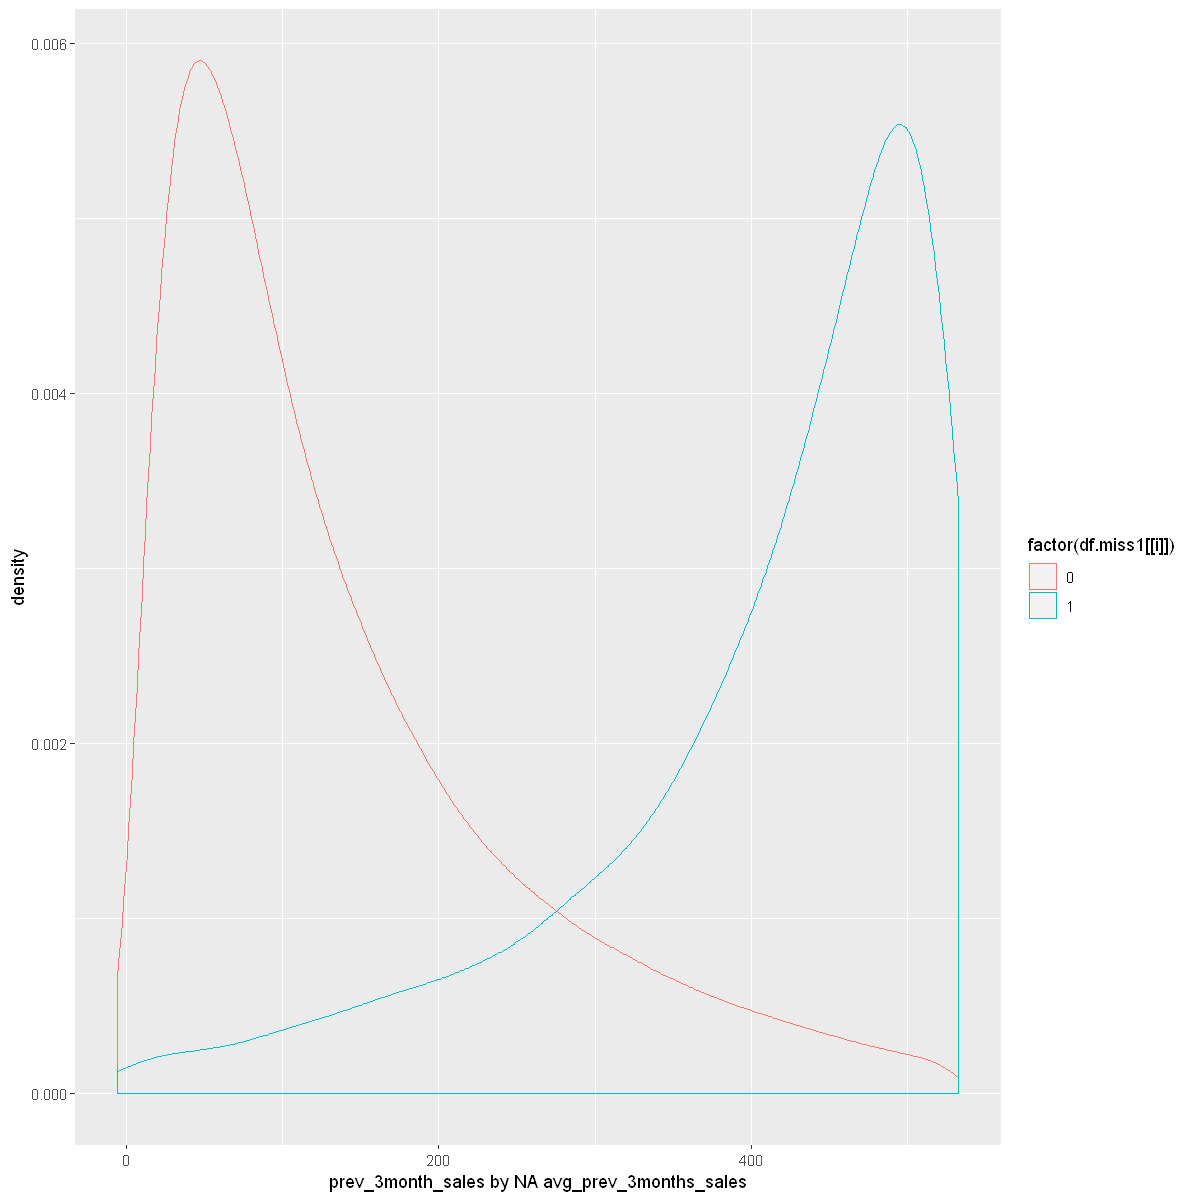


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -261.53, df = 17078, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -212.7679 -209.6024
sample estimates:
mean of x mean of y 
 111.4600  322.6452 

[1] "min_prev_3months_sales by NA avg_prev_3months_sales"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2105.4, df = 26289, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -426.6711 -425.8774
sample estimates:
mean of x mean of y 
 168.0746  594.3488 

[1] "max_prev_3months_sales by NA avg_prev_3months_sales"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -210.26, df = 165451, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14229.56 -13966.72
sample estimates:
mean of x mean of y 
 45458.02  59556.16 

[1] "total_month_transactions by NA avg_prev_3months_sales"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -214.45, df = 167442, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14660.23 -14394.68
sample estimates:
mean of x mean of y 
 46157.31  60684.76 

[1] "prev_month_transactions by NA avg_prev_3months_sales"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


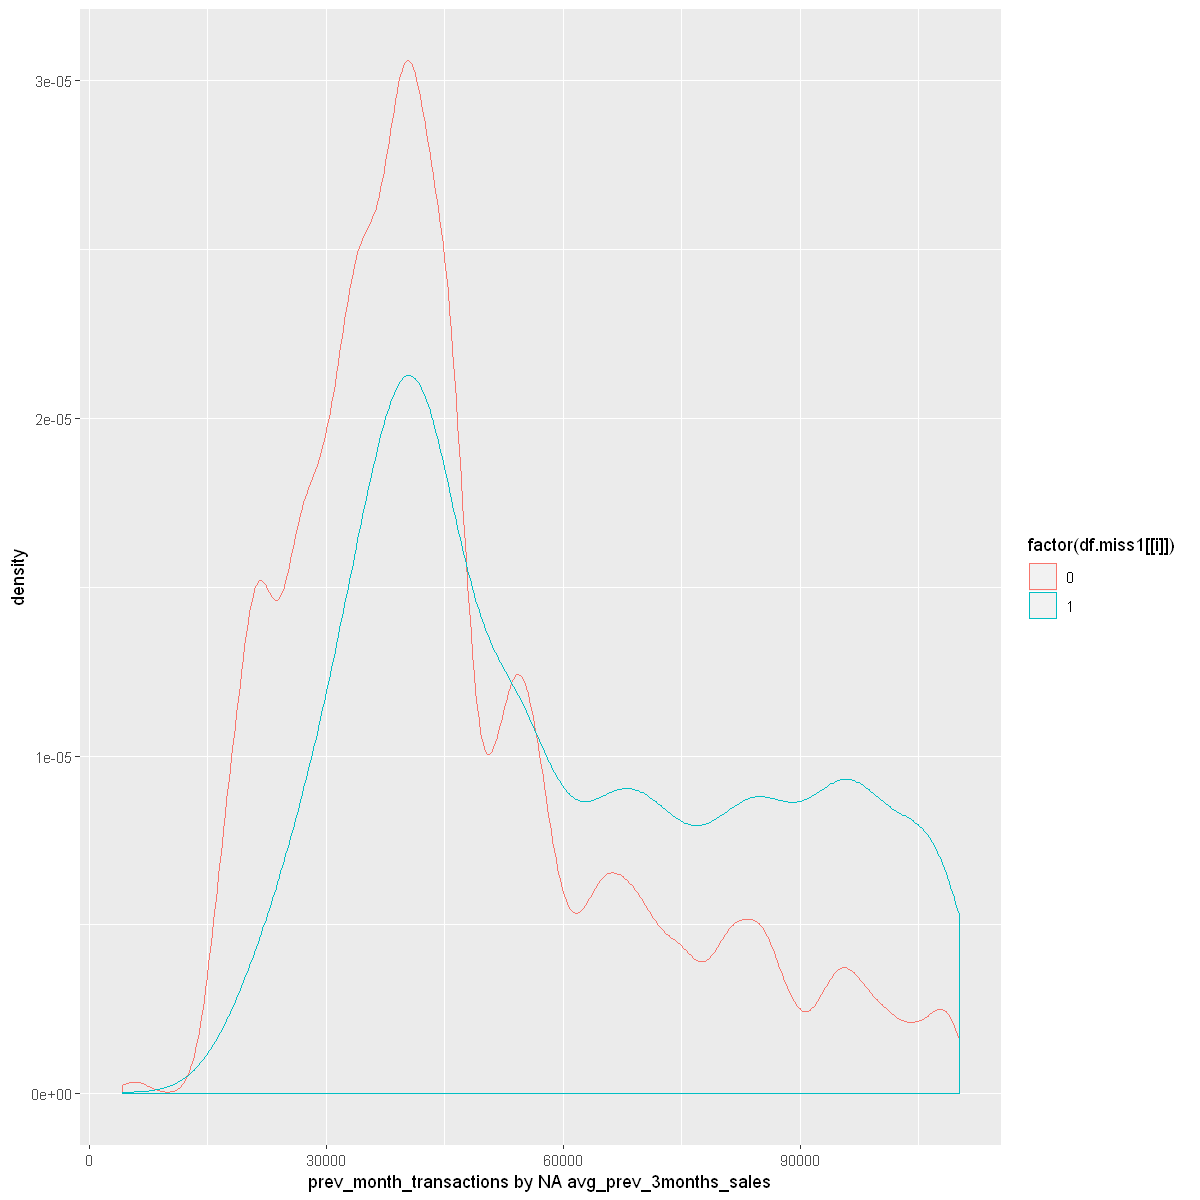


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -215.83, df = 169889, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14886.47 -14618.53
sample estimates:
mean of x mean of y 
 46207.18  60959.68 

[1] "prev_3month_transactions by NA avg_prev_3months_sales"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


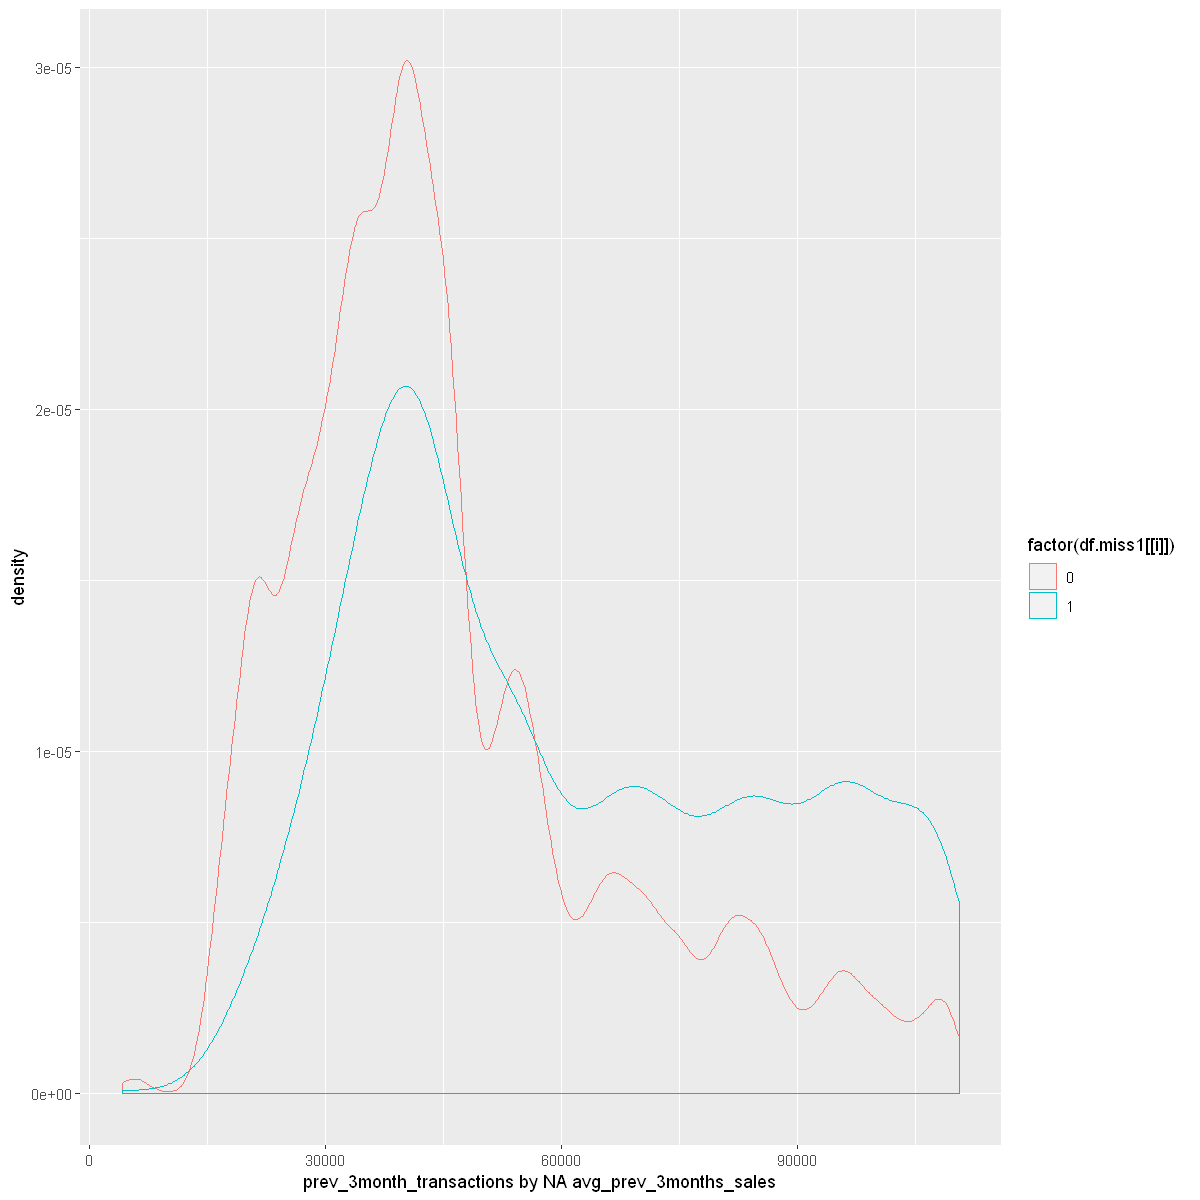


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -208.06, df = 163360, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13933.16 -13673.11
sample estimates:
mean of x mean of y 
 45687.50  59490.63 

[1] "avg_prev_3months_transactions by NA avg_prev_3months_sales"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


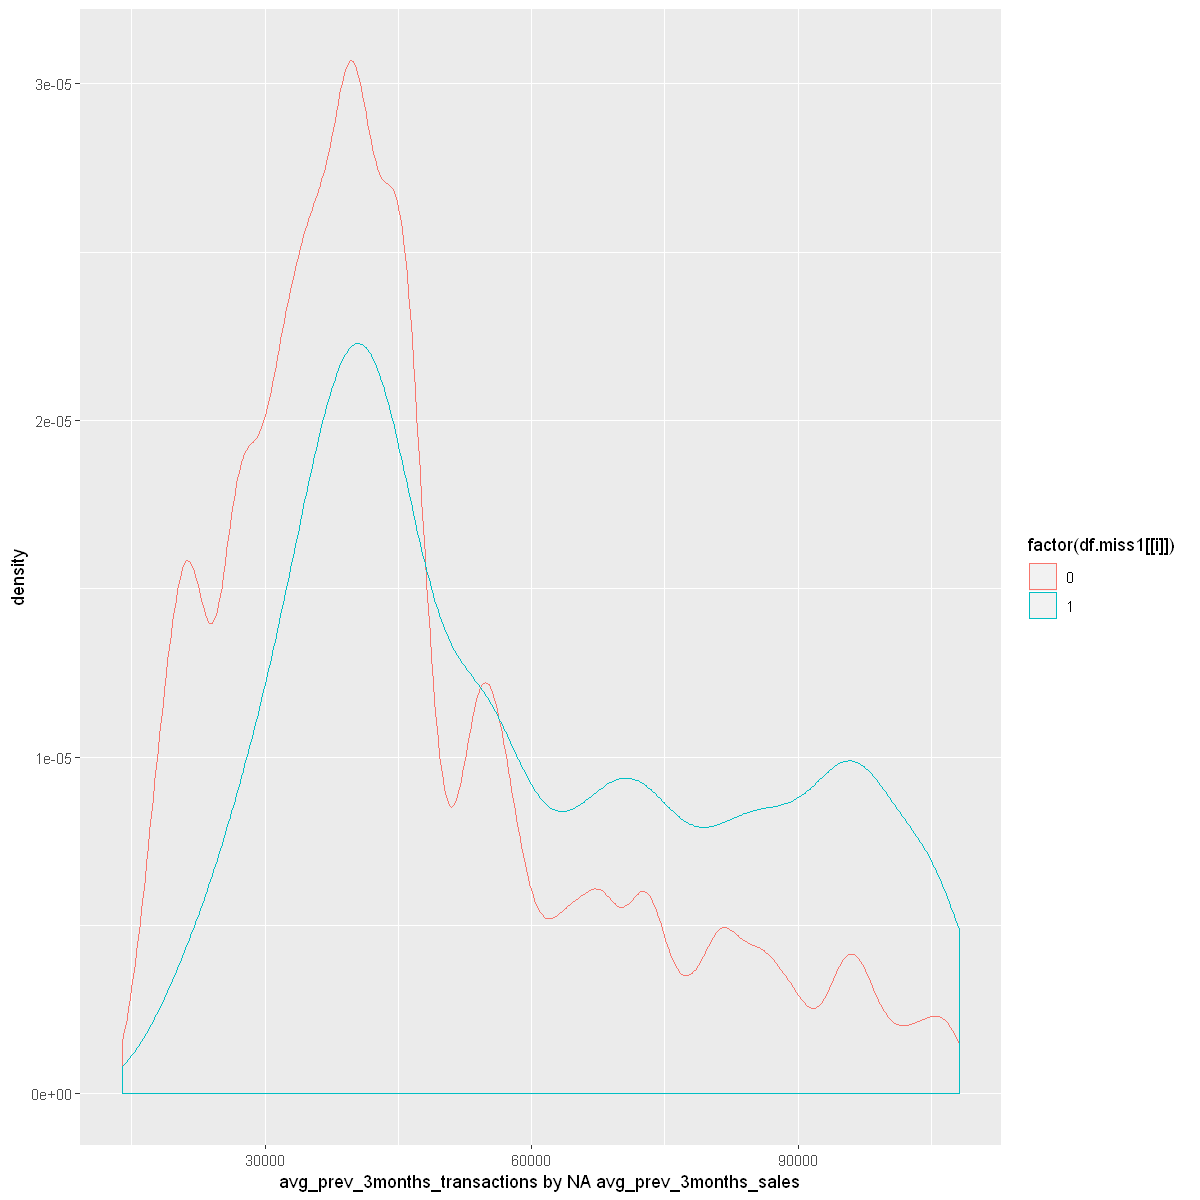


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -200.28, df = 159825, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12476.57 -12234.74
sample estimates:
mean of x mean of y 
 42628.32  54983.98 

[1] "min_prev_3months_transactions by NA avg_prev_3months_sales"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


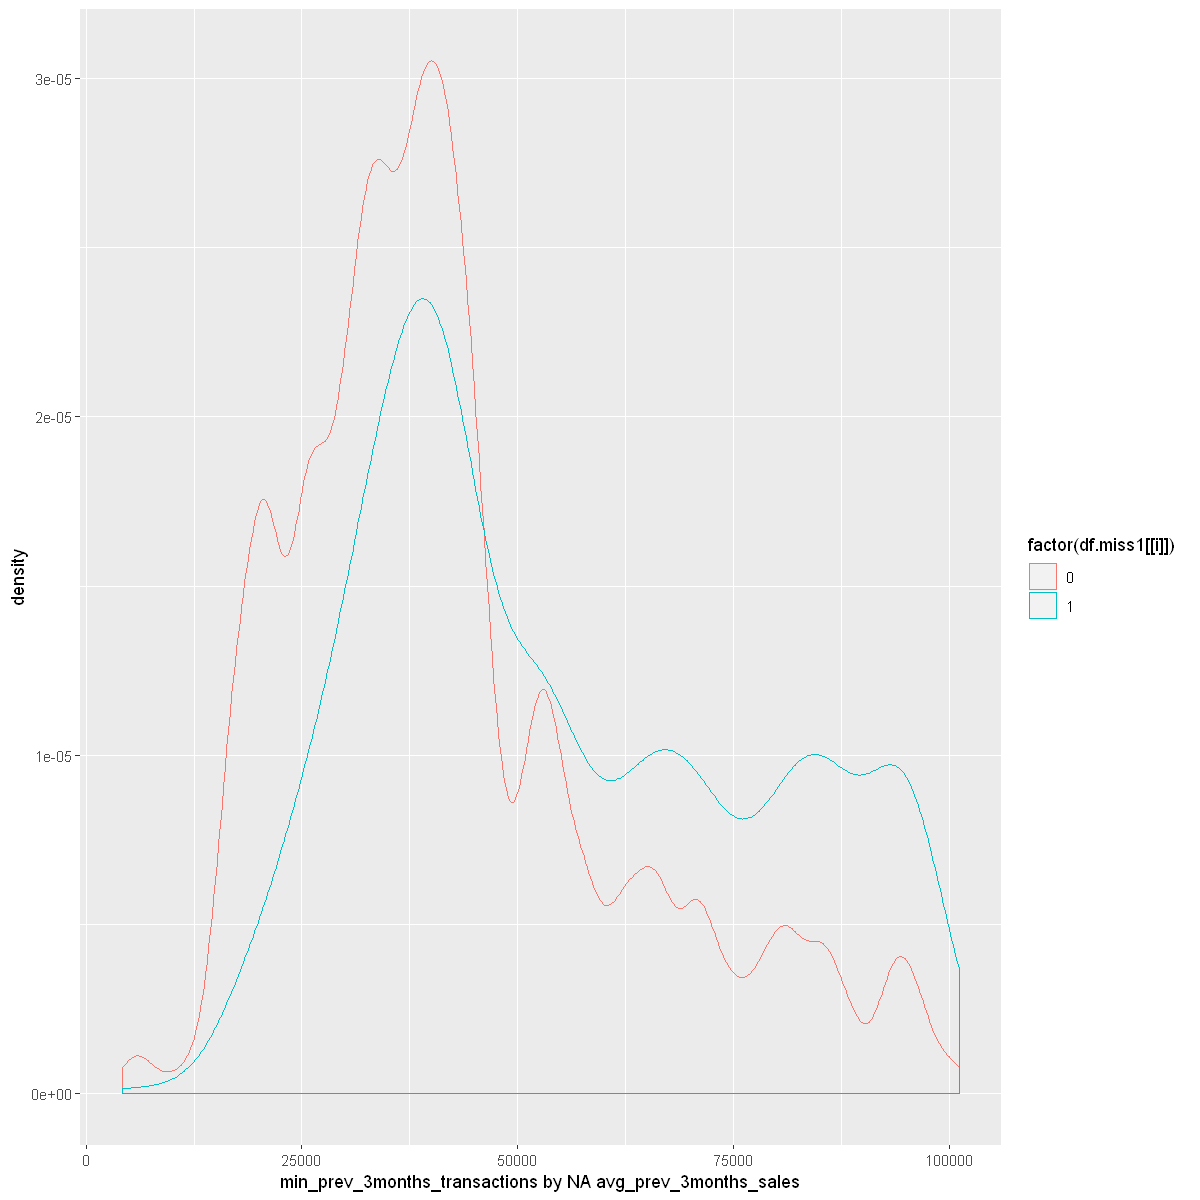


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -209.46, df = 164564, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15006.70 -14728.45
sample estimates:
mean of x mean of y 
 48574.99  63442.56 

[1] "max_prev_3months_transactions by NA avg_prev_3months_sales"


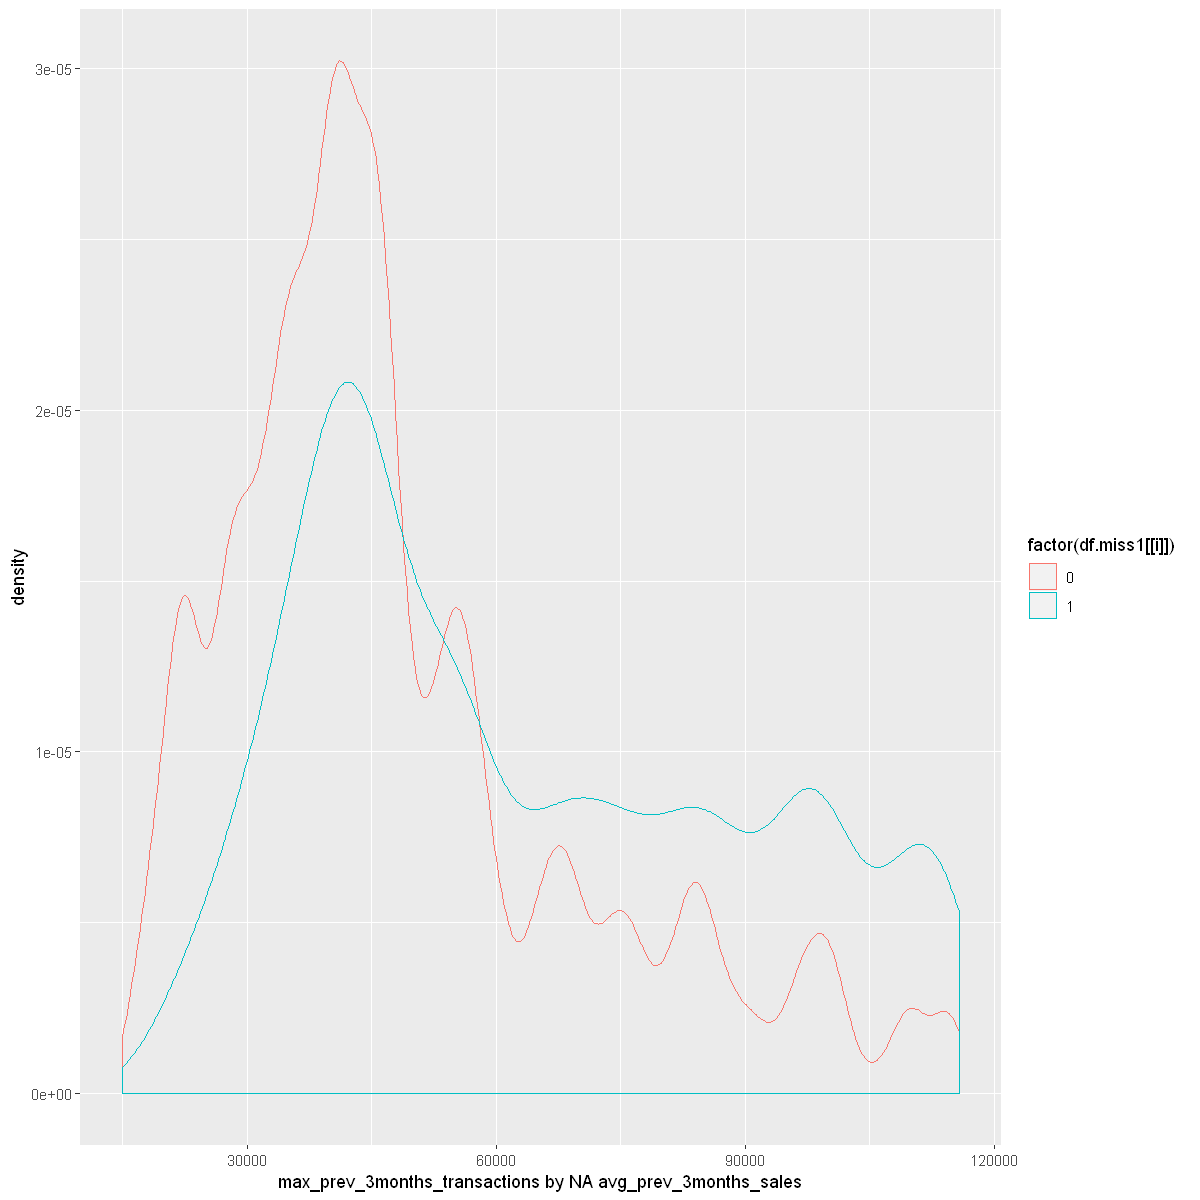


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -437.88, df = 182531, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -915.9602 -907.7970
sample estimates:
mean of x mean of y 
 141.4435 1053.3220 

[1] "total_unit_sales by NA avg_prev_3months_sales"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


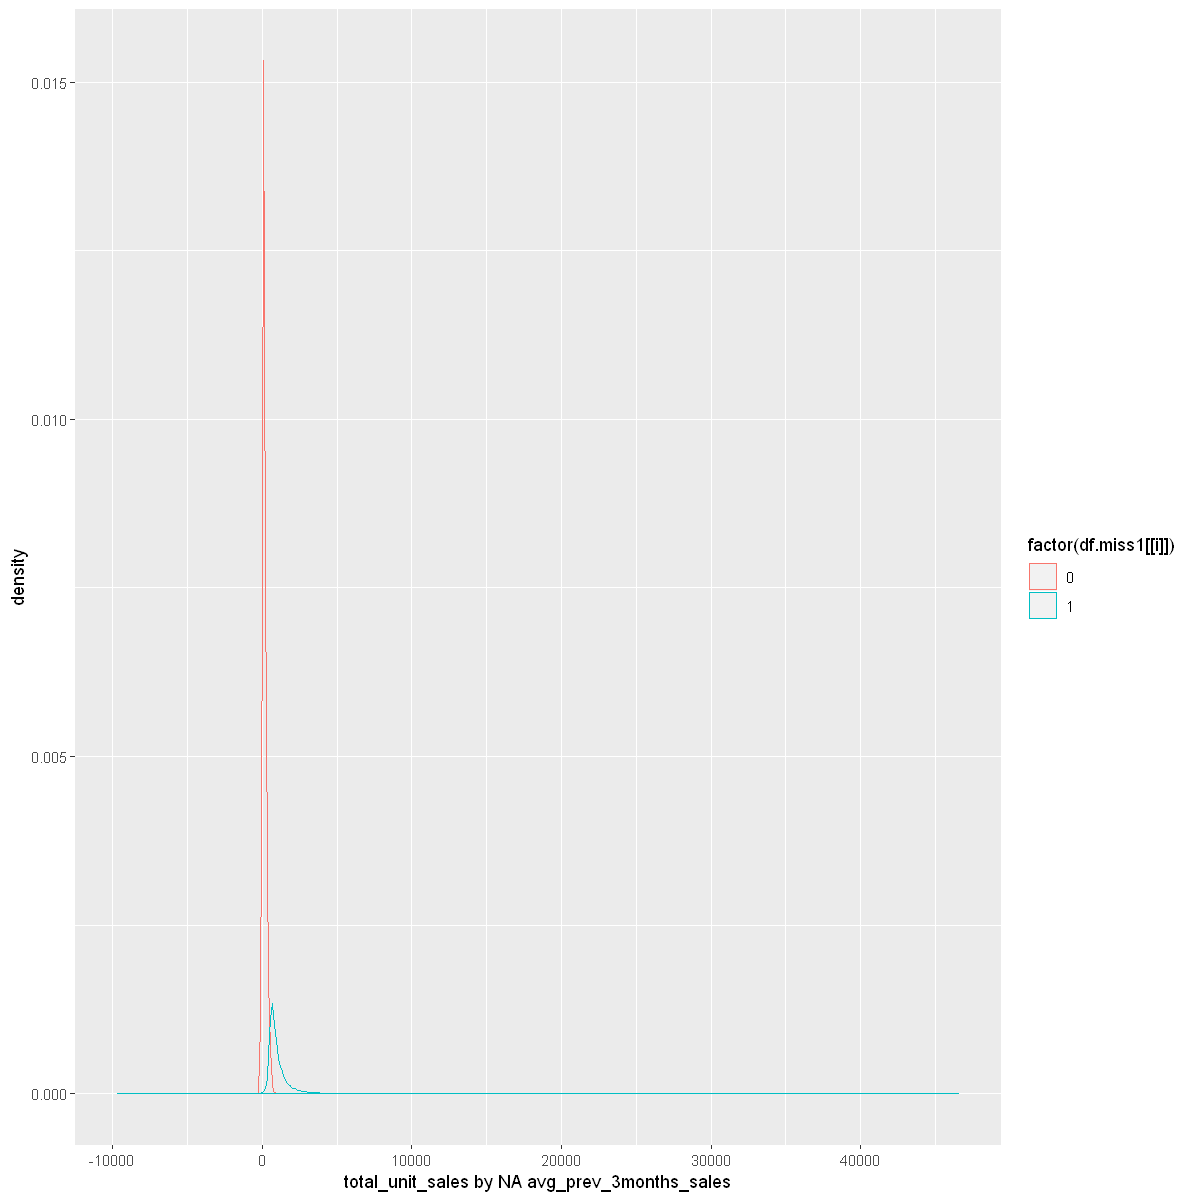


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1878.5, df = 39207, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -351.2086 -350.4765
sample estimates:
mean of x mean of y 
 136.5499  487.3925 

[1] "prev_month_sales by NA min_prev_3months_sales"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


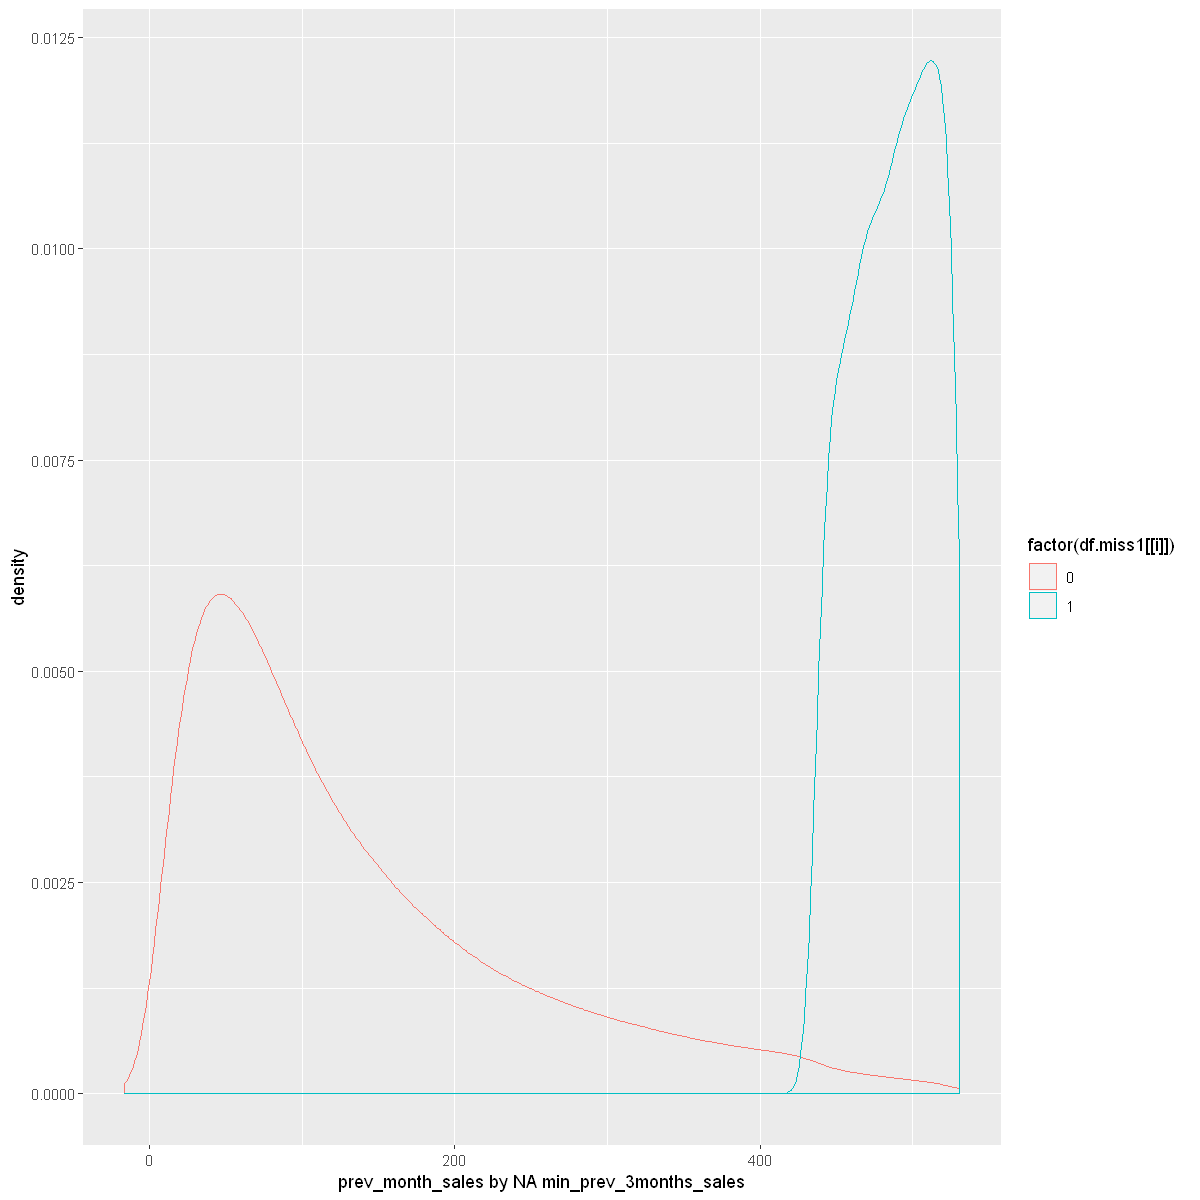


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -620.53, df = 35675, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -305.6277 -303.7030
sample estimates:
mean of x mean of y 
 136.3623  441.0276 

[1] "prev_3month_sales by NA min_prev_3months_sales"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


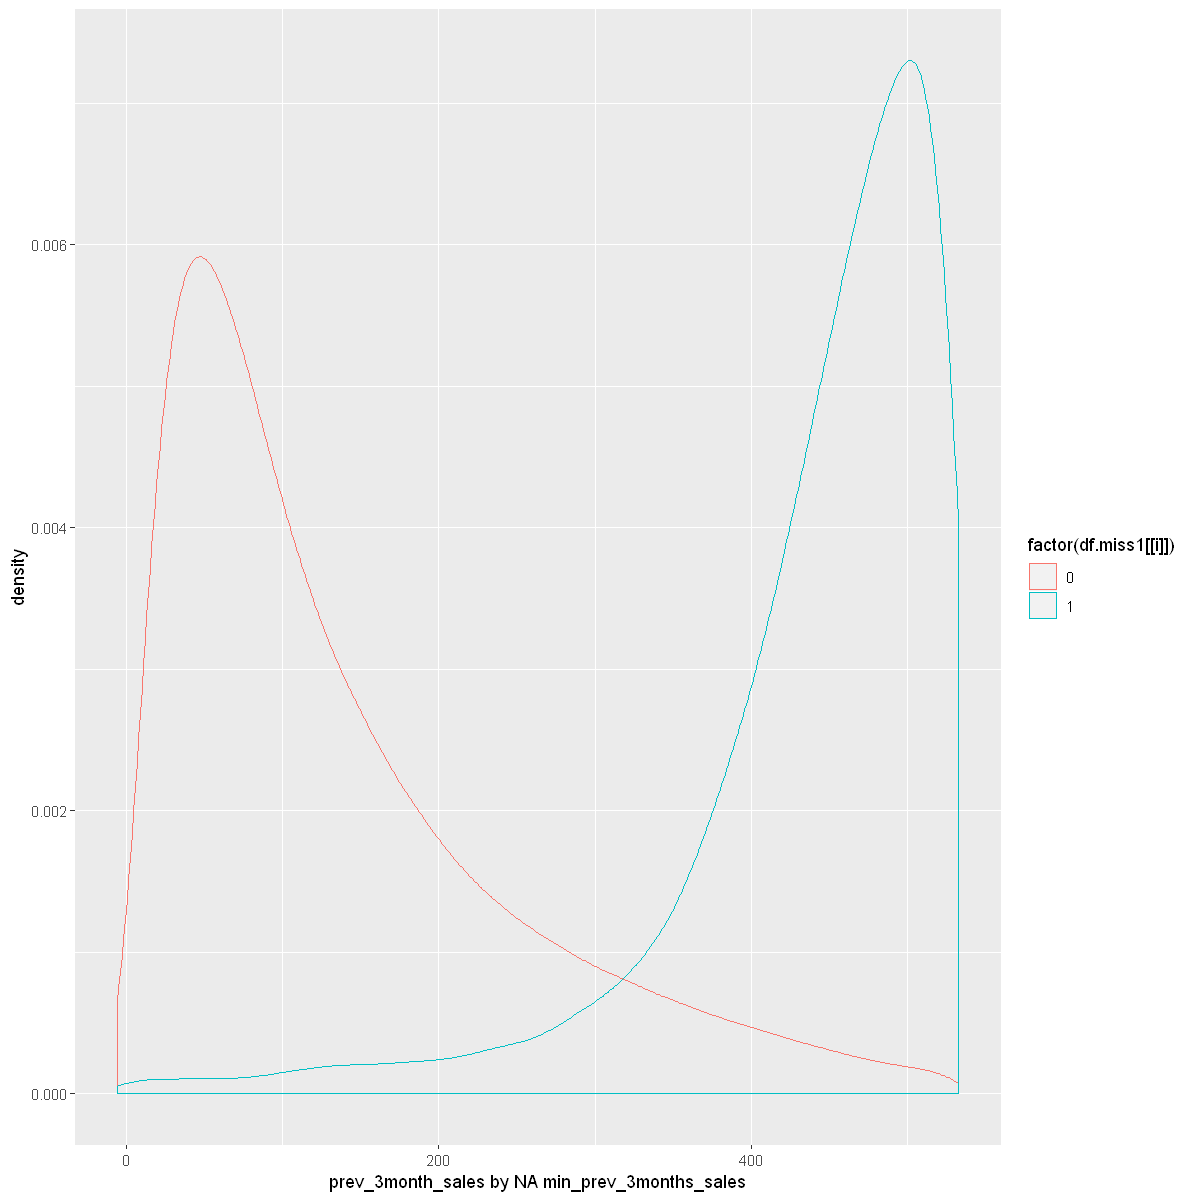


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2091.3, df = 30975, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -357.6377 -356.9680
sample estimates:
mean of x mean of y 
 139.0851  496.3880 

[1] "avg_prev_3months_sales by NA min_prev_3months_sales"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


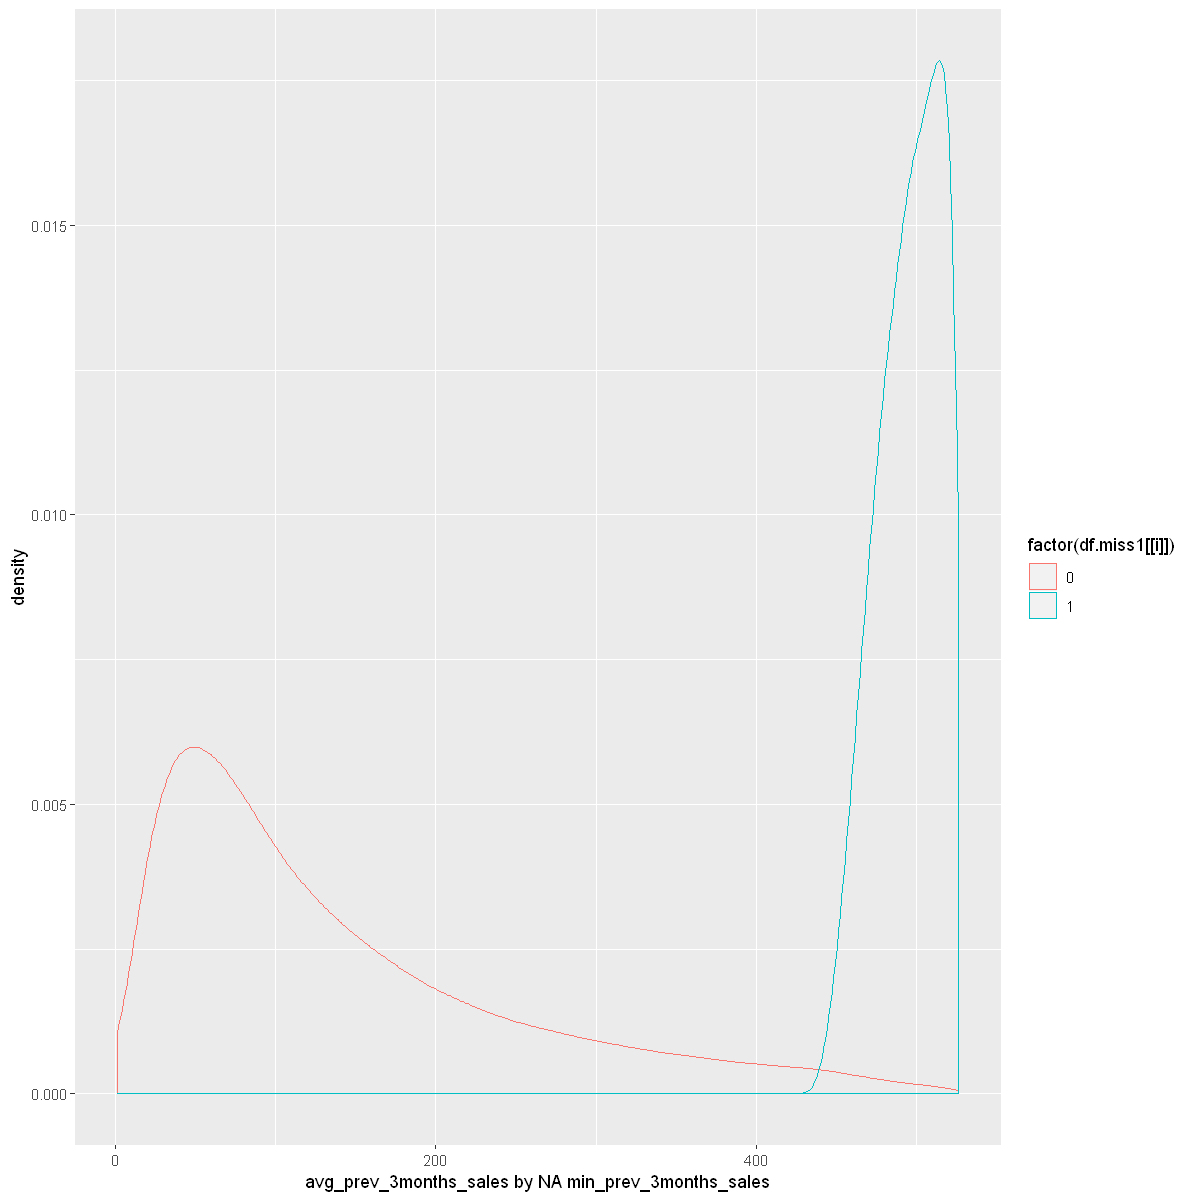


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1548.7, df = 44074, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -396.6365 -395.6338
sample estimates:
mean of x mean of y 
 164.5142  560.6494 

[1] "max_prev_3months_sales by NA min_prev_3months_sales"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


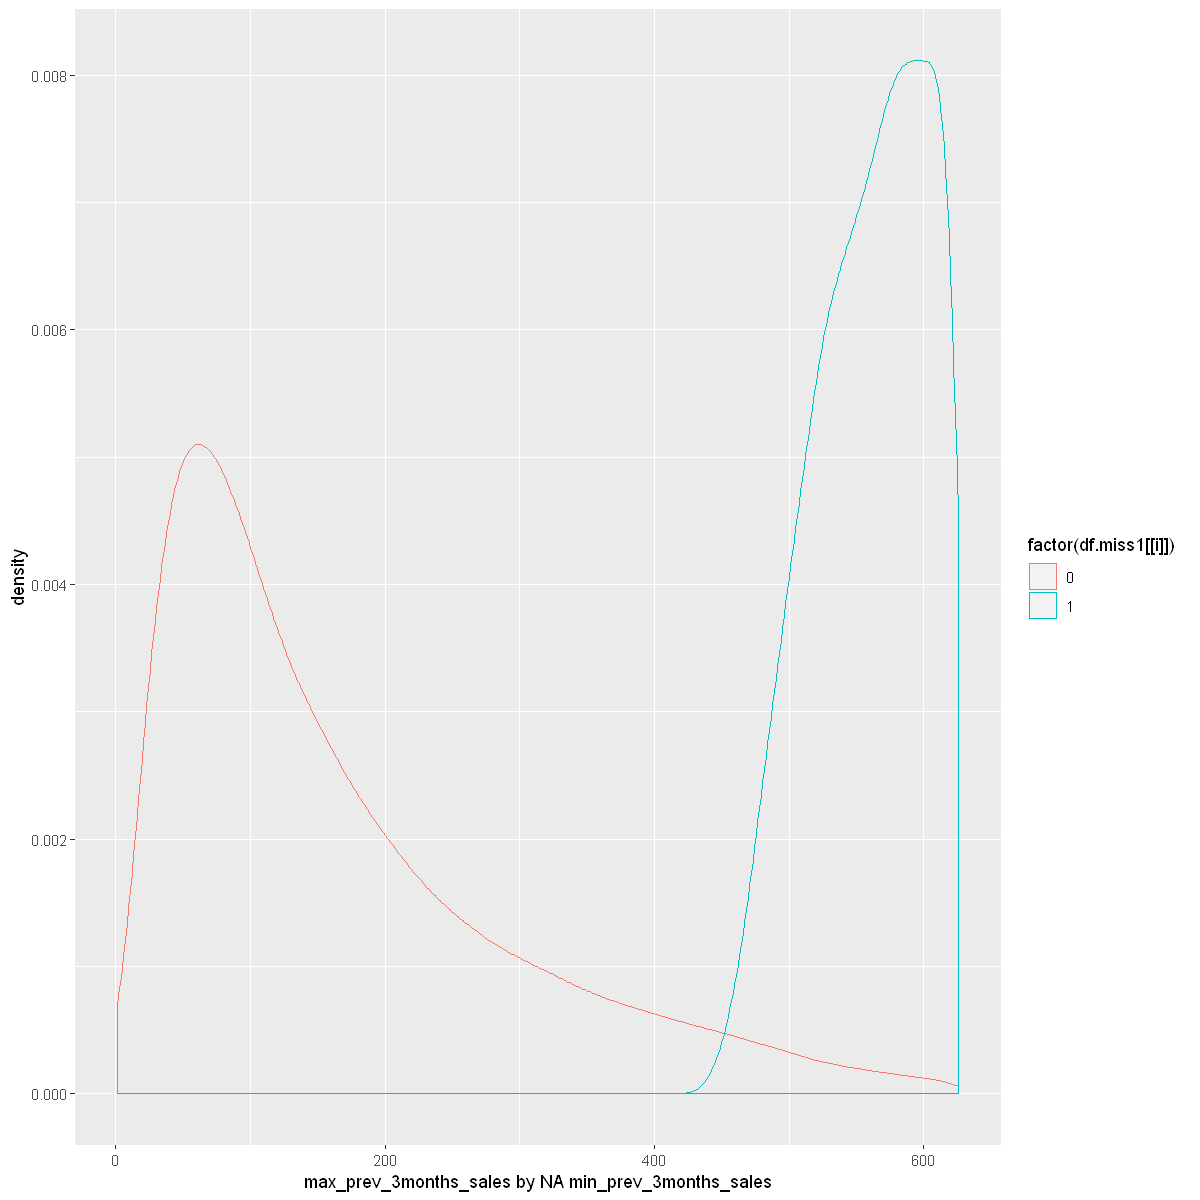


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -224.42, df = 166324, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15083.34 -14822.16
sample estimates:
mean of x mean of y 
 45385.13  60337.88 

[1] "total_month_transactions by NA min_prev_3months_sales"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."


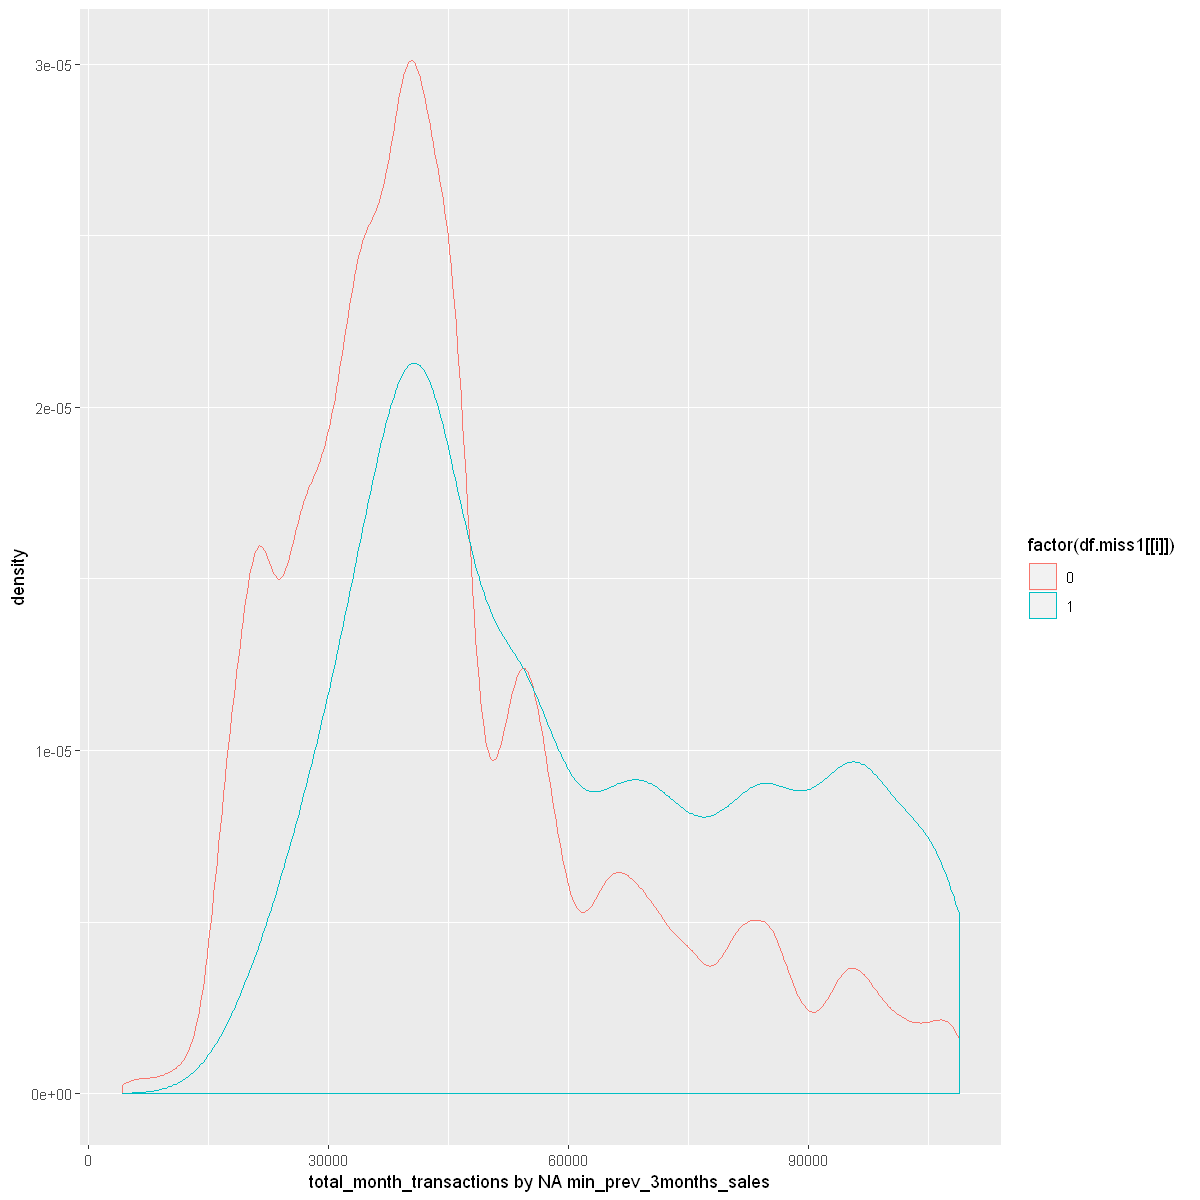


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -225.16, df = 168834, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15289.12 -15025.24
sample estimates:
mean of x mean of y 
 46098.16  61255.34 

[1] "prev_month_transactions by NA min_prev_3months_sales"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


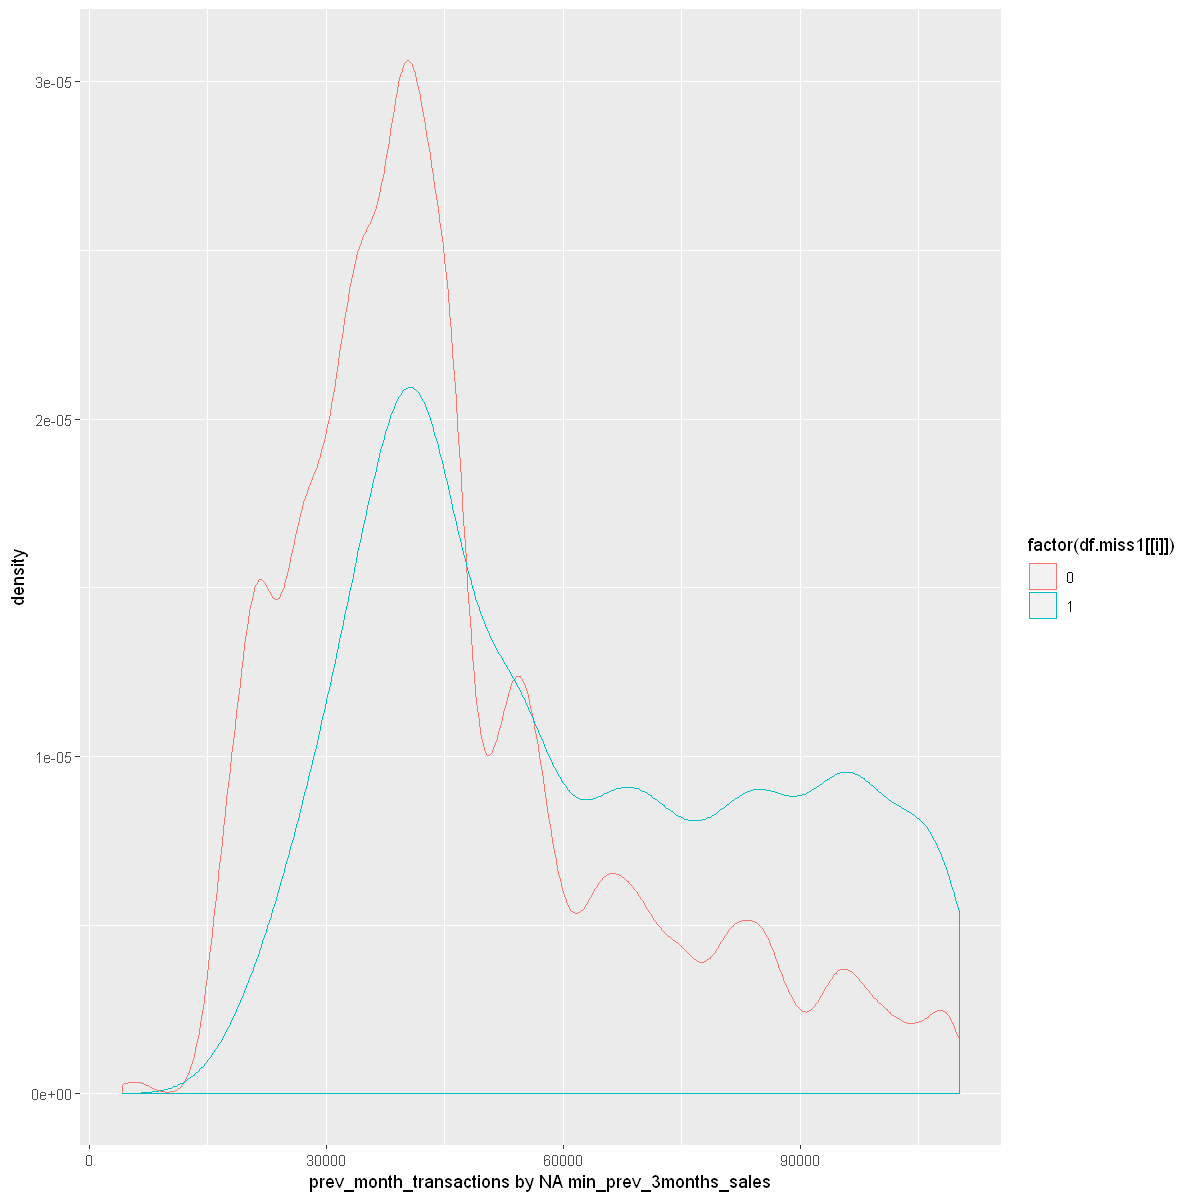


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -226.55, df = 171106, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15527.78 -15261.42
sample estimates:
mean of x mean of y 
  46147.5   61542.1 

[1] "prev_3month_transactions by NA min_prev_3months_sales"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


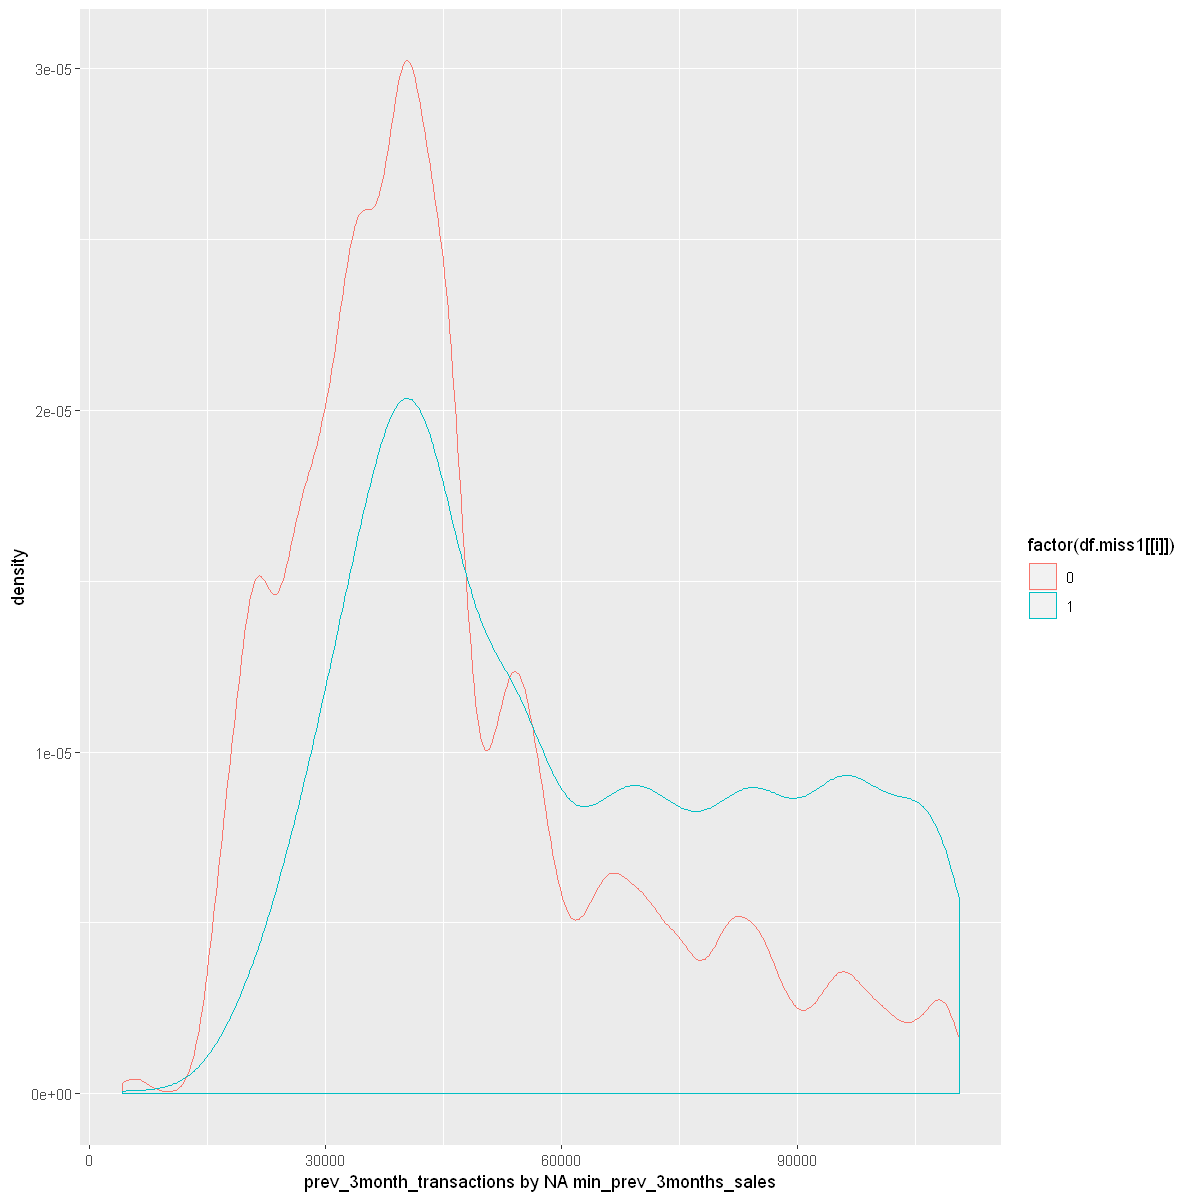


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -218.73, df = 164292, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14561.49 -14302.84
sample estimates:
mean of x mean of y 
 45632.56  60064.73 

[1] "avg_prev_3months_transactions by NA min_prev_3months_sales"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


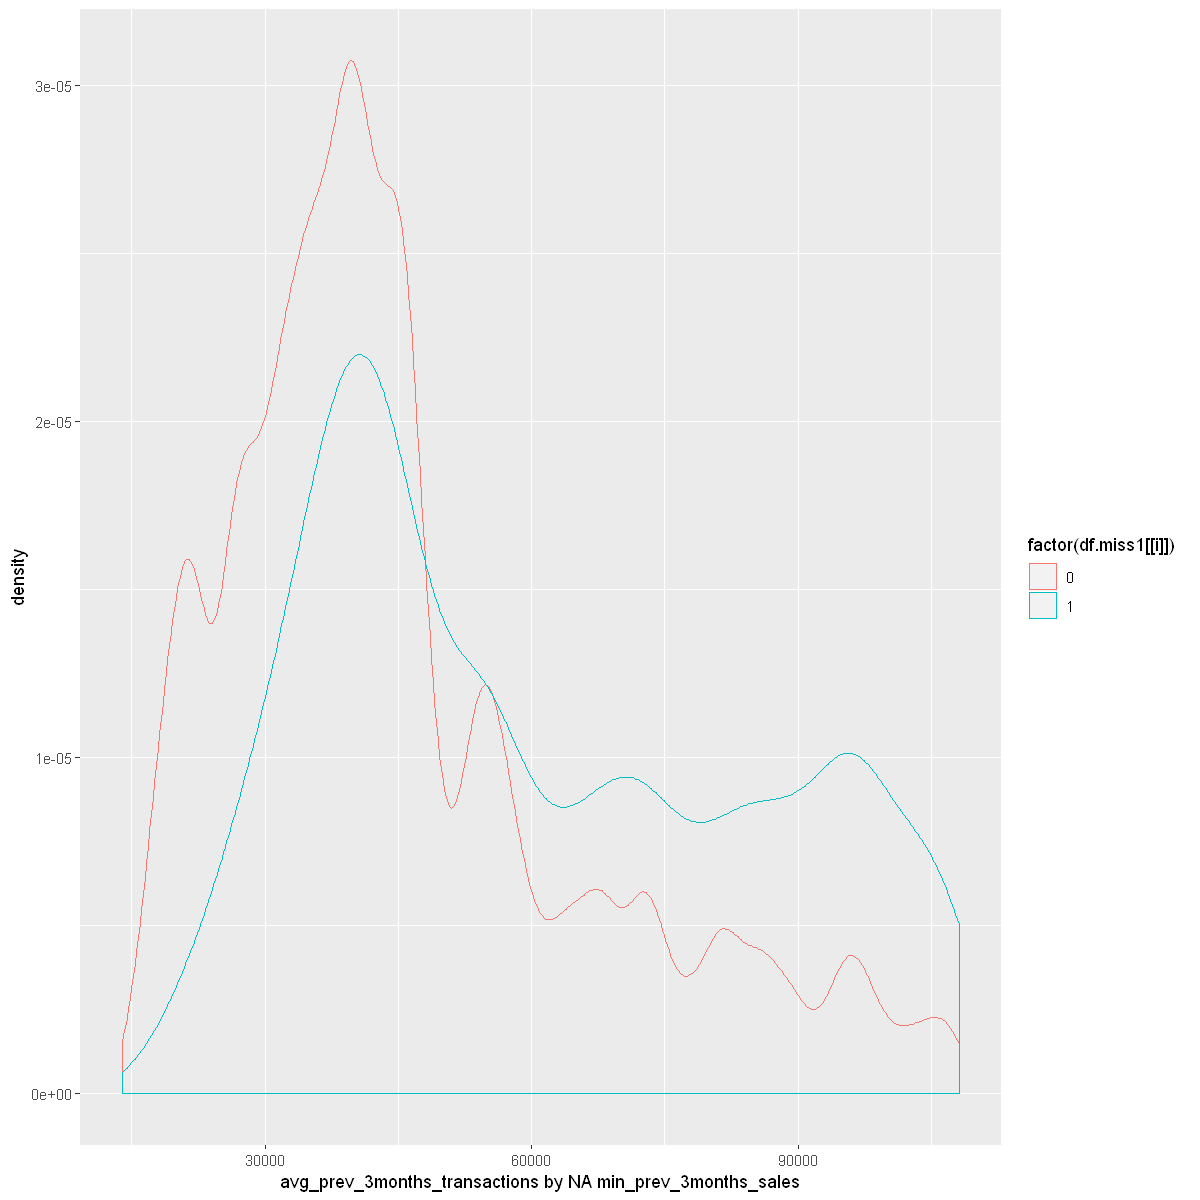


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -215.21, df = 160401, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13285.37 -13045.56
sample estimates:
mean of x mean of y 
 42563.77  55729.23 

[1] "min_prev_3months_transactions by NA min_prev_3months_sales"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


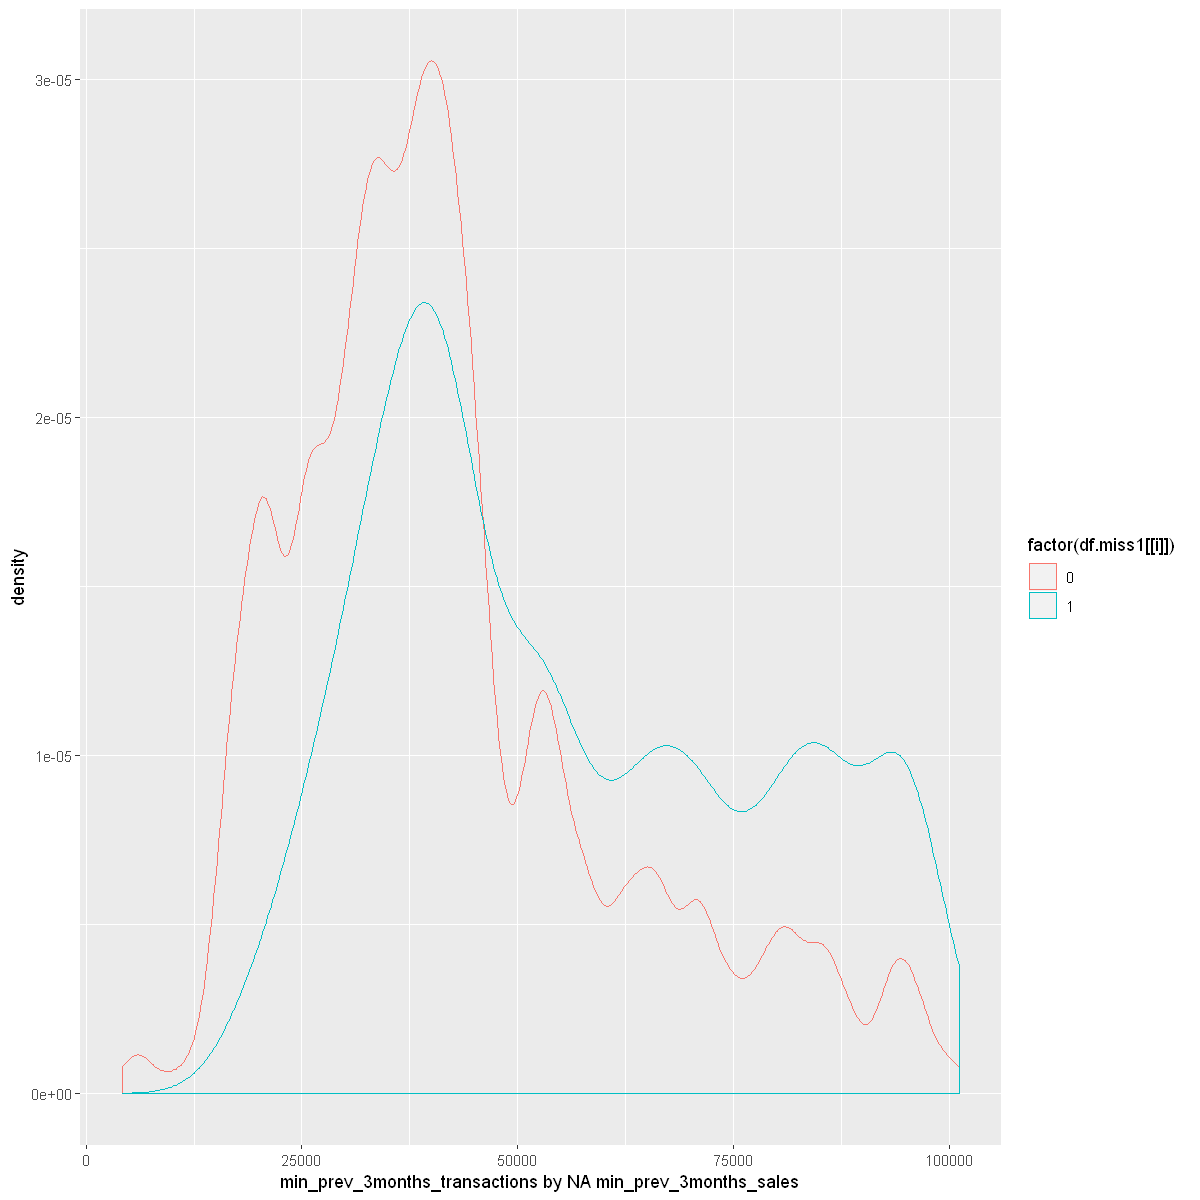


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -219.68, df = 166116, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15662.82 -15385.80
sample estimates:
mean of x mean of y 
 48512.01  64036.32 

[1] "max_prev_3months_transactions by NA min_prev_3months_sales"


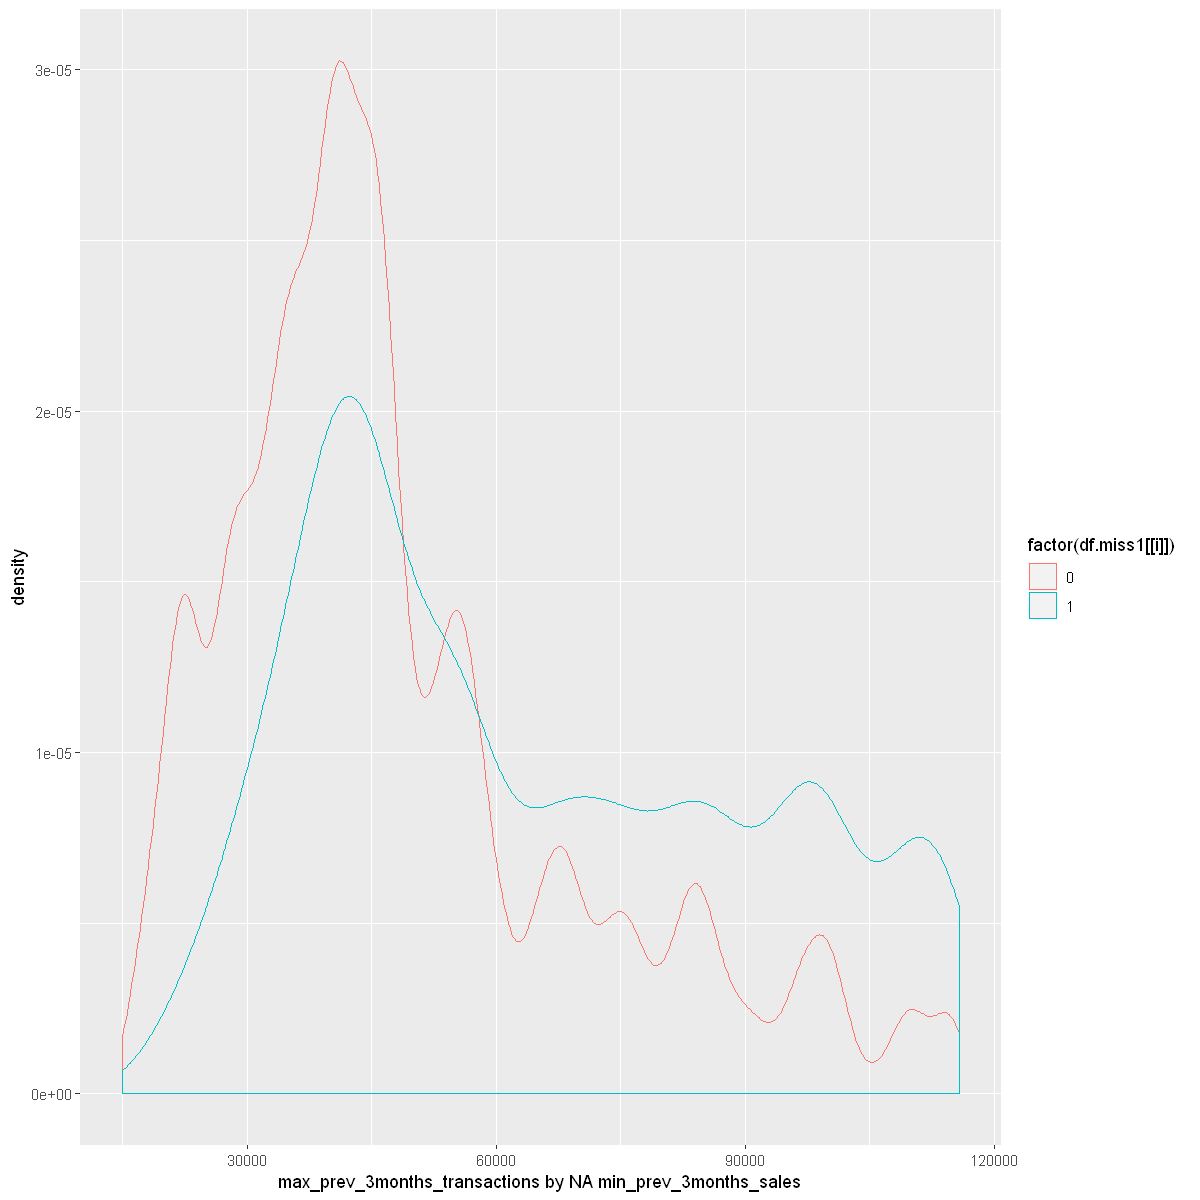


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -441.63, df = 184208, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -893.7794 -885.8813
sample estimates:
mean of x mean of y 
 142.9104 1032.7407 

[1] "total_unit_sales by NA min_prev_3months_sales"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


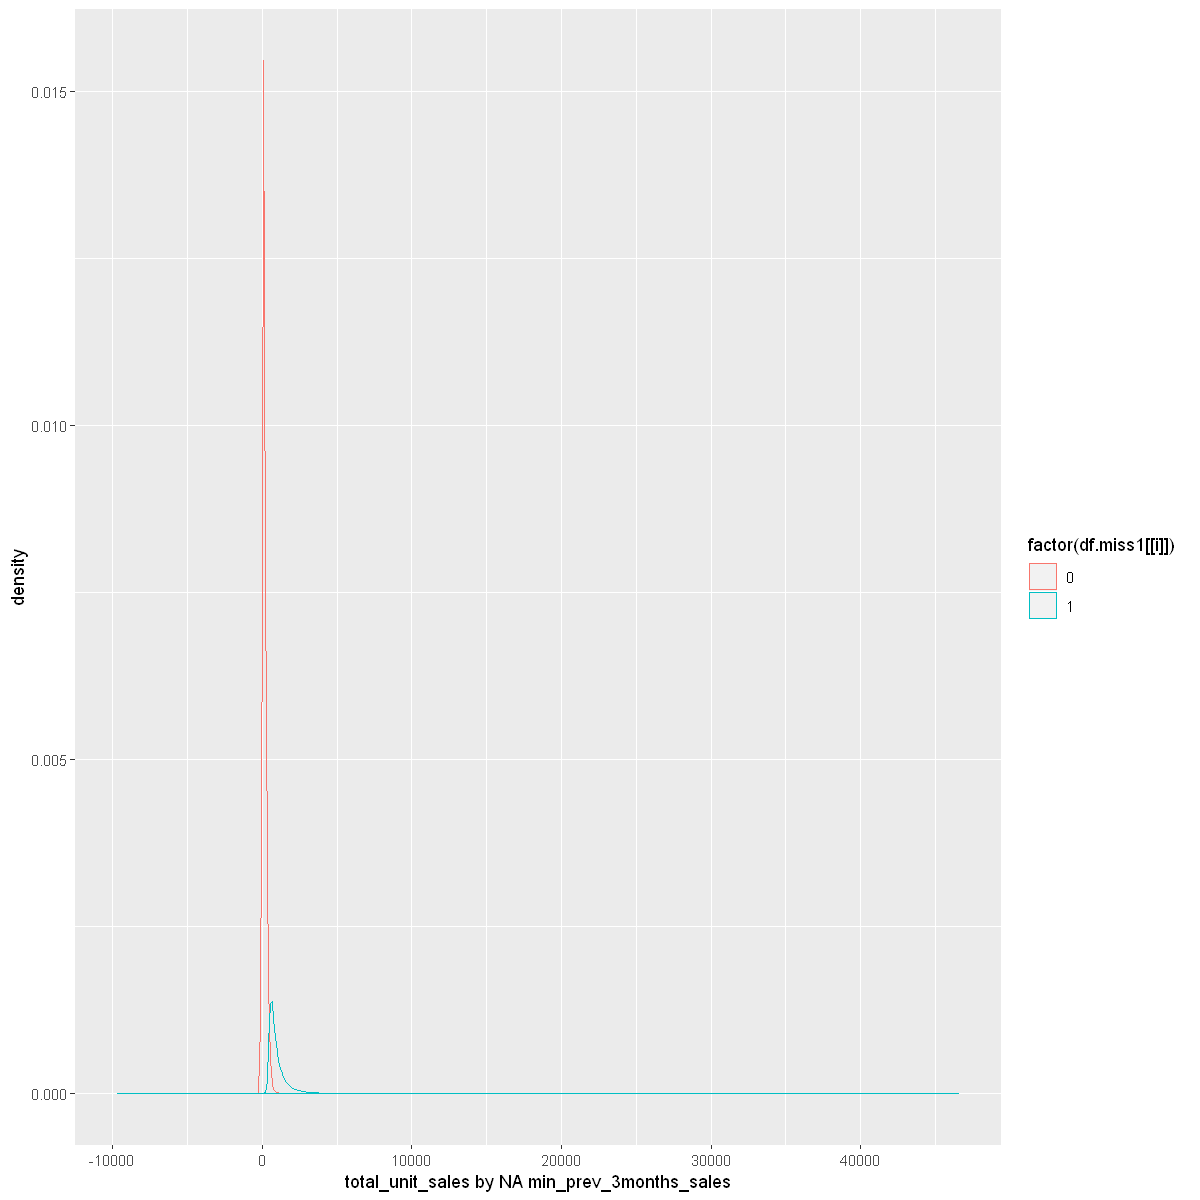


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -276.6, df = 23866, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -237.5855 -234.2420
sample estimates:
mean of x mean of y 
 138.4120  374.3257 

[1] "prev_month_sales by NA max_prev_3months_sales"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


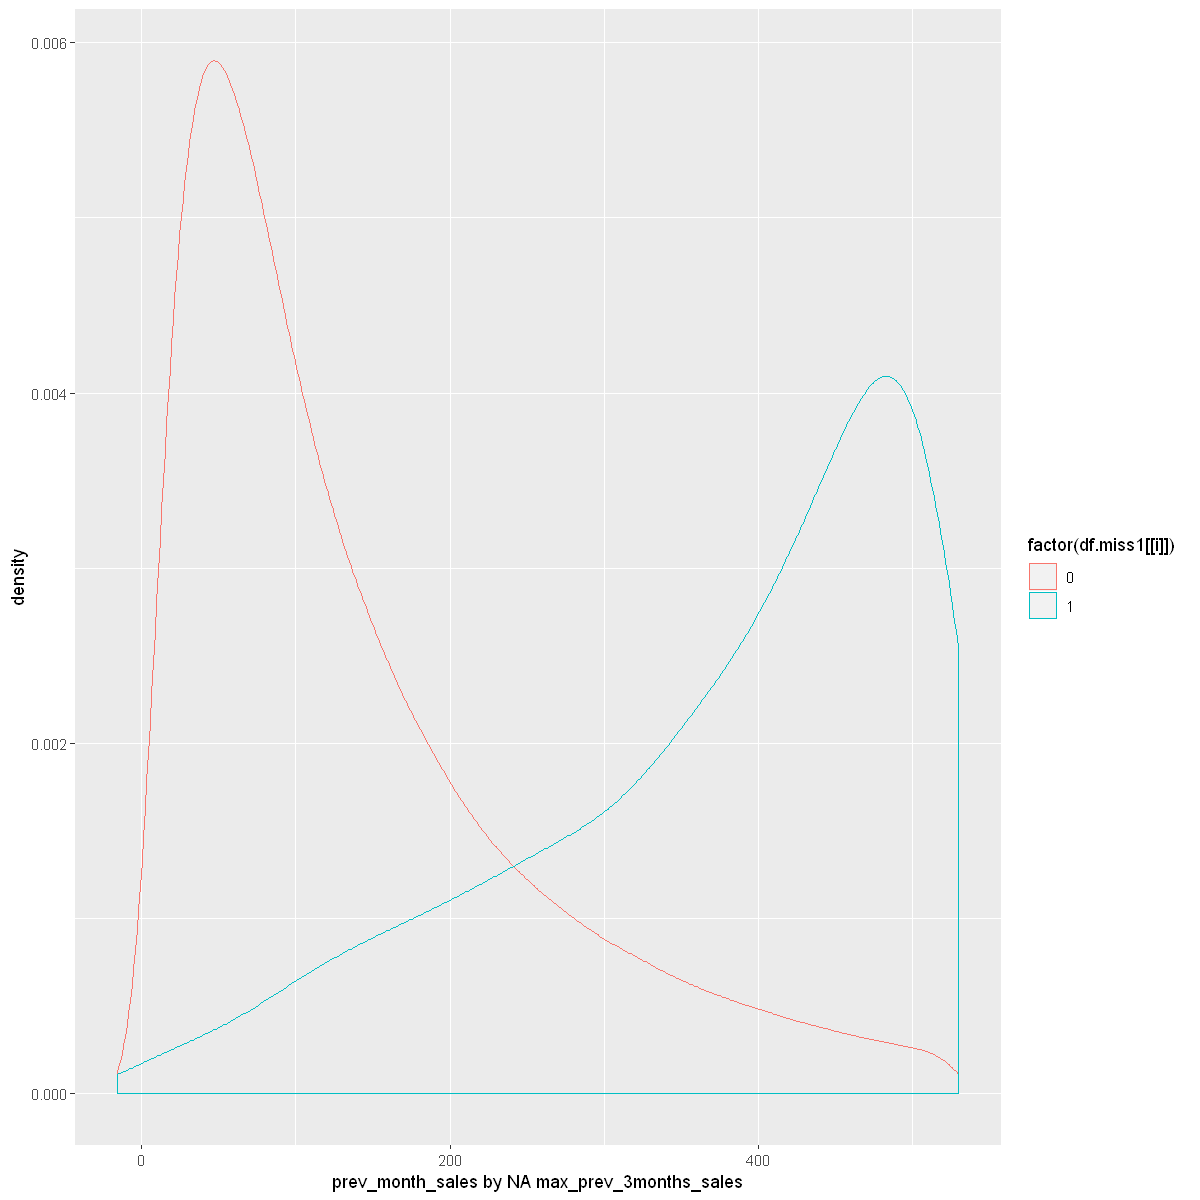


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -313.78, df = 37098, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -225.5627 -222.7623
sample estimates:
mean of x mean of y 
 137.5710  361.7335 

[1] "prev_3month_sales by NA max_prev_3months_sales"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -596.77, df = 16323, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -310.3069 -308.2752
sample estimates:
mean of x mean of y 
 140.0158  449.3069 

[1] "avg_prev_3months_sales by NA max_prev_3months_sales"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -261.15, df = 32244, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -172.7645 -170.1905
sample estimates:
mean of x mean of y 
 110.4279  281.9054 

[1] "min_prev_3months_sales by NA max_prev_3months_sales"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


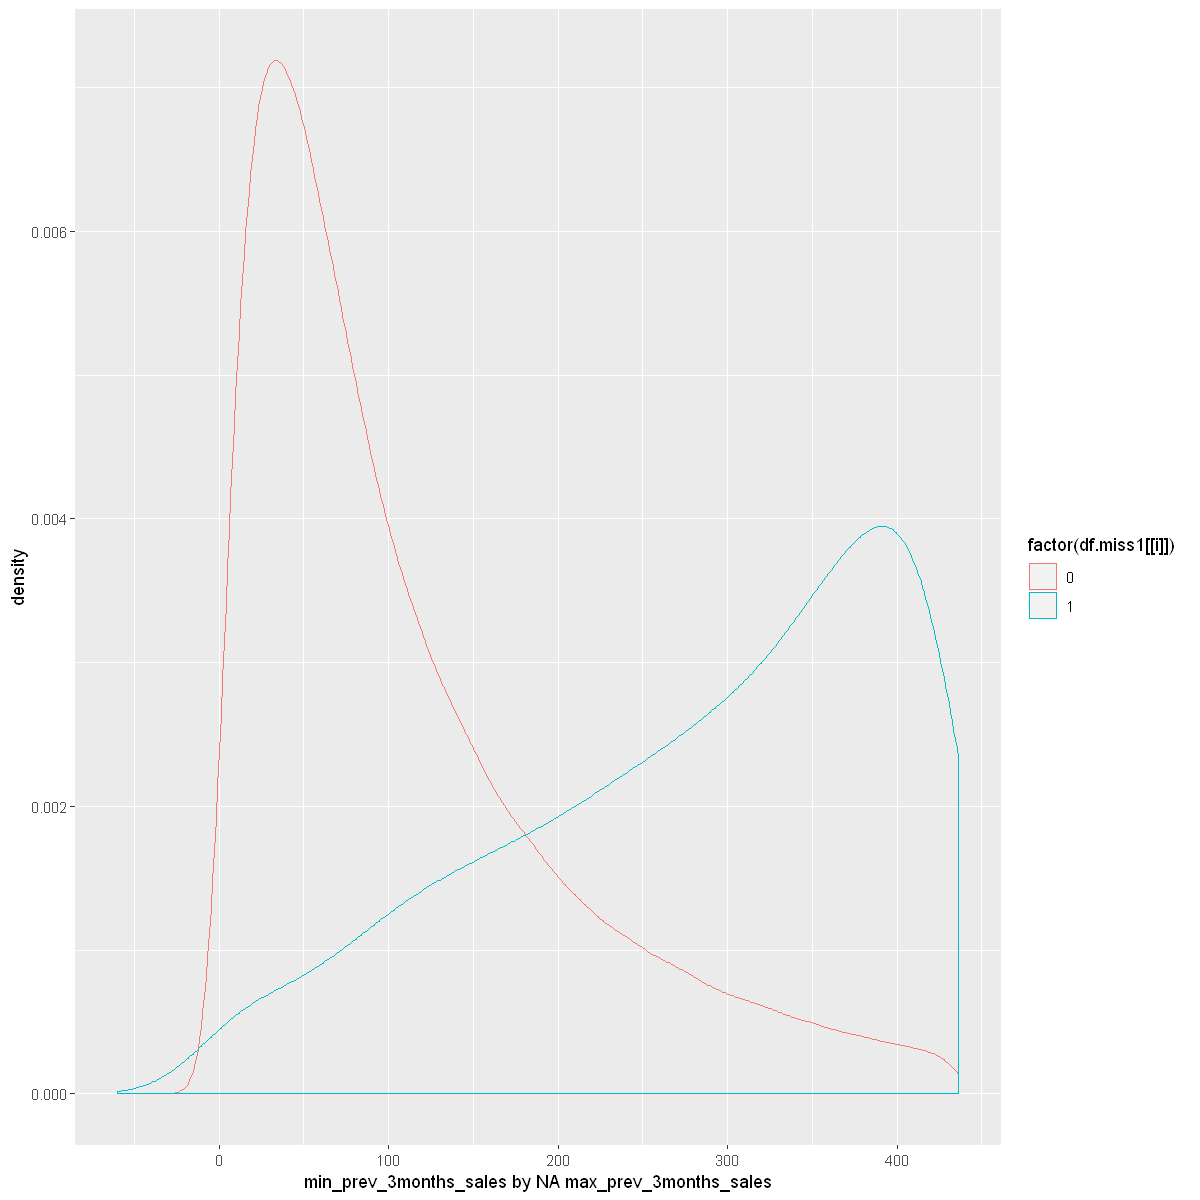


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -199.21, df = 166563, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13480.03 -13217.37
sample estimates:
mean of x mean of y 
 45511.05  58859.75 

[1] "total_month_transactions by NA max_prev_3months_sales"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -204.78, df = 168249, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13994.42 -13729.07
sample estimates:
mean of x mean of y 
 46205.96  60067.70 

[1] "prev_month_transactions by NA max_prev_3months_sales"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -206.4, df = 170892, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14216.95 -13949.47
sample estimates:
mean of x mean of y 
 46255.66  60338.87 

[1] "prev_3month_transactions by NA max_prev_3months_sales"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


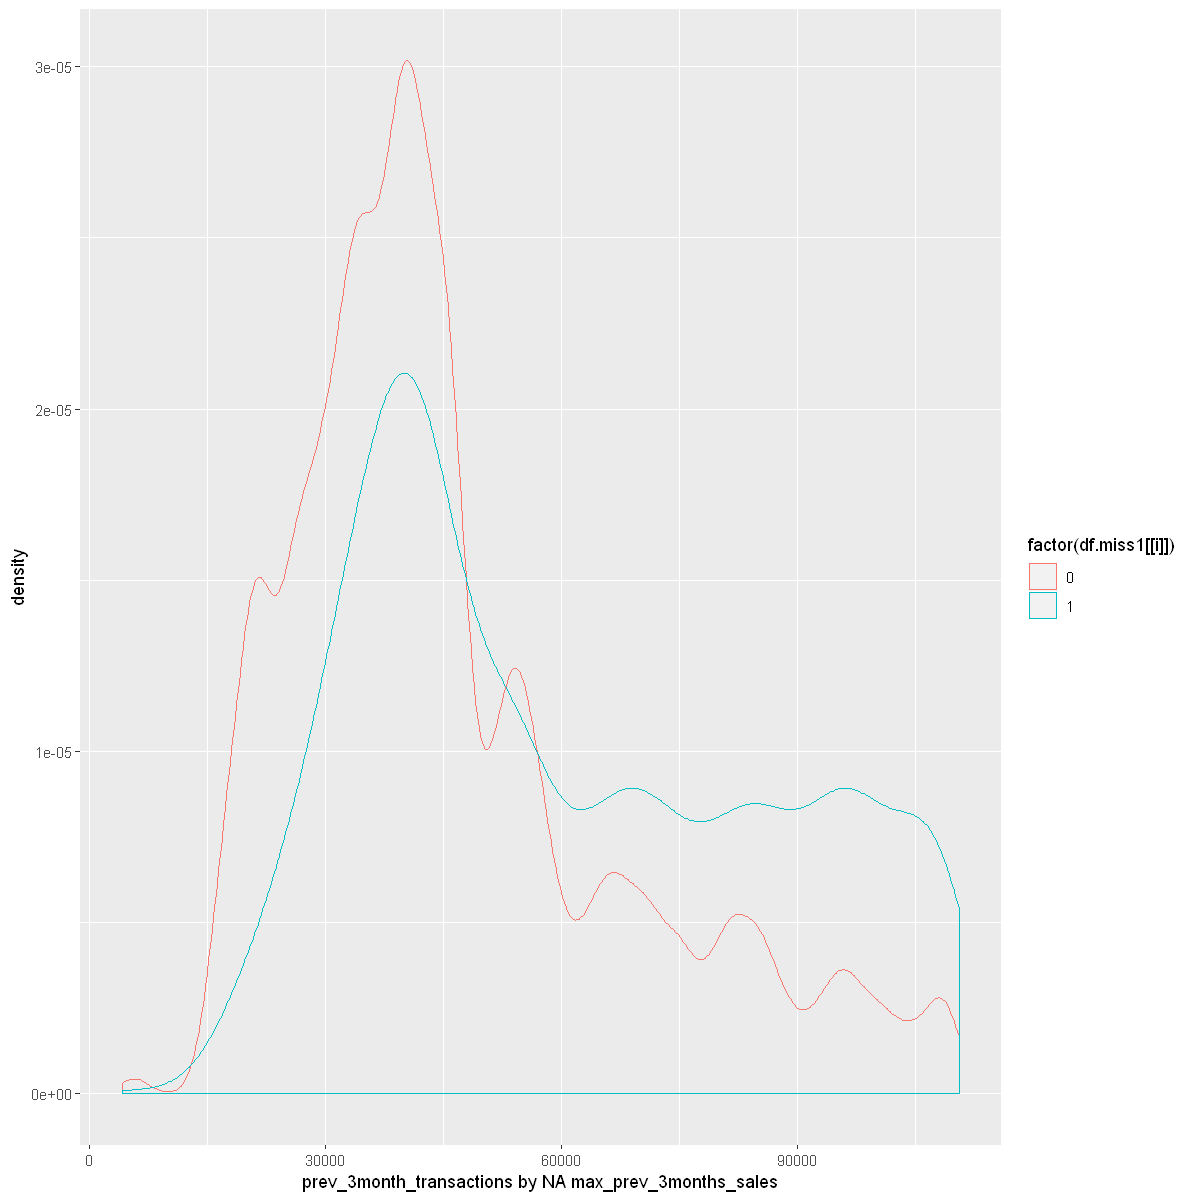


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -198.86, df = 164462, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13301.79 -13042.14
sample estimates:
mean of x mean of y 
 45731.00  58902.97 

[1] "avg_prev_3months_transactions by NA max_prev_3months_sales"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -188.69, df = 161268, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11776.31 -11534.17
sample estimates:
mean of x mean of y 
 42674.39  54329.62 

[1] "min_prev_3months_transactions by NA max_prev_3months_sales"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -200.75, df = 165094, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14352.75 -14075.20
sample estimates:
mean of x mean of y 
 48624.41  62838.38 

[1] "max_prev_3months_transactions by NA max_prev_3months_sales"


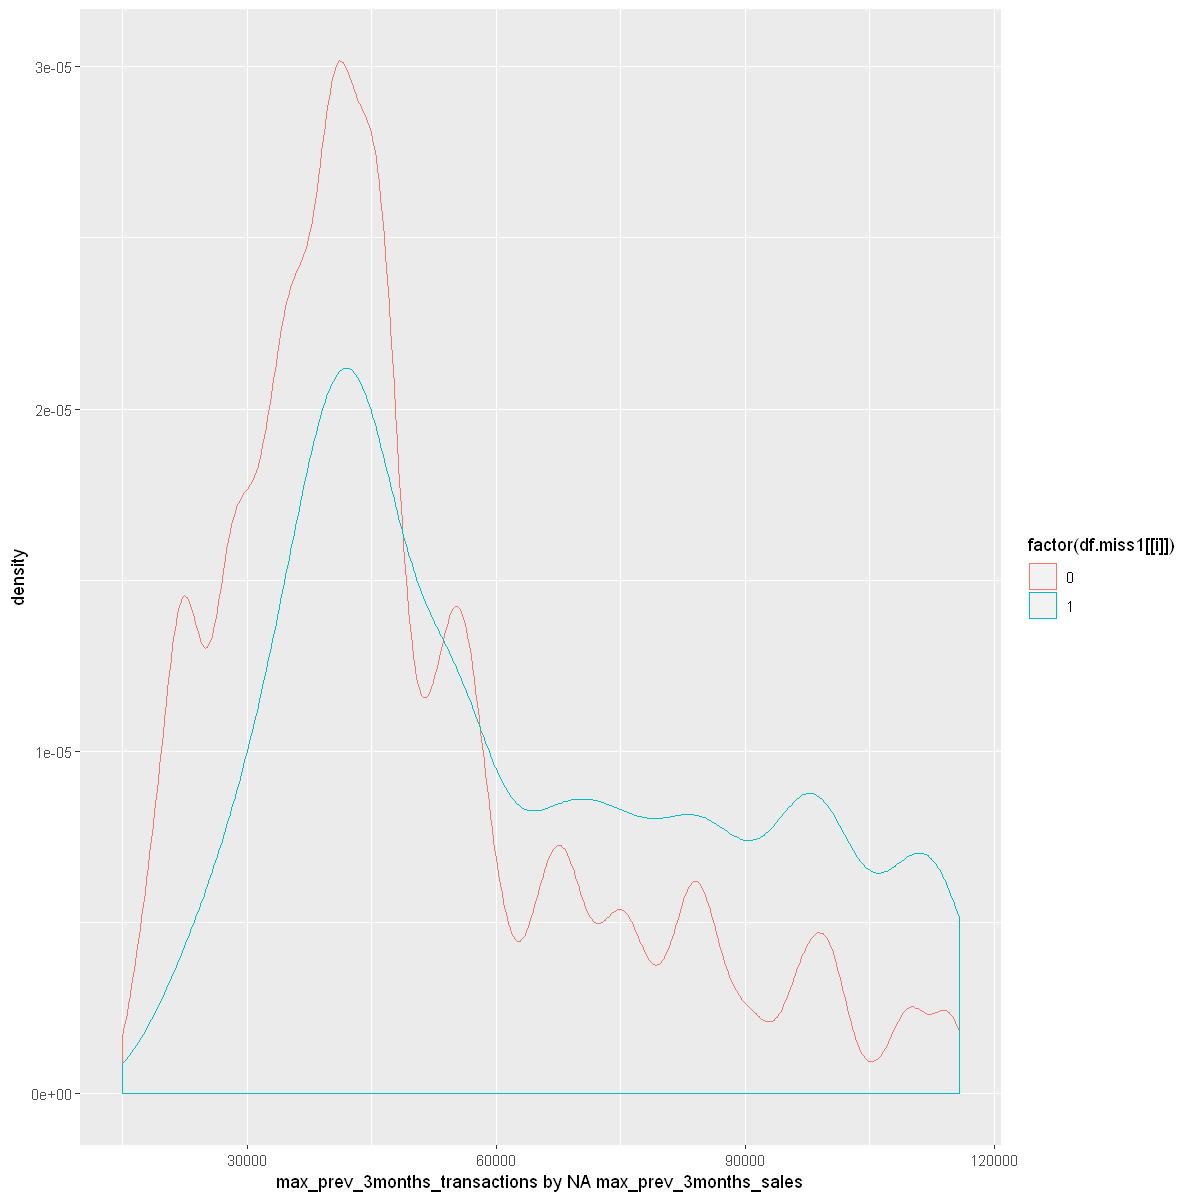


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -429.41, df = 182780, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -905.6921 -897.4620
sample estimates:
mean of x mean of y 
 142.2749 1043.8519 

[1] "total_unit_sales by NA max_prev_3months_sales"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


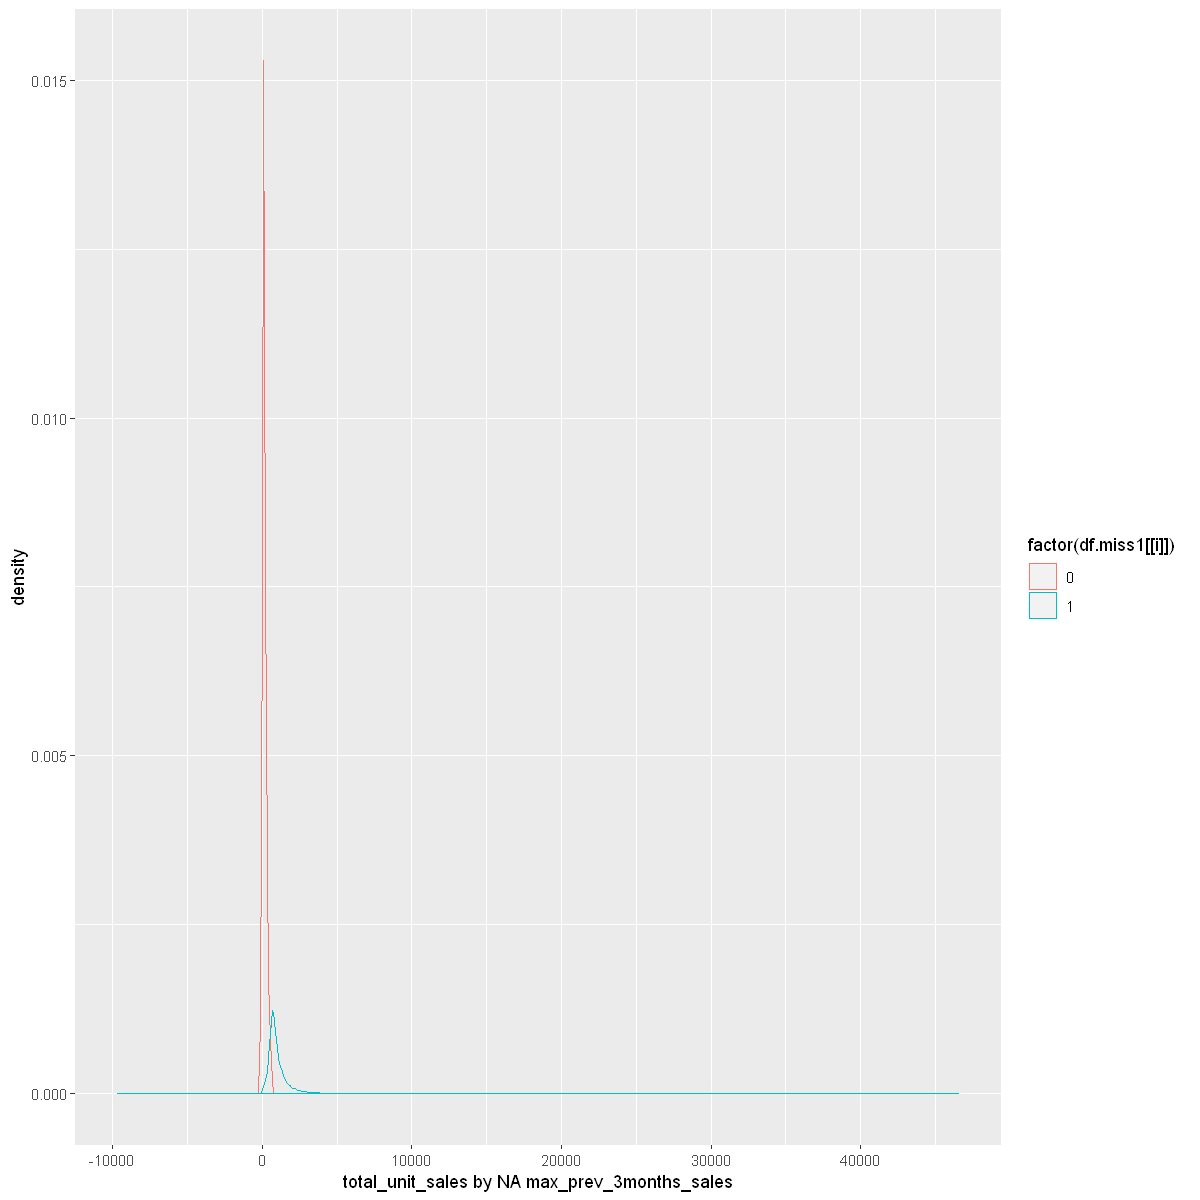


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -236.47, df = 96420, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -105.8532 -104.1129
sample estimates:
mean of x mean of y 
 136.2732  241.2563 

[1] "prev_month_sales by NA total_month_transactions"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


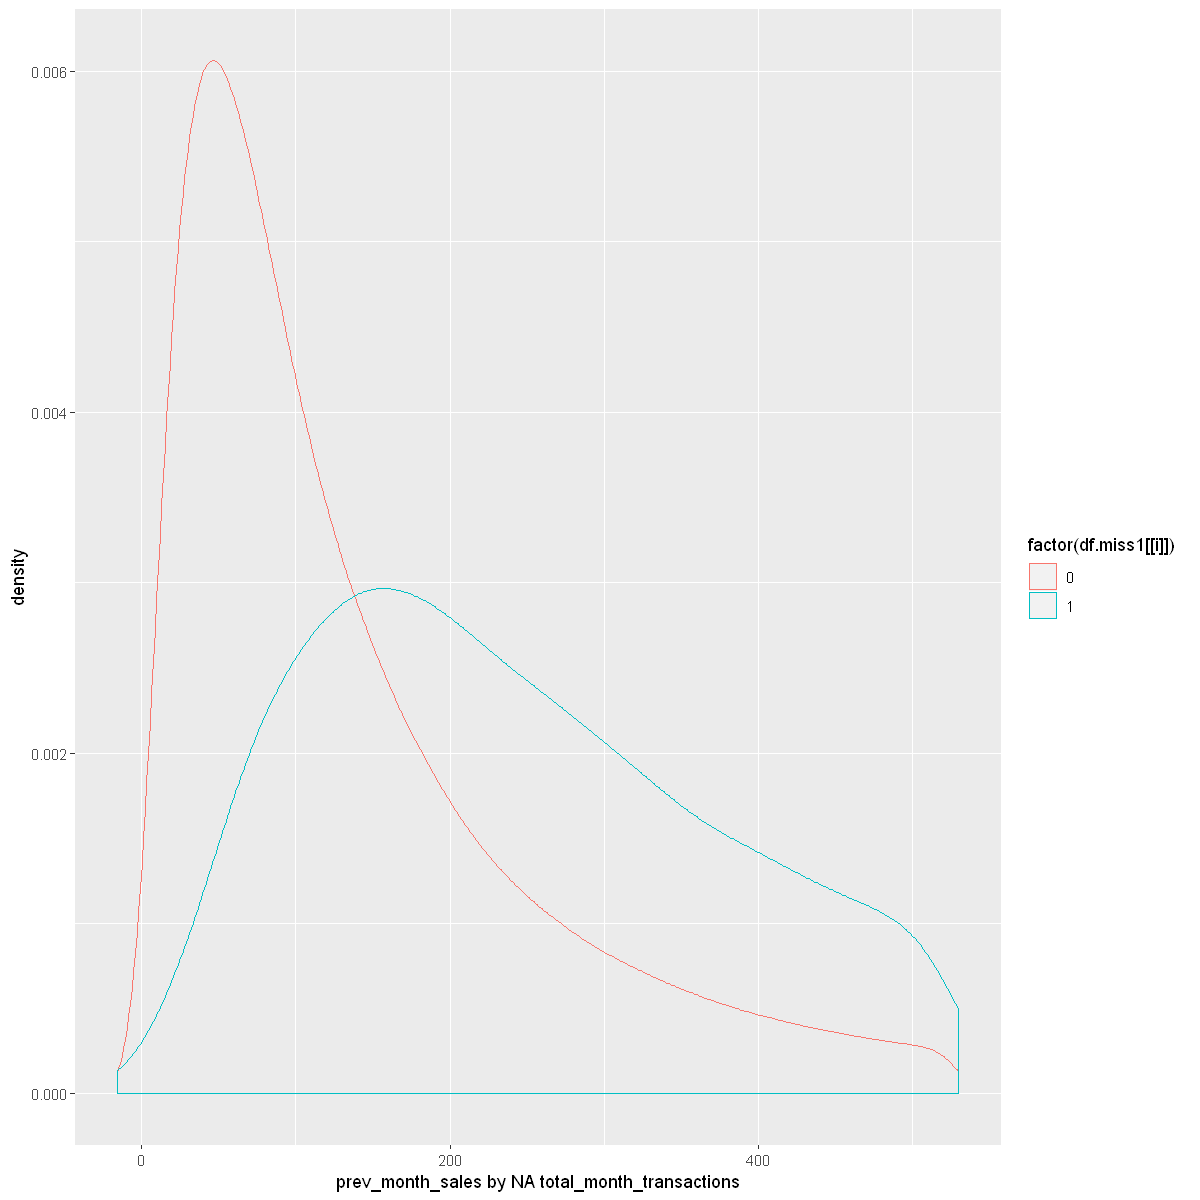


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -237.18, df = 96606, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -106.6426 -104.8945
sample estimates:
mean of x mean of y 
 136.8138  242.5823 

[1] "prev_3month_sales by NA total_month_transactions"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


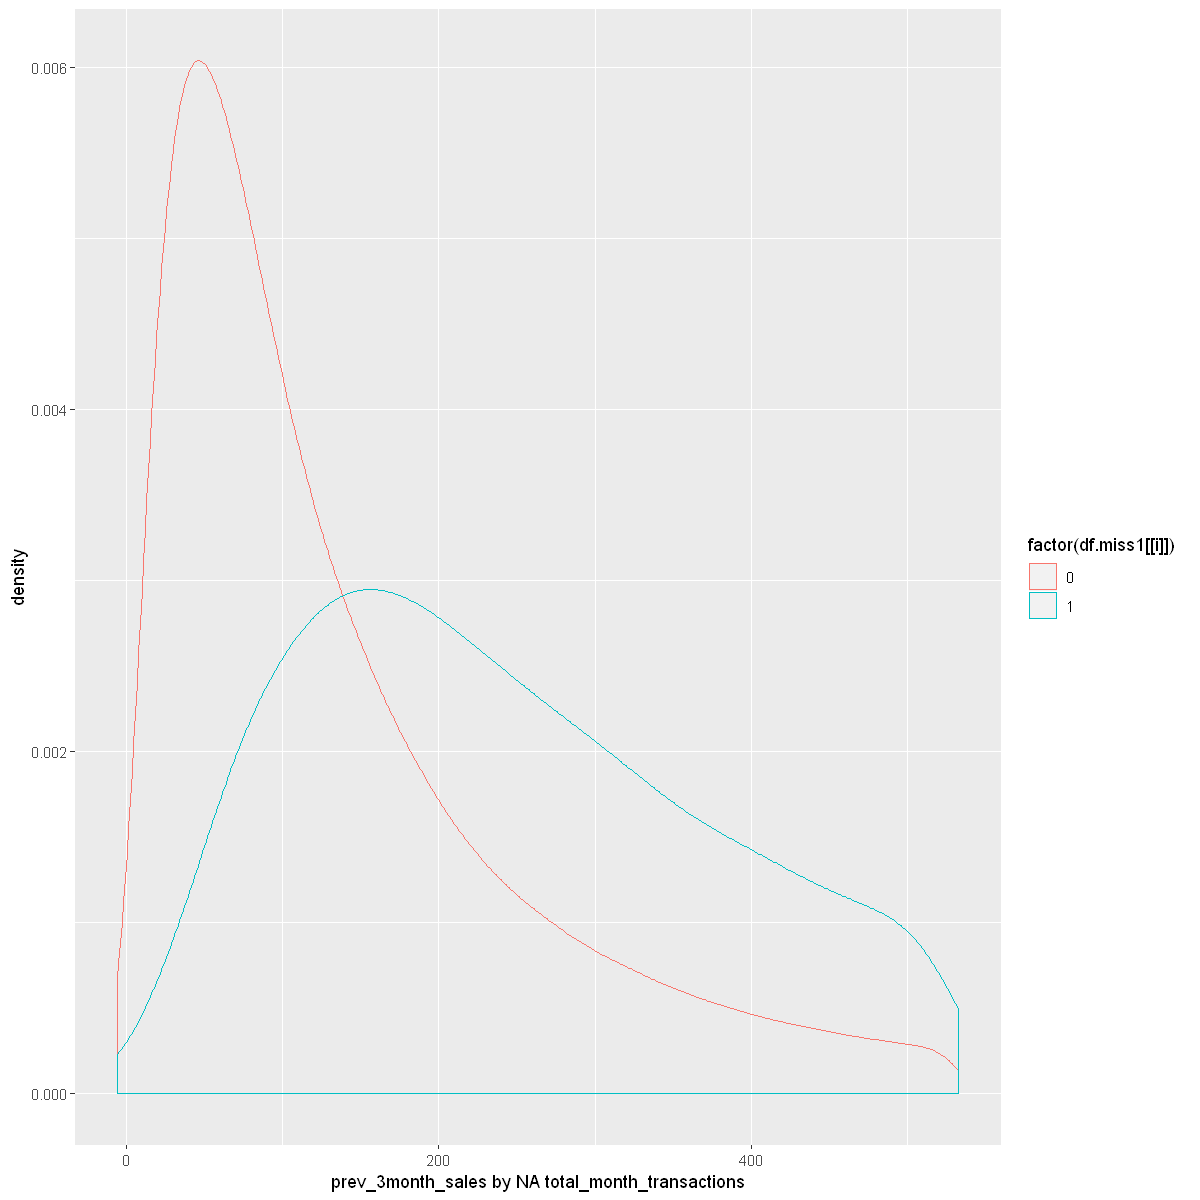


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -249.63, df = 95692, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -109.5778 -107.8705
sample estimates:
mean of x mean of y 
 137.3286  246.0527 

[1] "avg_prev_3months_sales by NA total_month_transactions"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


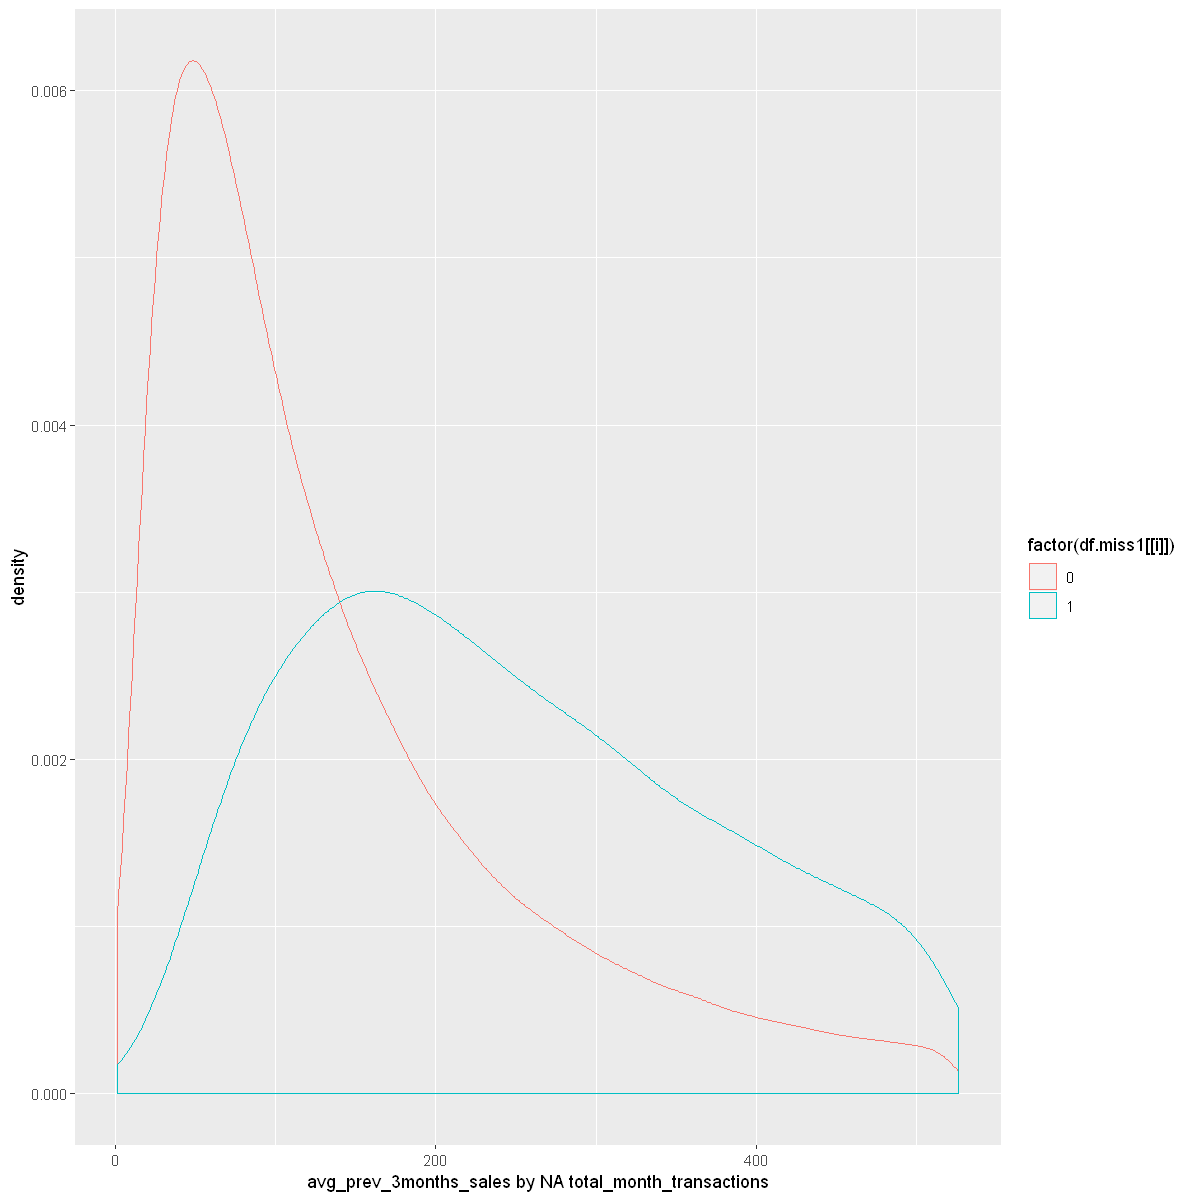


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -236.65, df = 94673, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -89.32552 -87.85804
sample estimates:
mean of x mean of y 
 109.1062  197.6980 

[1] "min_prev_3months_sales by NA total_month_transactions"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


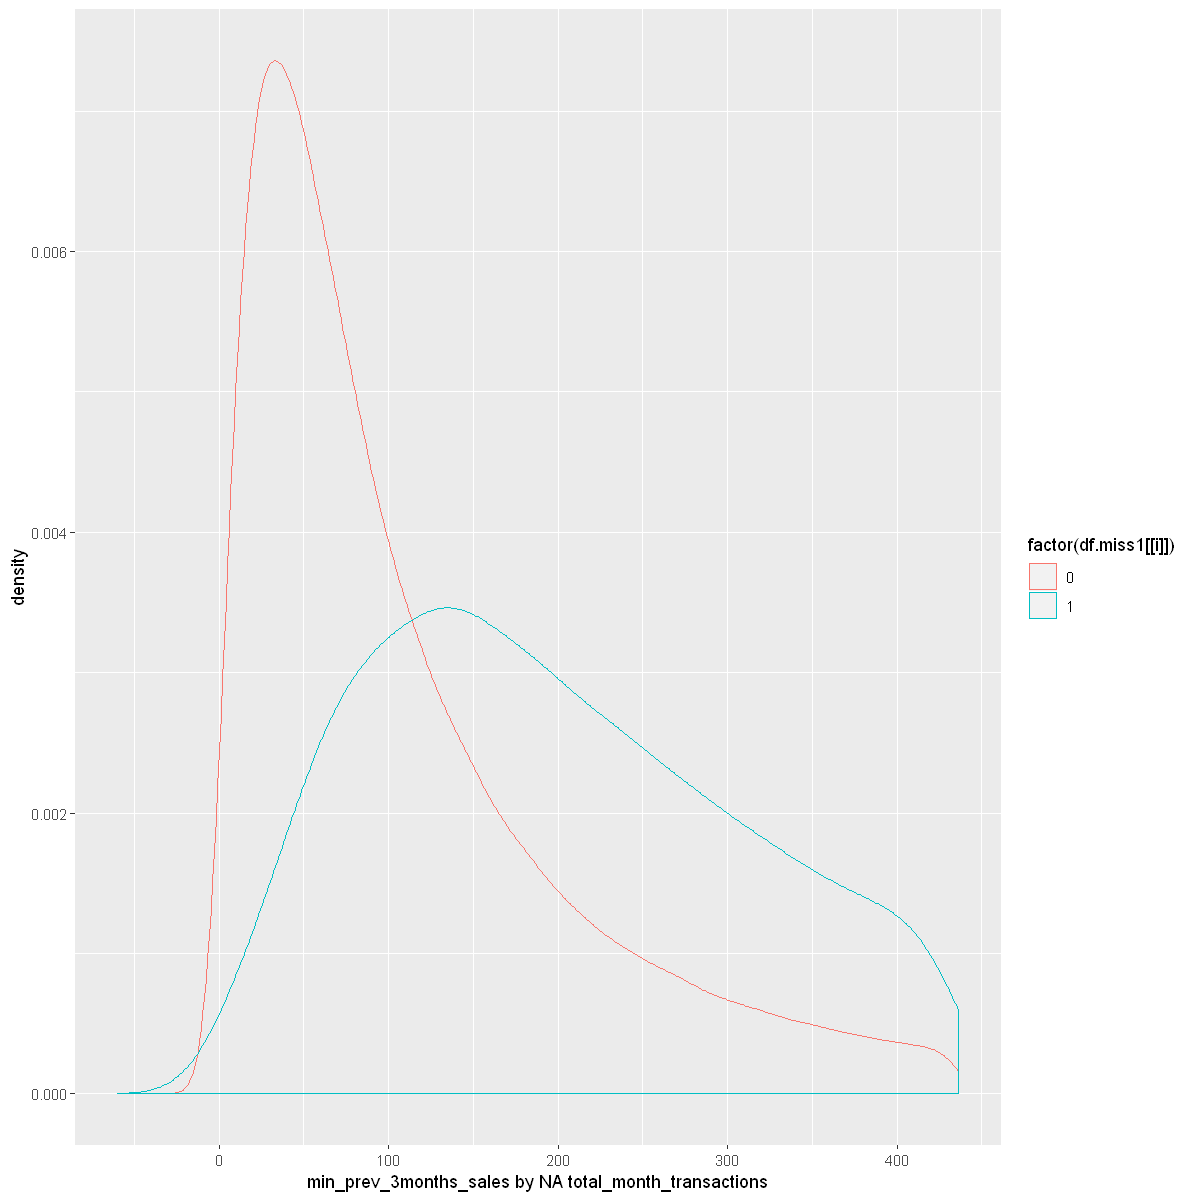


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -246.25, df = 96501, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -127.4105 -125.3983
sample estimates:
mean of x mean of y 
 165.4184  291.8227 

[1] "max_prev_3months_sales by NA total_month_transactions"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."


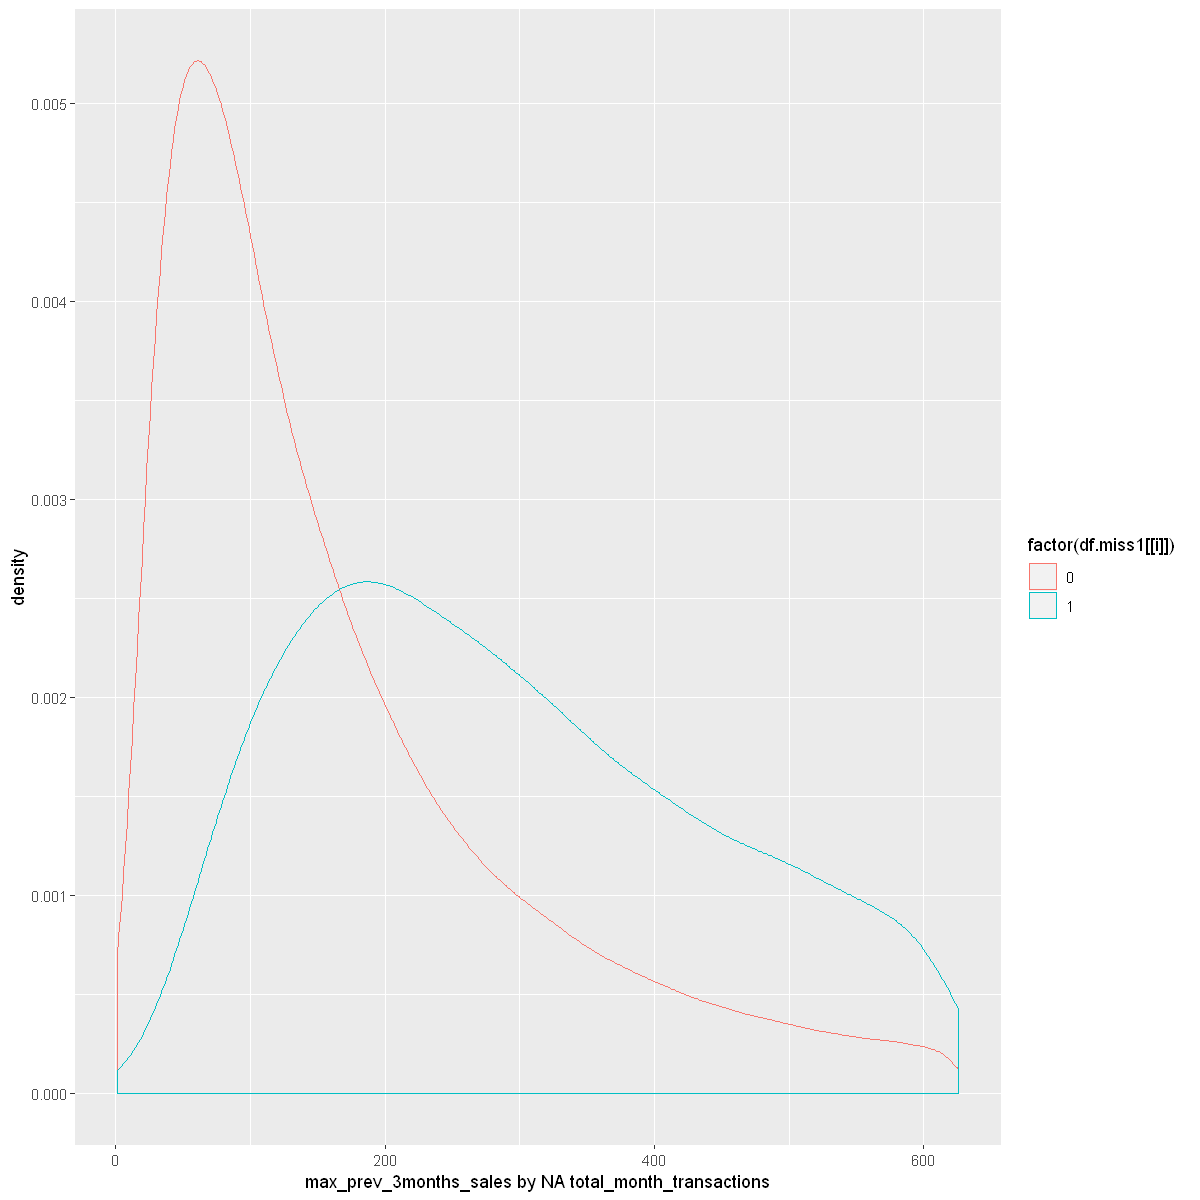


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1305.8, df = 45465, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56483.92 -56314.61
sample estimates:
mean of x mean of y 
 46264.64 102663.90 

[1] "prev_month_transactions by NA total_month_transactions"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


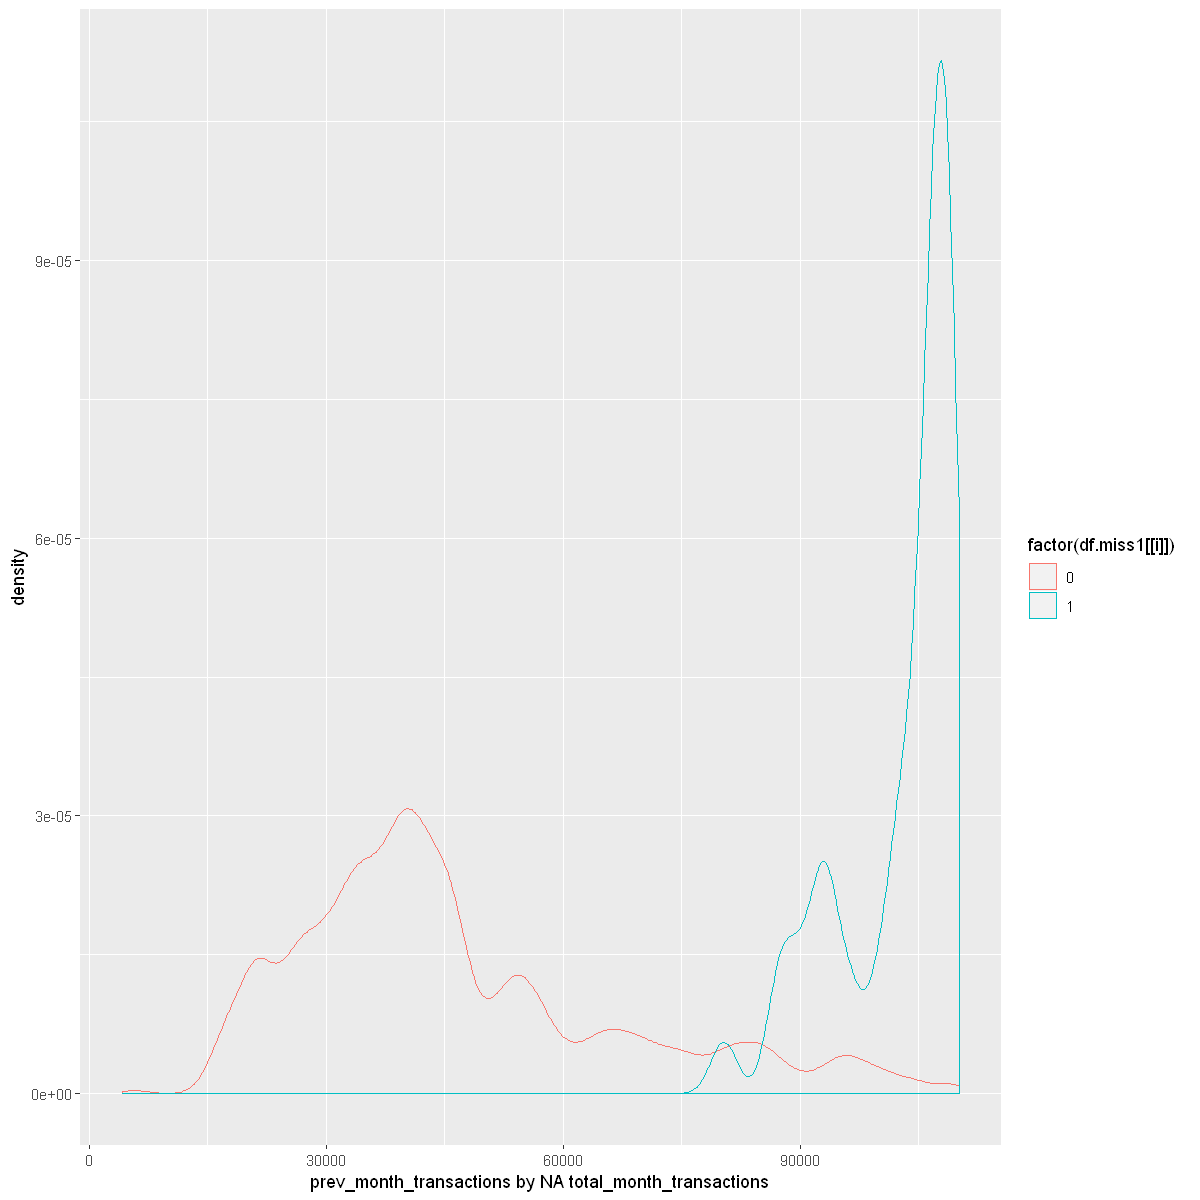


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1252.8, df = 47879, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -55857.73 -55683.22
sample estimates:
mean of x mean of y 
 46292.67 102063.15 

[1] "prev_3month_transactions by NA total_month_transactions"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


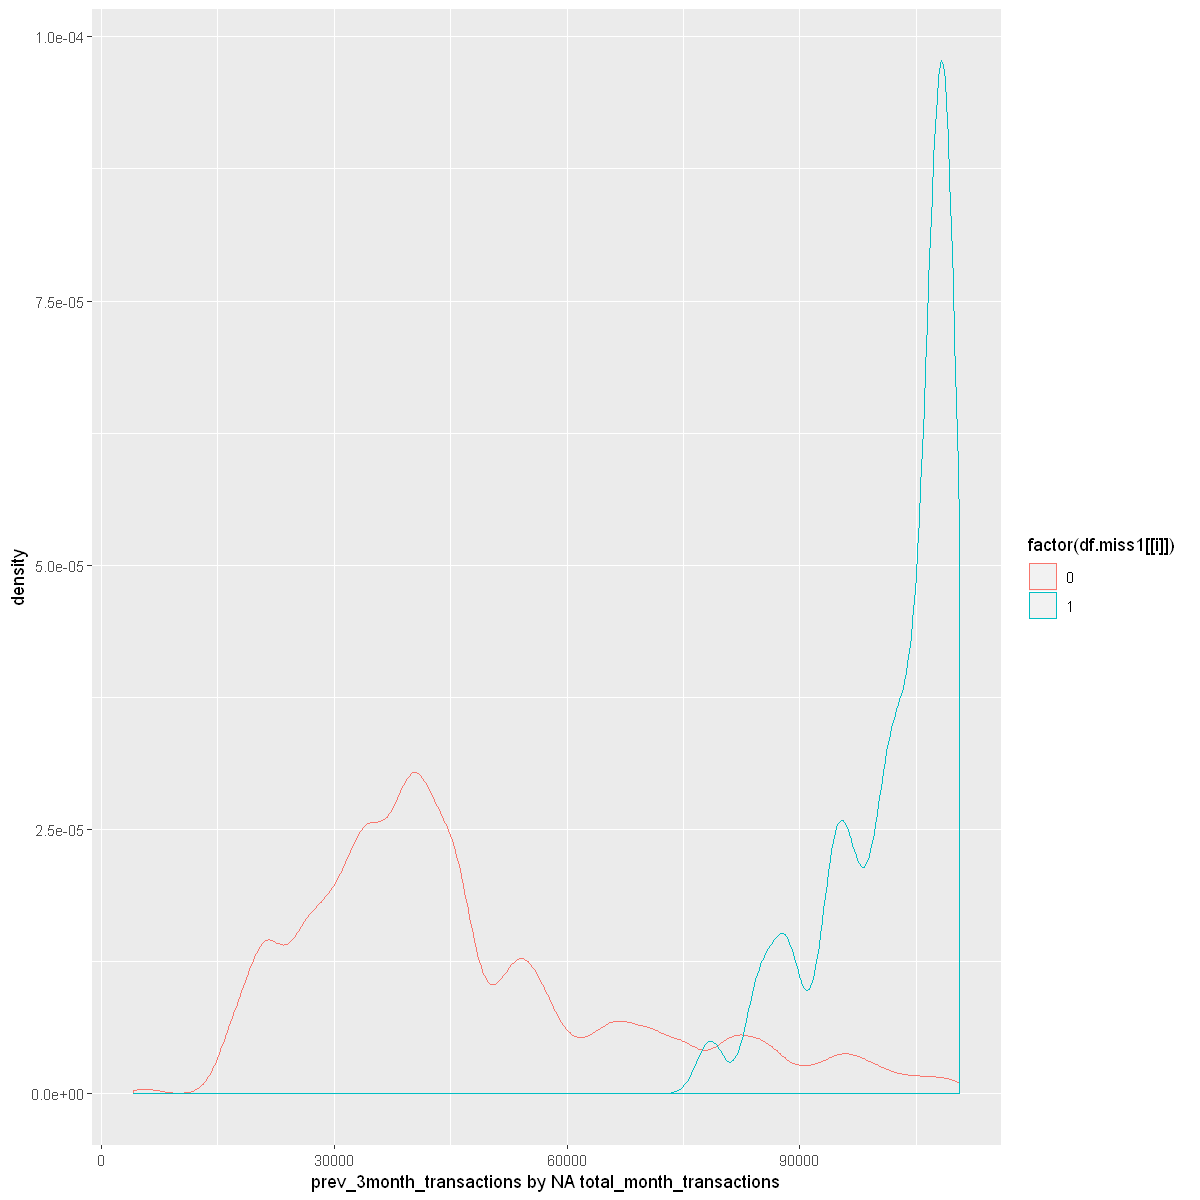


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1387.8, df = 21217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57057.04 -56896.10
sample estimates:
mean of x mean of y 
 46288.35 103264.92 

[1] "avg_prev_3months_transactions by NA total_month_transactions"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


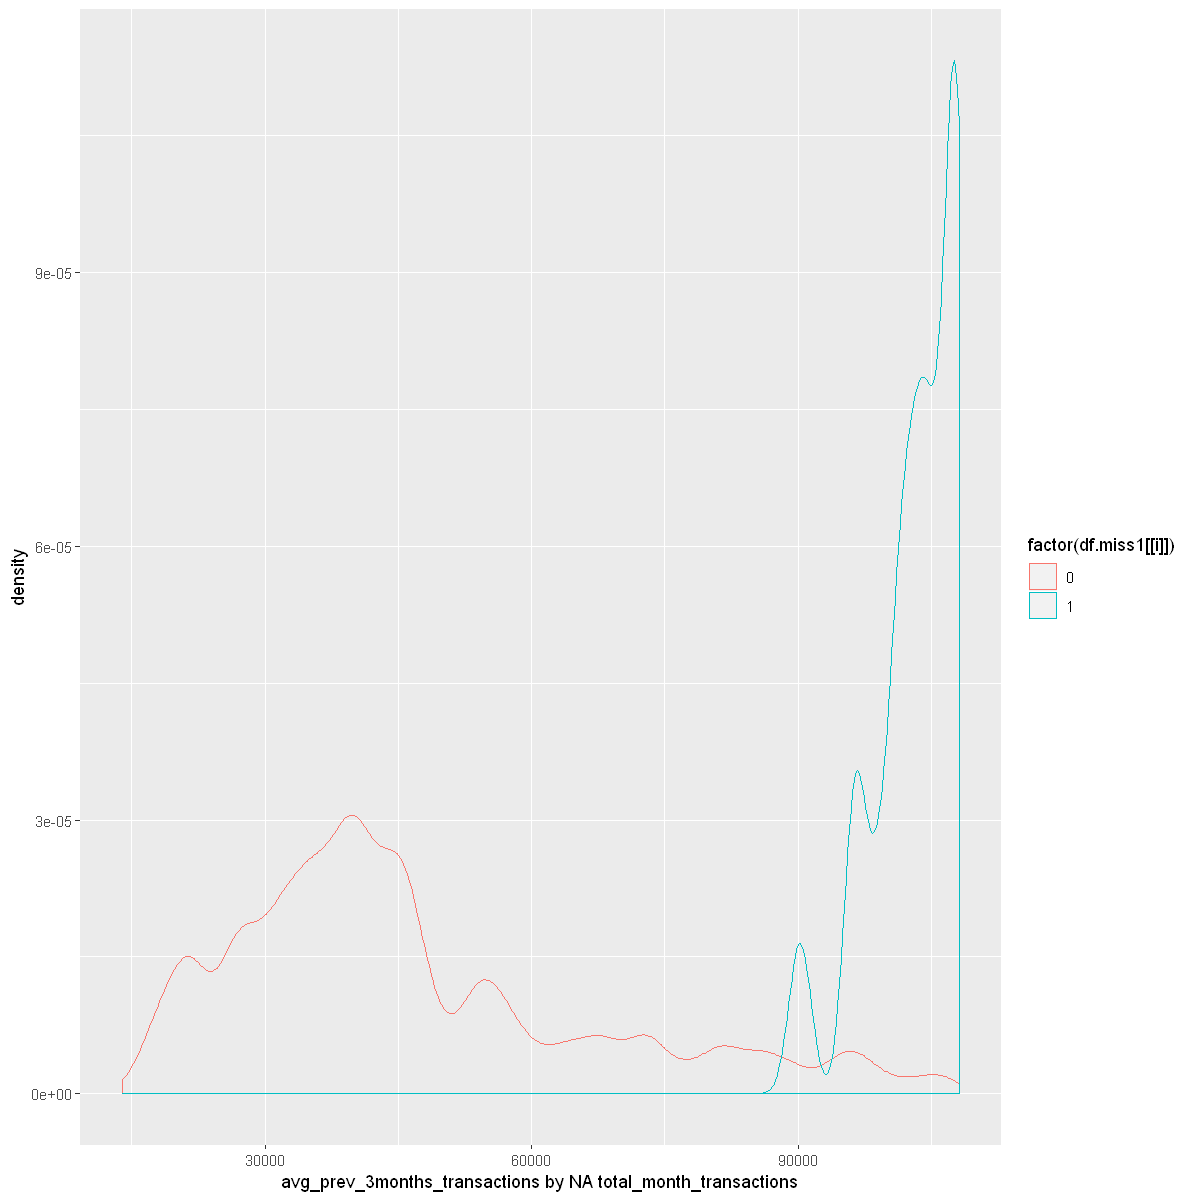


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -932.28, df = 15647, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -50624.14 -50411.71
sample estimates:
mean of x mean of y 
 43212.36  93730.28 

[1] "min_prev_3months_transactions by NA total_month_transactions"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


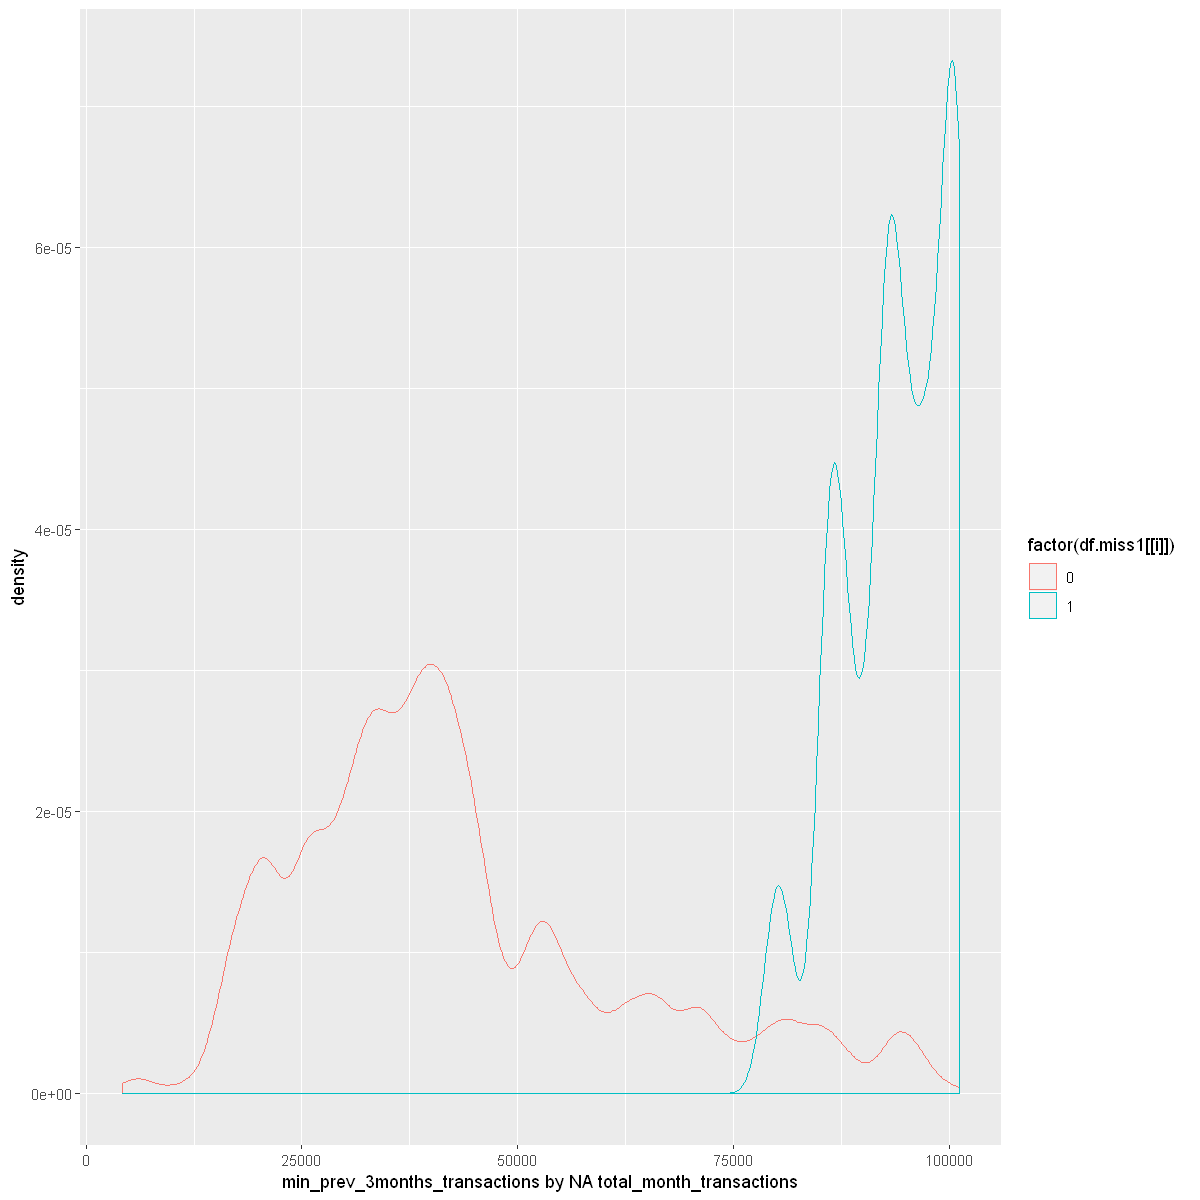


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3160, df = 159294, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -64260.95 -64181.28
sample estimates:
mean of x mean of y 
 48889.75 113110.87 

[1] "max_prev_3months_transactions by NA total_month_transactions"


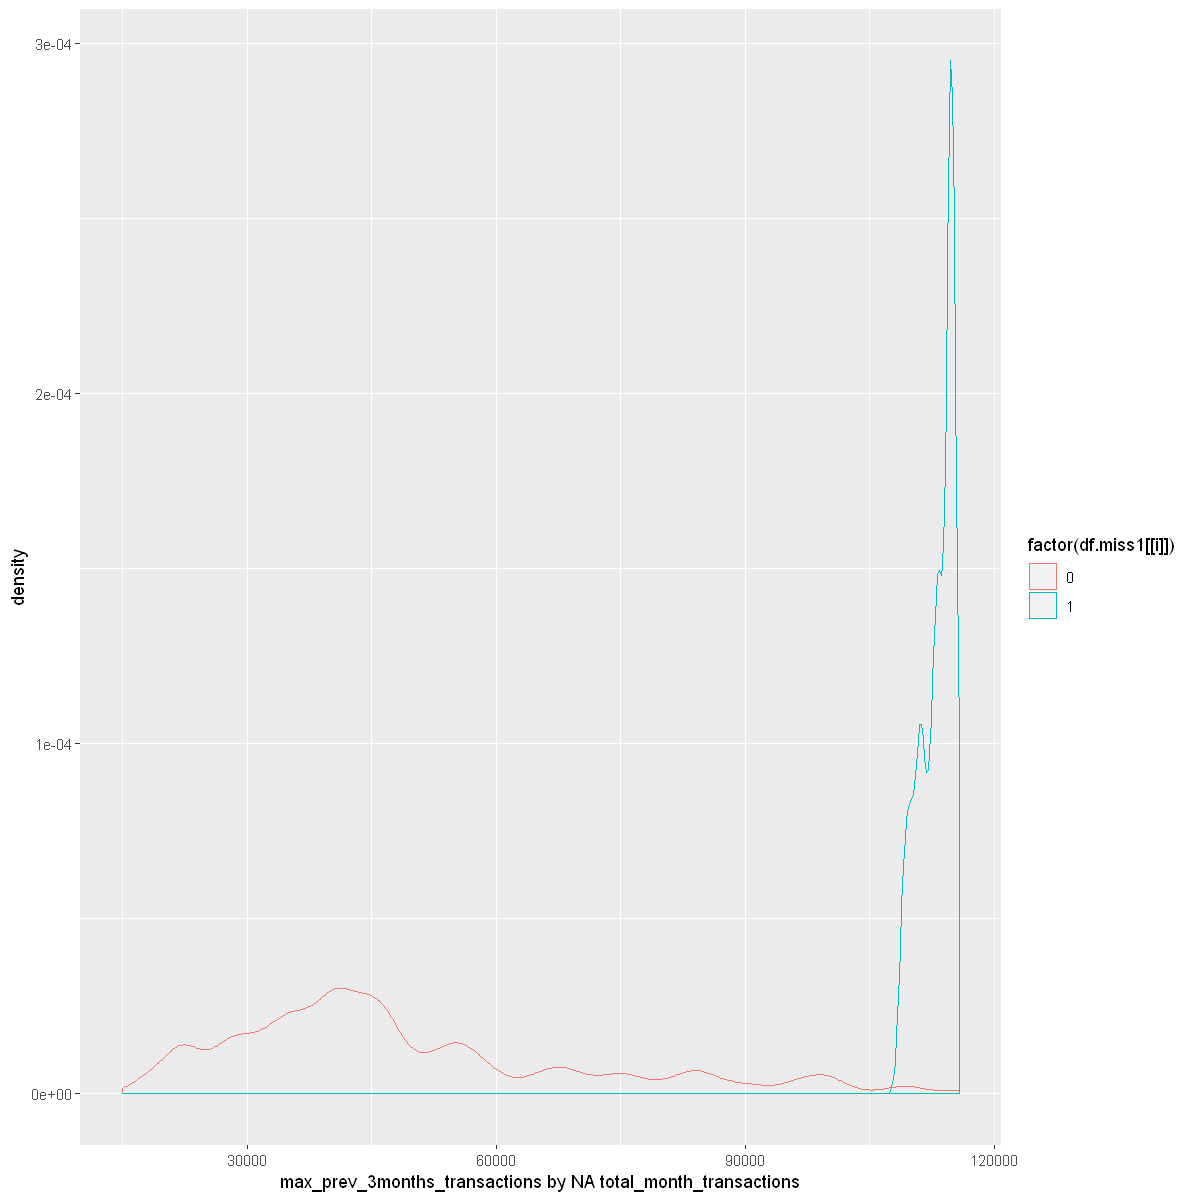


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -149.14, df = 126911, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -312.0749 -303.9788
sample estimates:
mean of x mean of y 
 206.2169  514.2438 

[1] "total_unit_sales by NA total_month_transactions"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


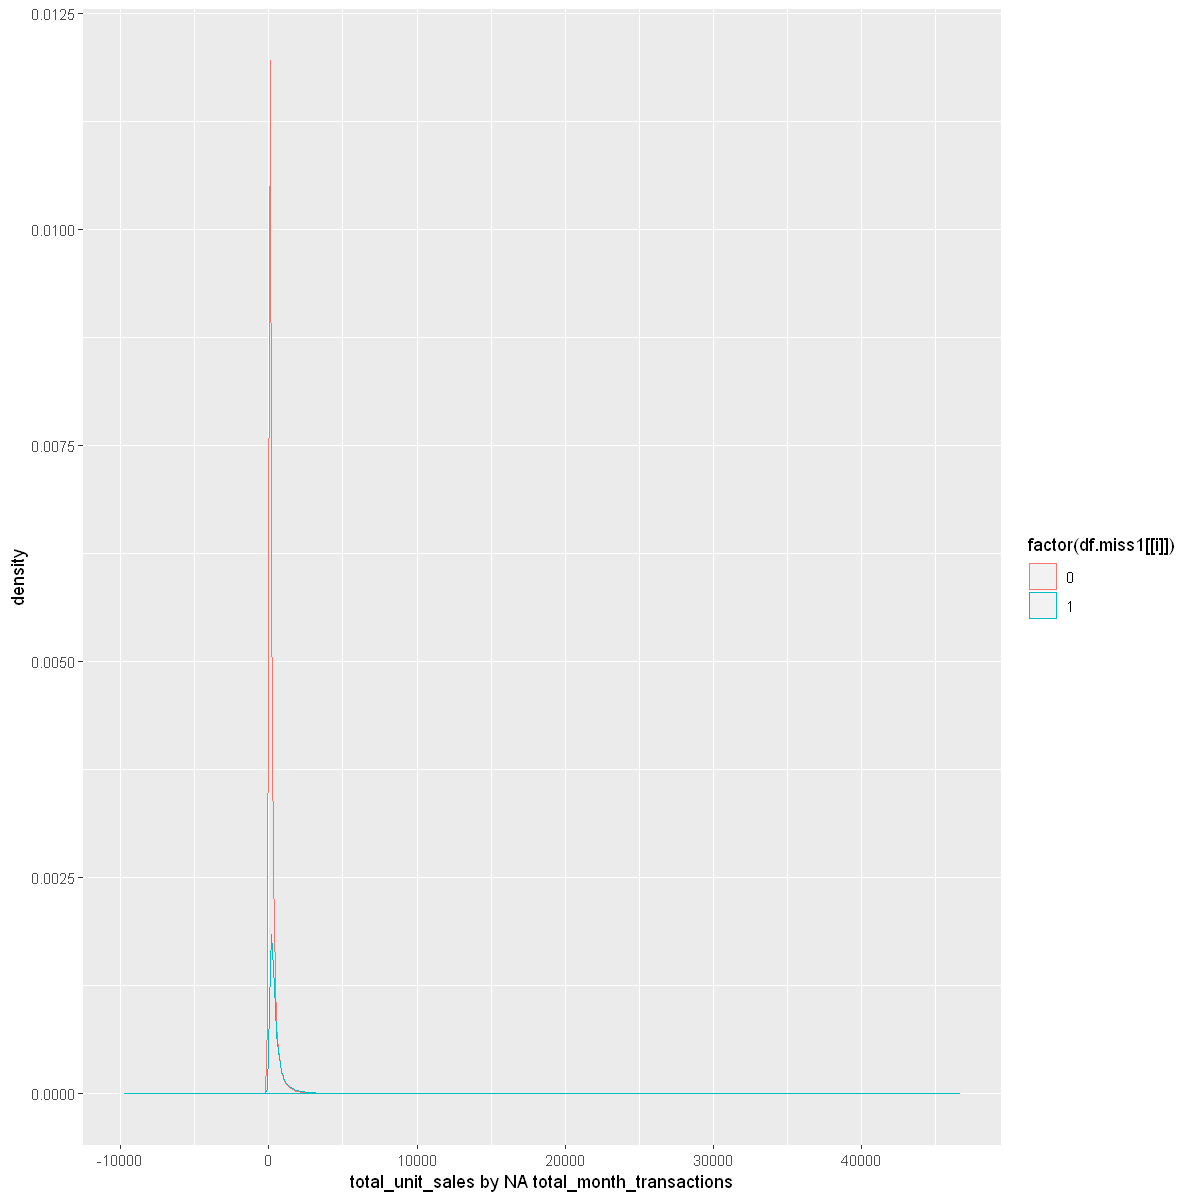


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -235.13, df = 89569, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -108.8352 -107.0357
sample estimates:
mean of x mean of y 
 136.4808  244.4163 

[1] "prev_month_sales by NA prev_month_transactions"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


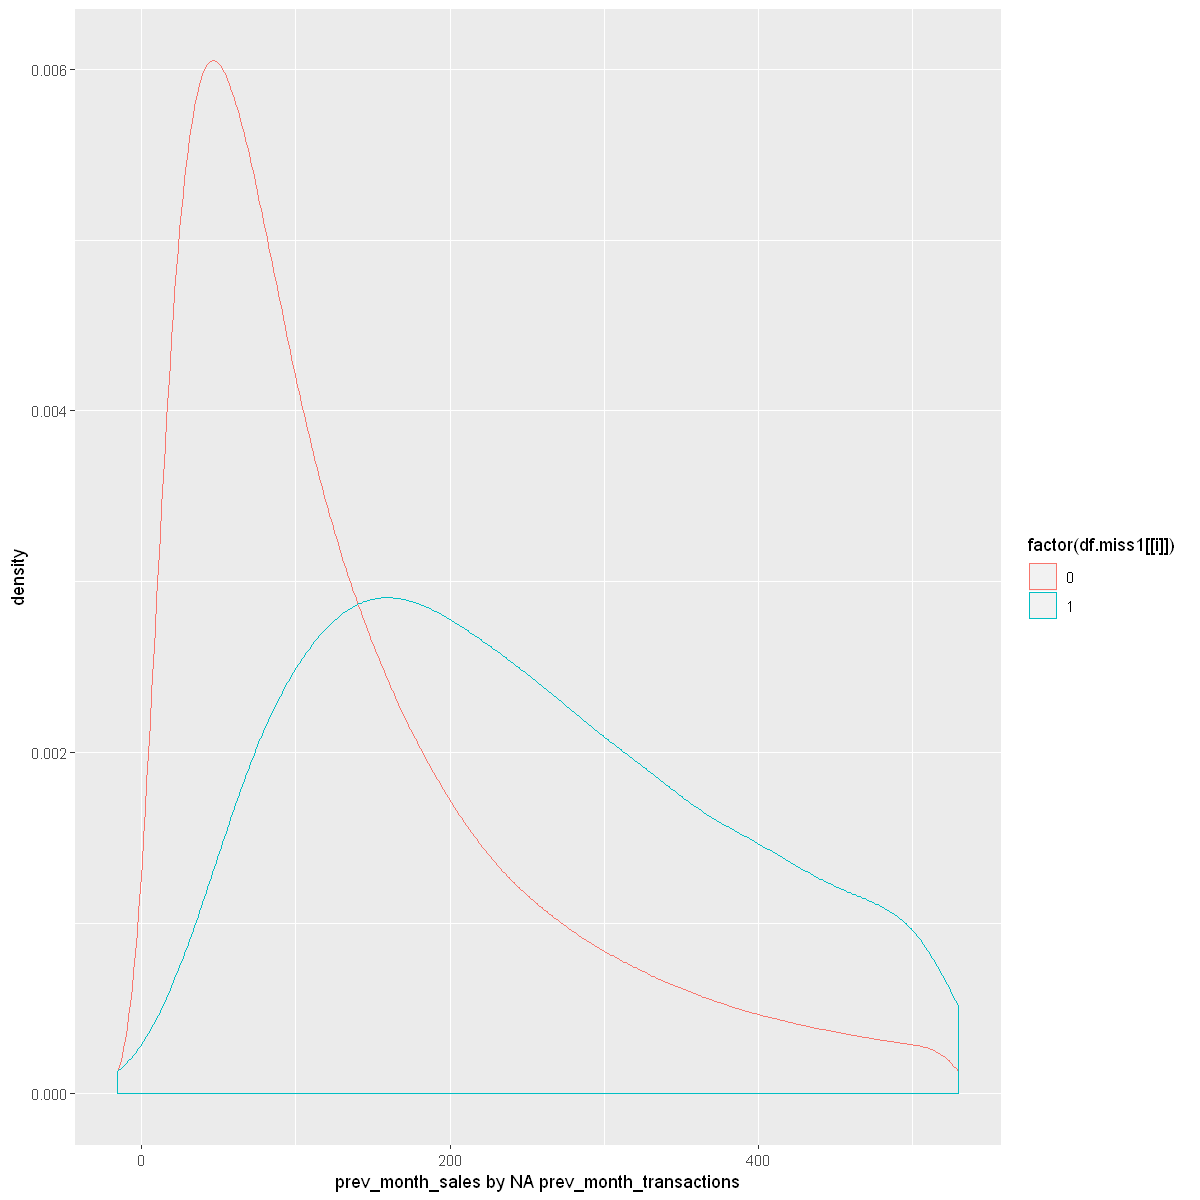


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -230.26, df = 91025, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -106.3472 -104.5520
sample estimates:
mean of x mean of y 
 137.1121  242.5617 

[1] "prev_3month_sales by NA prev_month_transactions"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


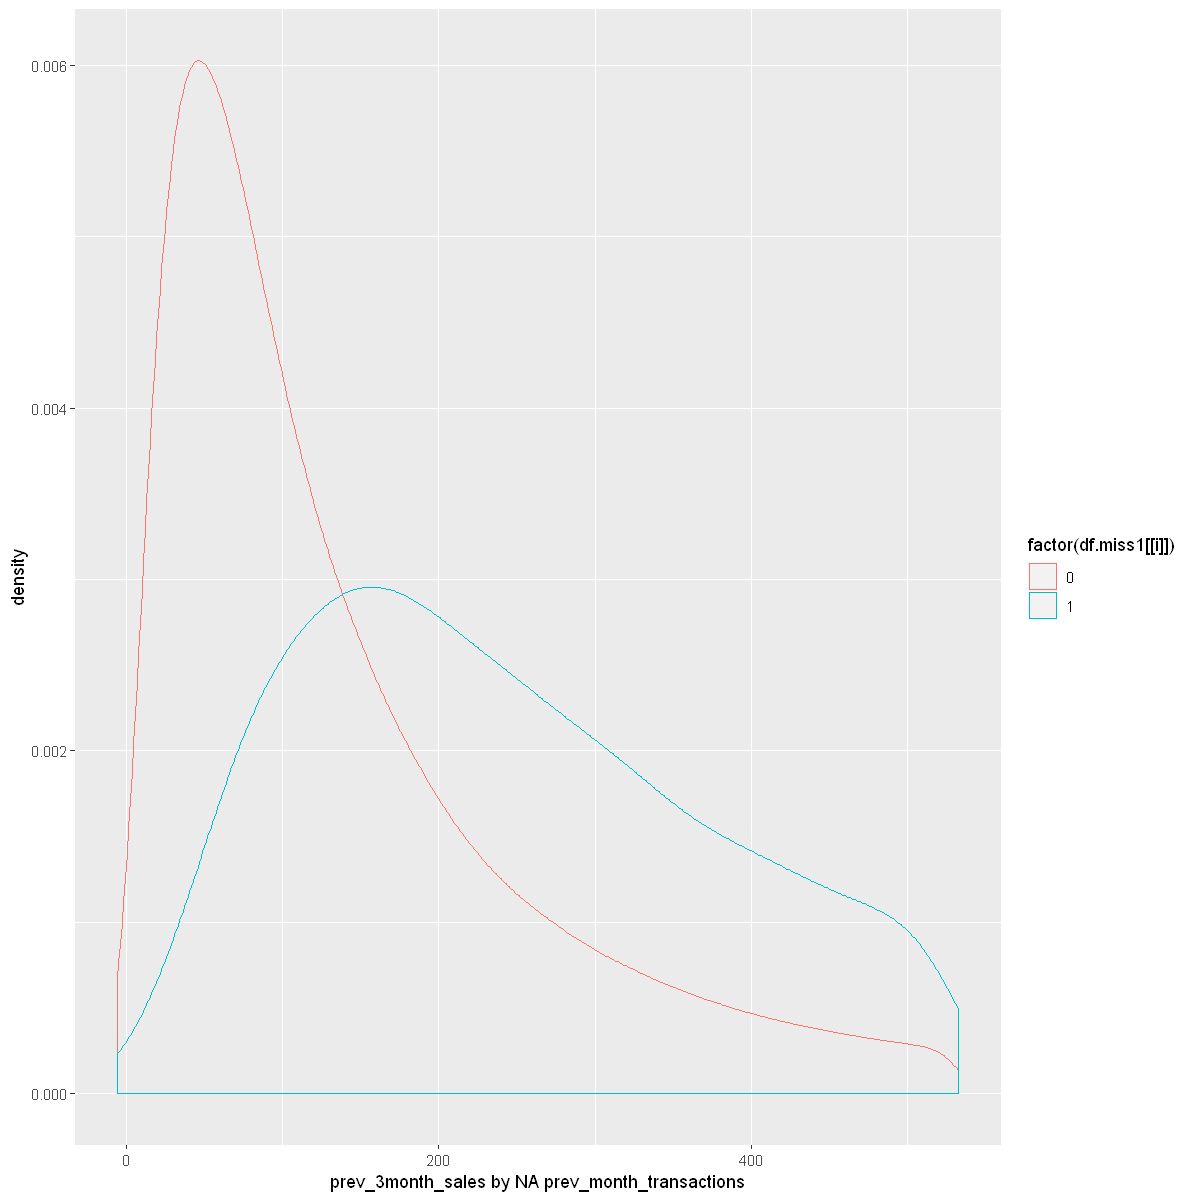


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -241.69, df = 90062, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -109.2559 -107.4982
sample estimates:
mean of x mean of y 
 137.6366  246.0137 

[1] "avg_prev_3months_sales by NA prev_month_transactions"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


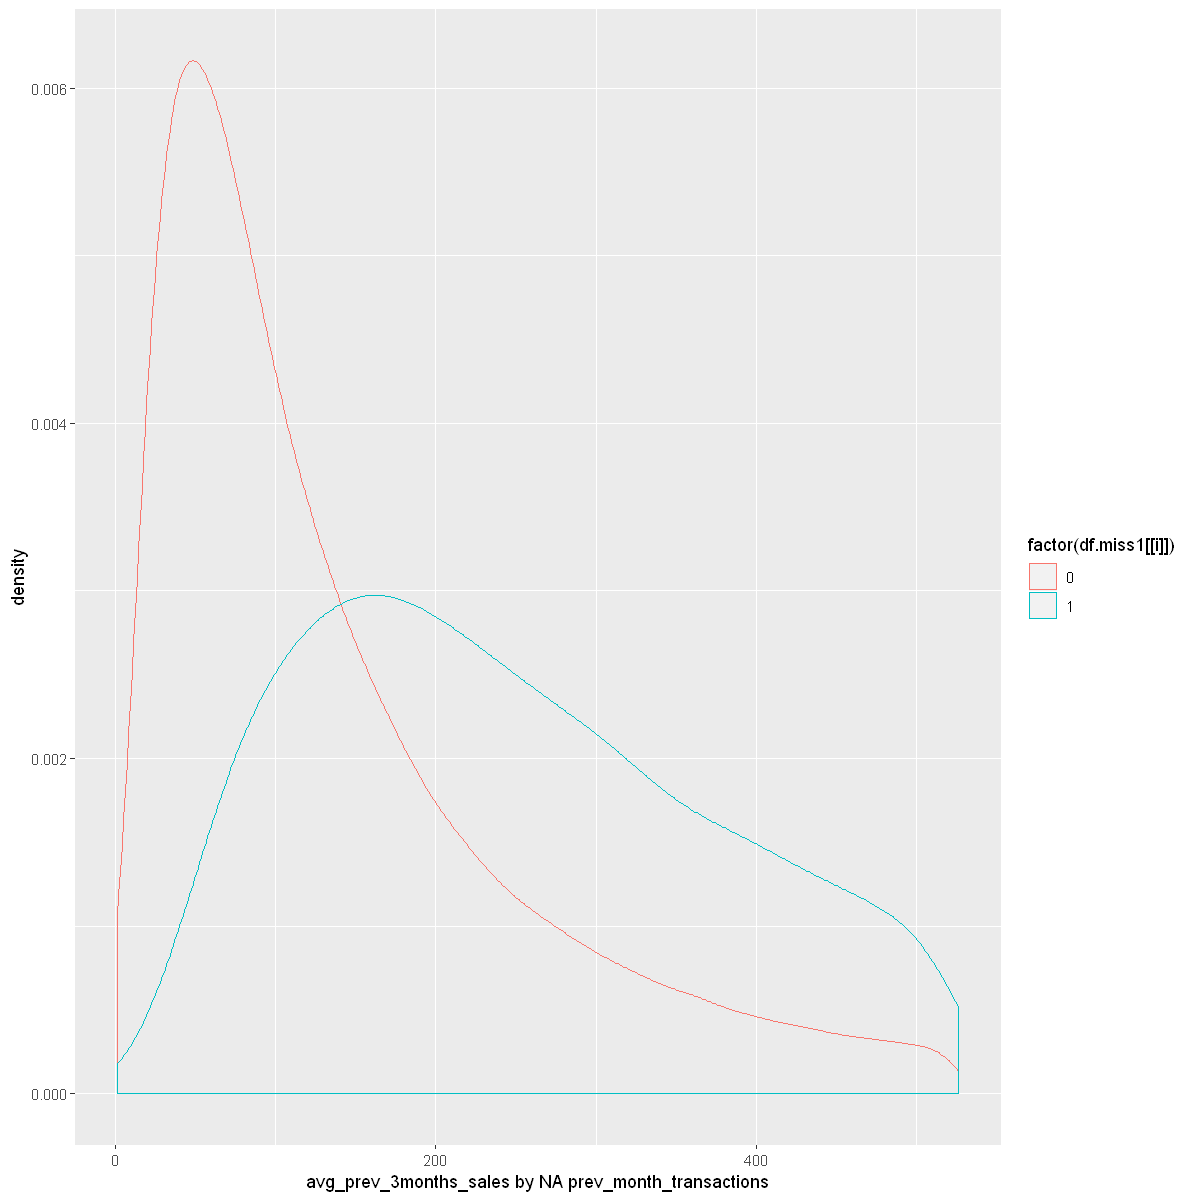


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -226.73, df = 89591, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -87.99707 -86.48873
sample estimates:
mean of x mean of y 
 109.3848  196.6277 

[1] "min_prev_3months_sales by NA prev_month_transactions"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


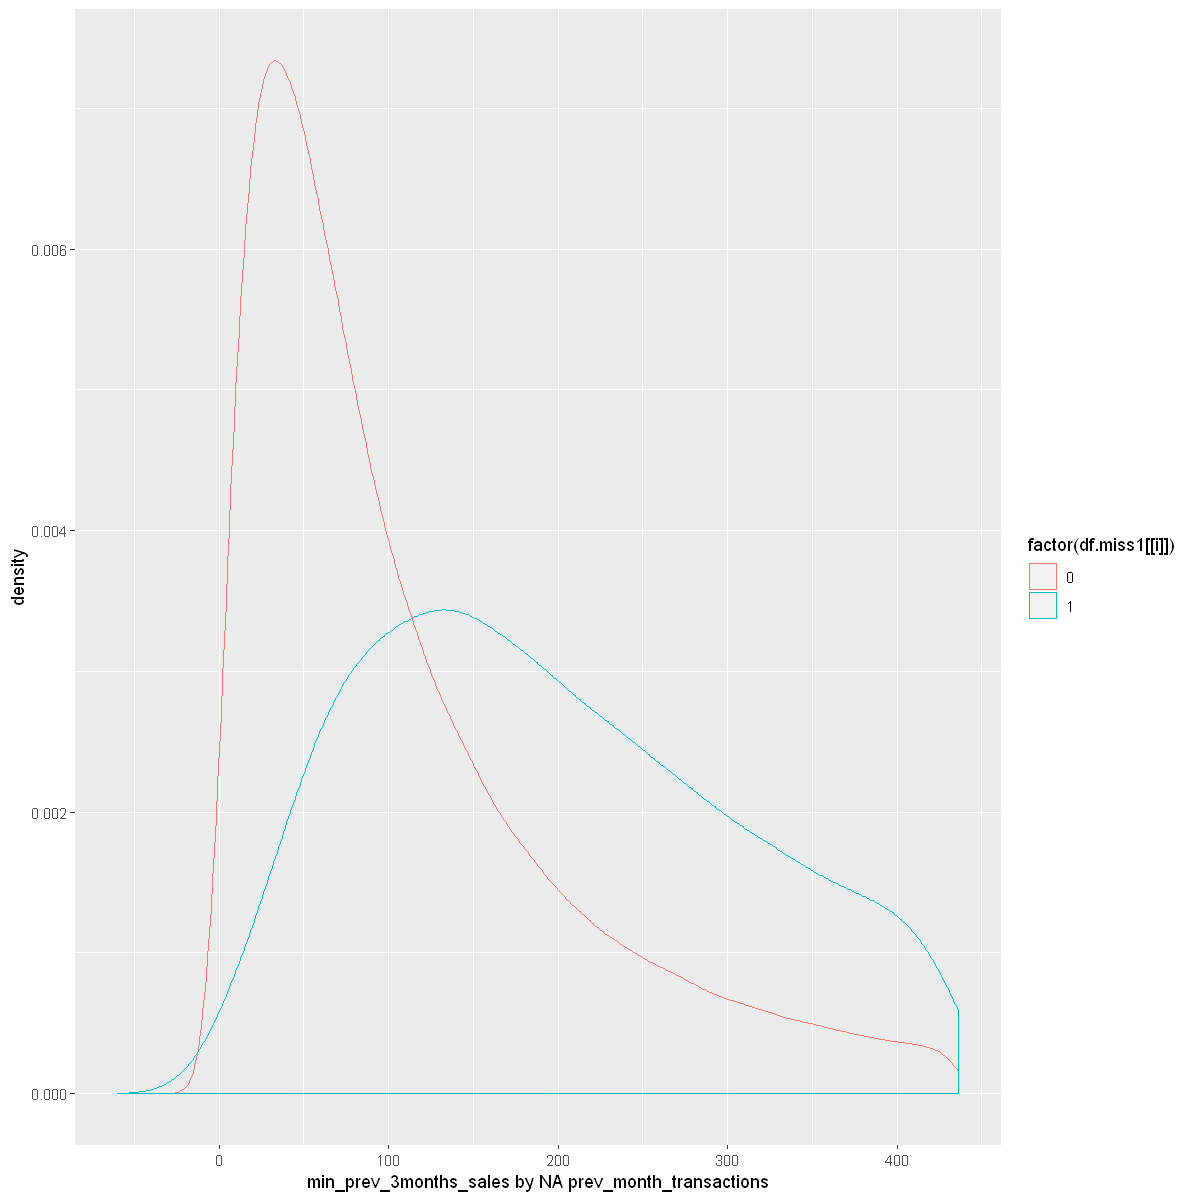


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -238.58, df = 90556, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -127.1778 -125.1053
sample estimates:
mean of x mean of y 
 165.7893  291.9308 

[1] "max_prev_3months_sales by NA prev_month_transactions"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


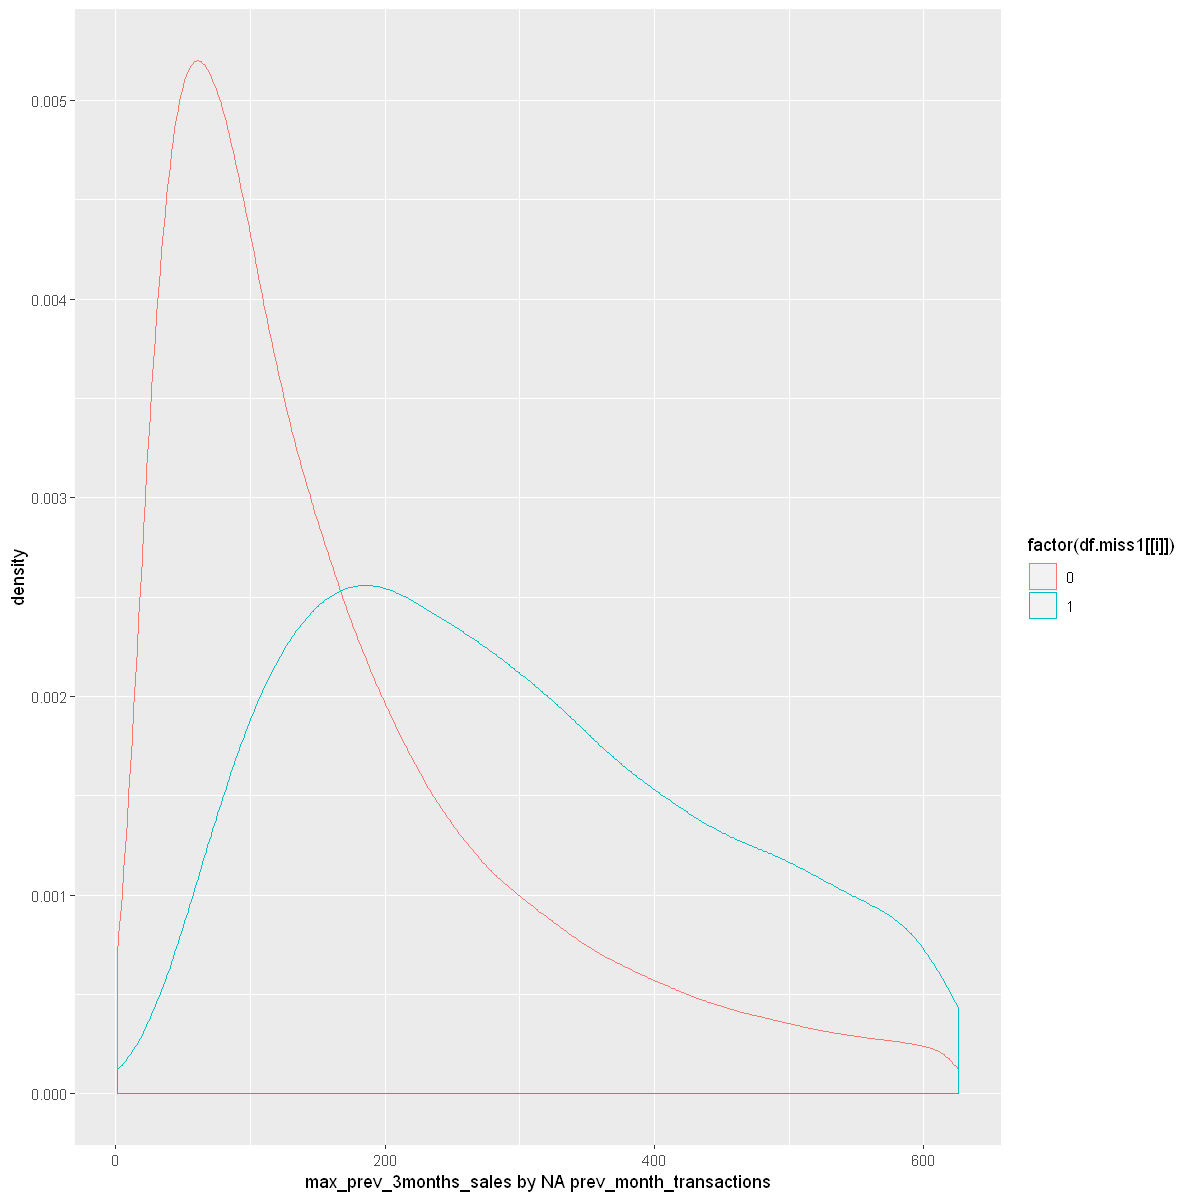


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -618.83, df = 30210, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -51712.44 -51385.89
sample estimates:
mean of x mean of y 
 45793.94  97343.10 

[1] "total_month_transactions by NA prev_month_transactions"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."


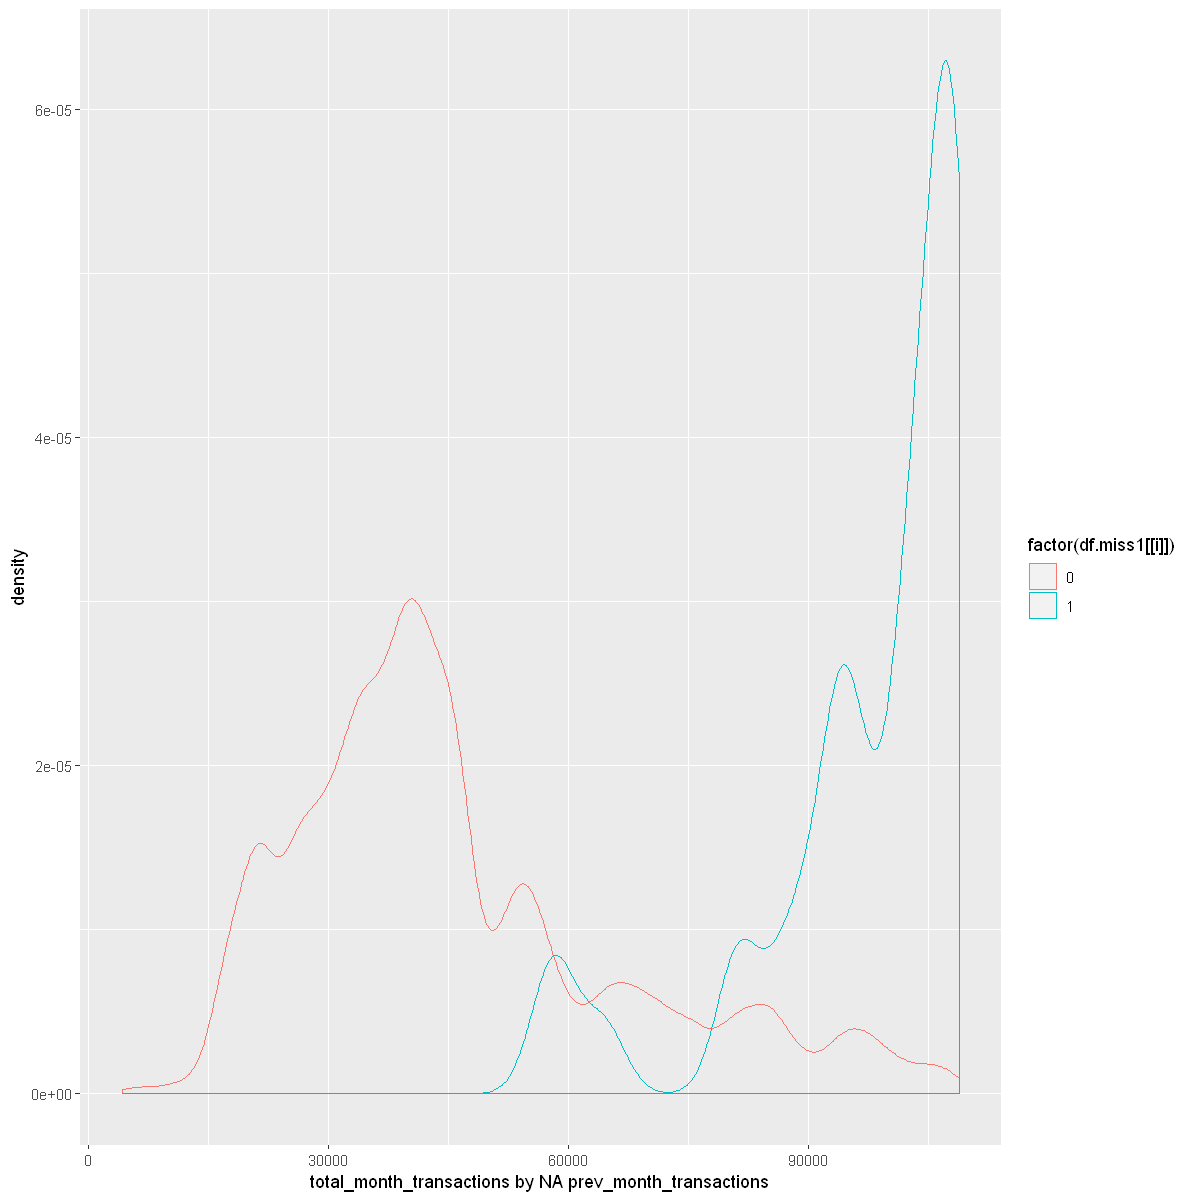


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1400.1, df = 45847, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56888.13 -56729.07
sample estimates:
mean of x mean of y 
 46380.71 103189.31 

[1] "prev_3month_transactions by NA prev_month_transactions"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


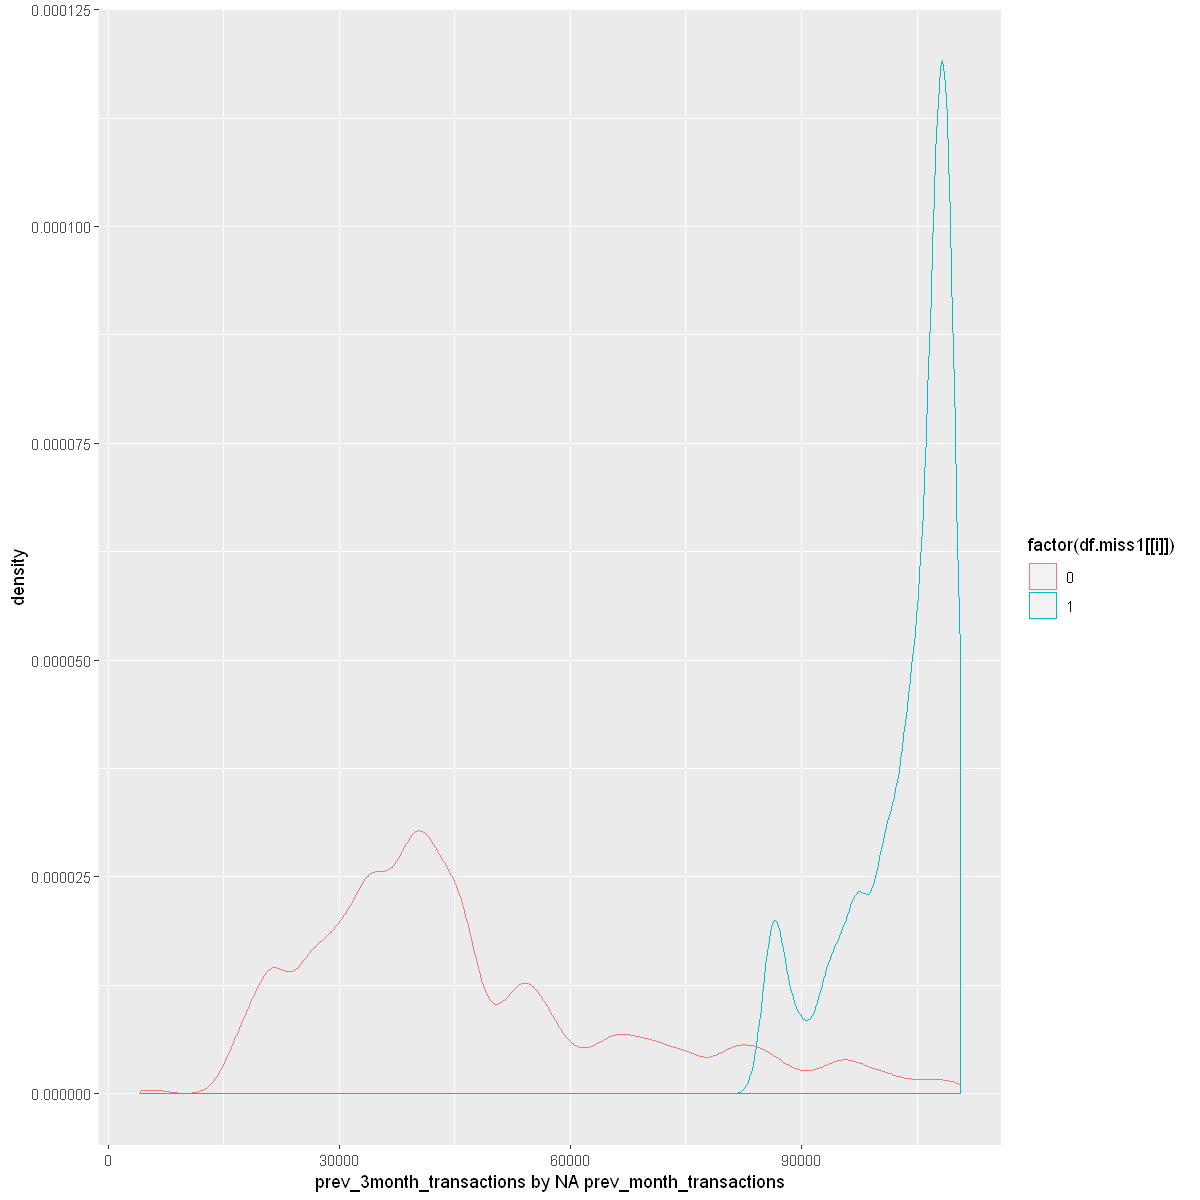


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1476.5, df = 19007, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -55419.20 -55272.25
sample estimates:
mean of x mean of y 
 46379.76 101725.49 

[1] "avg_prev_3months_transactions by NA prev_month_transactions"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


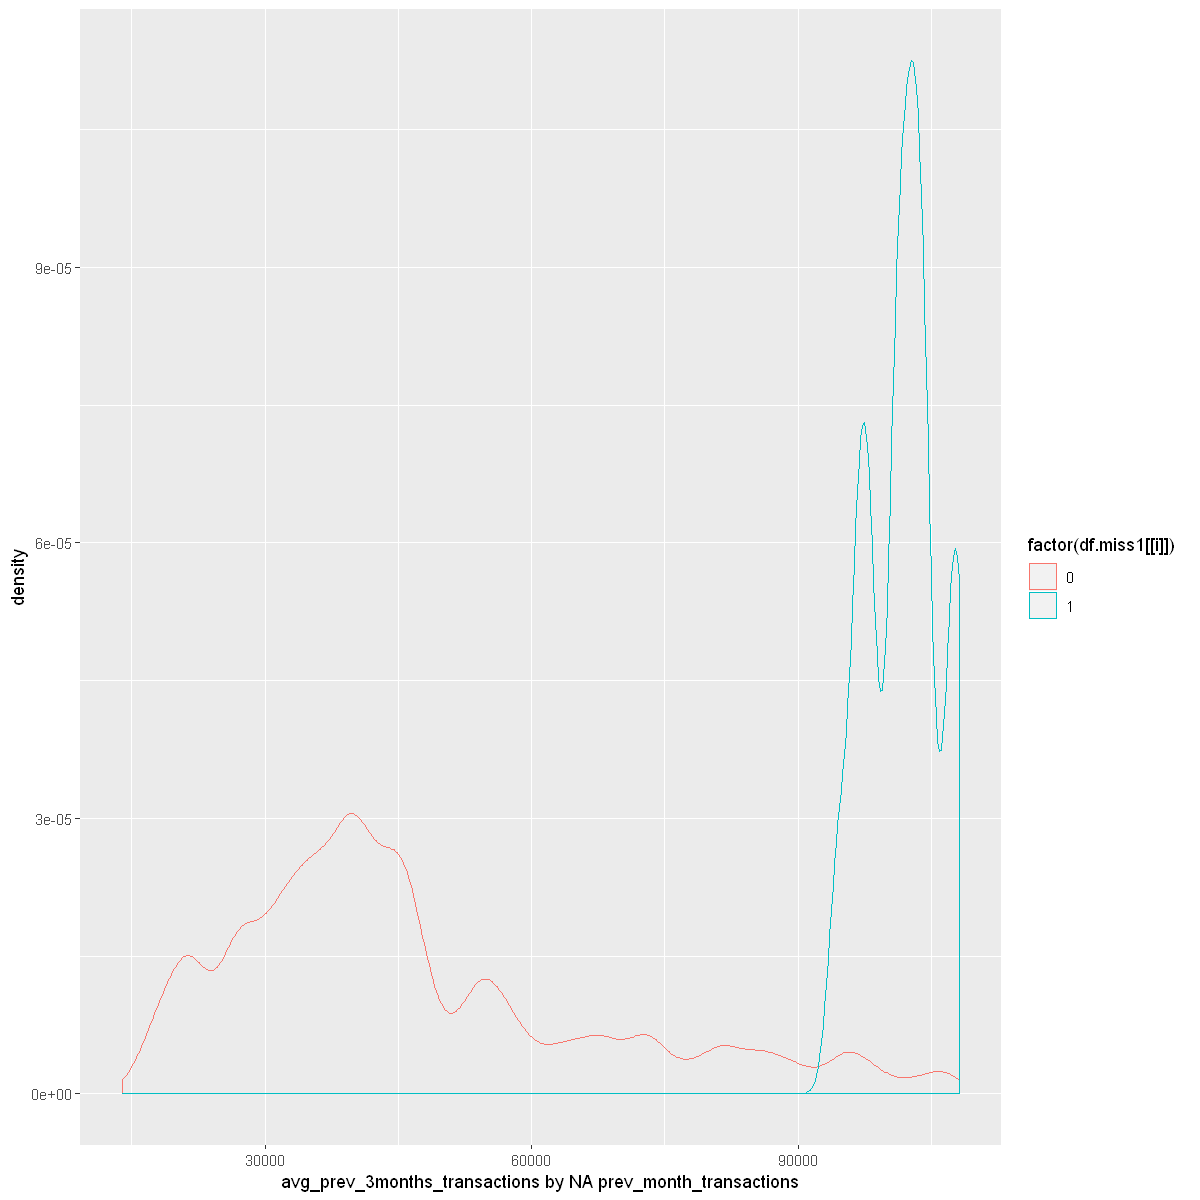


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -406.1, df = 15378, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -44439.10 -44012.18
sample estimates:
mean of x mean of y 
 43226.76  87452.40 

[1] "min_prev_3months_transactions by NA prev_month_transactions"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


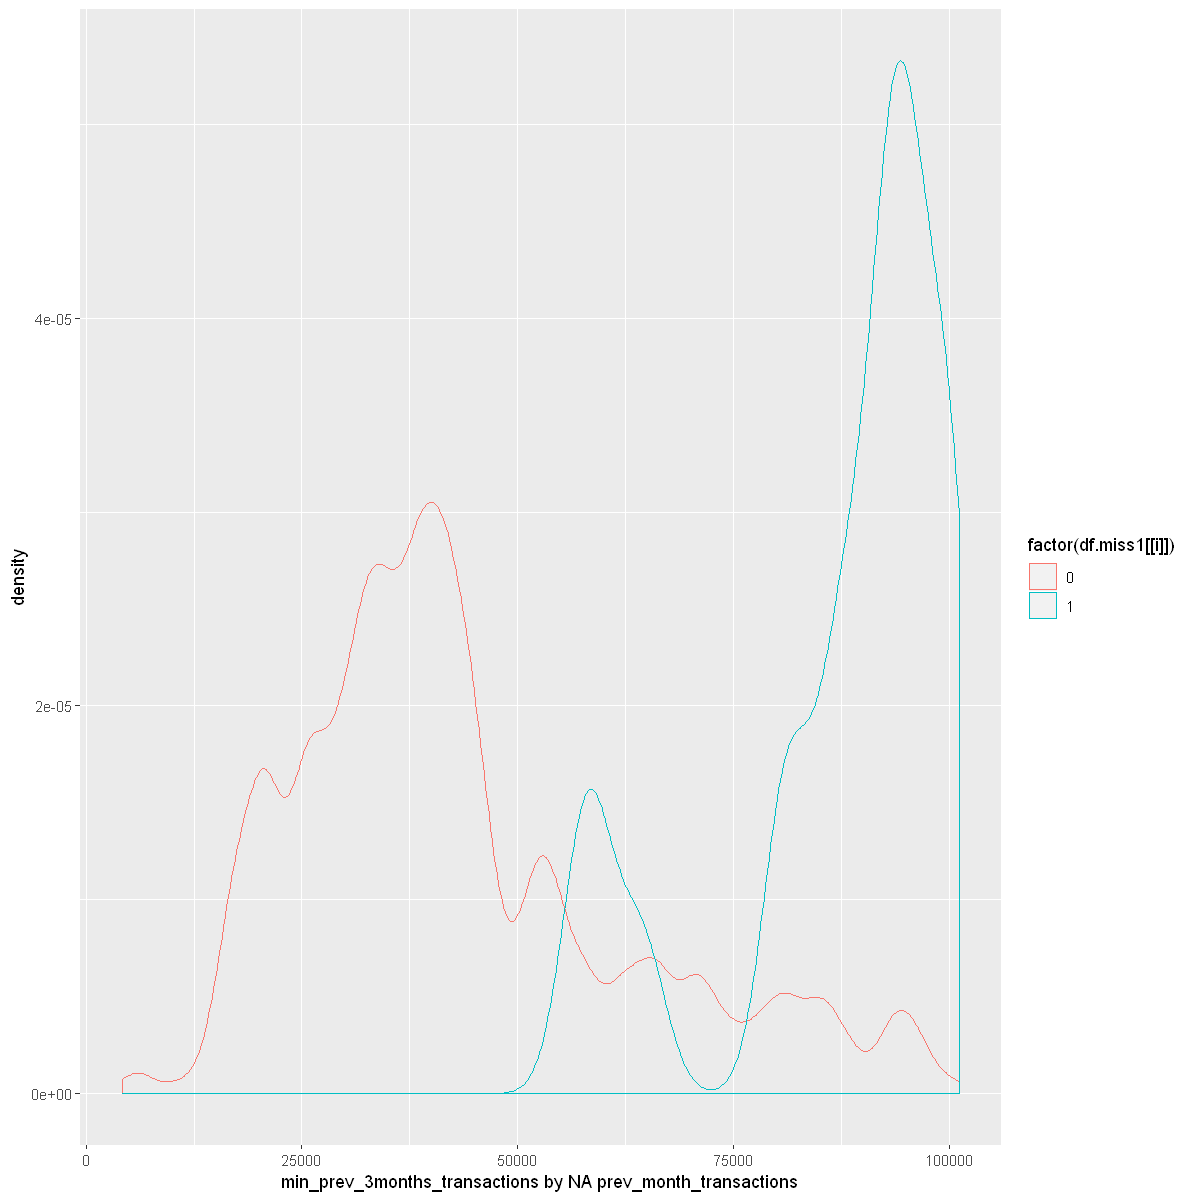


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3221.8, df = 140581, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -64547.00 -64468.51
sample estimates:
mean of x mean of y 
 49113.84 113621.60 

[1] "max_prev_3months_transactions by NA prev_month_transactions"


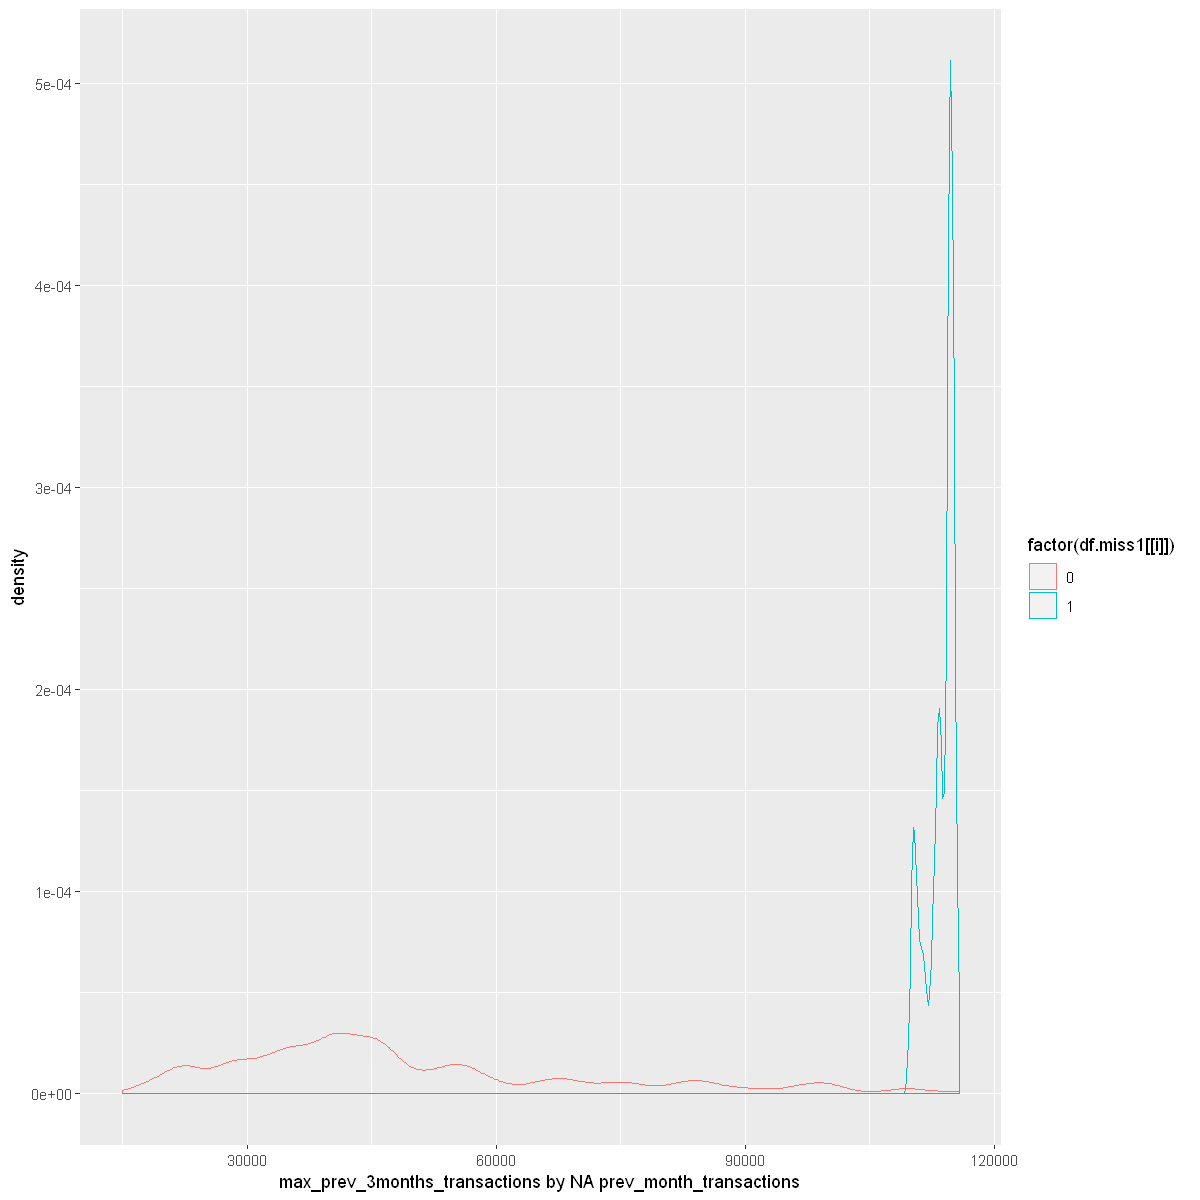


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -139.49, df = 119994, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -296.4172 -288.2026
sample estimates:
mean of x mean of y 
 208.1817  500.4916 

[1] "total_unit_sales by NA prev_month_transactions"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


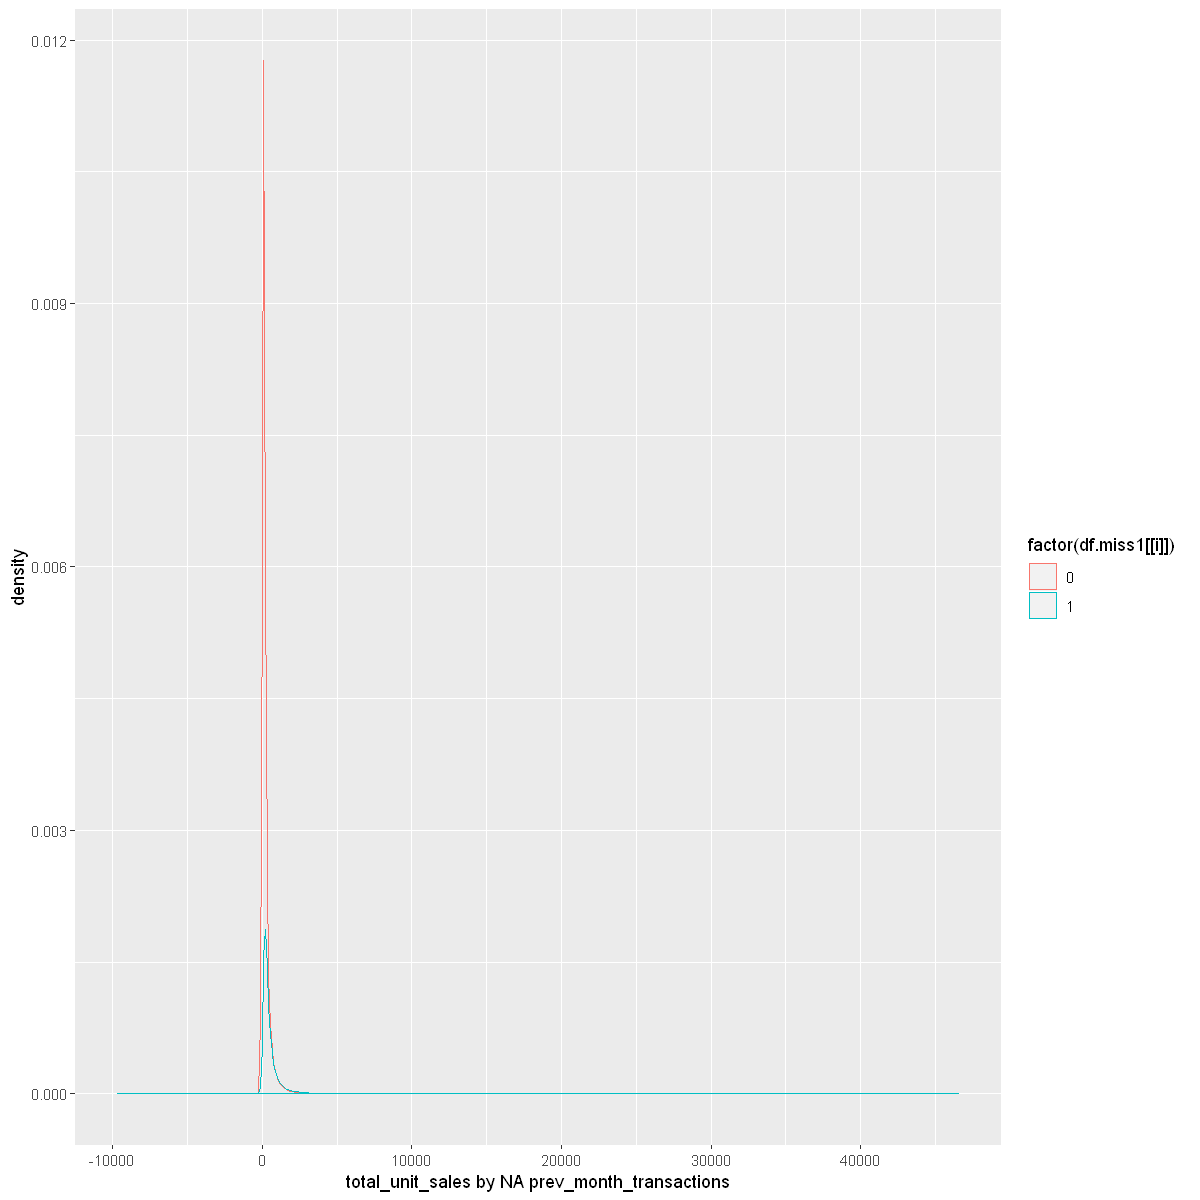


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -221.13, df = 85712, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -104.4311 -102.5961
sample estimates:
mean of x mean of y 
 136.8807  240.3944 

[1] "prev_month_sales by NA prev_3month_transactions"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


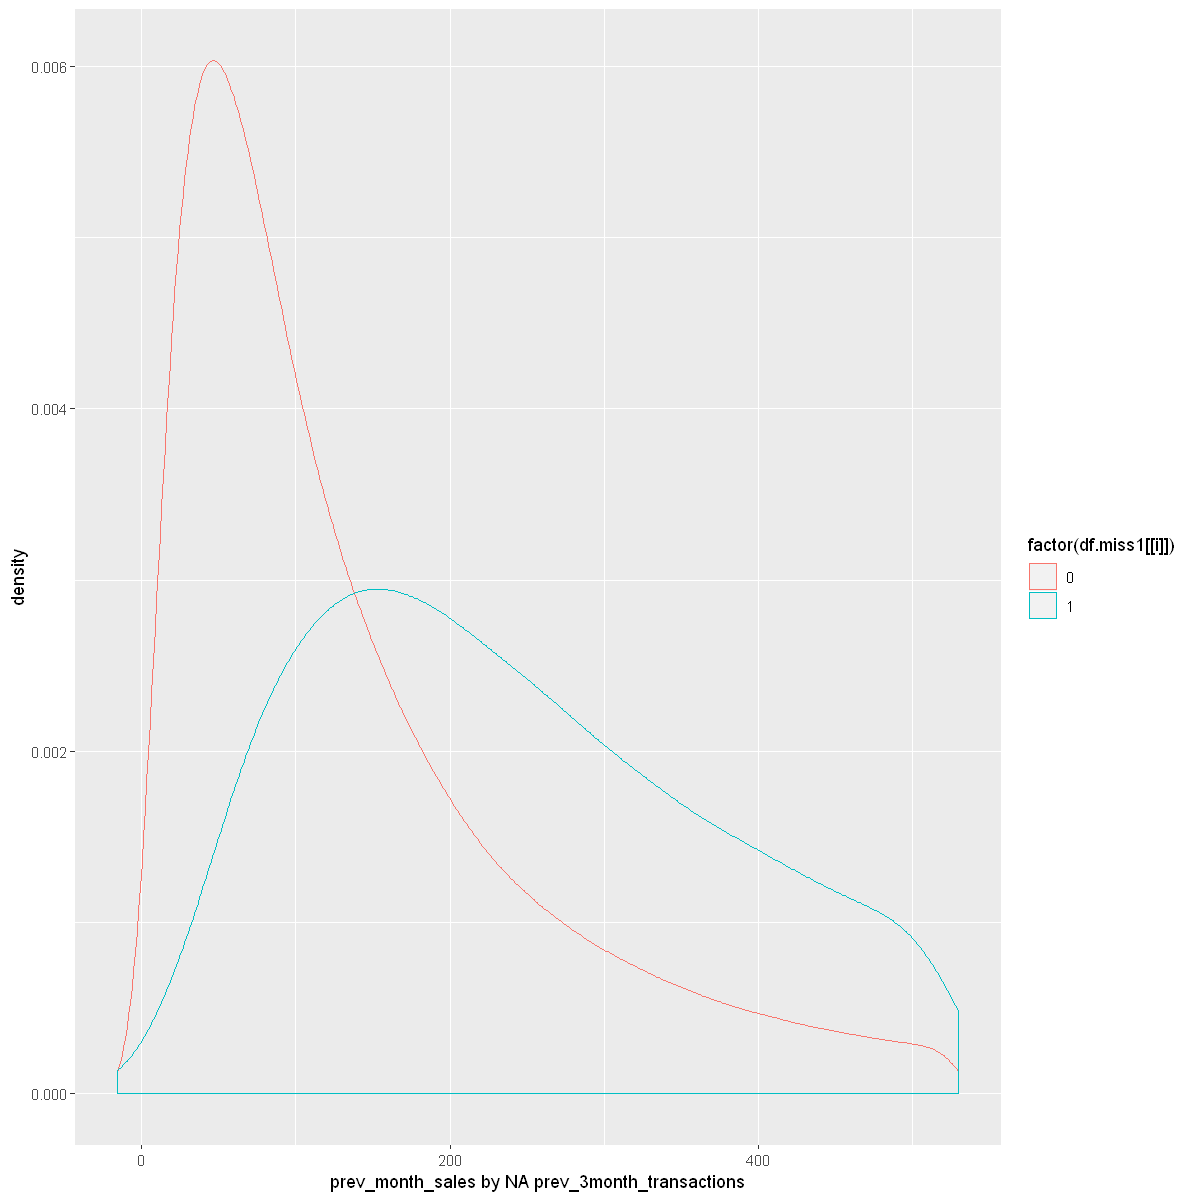


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -227.79, df = 84295, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -109.1062 -107.2447
sample estimates:
mean of x mean of y 
 137.3342  245.5097 

[1] "prev_3month_sales by NA prev_3month_transactions"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


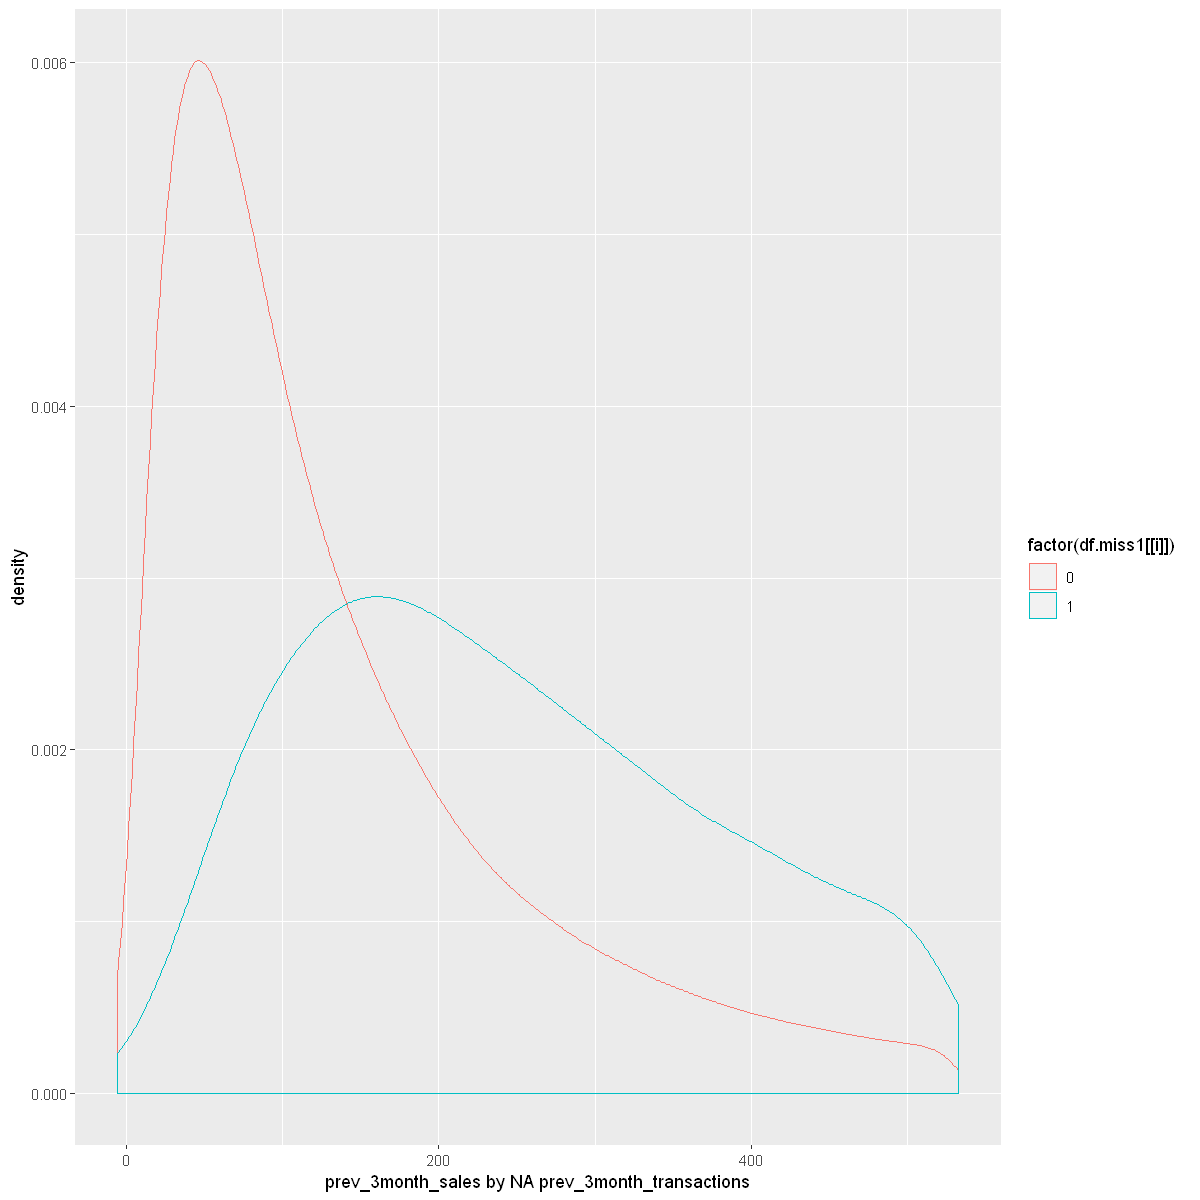


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -230.93, df = 85267, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -107.1093 -105.3064
sample estimates:
mean of x mean of y 
 137.9838  244.1917 

[1] "avg_prev_3months_sales by NA prev_3month_transactions"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


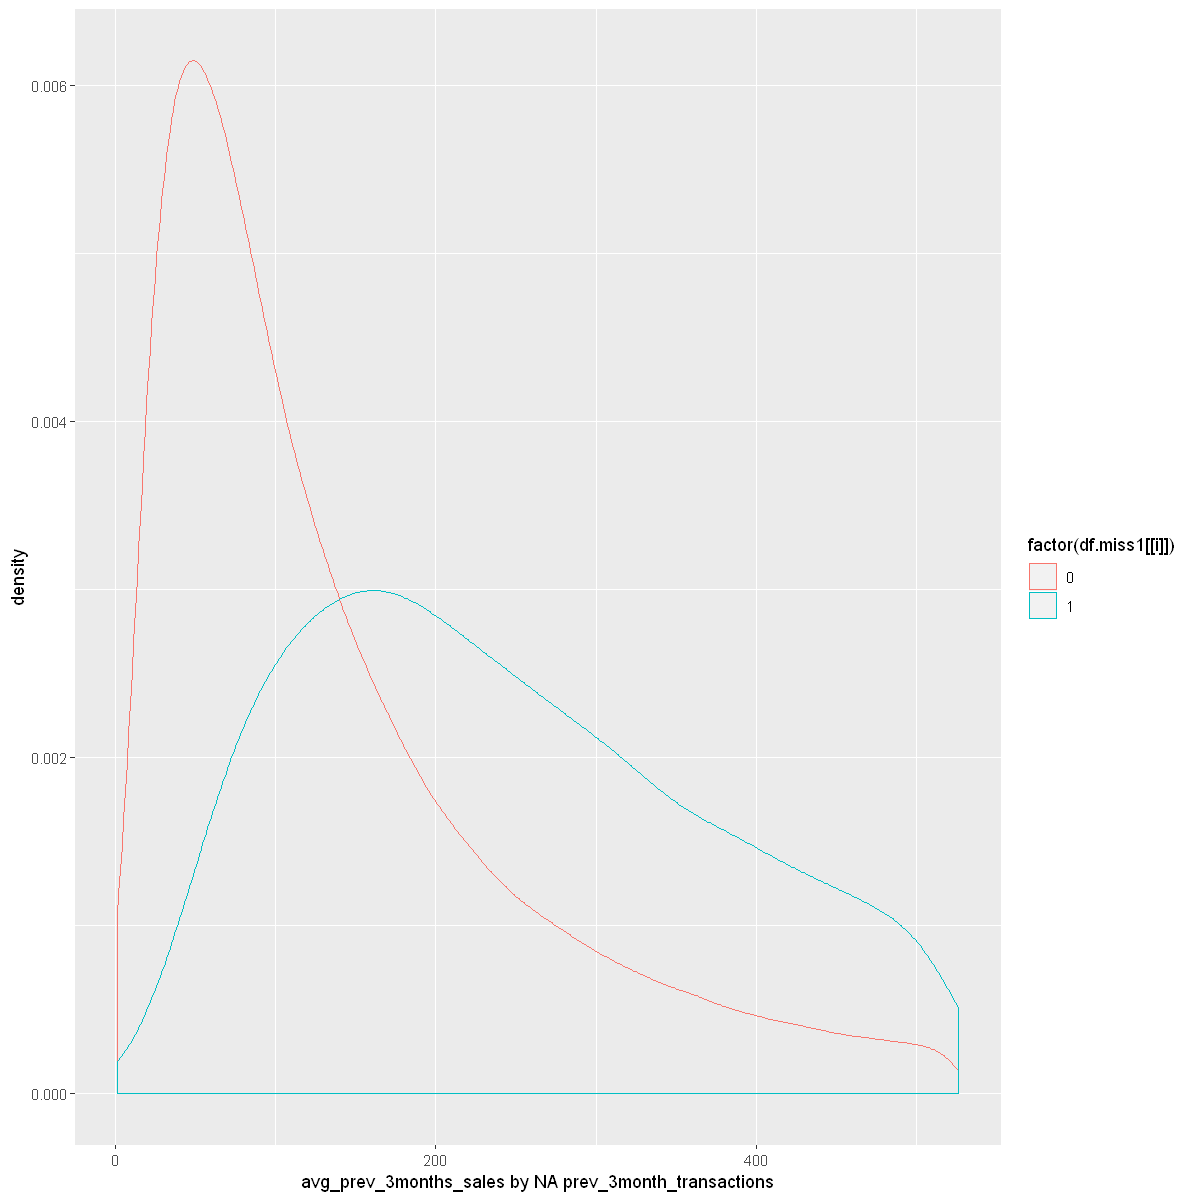


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -216.24, df = 84654, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -86.22945 -84.68032
sample estimates:
mean of x mean of y 
 109.6730  195.1278 

[1] "min_prev_3months_sales by NA prev_3month_transactions"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


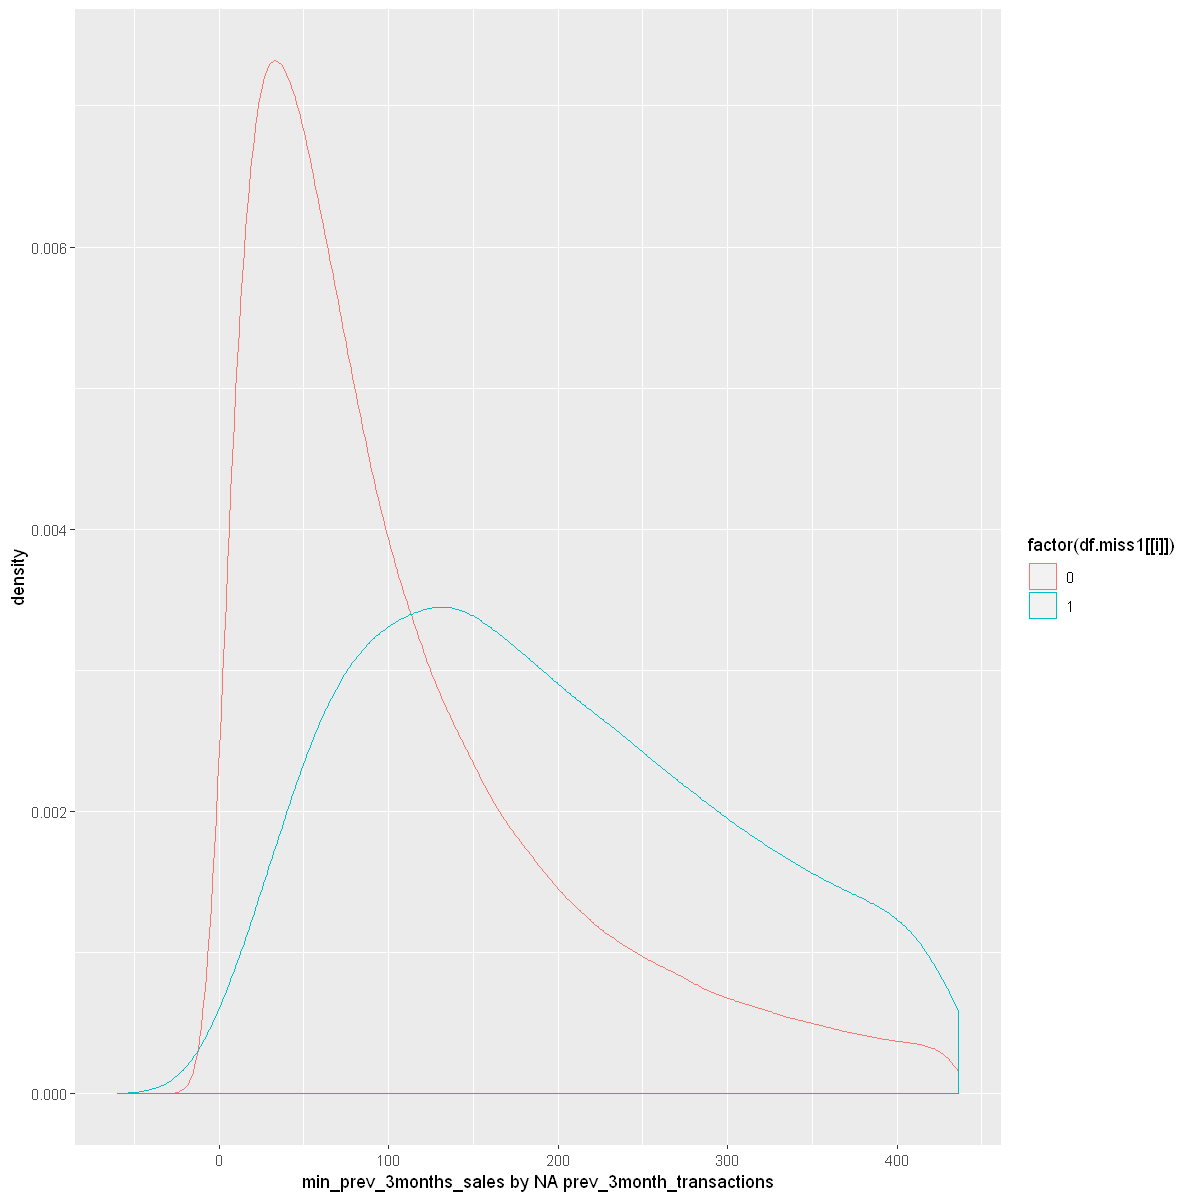


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -228.54, df = 85911, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -124.8157 -122.6930
sample estimates:
mean of x mean of y 
 166.1786  289.9330 

[1] "max_prev_3months_sales by NA prev_3month_transactions"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -478.64, df = 25181, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -50498.18 -50086.28
sample estimates:
mean of x mean of y 
 45924.15  96216.38 

[1] "total_month_transactions by NA prev_3month_transactions"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."


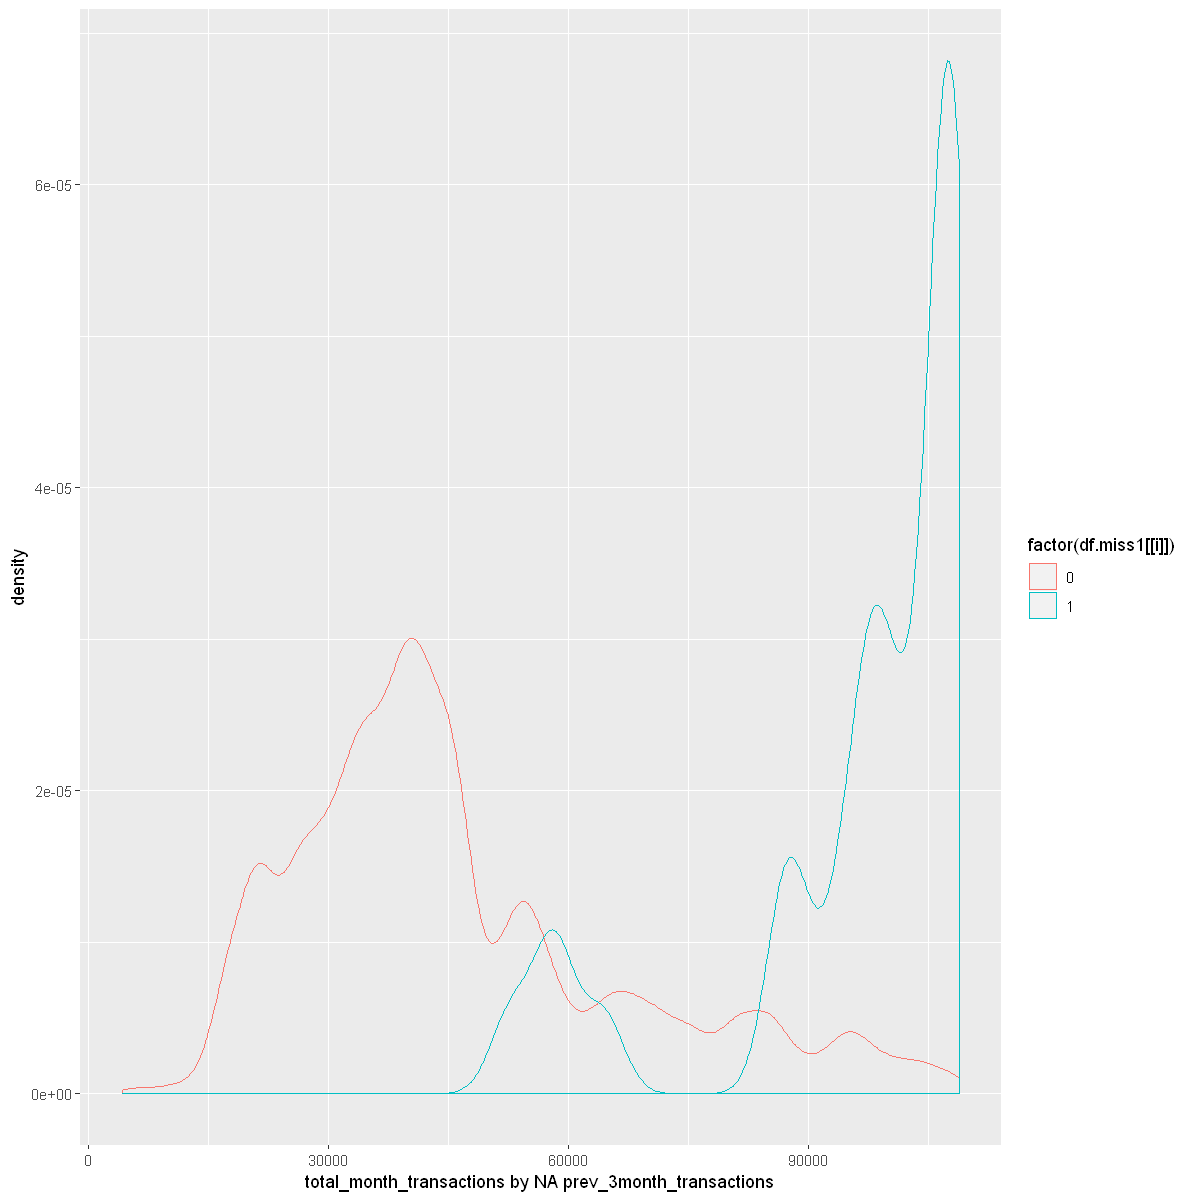


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -876.51, df = 31110, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -53406.15 -53167.83
sample estimates:
mean of x mean of y 
 46542.61  99829.60 

[1] "prev_month_transactions by NA prev_3month_transactions"


Warning message:
"Removed 127777 rows containing non-finite values (stat_density)."


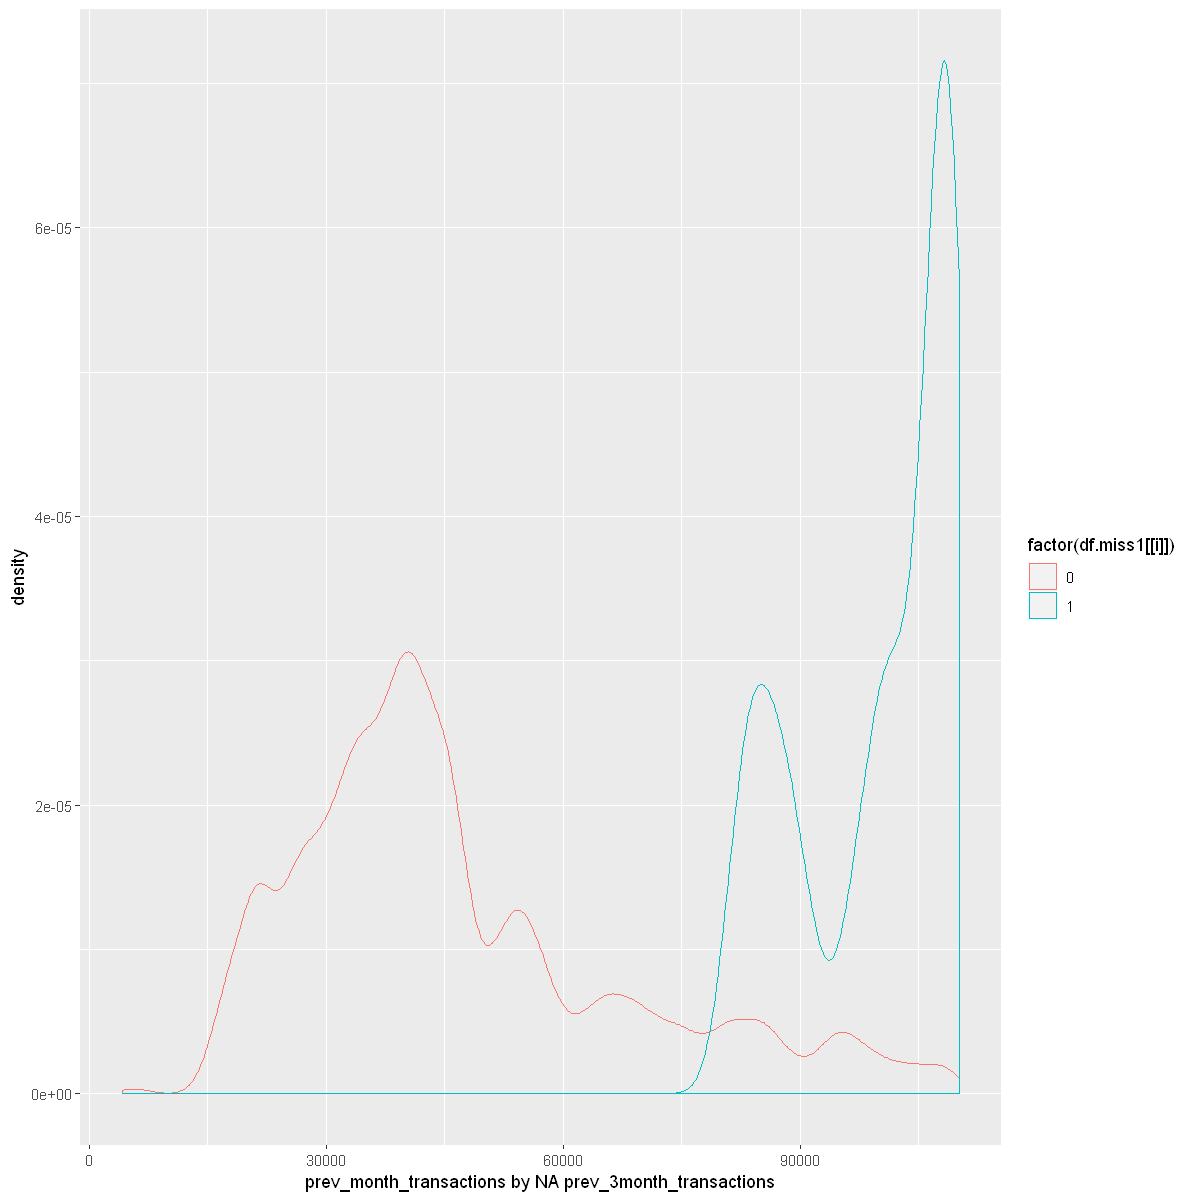


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -817.43, df = 19968, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -50749.17 -50506.37
sample estimates:
mean of x mean of y 
 46292.77  96920.55 

[1] "avg_prev_3months_transactions by NA prev_3month_transactions"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -343.08, df = 15624, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -40199.48 -39742.75
sample estimates:
mean of x mean of y 
 43254.60  83225.72 

[1] "min_prev_3months_transactions by NA prev_3month_transactions"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."


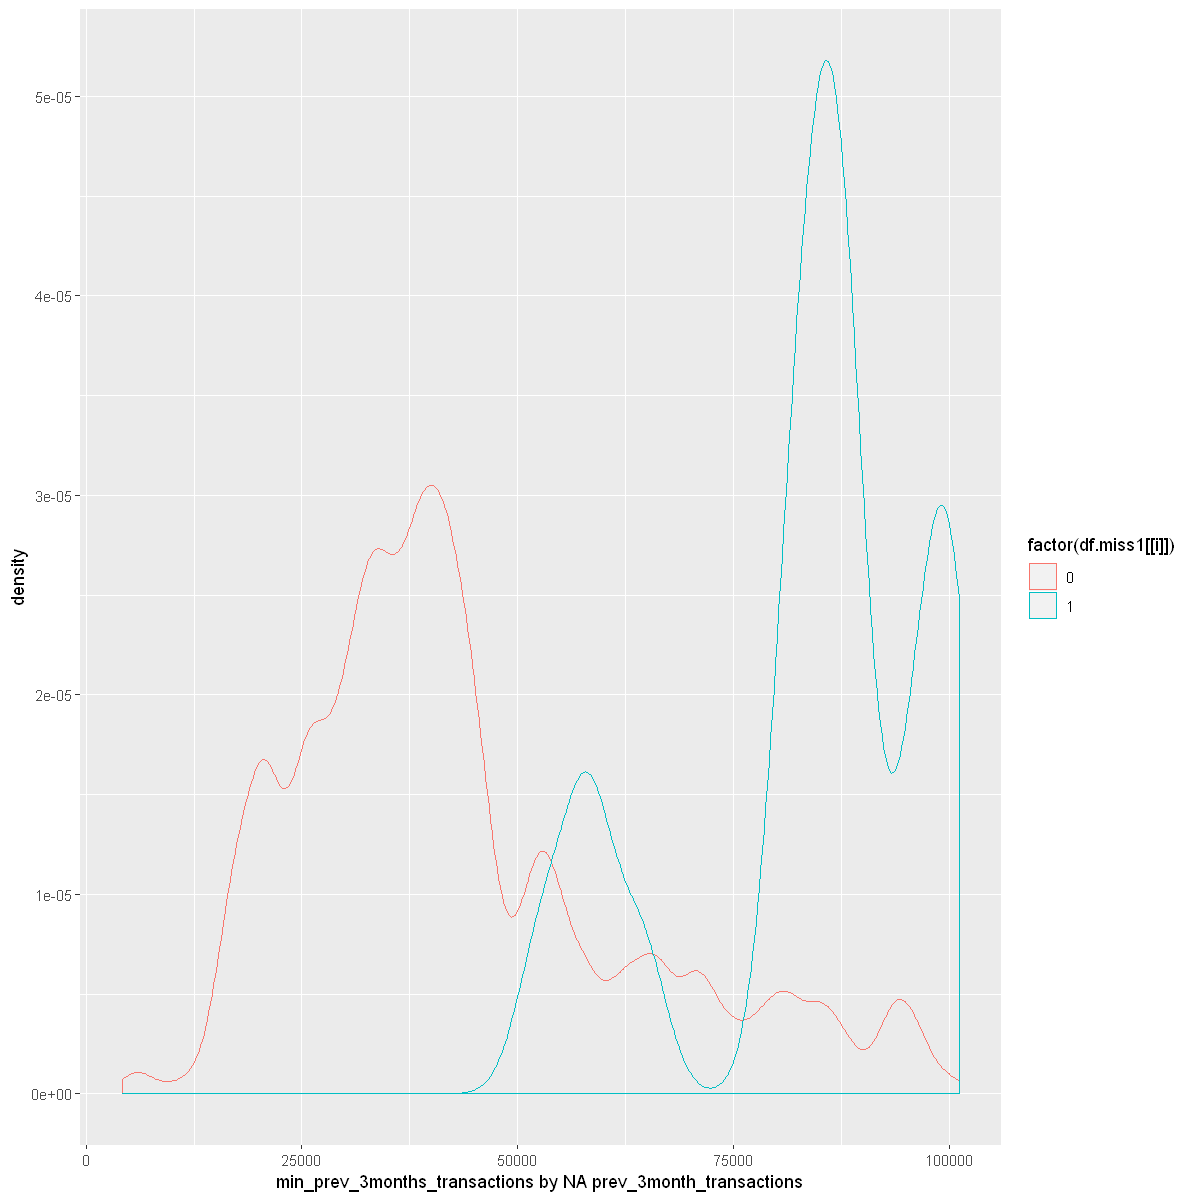


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1059.1, df = 34081, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -58229.62 -58014.50
sample estimates:
mean of x mean of y 
 48858.05 106980.10 

[1] "max_prev_3months_transactions by NA prev_3month_transactions"


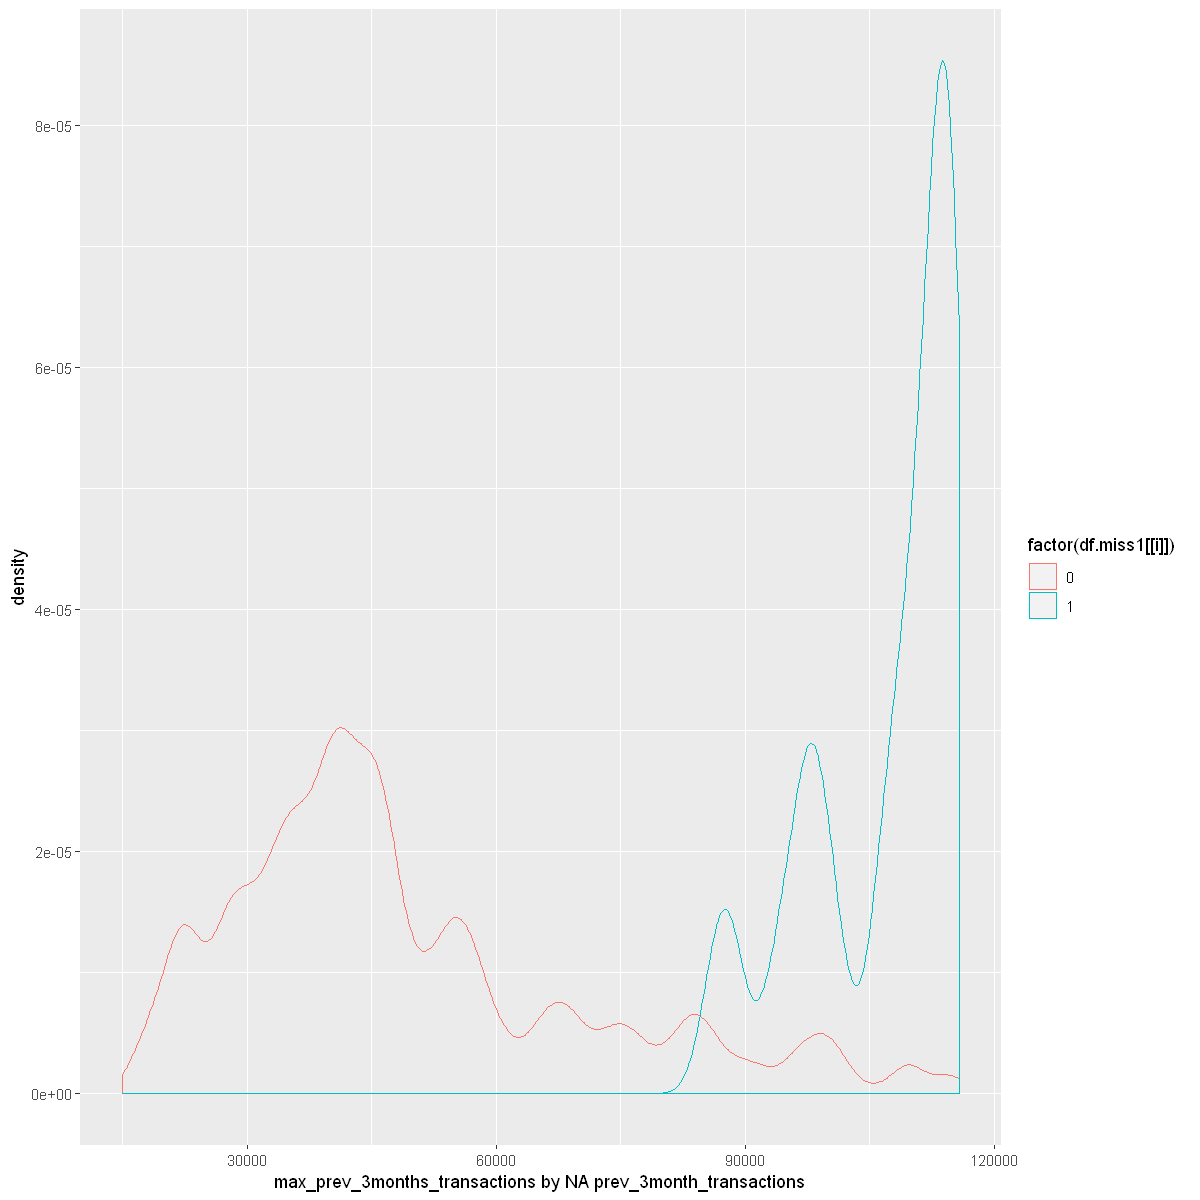


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -134.24, df = 113259, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -292.3654 -283.9507
sample estimates:
mean of x mean of y 
 209.3591  497.5171 

[1] "total_unit_sales by NA prev_3month_transactions"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


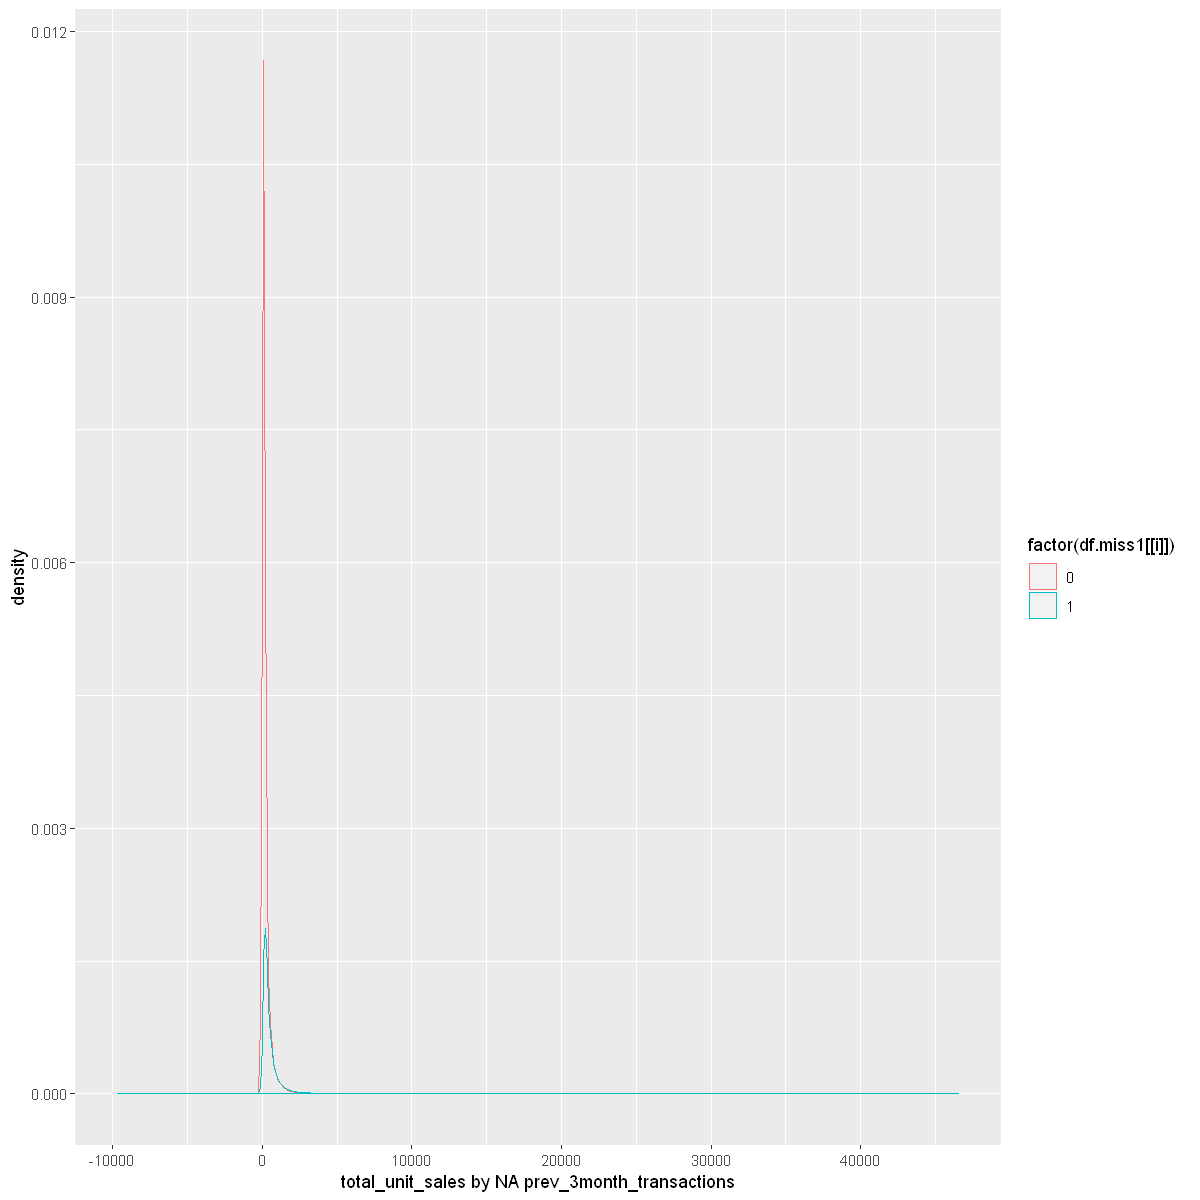


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -249.46, df = 99763, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -109.6650 -107.9551
sample estimates:
mean of x mean of y 
 135.9105  244.7205 

[1] "prev_month_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."


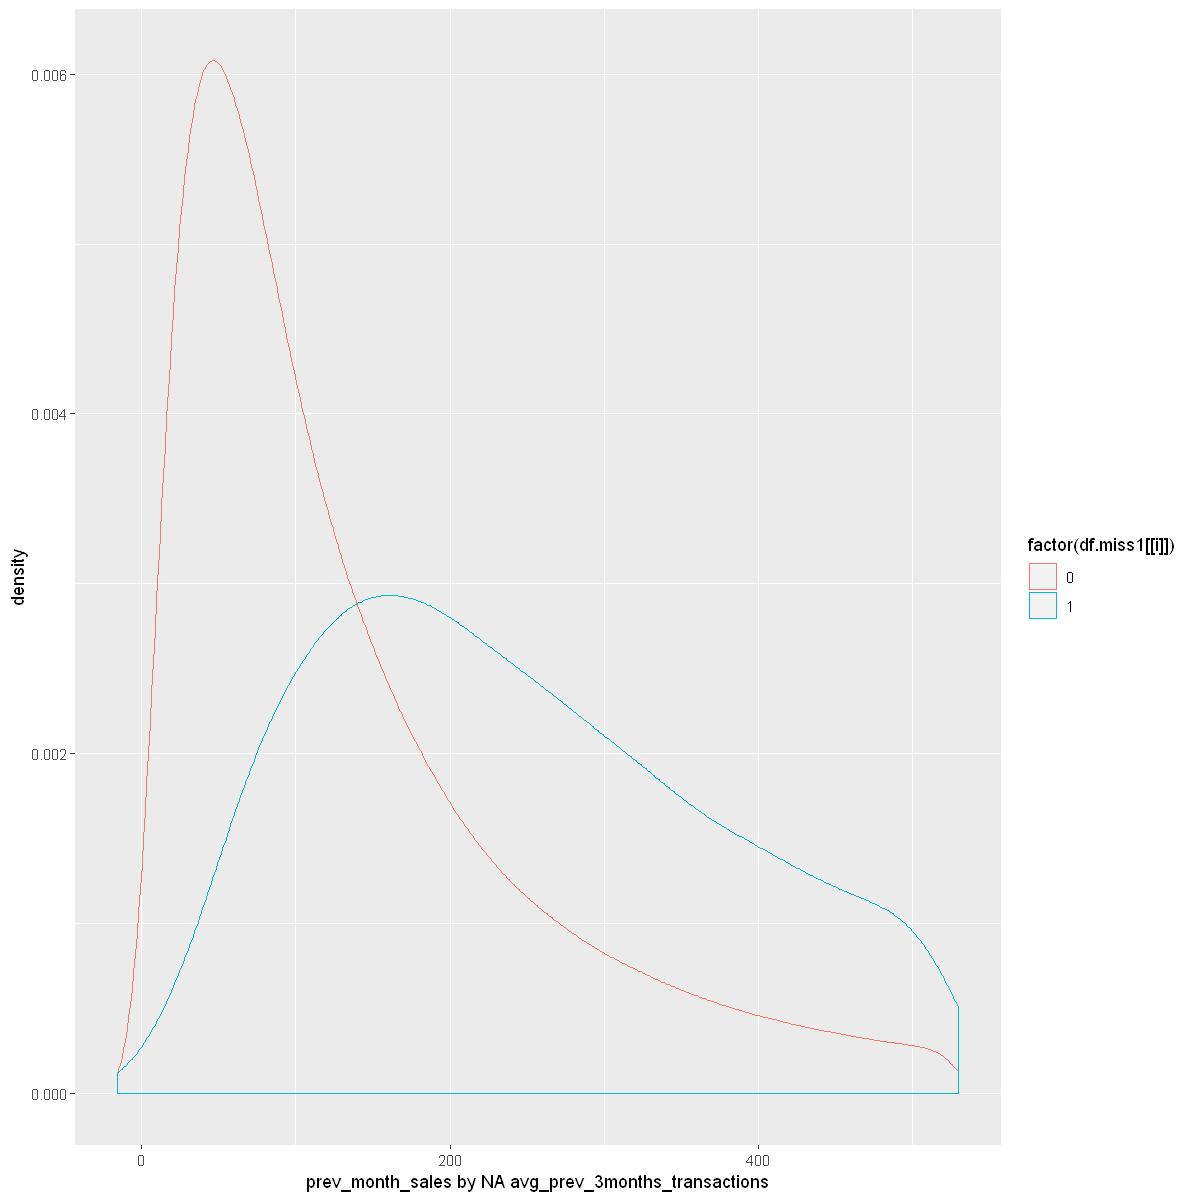


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -247.96, df = 100431, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -109.3119 -107.5974
sample estimates:
mean of x mean of y 
 136.4836  244.9382 

[1] "prev_3month_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -260.22, df = 99486, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -112.0603 -110.3849
sample estimates:
mean of x mean of y 
 137.0051  248.2277 

[1] "avg_prev_3months_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


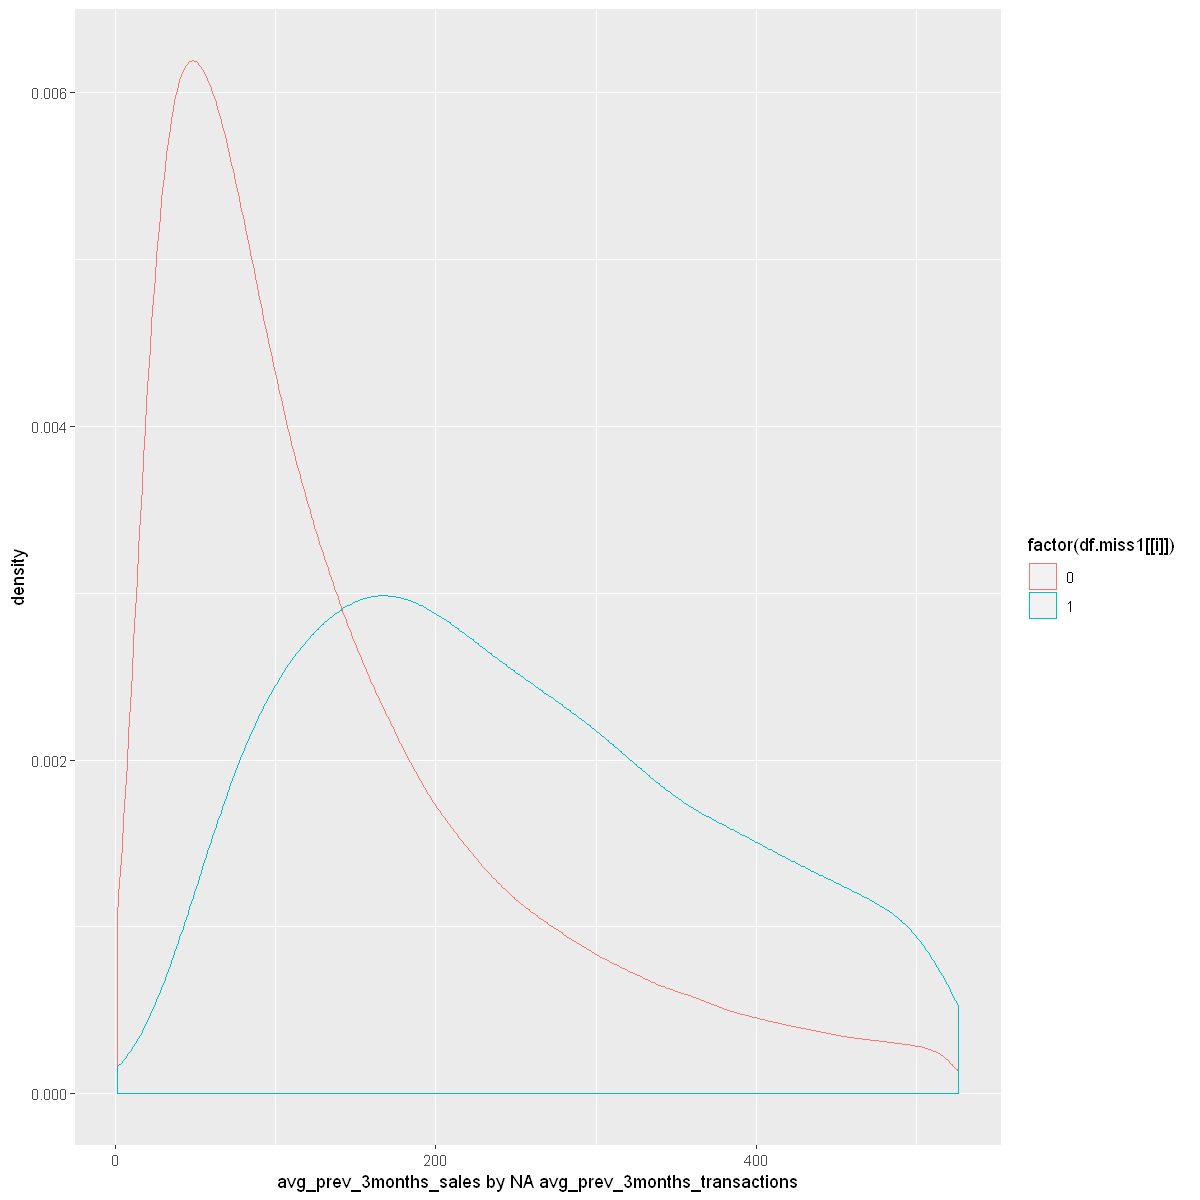


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -245.79, df = 98513, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -91.05220 -89.61152
sample estimates:
mean of x mean of y 
 108.8545  199.1863 

[1] "min_prev_3months_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 182080 rows containing non-finite values (stat_density)."


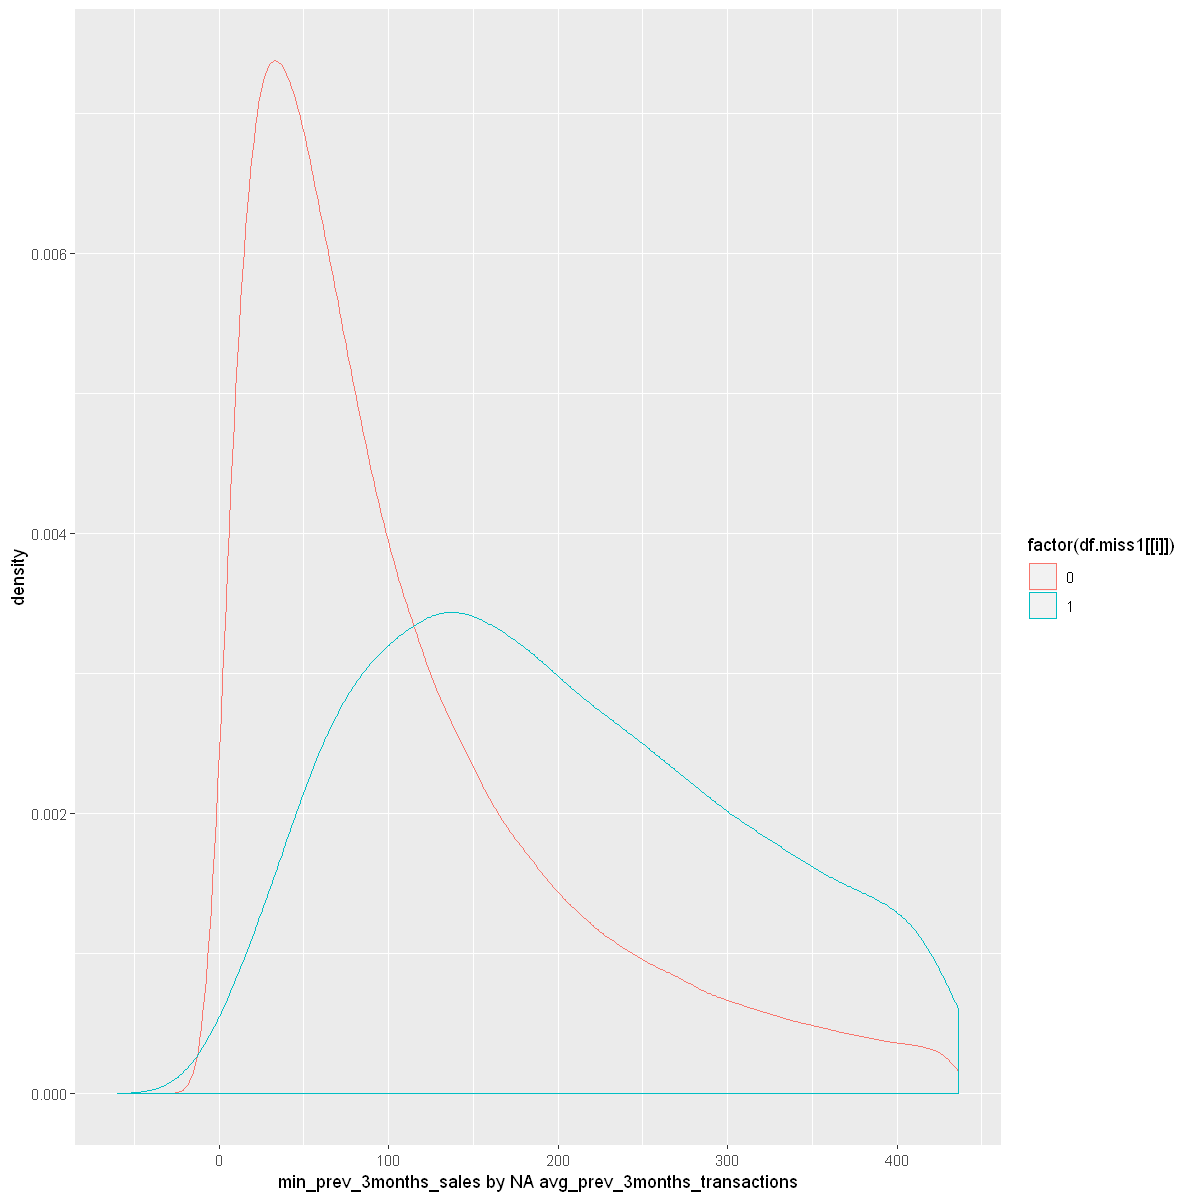


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -256.68, df = 100280, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -130.2284 -128.2547
sample estimates:
mean of x mean of y 
 165.0469  294.2885 

[1] "max_prev_3months_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 122904 rows containing non-finite values (stat_density)."


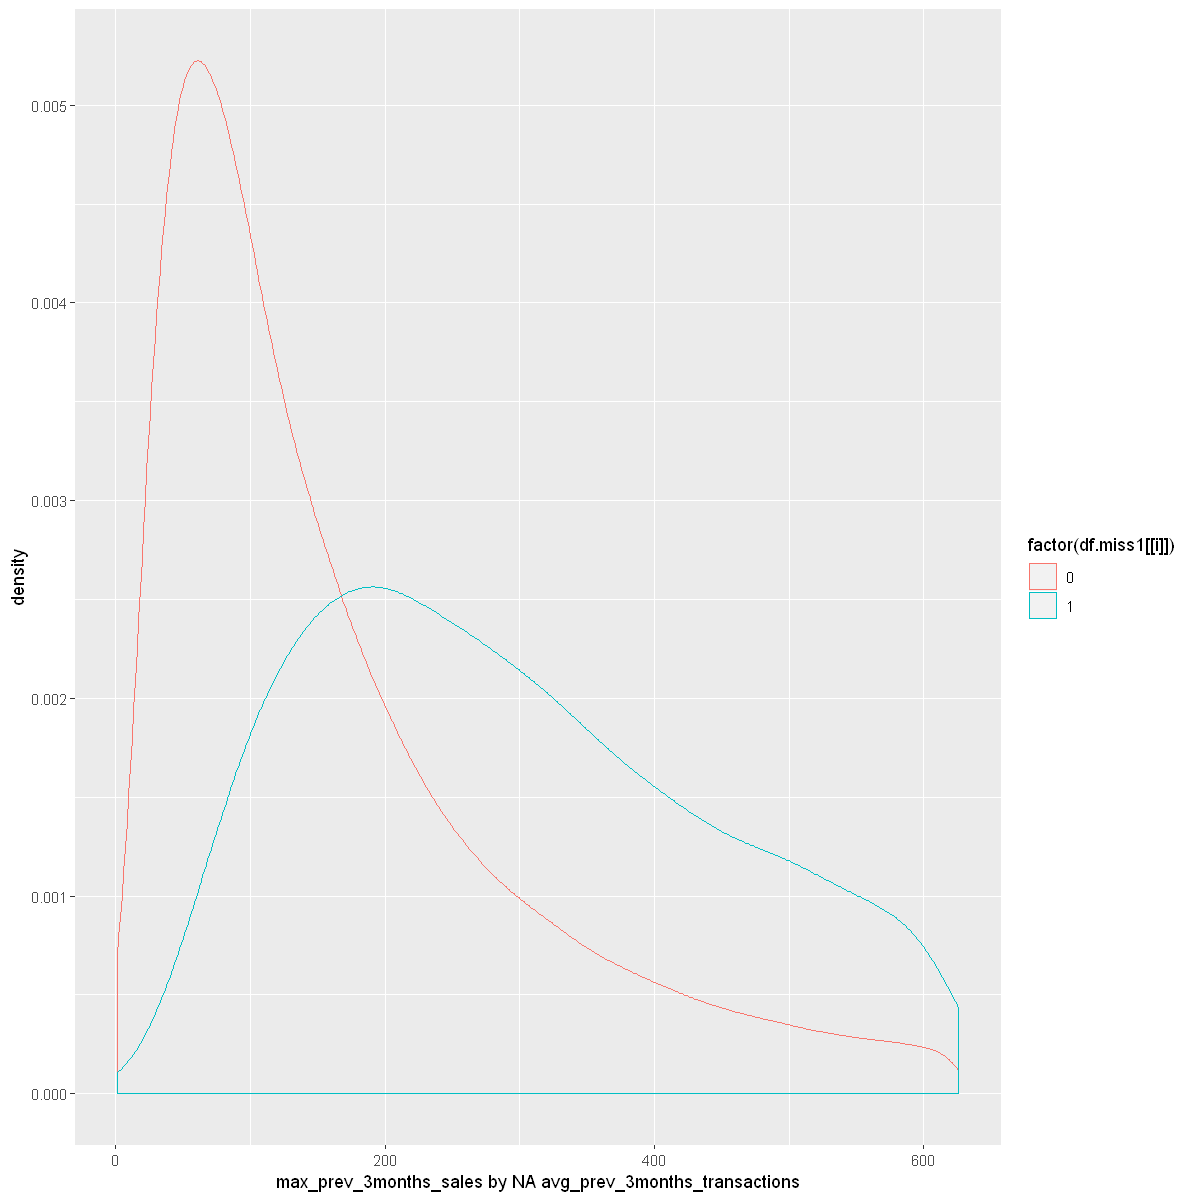


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -912.94, df = 23337, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57831.22 -57583.43
sample estimates:
mean of x mean of y 
 45934.93 103642.25 

[1] "total_month_transactions by NA avg_prev_3months_transactions"


Warning message:
"Removed 116236 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2470.8, df = 67219, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -60439.49 -60343.67
sample estimates:
mean of x mean of y 
 46518.55 106910.13 

[1] "prev_month_transactions by NA avg_prev_3months_transactions"


Warning message:
"Removed 109840 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2505.4, df = 102440, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -59511.00 -59417.96
sample estimates:
mean of x mean of y 
 46270.86 105735.34 

[1] "prev_3month_transactions by NA avg_prev_3months_transactions"


Warning message:
"Removed 141897 rows containing non-finite values (stat_density)."


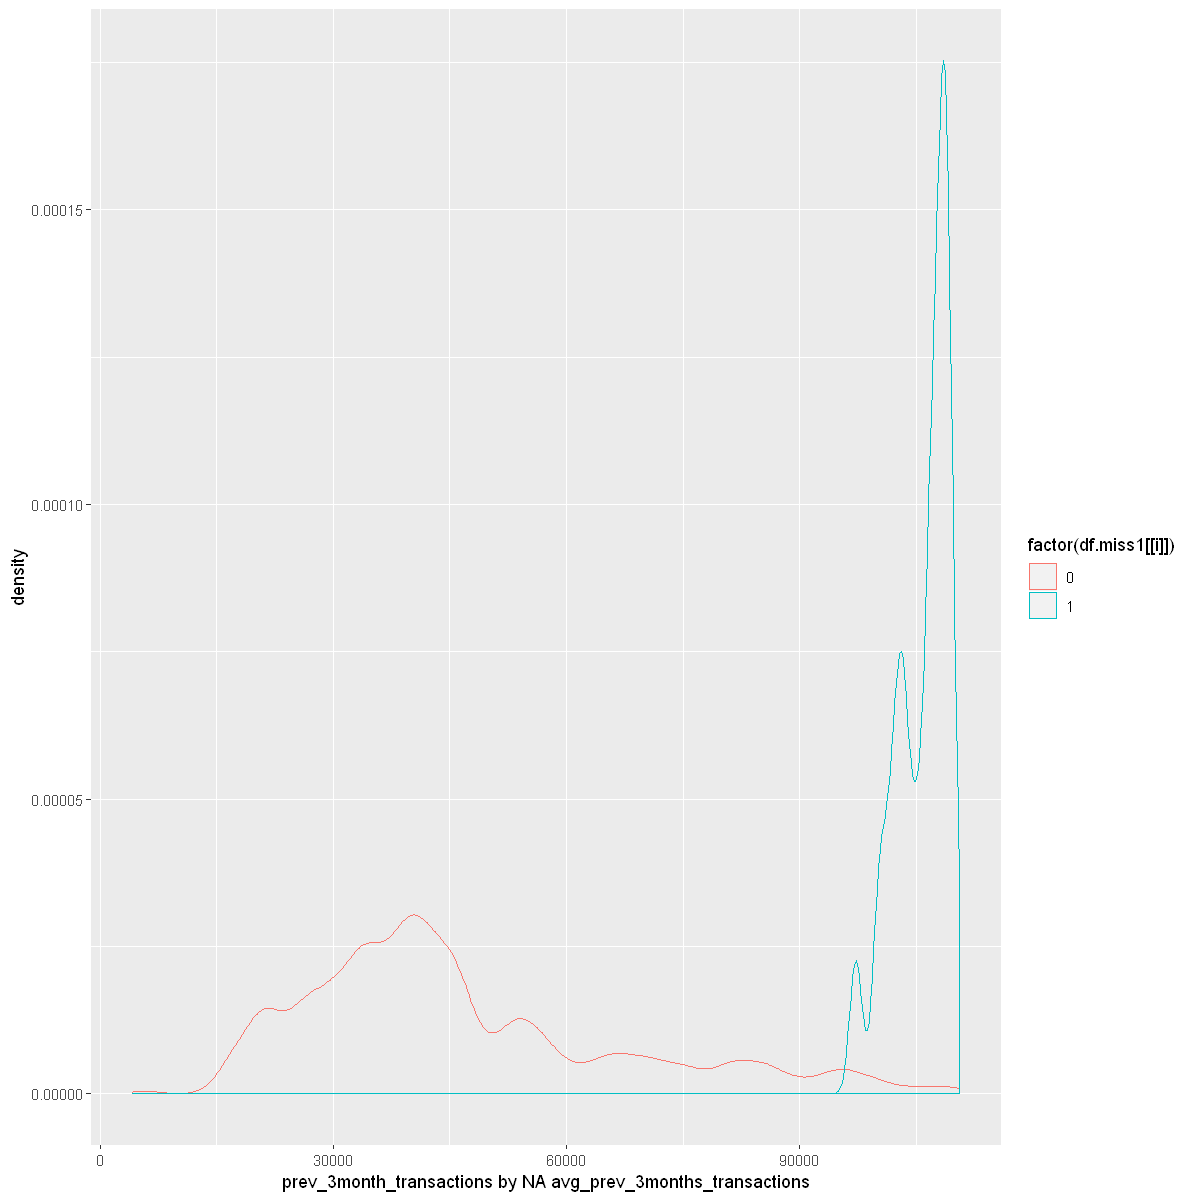


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -353.77, df = 6536.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -51214.70 -50650.23
sample estimates:
mean of x mean of y 
 43406.86  94339.32 

[1] "min_prev_3months_transactions by NA avg_prev_3months_transactions"


Warning message:
"Removed 125940 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3305.9, df = 187038, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -64719.44 -64642.74
sample estimates:
mean of x mean of y 
 48988.37 113669.46 

[1] "max_prev_3months_transactions by NA avg_prev_3months_transactions"


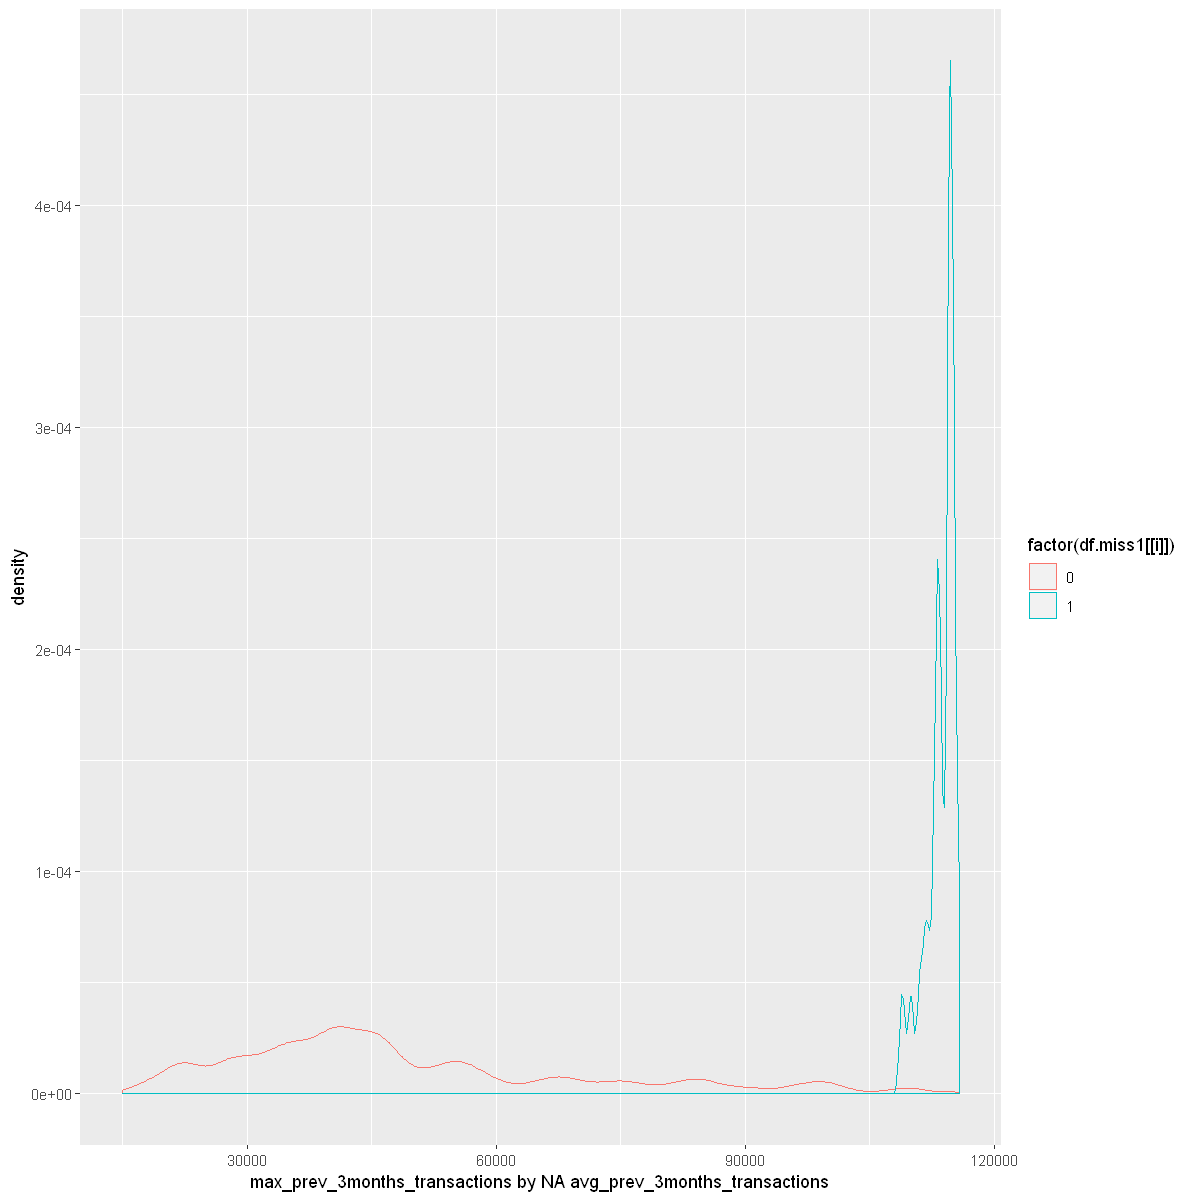


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -151.48, df = 132253, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -306.413 -298.585
sample estimates:
mean of x mean of y 
 205.8146  508.3137 

[1] "total_unit_sales by NA avg_prev_3months_transactions"


Warning message:
"Removed 182194 rows containing non-finite values (stat_density)."


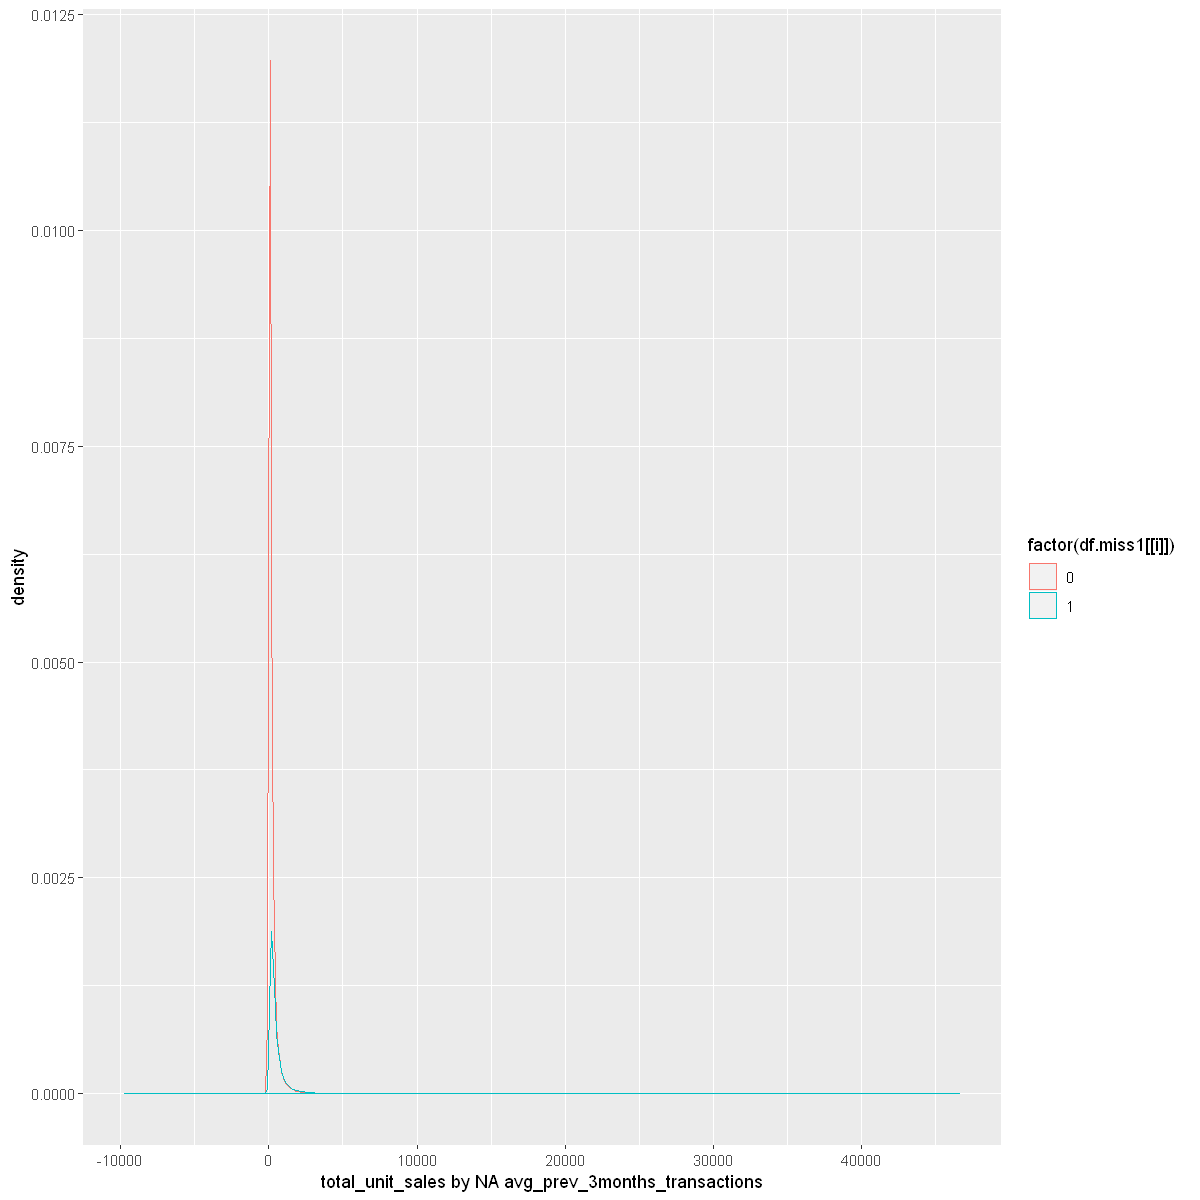


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -264.91, df = 112295, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -110.3106 -108.6903
sample estimates:
mean of x mean of y 
 135.2288  244.7293 

[1] "prev_month_sales by NA min_prev_3months_transactions"


Warning message:
"Removed 180962 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -264.74, df = 112662, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -110.7893 -109.1609
sample estimates:
mean of x mean of y 
 135.7714  245.7465 

[1] "prev_3month_sales by NA min_prev_3months_transactions"


Warning message:
"Removed 181824 rows containing non-finite values (stat_density)."


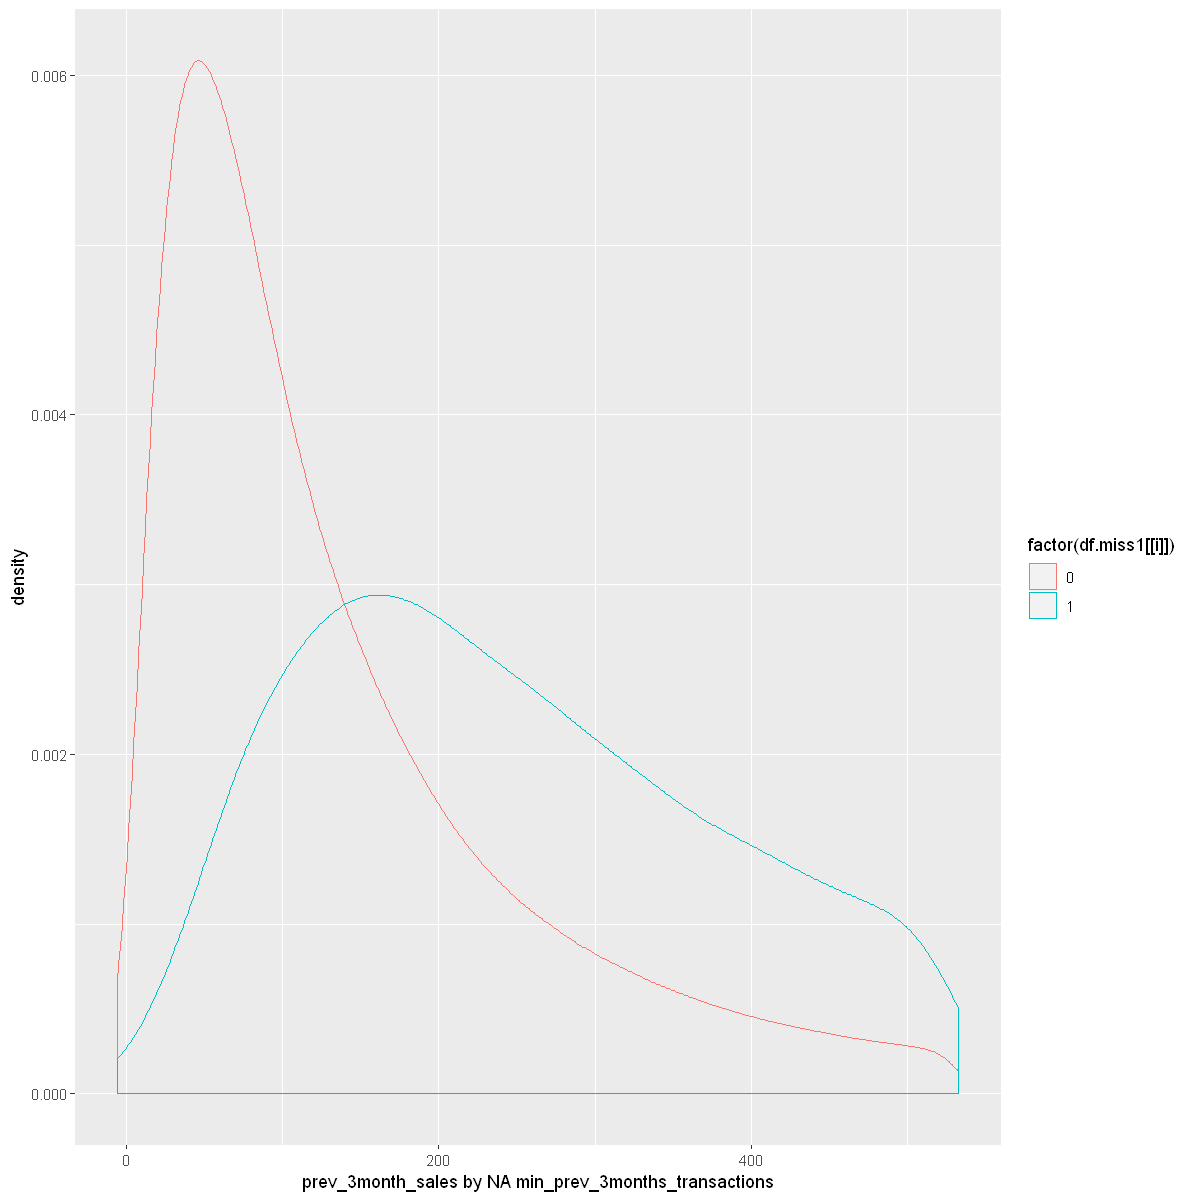


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -276.55, df = 111861, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -112.8779 -111.2891
sample estimates:
mean of x mean of y 
 136.3091  248.3926 

[1] "avg_prev_3months_sales by NA min_prev_3months_transactions"


Warning message:
"Removed 183073 rows containing non-finite values (stat_density)."


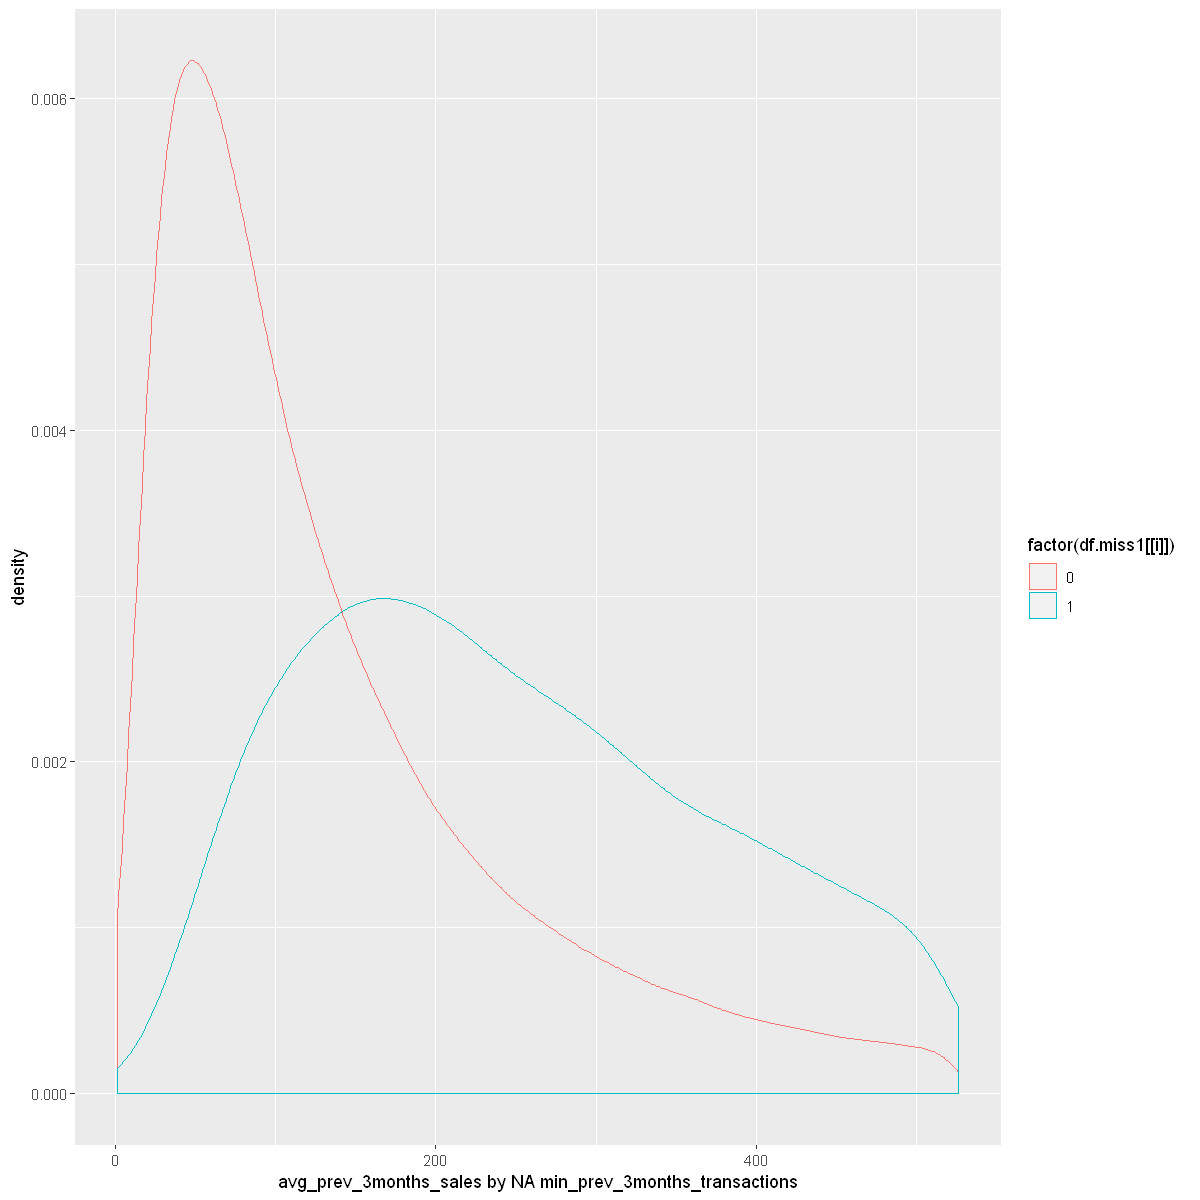


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -263.6, df = 110270, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -92.75864 -91.38943
sample estimates:
mean of x mean of y 
 108.2519  200.3260 

[1] "min_prev_3months_sales by NA min_prev_3months_transactions"


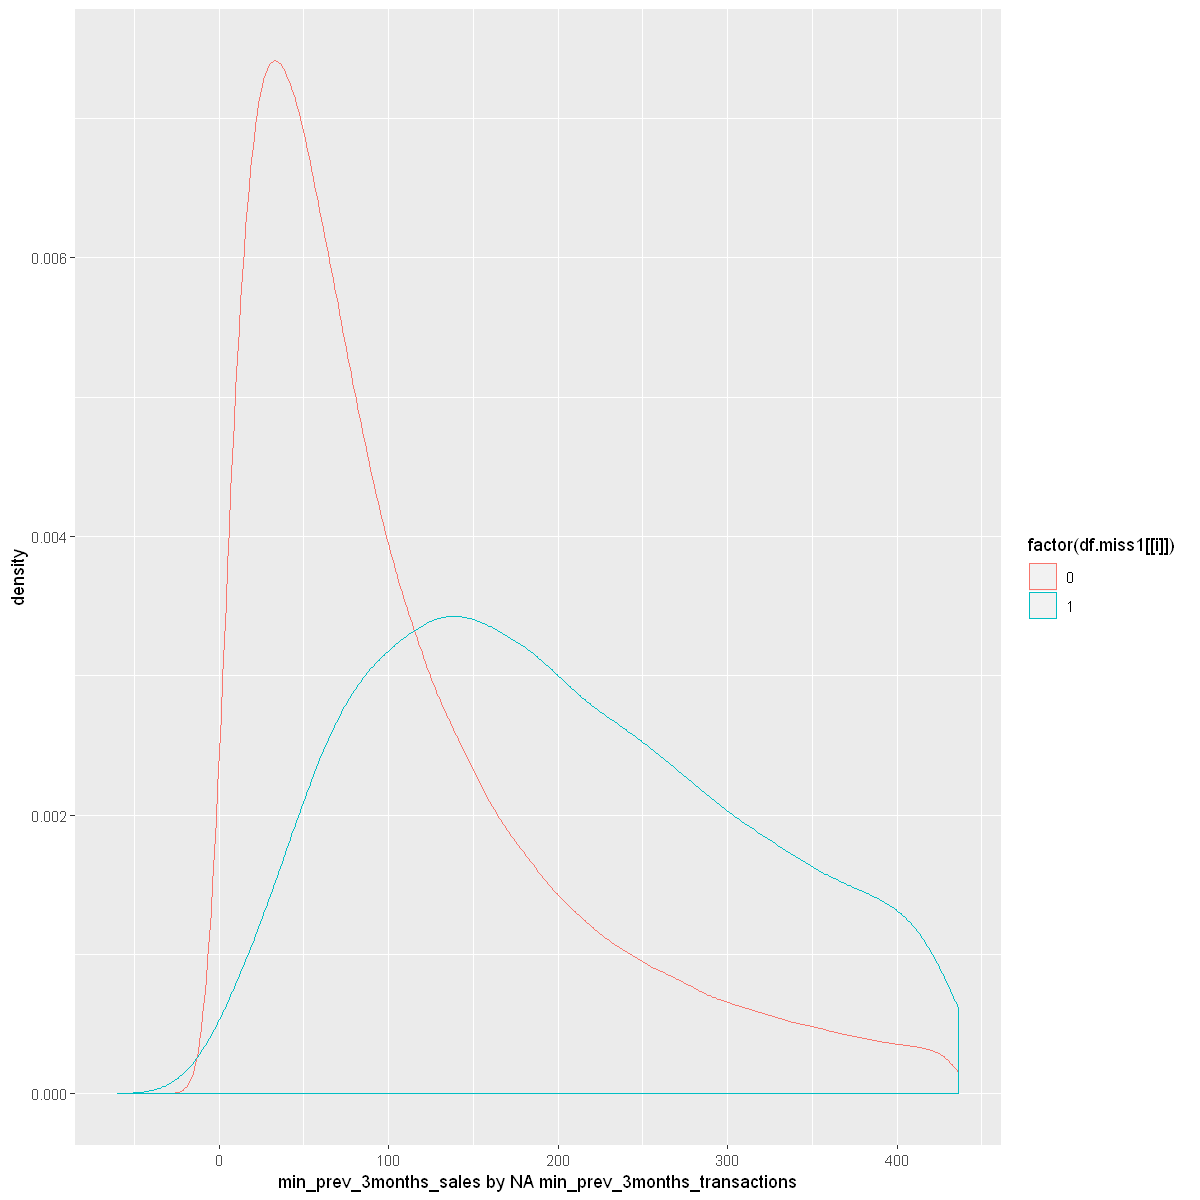

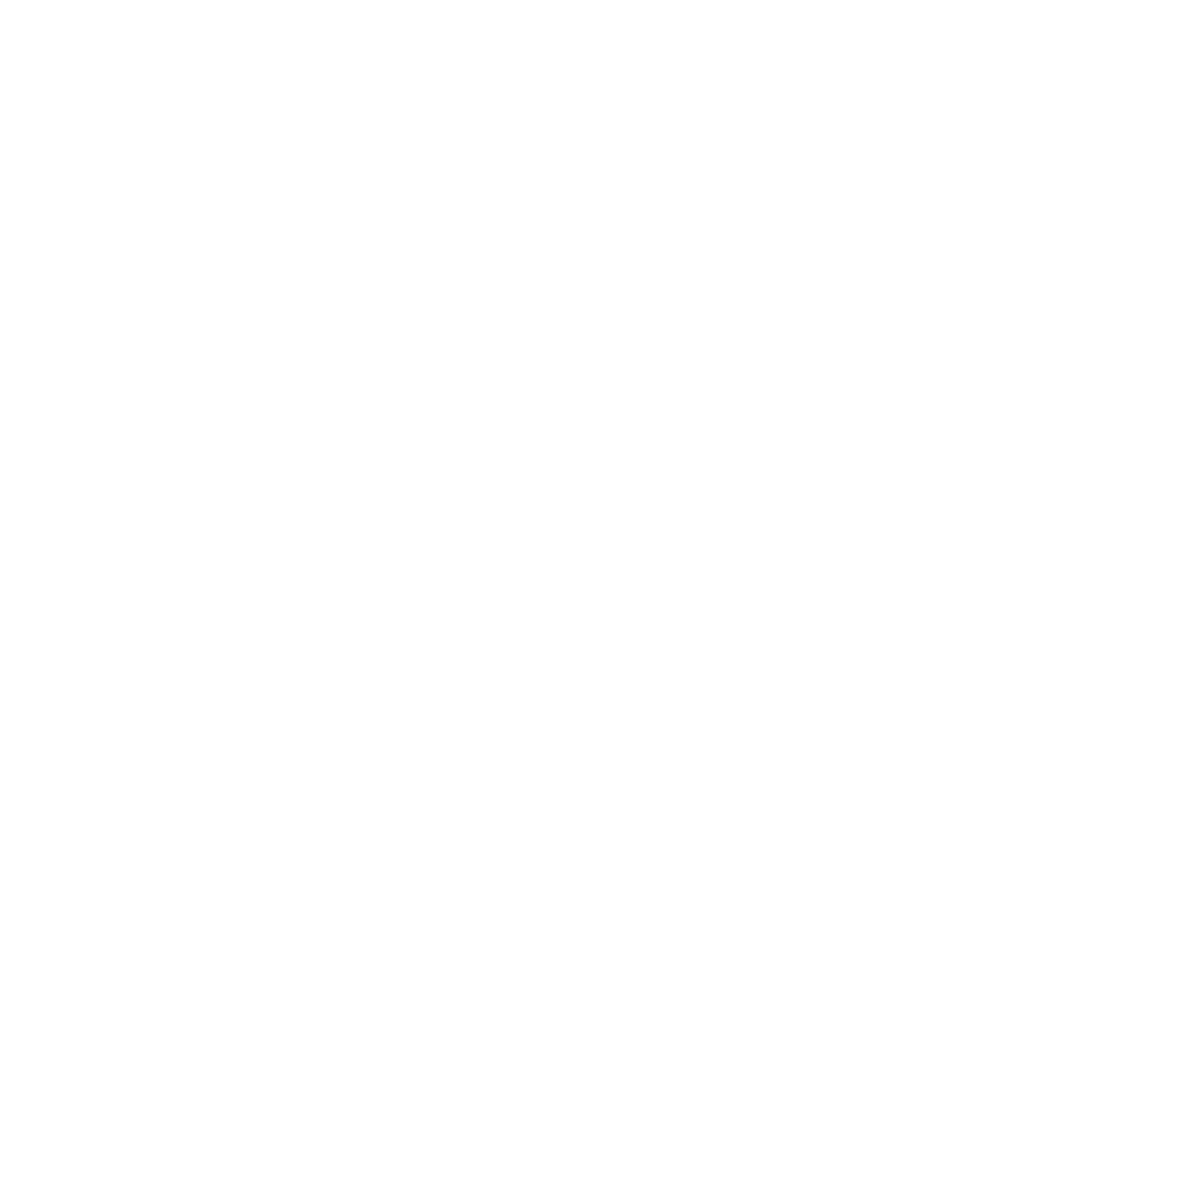

In [29]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (i in l1){
    for (j in c(l1,'total_unit_sales')){
        if (i!=j) {
        print(ggplot(df.noout,aes(x=df.noout[[j]], group=factor(df.miss1[[i]]),
                             color=factor(df.miss1[[i]]))) +
geom_density(adjust=2)+labs(x=paste(j,'by NA',i,sep=' ')))
         b1<- df.noout %>% select(j,i) %>% filter(df.miss1[i]==0)  
         b2<-df.noout %>% select(j,i) %>% filter(df.miss1[i]==1) 
         print(t.test(b1[[j]],b2[[j]]))  
         print(paste(j,'by NA',i,sep=' '))
       }
    }
}

In [31]:
l1 <- l1[c(1:11)]

In [32]:
l1

[1] "prev_month_sales"              "prev_3month_sales"            
 [3] "avg_prev_3months_sales"        "min_prev_3months_sales"       
 [5] "max_prev_3months_sales"        "total_month_transactions"     
 [7] "prev_month_transactions"       "prev_3month_transactions"     
 [9] "avg_prev_3months_transactions" "min_prev_3months_transactions"
[11] "max_prev_3months_transactions"

In [36]:
df.noout <- as.data.frame(df.noout)

In [93]:
c('prev_month_sales', 'prev_3month_sales', 'avg_prev_3months_sales', 'min_prev_3months_sales', 'max_prev_3months_sales',
'total_month_transactions', 'prev_month_transactions', 'prev_3month_transactions', 'avg_prev_3months_transactions',
       'min_prev_3month_transactions', 'max_prev_3month_transactions','total_month_onpromotion')

[1] "prev_month_sales"              "prev_3month_sales"            
 [3] "avg_prev_3months_sales"        "min_prev_3months_sales"       
 [5] "max_prev_3months_sales"        "total_month_transactions"     
 [7] "prev_month_transactions"       "prev_3month_transactions"     
 [9] "avg_prev_3months_transactions" "min_prev_3month_transactions" 
[11] "max_prev_3month_transactions"  "total_month_onpromotion"

In [33]:
head(df.noout[ ,l1])

prev_month_sales prev_3month_sales avg_prev_3months_sales
1 46               53                58.66667              
2 44               86                44.66667              
3 44               46                45.00000              
4 47               44                40.00000              
5 29               44                38.00000              
6 38               47                38.66667              
  min_prev_3months_sales max_prev_3months_sales total_month_transactions
1 44                     86                     46740                   
2 44                     46                     46286                   
3 44                     47                     44876                   
4 29                     47                     47874                   
5 29                     47                     45789                   
6 29                     49                     44540                   
  prev_month_transactions prev_3month_transactions
1 45299                   47471                   
2 46740                   40587                   
3 46286                   45299                   
4 44876                   46740                   
5 47874                   46286                   
6 45789                   44876                   
  avg_prev_3months_transactions min_prev_3months_transactions
1 44208.67                      40587                        
2 46108.33                      45299                        
3 45967.33                      44876                        
4 46345.33                      44876                        
5 46179.67                      44876                        
6 46067.67                      44540                        
  max_prev_3months_transactions
1 46740                        
2 46740                        
3 46740                        
4 47874                        
5 47874                        
6 47874

In [ ]:
library(MissMech)
miss1 <- TestMCARNormality(data=df.noout[,l1], del.lesscases = 1, imputation.number = 10)
summary(miss1)


3.2.2 table of the missingness mechanism 

In [52]:
na_treat = read.csv("../data/na_treatment.csv")

In [ ]:
na_treat <- na_treat[1:51,1:4]

In [54]:
na_treat

Feature.name                 Scale   missing.mechanism   NA.treatment   
1  budget                       Ratio   MNAR                Categorize     
2  popularity                   Ratio   hasn't been checked remove rows    
3  runtime                      Ratio   hasn't been checked remove rows    
4  revenue                      Ratio   hasn't been checked leave          
5  keyword_cnt                  Ratio   hasn't been checked remove rows    
6  seasonality                  Ratio   hasn't been checked remove rows    
7  producers_cnt                Ratio   MNAR                delete column  
8  countries_cnt                Ratio   hasn't been checked remove rows    
9  keywords_cnt                 Ratio   hasn't been checked remove rows    
10 actor0_movies_cnt            Ratio   hasn't been checked remove rows    
11 actor0_movies_5y_cnt         Ratio   hasn't been checked remove rows    
12 actor1_movies_cnt            Ratio   MNAR                delete column  
13 actor1_movies_5y_cnt         Ratio   hasn't been checked remove rows    
14 actor2_movies_cnt            Ratio   MNAR                delete column  
15 actor2_movies_5y_cnt         Ratio   hasn't been checked remove rows    
16 actor0_prev_revenue          Ratio   MNAR                Categorize     
17 actor1_prev_revenue          Ratio   MNAR                delete column  
18 actor2_prev_revenue          Ratio   MNAR                delete column  
19 director_movies_cnt          Ratio   MNAR                delete column  
20 director_movies_5y_cnt       Ratio   hasn't been checked remove rows    
21 depart_Art                   Ratio   MNAR                delete column  
22 depart_Camera                Ratio   MNAR                delete column  
23 depart_Crew                  Ratio   hasn't been checked remove rows    
24 depart_Custom_Mkup           Ratio   MNAR                delete column  
25 depart_Directing             Ratio   MNAR                delete column  
26 depart_Editing               Ratio   hasn't been checked remove rows    
27 depart_Lighting              Ratio   hasn't been checked remove rows    
28 depart_Production            Ratio   hasn't been checked remove rows    
29 depart_Sound                 Ratio   MNAR                delete column  
30 depart_Visual_Effects        Ratio   hasn't been checked remove rows    
31 depart_Writing               Ratio   hasn't been checked remove rows    
32 depart_Art_female            Ratio   hasn't been checked remove rows    
33 depart_Camera_female         Ratio   hasn't been checked remove rows    
34 depart_Crew_female           Ratio   hasn't been checked remove rows    
35 depart_Custom_Mkup_female    Ratio   hasn't been checked remove rows    
36 depart_Directing_female      Ratio   hasn't been checked remove rows    
37 depart_Editing_female        Ratio   hasn't been checked remove rows    
38 depart_Production_female     Ratio   hasn't been checked remove rows    
39 depart_Sound_female          Ratio   hasn't been checked remove rows    
40 depart_Visual_Effects_female Ratio   hasn't been checked remove rows    
41 depart_Writing_female        Ratio   hasn't been checked remove rows    
42 release_date                 Nominal hasn't been checked remove row     
43 release_year                 Nominal hasn't been checked remove row     
44 release_month                Nominal hasn't been checked remove row     
45 release_day                  Nominal hasn't been checked remove row     
46 sw_female_actor0             Nominal hasn't been checked Categorize As 2
47 sw_female_actor2             Nominal hasn't been checked Categorize As 2
48 sw_male_actor0               Nominal hasn't been checked Categorize As 2
49 sw_male_actor1               Nominal hasn't been checked Categorize As 2
50 sw_male_actor2               Nominal hasn't been checked Categorize As 2
51 depart_Lighting_female       Nominal hasn't been checked Categorize As 2

3.3.3 imputtion technique

because all of the missing values are MNAR i can't do an imputation.
At features with less than 5 percent missing values i decided to remove the rows. 
some of the features with more than 5% missing will be categorized and some of them will be removed from the data.
regarding the features with Nominal scales which have missing values, the missing values will be categorized.


Categorization of missing values

In [55]:
summary(movies.na)


ERROR: Error in summary(movies.na): object 'movies.na' not found


In [56]:
quantile(movies_ff_v1$budget, probs = seq(0, 1, by=0.1), na.rm=TRUE,names=TRUE )

0%      10%      20%      30%      40%      50%      60%      70% 
       1  1284600  3500000  6000000 10000000 15000000 20000000 28000000 
     80%      90%     100% 
40000000 58000000 92000000

In [57]:
movies_ff_v1$budget_cat[is.na(movies_ff_v1$budget)==TRUE] <- 0
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 3500000] <- 1
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 1e+07 & movies_ff_v1$budget> 3500000] <- 2
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 2e+07 & movies_ff_v1$budget> 1e+07] <- 3
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 4e+07 & movies_ff_v1$budget> 2e+07] <- 4
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 9.2e+07 & movies_ff_v1$budget> 4e+07] <- 5

In [58]:
quantile(movies_ff_v1$actor0_prev_revenue, probs = seq(0, 1, by=0.1), na.rm=TRUE,names=TRUE )

0%       10%       20%       30%       40%       50%       60%       70% 
        1  11000000  30263917  53478166  91036760 137298489 174333255 237681299 
      80%       90%      100% 
311312624 383257136 709827462

In [59]:
movies_ff_v1$actor0_prev_revenue_cat[is.na(movies_ff_v1$actor0_prev_revenue)==TRUE] <- 0
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 30263916.8] <- 1 
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 91036760 & movies_ff_v1$actor0_prev_revenue> 30263916.8] <- 2
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 174333254.6 & movies_ff_v1$actor0_prev_revenue > 91036760] <- 3
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 311312624 & movies_ff_v1$actor0_prev_revenue > 174333254.6] <- 4
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 709827462 & movies_ff_v1$actor0_prev_revenue > 311312624] <- 5

In [60]:
 movies.clean.data <- movies_ff_v1[ , !names(movies_ff_v1) %in% l2]

In [61]:
l4

[1] "release_date"           "release_year"           "release_month"         
 [4] "release_day"            "sw_female_actor0"       "sw_female_actor1"      
 [7] "sw_female_actor2"       "sw_male_actor0"         "sw_male_actor1"        
[10] "sw_male_actor2"         "depart_Lighting_female"

In [62]:
l5 <- l4[5:11]
l5

[1] "sw_female_actor0"       "sw_female_actor1"       "sw_female_actor2"      
[4] "sw_male_actor0"         "sw_male_actor1"         "sw_male_actor2"        
[7] "depart_Lighting_female"

In [63]:
## categorize NA As 2 at categorical variable with type integer
for (i in l5) {
    movies.clean.data[[i]][is.na(movies.clean.data[[i]])==TRUE] <- 2 }

In [65]:
head(movies.clean.data)

movie_id original_language popularity release_date runtime runtime_cat
1 1        en                 6.575393  2015-02-20    93     Short      
2 2        en                 8.248895  2004-08-06   113     Medium     
3 3        en                64.299990  2014-10-10   105     Medium     
4 4        hi                 3.174936  2012-03-09   122     Large      
5 5        ko                 1.148070  2009-02-05   118     Medium     
6 6        en                 0.743274  1987-08-06    83     Short      
  revenue  sw_lang_en sw_web_presence sw_has_poster ...
1 12314651 1          0               1             ...
2 95149435 1          0               1             ...
3 13092000 1          1               1             ...
4 16000000 0          1               1             ...
5  3923970 0          0               1             ...
6  3261638 1          0               1             ...
  depart_Custom_Mkup_female depart_Directing_female depart_Editing_female
1 0                         0                       0                    
2 0                         0                       0                    
3 0                         0                       0                    
4 0                         0                       0                    
5 0                         0                       0                    
6 0                         0                       0                    
  depart_Lighting_female depart_Production_female depart_Sound_female
1 0                      0                        0                  
2 0                      3                        0                  
3 0                      2                        0                  
4 0                      0                        0                  
5 0                      0                        0                  
6 0                      0                        0                  
  depart_Visual_Effects_female depart_Writing_female budget_cat
1 0                            0                     3         
2 0                            1                     4         
3 0                            0                     1         
4 0                            0                     1         
5 0                            0                     0         
6 0                            0                     2         
  actor0_prev_revenue_cat
1 3                      
2 3                      
3 2                      
4 1                      
5 0                      
6 0

In [66]:
movies.clean.data <- na.omit(movies.clean.data[,c(1:6,8:74)]) 

In [67]:
movies.clean.data

movie_id original_language popularity release_date runtime runtime_cat
1     1       en                 6.575393  2015-02-20    93     Short      
2     2       en                 8.248895  2004-08-06   113     Medium     
4     4       hi                 3.174936  2012-03-09   122     Large      
5     5       ko                 1.148070  2009-02-05   118     Medium     
6     6       en                 0.743274  1987-08-06    83     Short      
8     8       en                 1.949044  2004-01-15    84     Short      
9     9       en                 6.902423  1996-02-16   100     Medium     
10   10       en                 4.672036  2003-04-16    91     Short      
11   11       en                14.774066  1976-11-21   119     Large      
12   12       en                10.543750  1987-07-10    98     Medium     
16   16       sr                 1.018477  2010-10-06    97     Medium     
18   18       en                 4.183558  2013-12-25   111     Medium     
19   19       en                 6.496259  2011-02-02    96     Medium     
20   20       en                11.359659  2005-08-02    87     Short      
22   22       en                 7.992290  1982-08-13    95     Medium     
23   23       en                 7.820787  2012-07-28   116     Medium     
24   24       en                 1.323333  2011-09-02    92     Short      
25   25       en                 7.434577  2006-09-09    87     Short      
26   26       en                 1.252367  1992-10-23    95     Medium     
27   27       en                 4.305735  1997-09-08   110     Medium     
28   28       en                10.841891  2013-09-07    93     Short      
29   29       en                 6.759181  1986-08-08    84     Short      
31   31       fr                16.086919  2011-11-02   112     Medium     
32   32       fr                 5.695860  2005-05-02   117     Medium     
36   36       en                 8.234382  2012-04-16    94     Medium     
37   37       en                 2.100499  2000-01-28   105     Medium     
38   38       en                13.676444  1995-03-10   127     Large      
39   39       en                 0.329260  2013-09-13    90     Short      
40   40       en                 3.055936  1965-04-07   123     Large      
41   41       en                 2.941626  2006-04-26   118     Medium     
...  ...      ...               ...        ...          ...     ...        
7334 7357     hi                 1.160169  2010-06-18   138     Large      
7335 7358     en                 3.736880  1971-07-02   100     Medium     
7338 7361     en                 0.003626  1999-09-14    98     Medium     
7340 7363     en                20.309585  2012-10-25   143     Large      
7341 7364     fr                 1.122218  1997-02-26   115     Medium     
7342 7365     en                 8.461369  2008-08-06   111     Medium     
7343 7366     en                12.722120  2006-09-08    97     Medium     
7344 7367     en                 3.580870  2011-02-01    93     Short      
7345 7368     en                10.693092  1983-07-22    91     Short      
7347 7370     en                13.436536  2008-03-14   108     Medium     
7348 7371     en                 1.789046  1999-10-15   100     Medium     
7349 7372     en                 9.276539  2010-11-23   119     Large      
7350 7373     en                14.046164  2011-11-22   126     Large      
7352 7375     en                14.785388  1991-05-24   130     Large      
7353 7376     it                 1.405580  2002-09-06   101     Medium     
7354 7377     en                 8.418662  1970-06-22   144     Large      
7356 7379     en                 8.745216  2005-09-16   122     Large      
7357 7380     en                11.009871  2015-04-30    96     Medium     
7358 7381     en                 5.285420  2016-06-03    86     Short      
7360 7383     en                 0.903061  2006-11-23   100     Medium     
7362 7385     en                11.457803  1987-08-14

In [68]:
b1<- movies_ff_v1 %>% select('movie_id','revenue')

In [69]:
movies.clean.data <- left_join(movies.clean.data,b1)

Joining, by = "movie_id"


In [70]:
head(movies.clean.data)

movie_id original_language popularity release_date runtime runtime_cat
1 1        en                6.575393   2015-02-20    93     Short      
2 2        en                8.248895   2004-08-06   113     Medium     
3 4        hi                3.174936   2012-03-09   122     Large      
4 5        ko                1.148070   2009-02-05   118     Medium     
5 6        en                0.743274   1987-08-06    83     Short      
6 8        en                1.949044   2004-01-15    84     Short      
  sw_lang_en sw_web_presence sw_has_poster sw_tagline ...
1 1          0               1             1          ...
2 1          0               1             1          ...
3 0          1               1             0          ...
4 0          0               1             0          ...
5 1          0               1             0          ...
6 1          0               1             1          ...
  depart_Directing_female depart_Editing_female depart_Lighting_female
1 0                       0                     0                     
2 0                       0                     0                     
3 0                       0                     0                     
4 0                       0                     0                     
5 0                       0                     0                     
6 1                       0                     0                     
  depart_Production_female depart_Sound_female depart_Visual_Effects_female
1 0                        0                   0                           
2 3                        0                   0                           
3 0                        0                   0                           
4 0                        0                   0                           
5 0                        0                   0                           
6 0                        0                   0                           
  depart_Writing_female budget_cat actor0_prev_revenue_cat revenue 
1 0                     3          3                       12314651
2 1                     4          3                       95149435
3 0                     1          1                       16000000
4 0                     0          0                        3923970
5 0                     2          0                        3261638
6 0                     0          0                        2586511

4 - Repeat the EDA to ensure that everything is Ok and the dataset is ready for model generation

In this phase, we have to make the following steps:

Descriptive Statistics
Data visualization

In [372]:
exploreData(data=movies.clean.data,y="revenue")

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |=======                                                               |   9%

The variable sw_has_poster has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.04"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.04"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/Inf in foreign function call (arg 5)"


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.595"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.595"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0736e-028"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.595"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"neighborhood radius 1.595

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  -0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.001225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  -0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.050625"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |=============================================================         |  86%

The variable depart_Lighting_female has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |===================================================================   |  96%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

In [345]:
summary(movies.clean.data)

    movie_id    original_language    popularity       release_date       
 Min.   :   1   Length:5423        Min.   :  0.000   Min.   :1918-08-01  
 1st Qu.:1826   Class :character   1st Qu.:  3.139   1st Qu.:1990-12-08  
 Median :3629   Mode  :character   Median :  6.614   Median :2002-10-21  
 Mean   :3684                      Mean   :  7.315   Mean   :1998-10-21  
 3rd Qu.:5527                      3rd Qu.:  9.866   3rd Qu.:2010-07-16  
 Max.   :7398                      Max.   :547.488   Max.   :2017-08-11  
                                                                         
    runtime      runtime_cat          sw_lang_en     sw_web_presence 
 Min.   : 59.0   Length:5423        Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 93.0   Class :character   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :102.0   Mode  :character   Median :1.0000   Median :0.0000  
 Mean   :104.8                      Mean   :0.8379   Mean   :0.2757  
 3rd Qu.:115.0                      3rd Qu.:1.0000   3rd Q

Warning message in ggcorr(movies.clean.data, method = c("pairwise", "spearman"), :
"data in column(s) 'original_language', 'release_date', 'runtime_cat' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning messa

Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


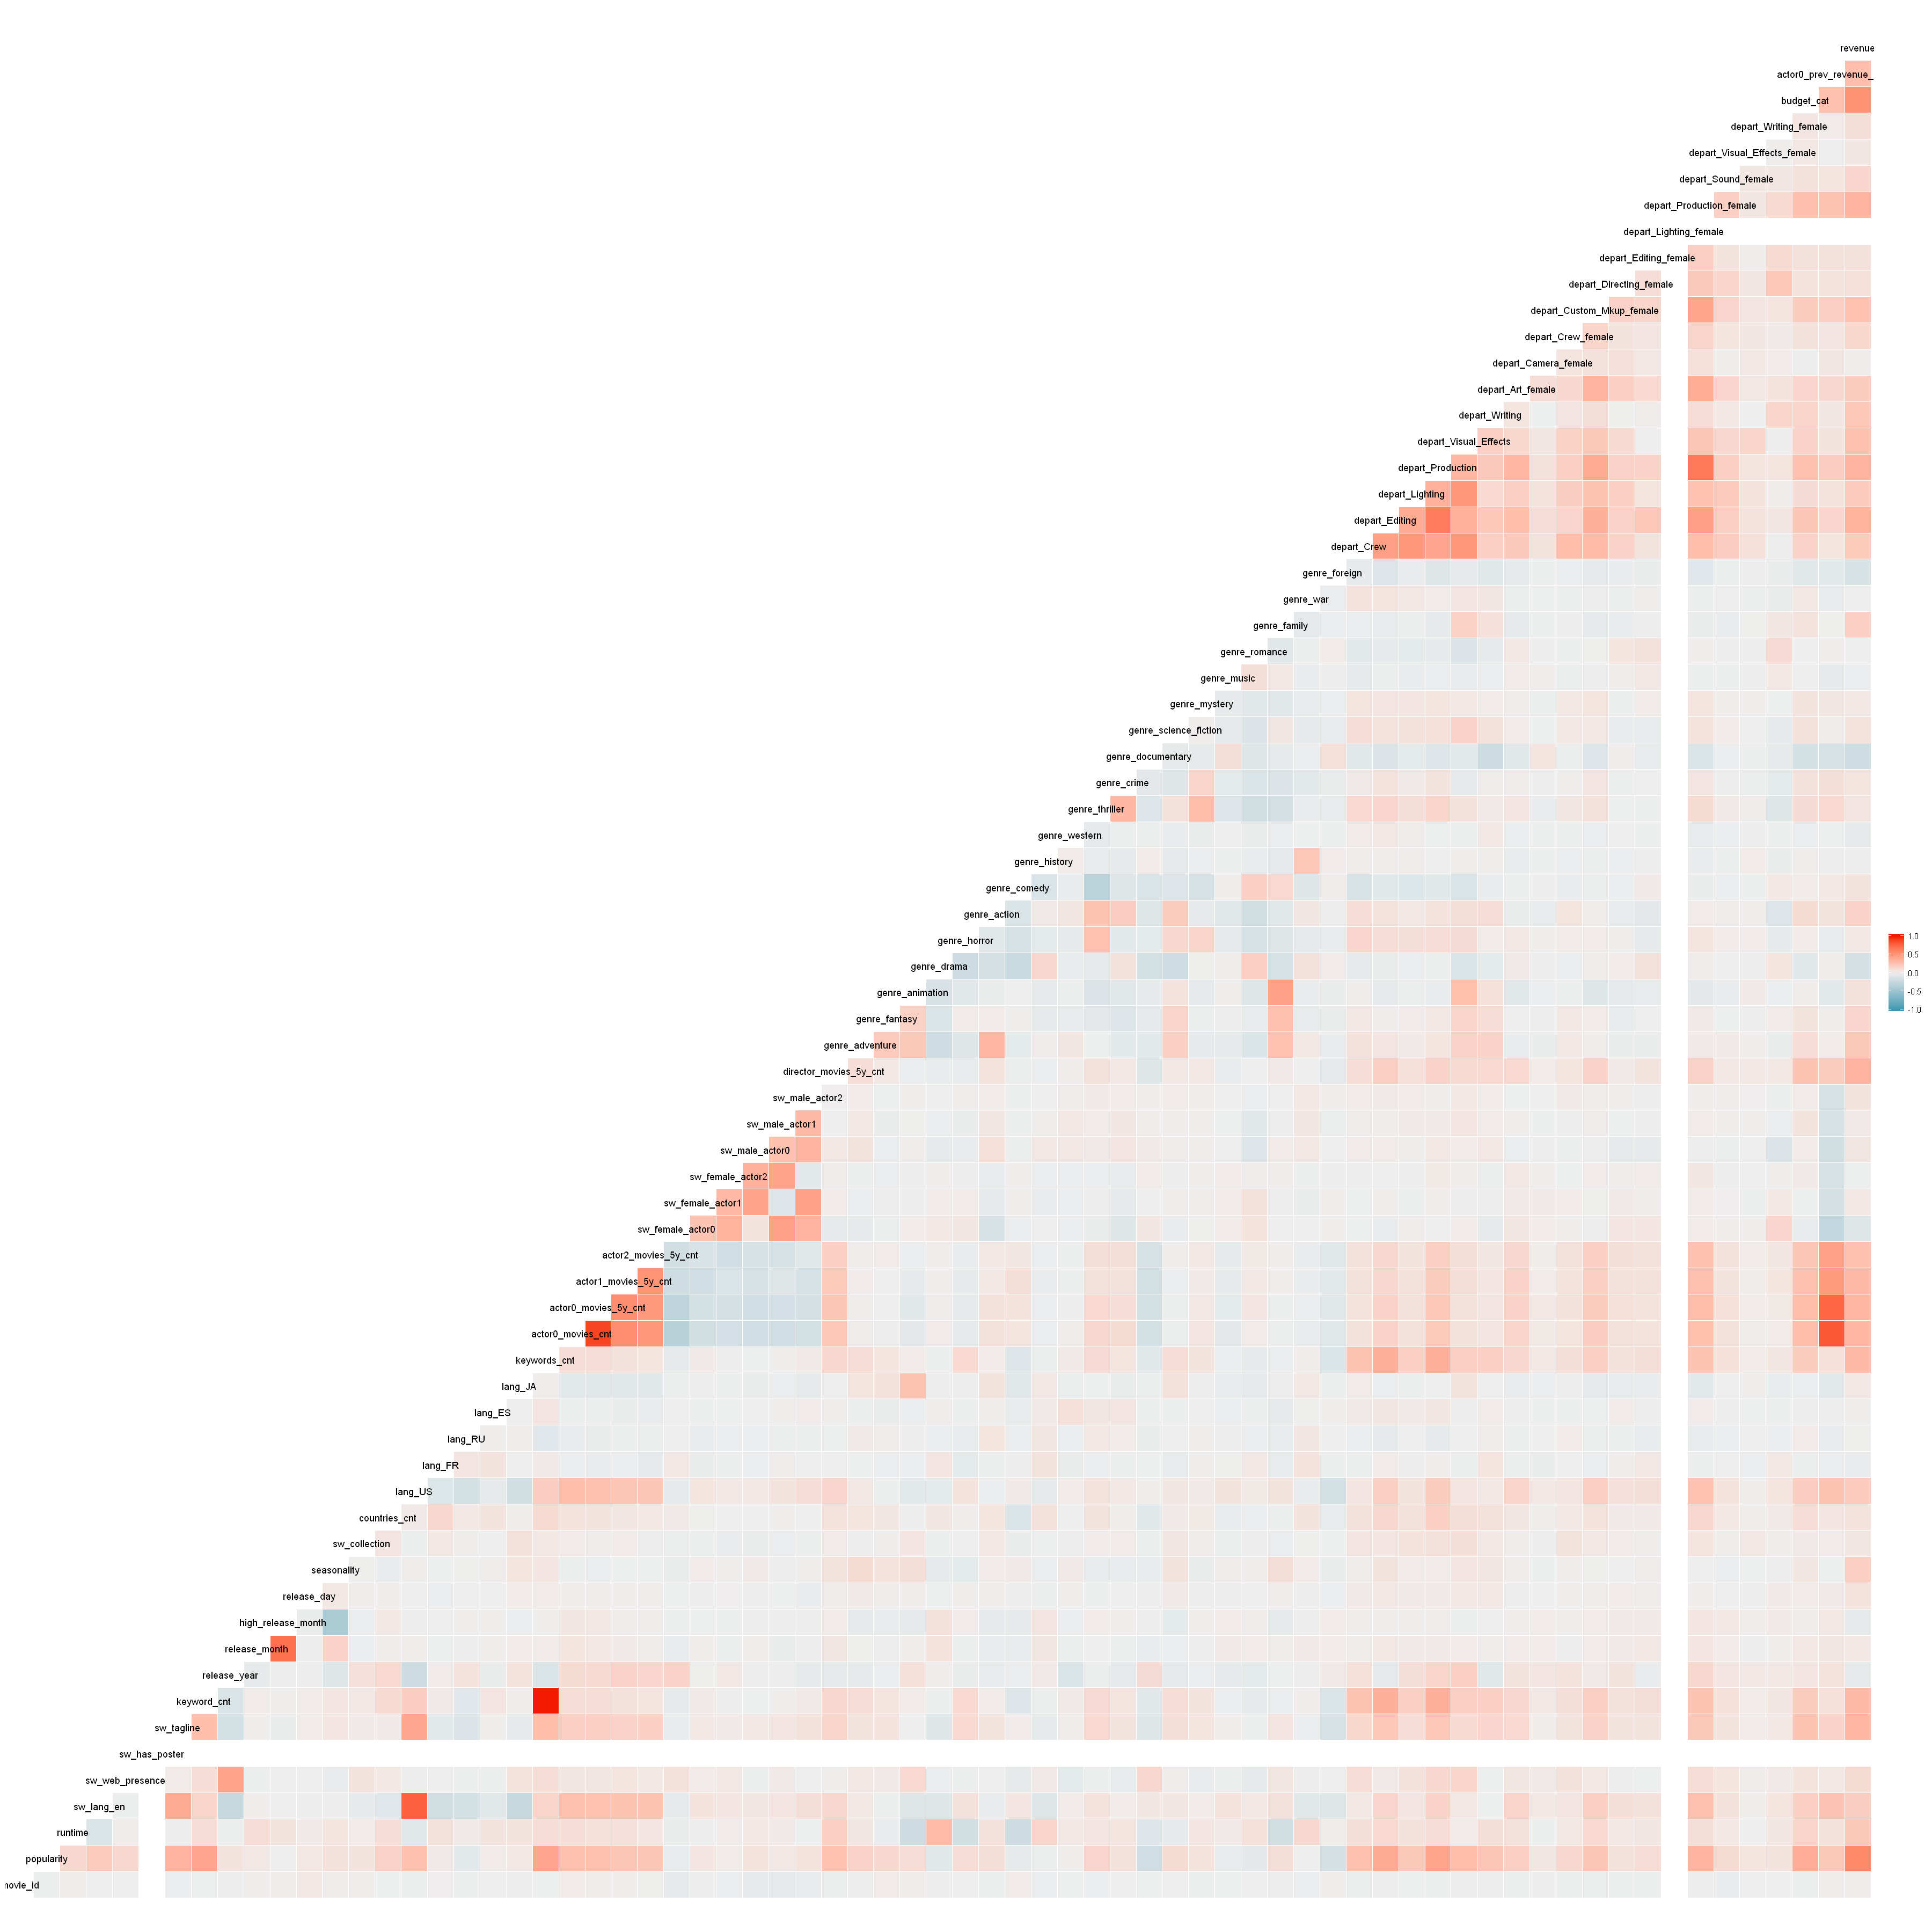

In [346]:
library(GGally)
options(repr.plot.width = 30, repr.plot.height = 30)
ggcorr(movies.clean.data, method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

Warning message in ggcorr(movies.clean.data[, c(1:18, 74)], method = c("pairwise", :
"data in column(s) 'original_language', 'release_date', 'runtime_cat' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning mes

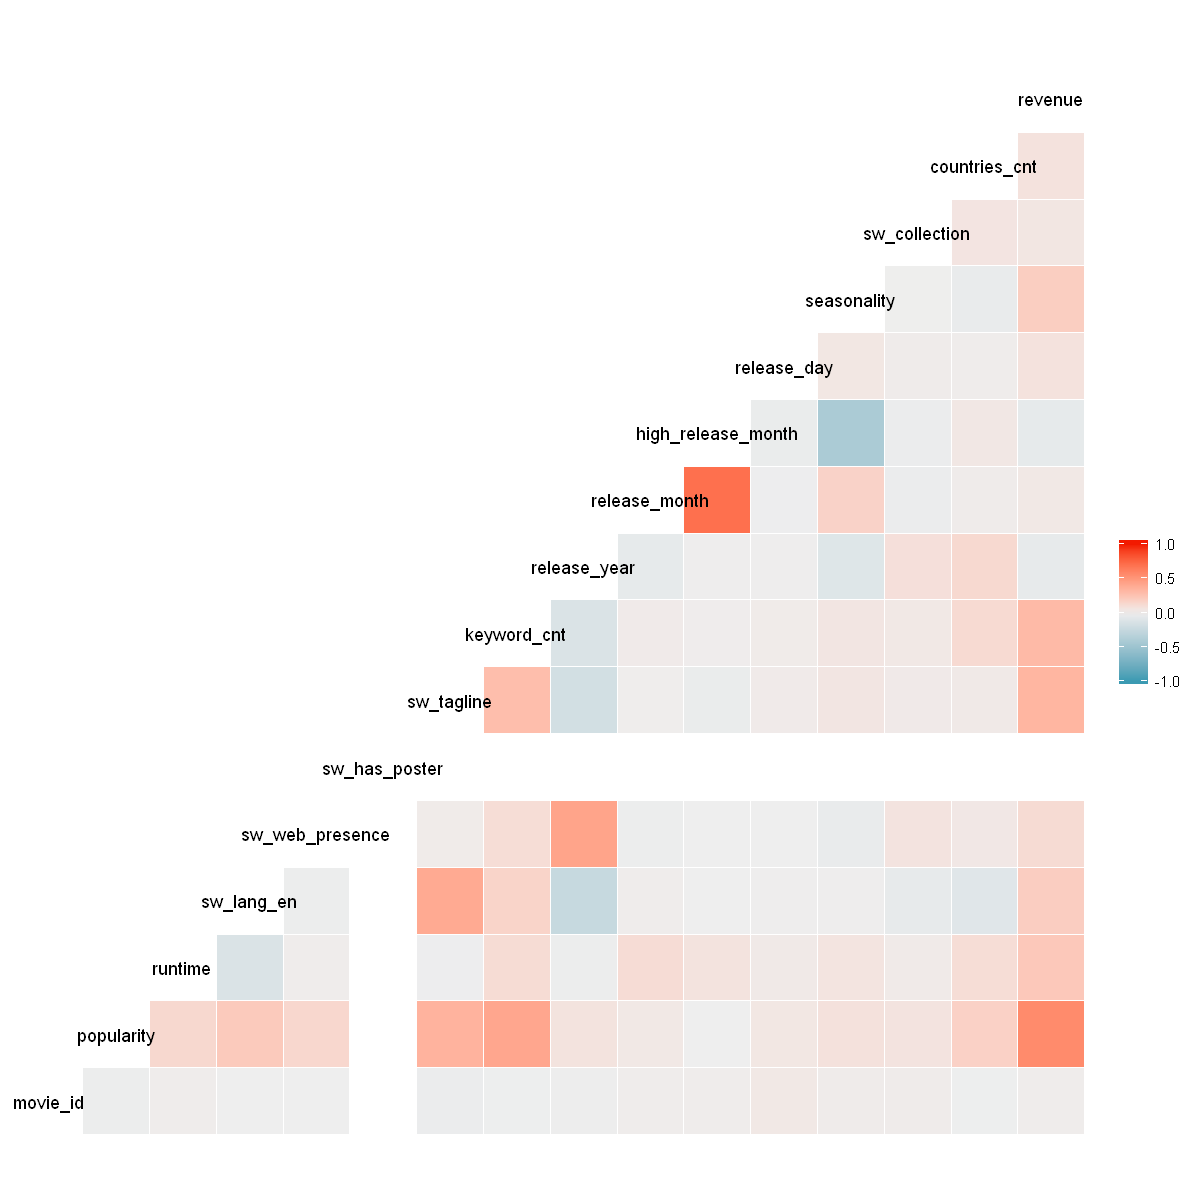

Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


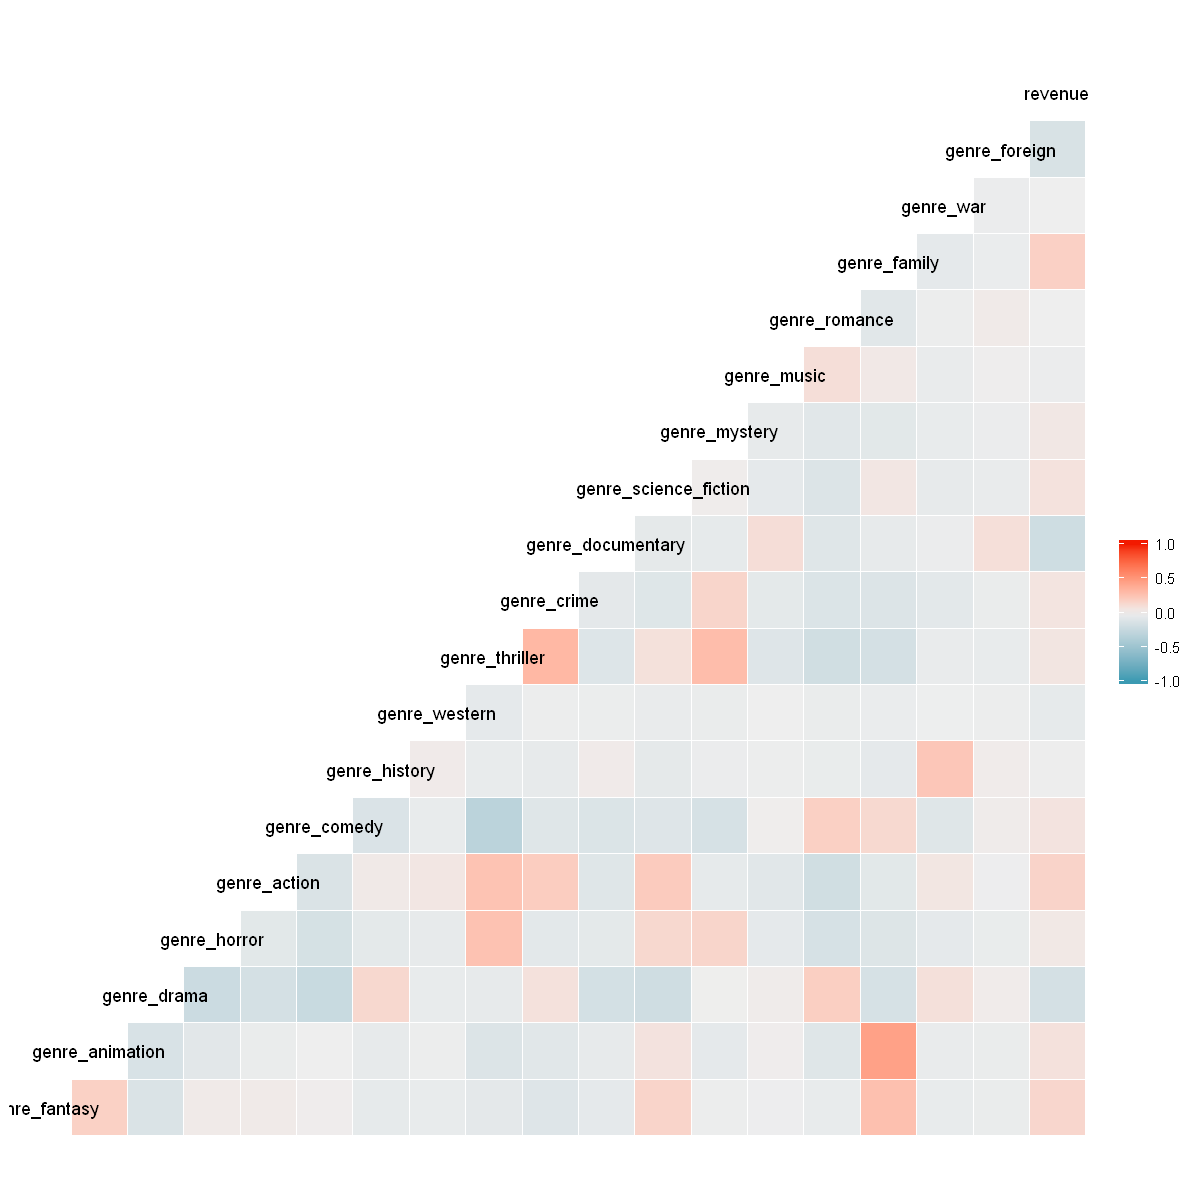

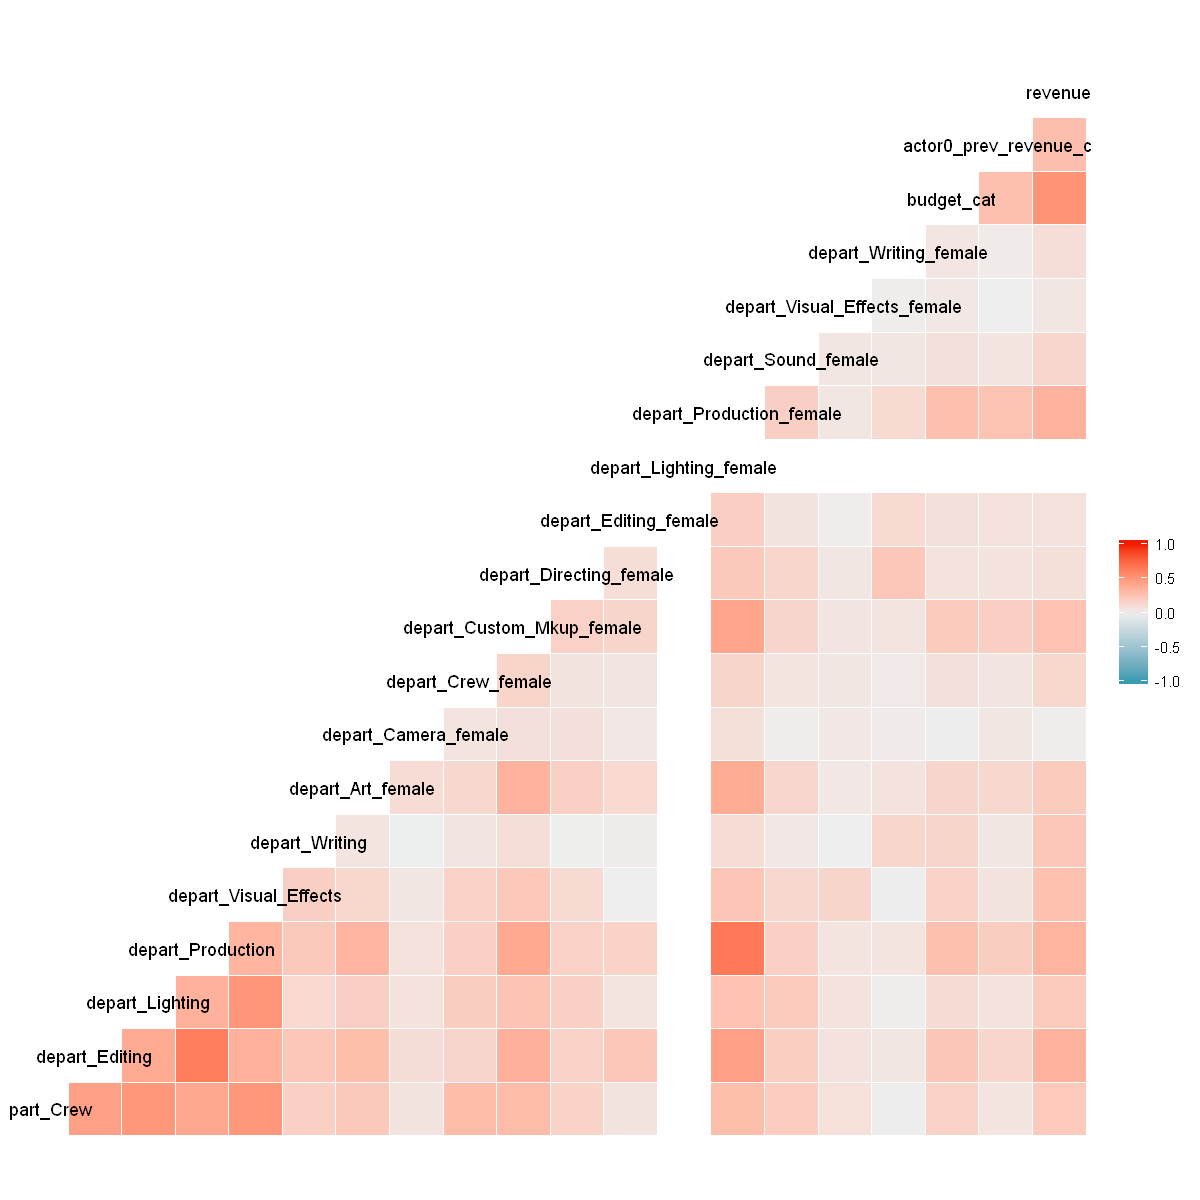

In [348]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorr(movies.clean.data[,c(1:18,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,c(19:36,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,c(37:54,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,55:74], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

